# Assignment 5: FCM 

### *Description*

The goal of this assignment was to implement Fuzzy C-Means (FCM) clustering on the datasets from Assignment 4, and explore the hyperparameters' effects on the outcome.

### *Technical Details*
FCM is a soft-partition clustering algorithm, meaning that each point in the dataset belongs to each cluster with some probability that is not necessarily one. We can use these probabilities to filter data out that we are not sure belongs to a certain cluster, and obtain better performance on data with overlapping clusters.

The following is my code for this assignment, followed by links to references: 

```% Assignment 5
% Taten Knight

% Cleanup
close all;
clear all;
clc;

numClusters = [4, 5, 0, 0, 3, 3, 2, 2, 2, 2, 2, 2]; % From assignment 4
datasets = LoadDataSets(); % Load all datasets


for setNum=1:length(numClusters)
    if numClusters(setNum) ~= 0
        % Input Data
        C = numClusters(setNum); % Number of clusters
        its = 30; % Max iterations
        Q = 1.5; % Fuzzifier

        testSet = datasets{setNum};
        dims = size(testSet);
        n = dims(1); % Number of datapoints
        d = dims(2); % Dimensions of data

        pd = makedist('normal');

        u = zeros(C, n);
        for i=1:n
            w = abs(random(pd,[C, 1]));
            w = w ./ sum(w);
            u(:, i) = w;
        end

        % u = repelem(w, 1, n); % Initialize membership matrix

        cc = testSet(1:C, :); % Initialize cluster centers

        % Prep Figure
        datasetString = ['Dataset ' num2str(setNum)];
        ss = get(0,'screensize');
        fig = figure();
        set(fig, 'visible', 'off');
        fig.Position = [0, 0, ss(3), ss(4)];
        set(gca,'XColor', 'none','YColor','none')
        set(gca,'XTickLabel',[]);
        set(gca,'YTickLabel',[]);
        disableDefaultInteractivity(gca);

        dist = [];
        colors = ['r', 'g', 'b', 'c', 'm', 'y'];

        for it=1:its
            % Distances
            dist(:, :, it) = pdist2(cc, testSet);
        %     s2 = subplot(2, 2, 2);
        %     s2.Position = [.55, .55, .4, .4];
        %     set(s2,'xtick',[],'ytick',[])
        %     disableDefaultInteractivity(s2);
        % 
        %     heat0 = heatmap(dist);
        %     title([datasetString ' Dist Plot']);
        %     heat0.GridVisible = 'off';
        %     colormap('jet');
        %     heat0.XDisplayLabels = nan(size(heat0.XDisplayData));
        %     heat0.YDisplayLabels = nan(size(heat0.YDisplayData));
            for i=1:C
                vi = zeros(1, d);
                num = vi;
                den = 0;
                for j=1:n
                    num = num + ((u(i,  j)^Q) .* testSet(j, :));
                    den = den + (u(i, j)^Q);
                end
                cc(i, :) = num ./ den;
                hold on
                scatter(cc(i, 1), cc(i,2), 10 + (it / its * 300), 'ok', 'MarkerFaceColor', colors(i));
                hold on
            end

            for i=1:n
                for j=1:C
                    uSum = 0;
                    for k=1:C
                        uSum = uSum + (dist(j, i, it) / dist(k, i, it)) ^ (1 / (Q - 1));
                    end
                    u(j, i) = 1 / uSum;
                end
            end
            if it > 1
                if sum(sum(abs(dist(:, :, it) - dist(:, :, it - 1)))) < 2
                    break
                end
            end
        end

        [argvalue, argmax] = max(u);

        % Datapoints
        R1 = testSet(:, 1);
        C1 = testSet(:, 2);
        % s1 = subplot(2, 2, 1);
        % s1.Position = [.05, .55, .4, .4];
        allBelongs = zeros(1, n);
        threshold = .50;
        for i=1:C
            hold on
            inCluster = argmax == i;
            meetThreshold = argvalue > threshold;
            belongs = inCluster .* meetThreshold;
            allBelongs = belongs + allBelongs;
            plot0 = plot(R1(belongs == 1), C1(belongs == 1), ['x' colors(i)]);
            hold on
        end

        noCluster = [R1(allBelongs == 0), C1(allBelongs == 0)];

        plot(noCluster(:, 1), noCluster(:, 2), 'xk')
        title([datasetString ' Threshold membership: ' num2str(threshold * 100) '%'])
        saveas(fig, ['dataset_' num2str(setNum) '_threshold_' num2str(threshold * 100) '.png'])
        shg
    end
end
```

1. [Fuzzy C Means (FCM) using simple example and Python](https://www.youtube.com/watch?v=FA-hJBu5Bkc&ab_channel=TheAcademician)
2. [Fuzzy C-Means Clustering with Python
](https://towardsdatascience.com/fuzzy-c-means-clustering-with-python-f4908c714081#:~:text=So%2C%20%E2%80%9Cfuzzy%E2%80%9D%20here%20means,to%20make%20it%20look%20different.)
3. Week 5 Lecture

### *Methods*

I wanted to see how the cluster center moved as we updated it, so I plotted the starting center as a smaller size, and increased the size with each iteration. I also wanted to see the way that altering a threshold probability would exclude points from belonging to a cluster, so I used varying thresholds, and plotted cluster-less datapoints in black, while those datapoints that belong to a cluster are plotted with that cluster's color. This created a nice visualization of the update steps and the results.

### *Results* 
Below are the resulting plots using the methods and code given above:

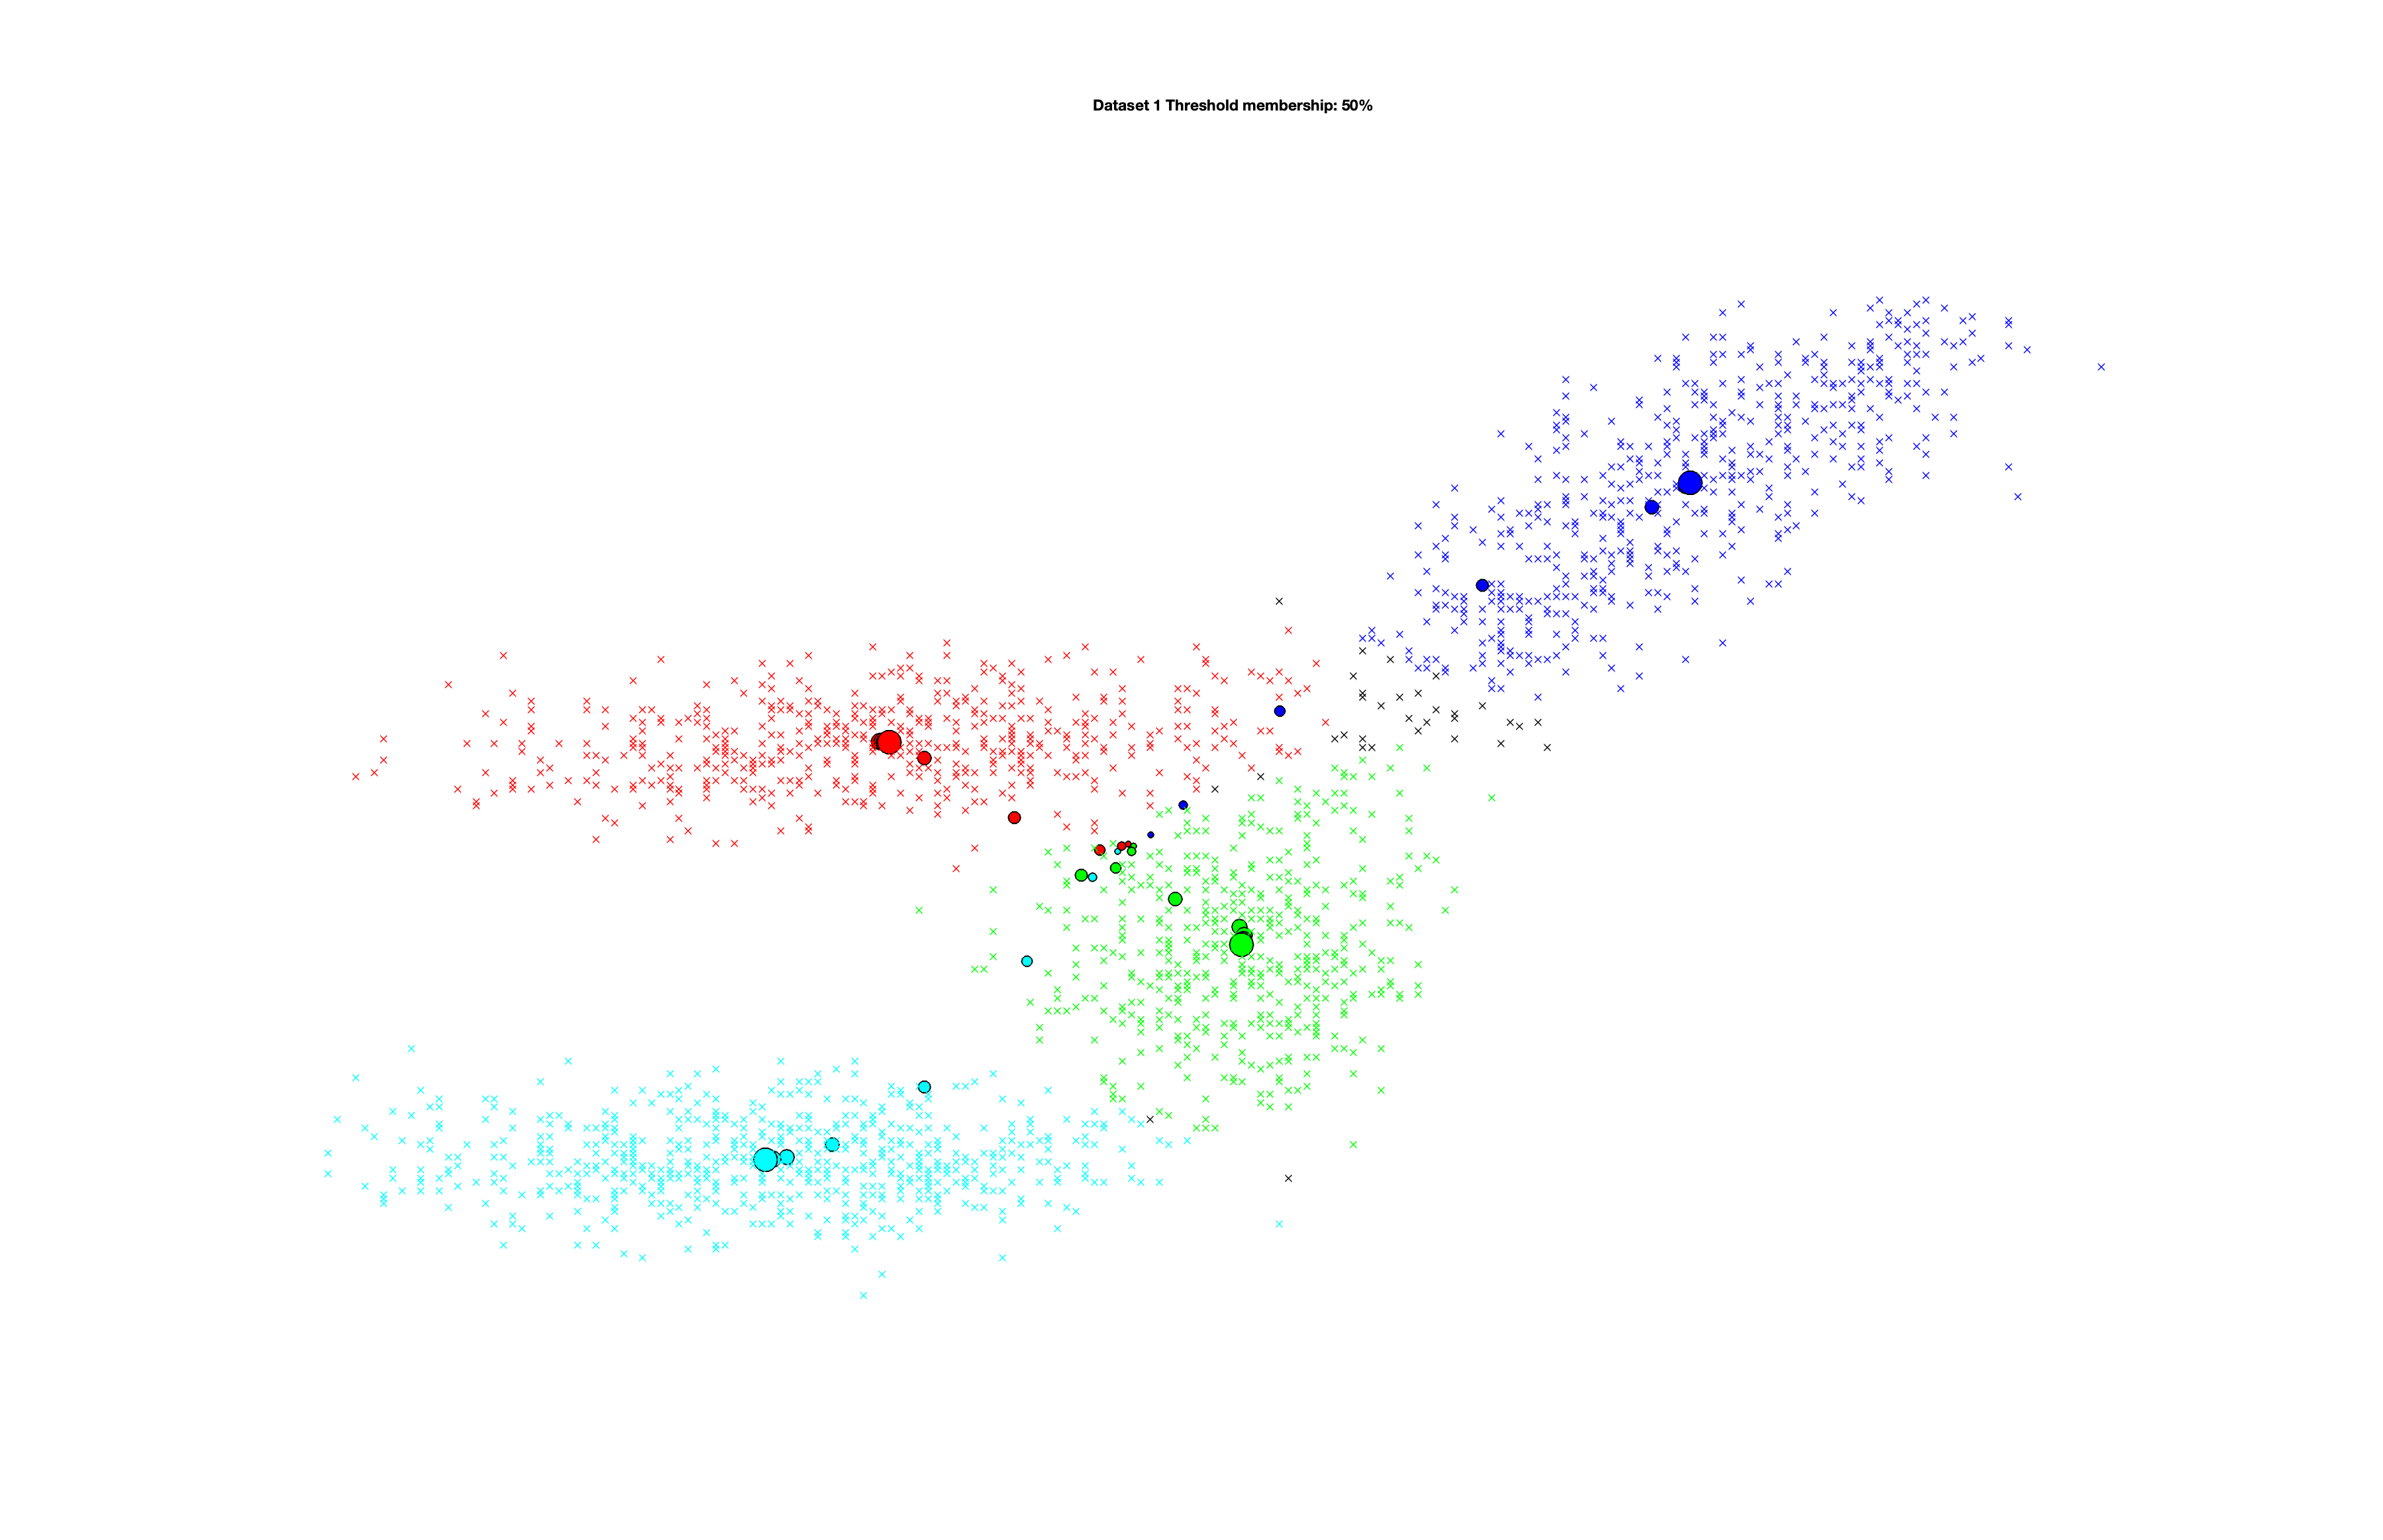

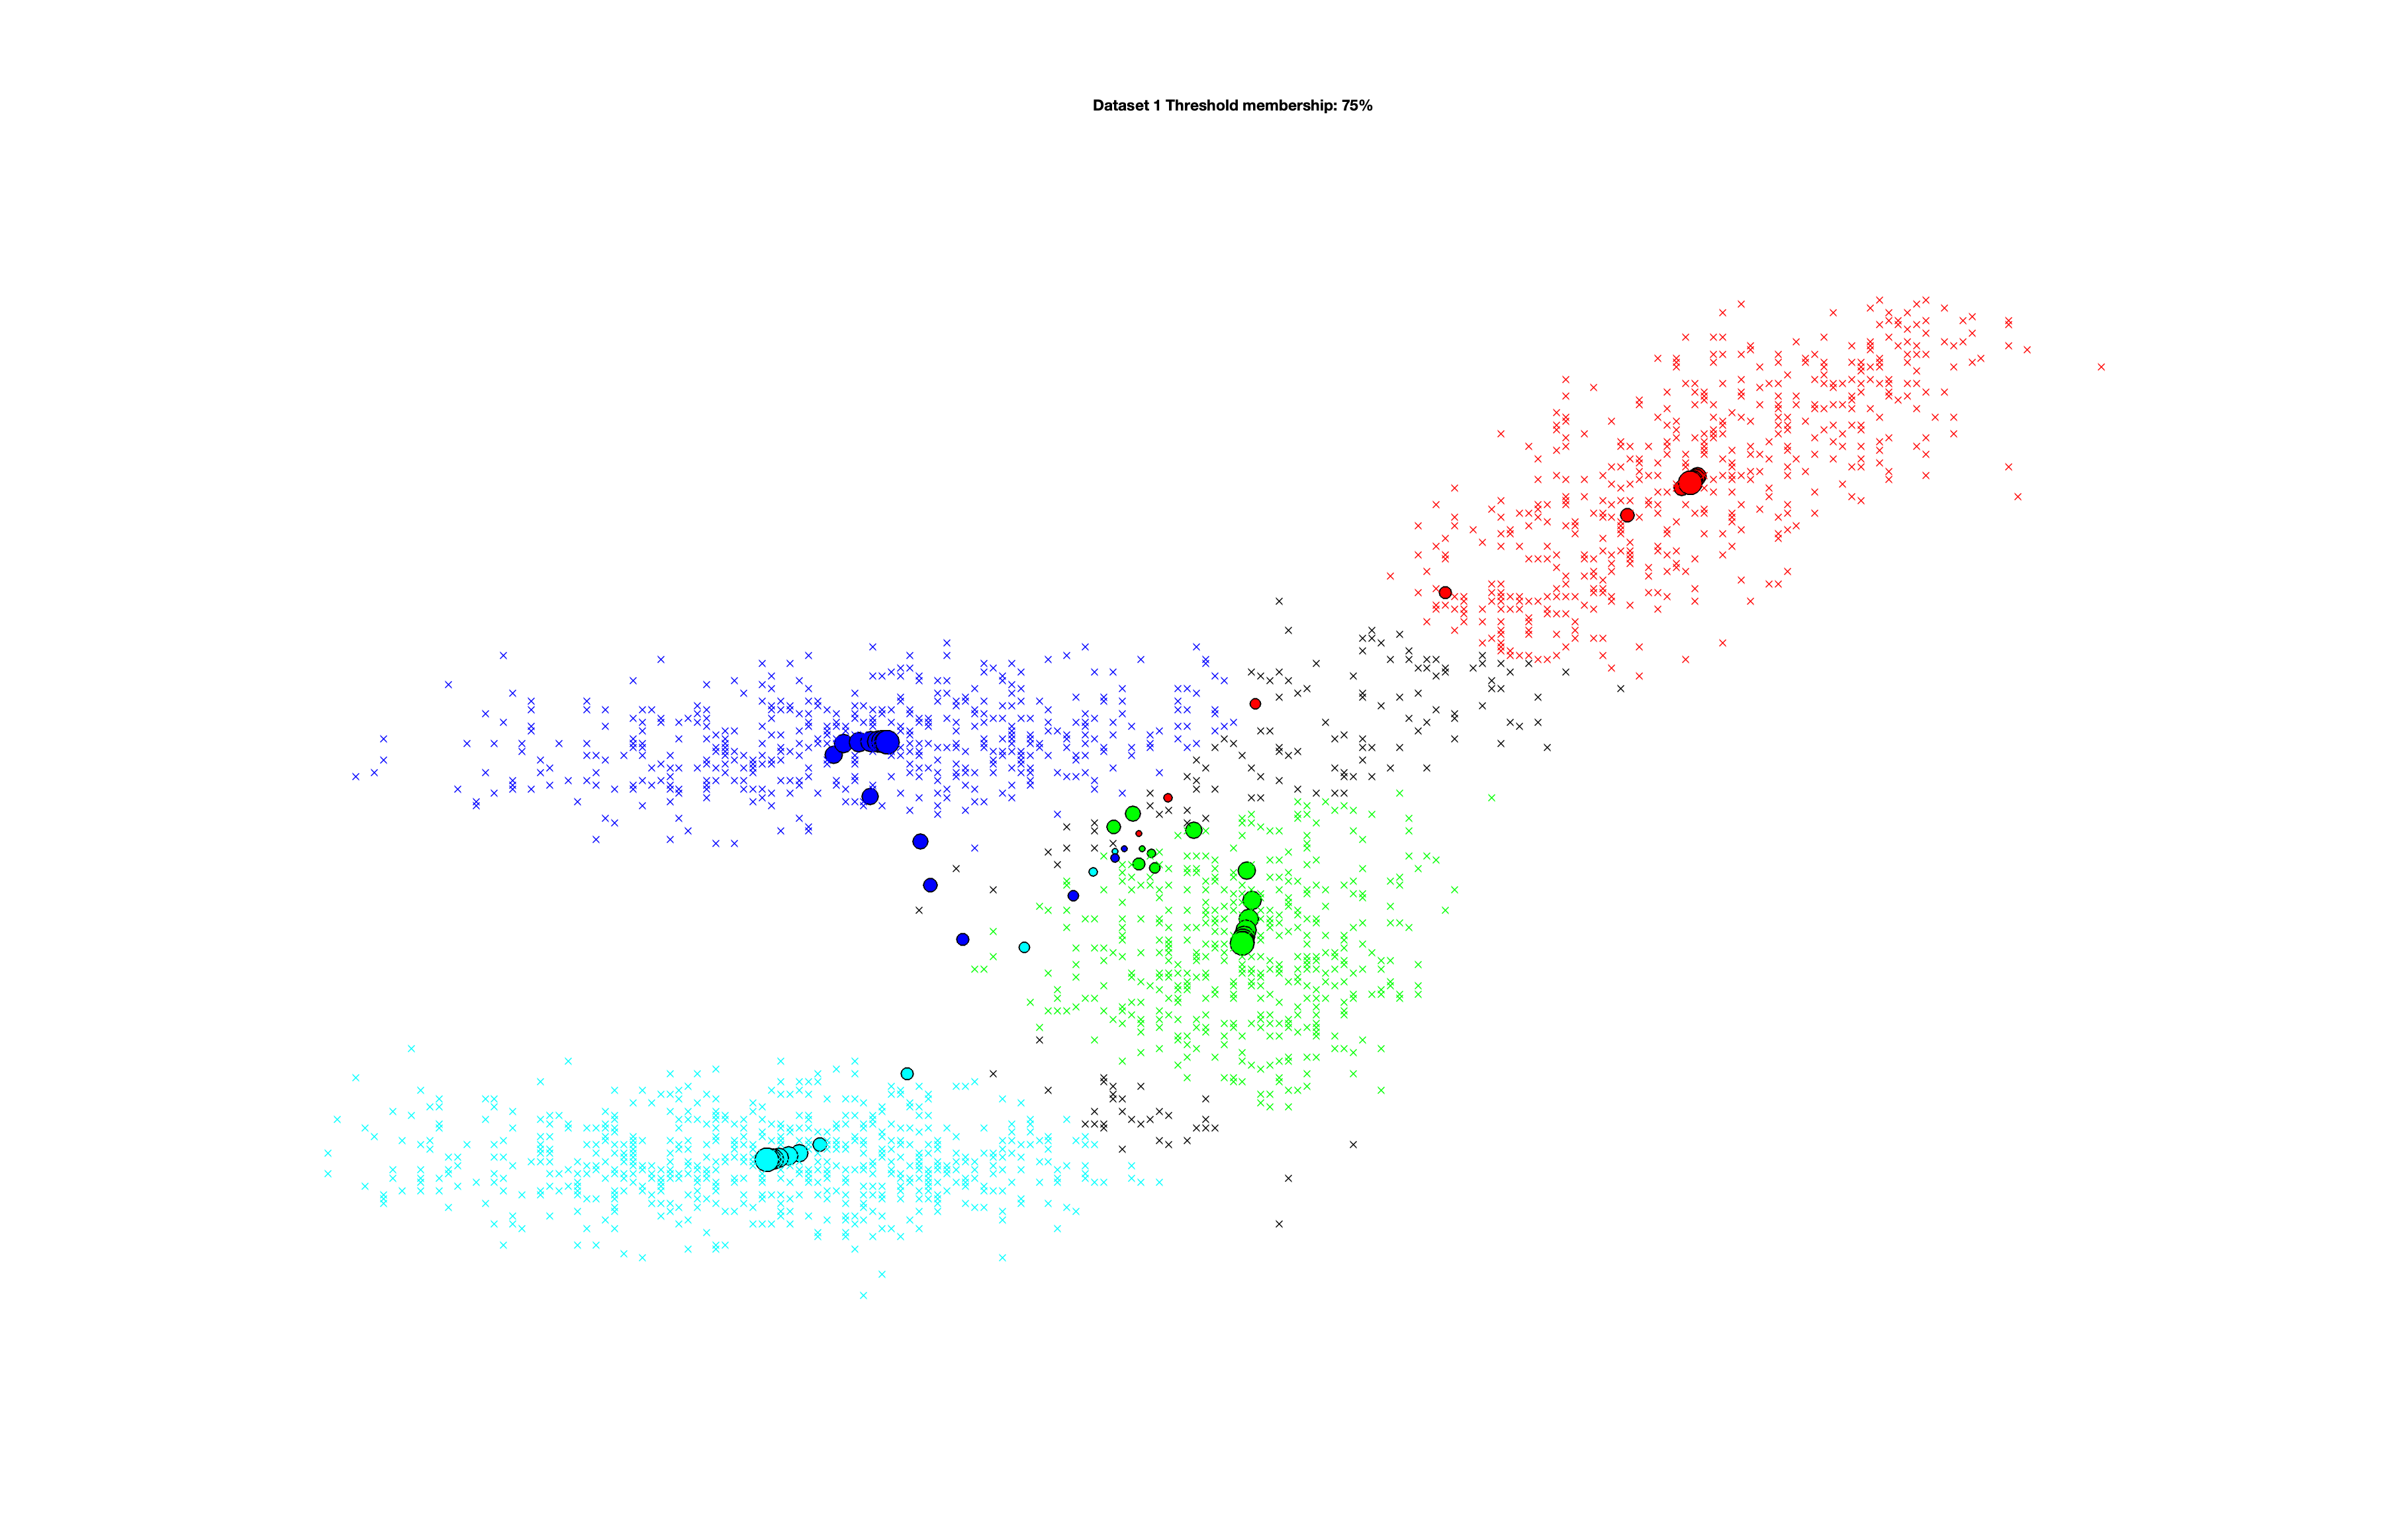

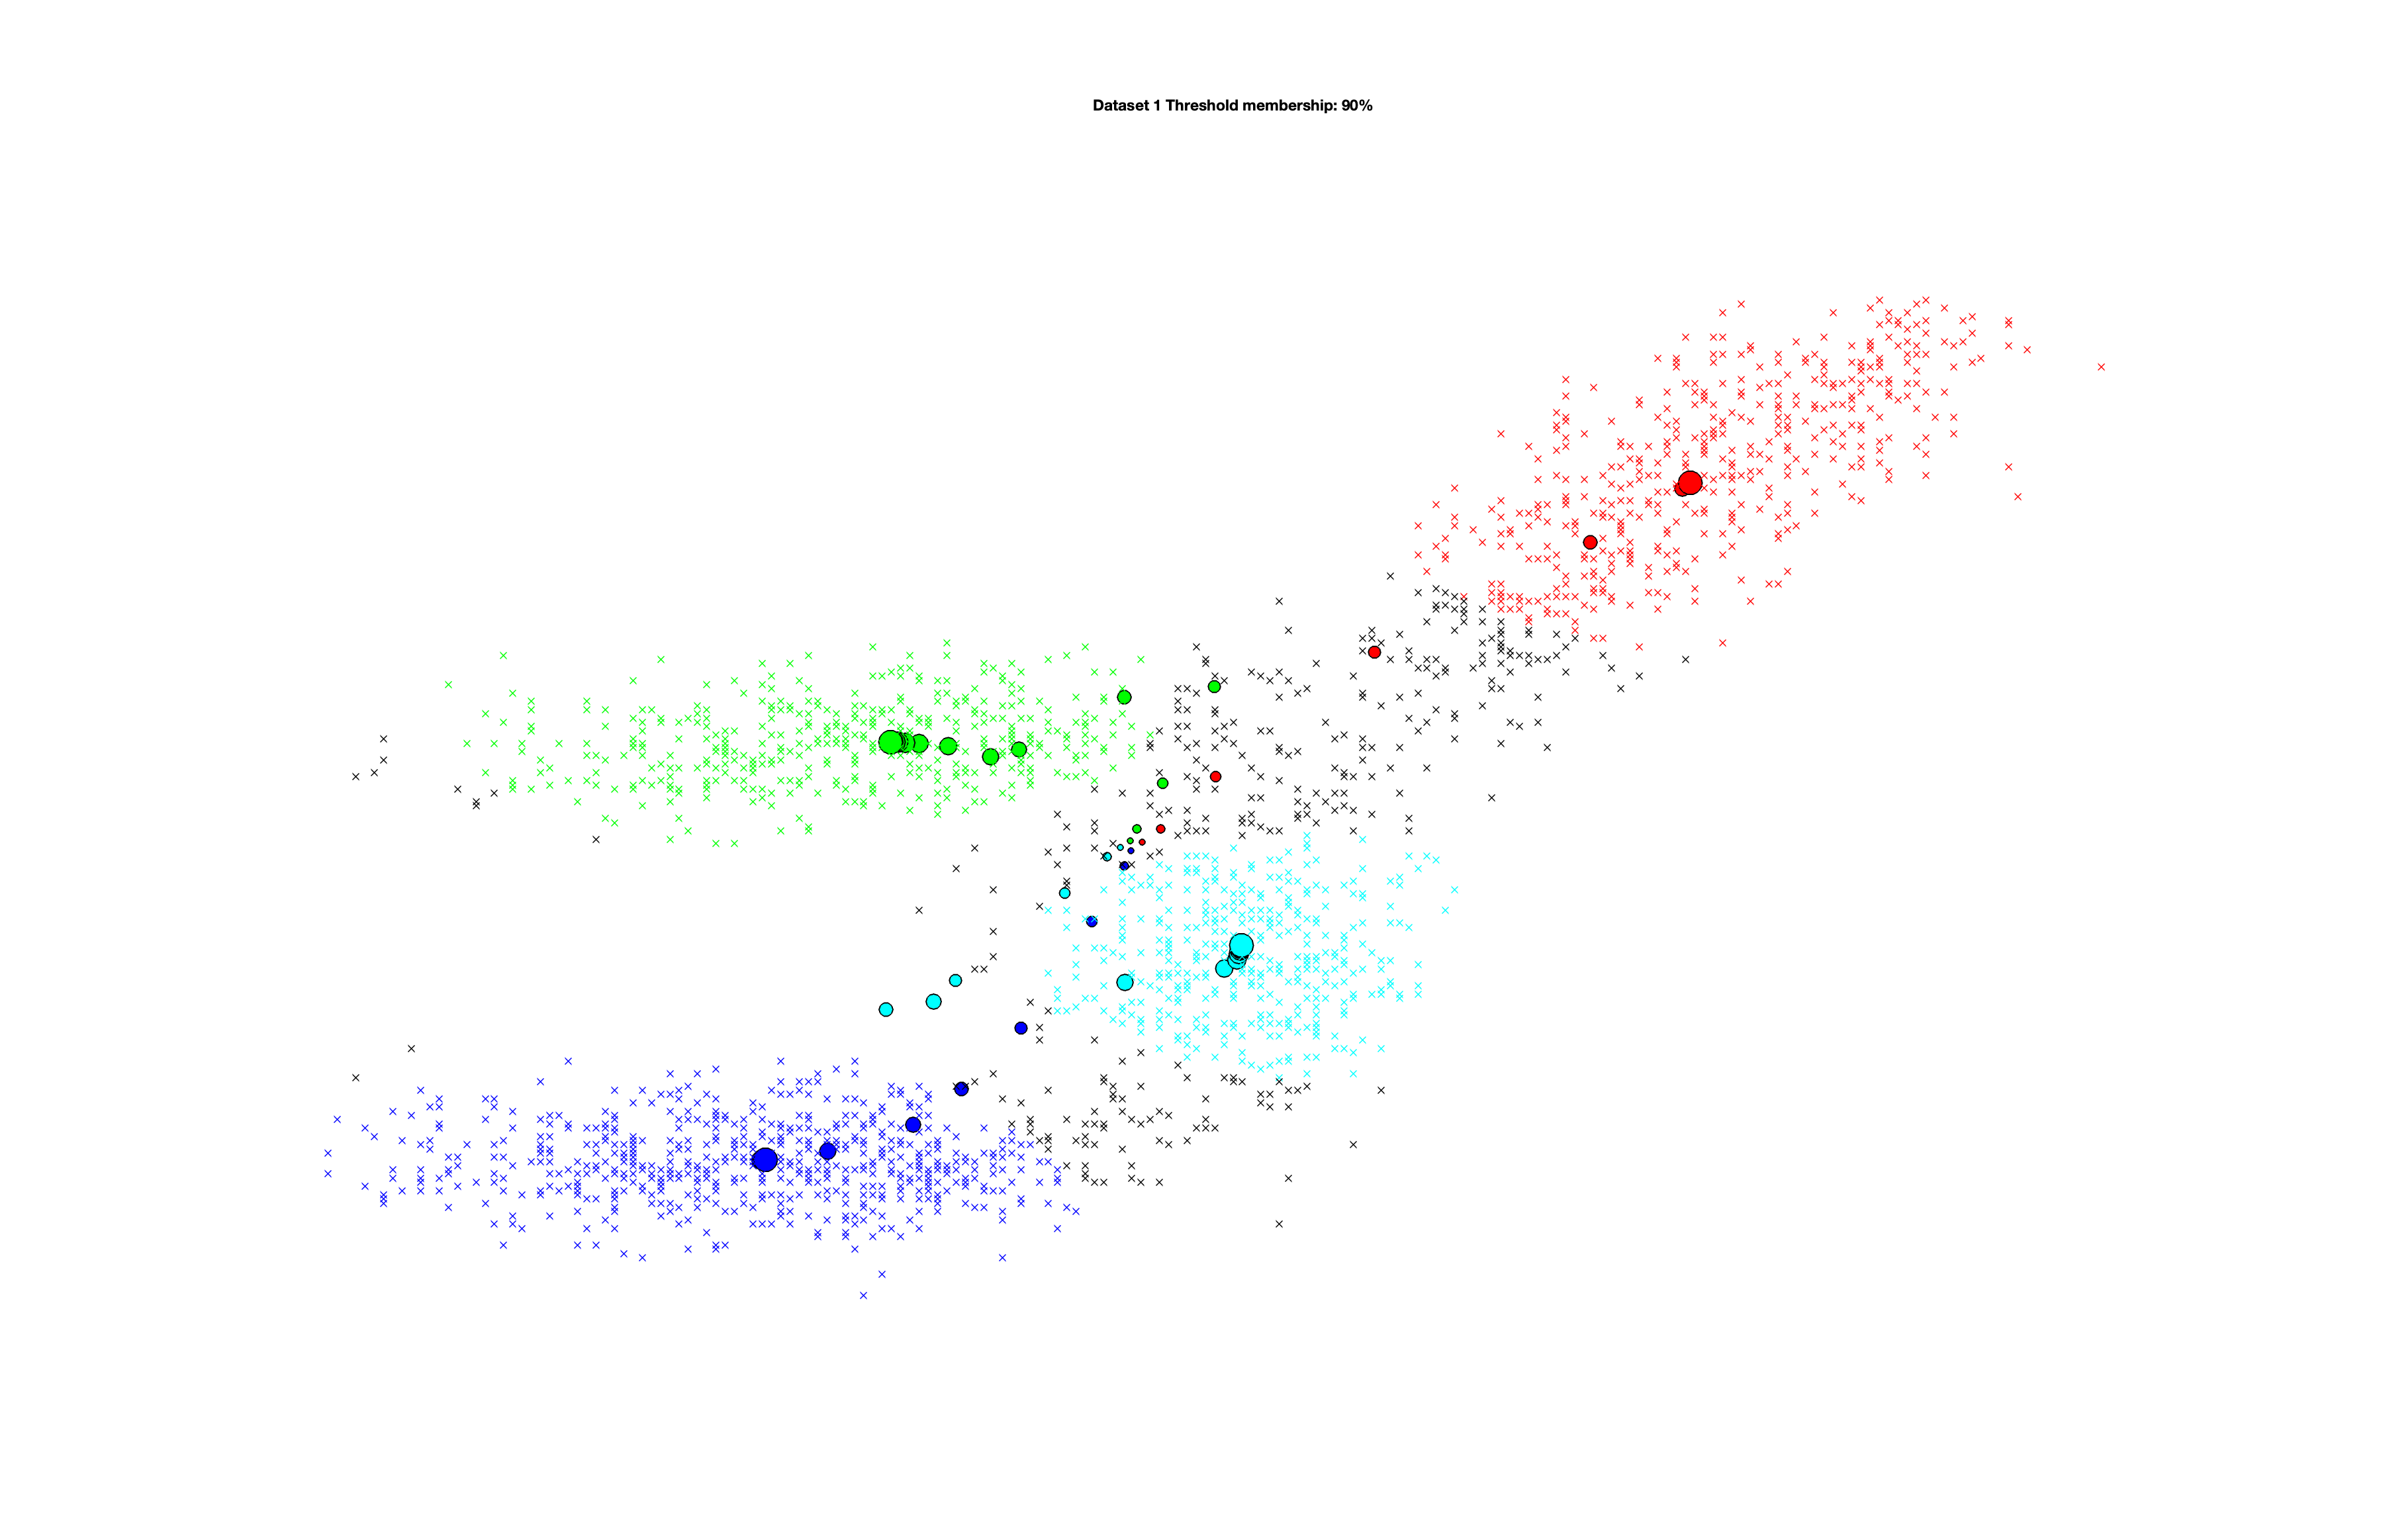

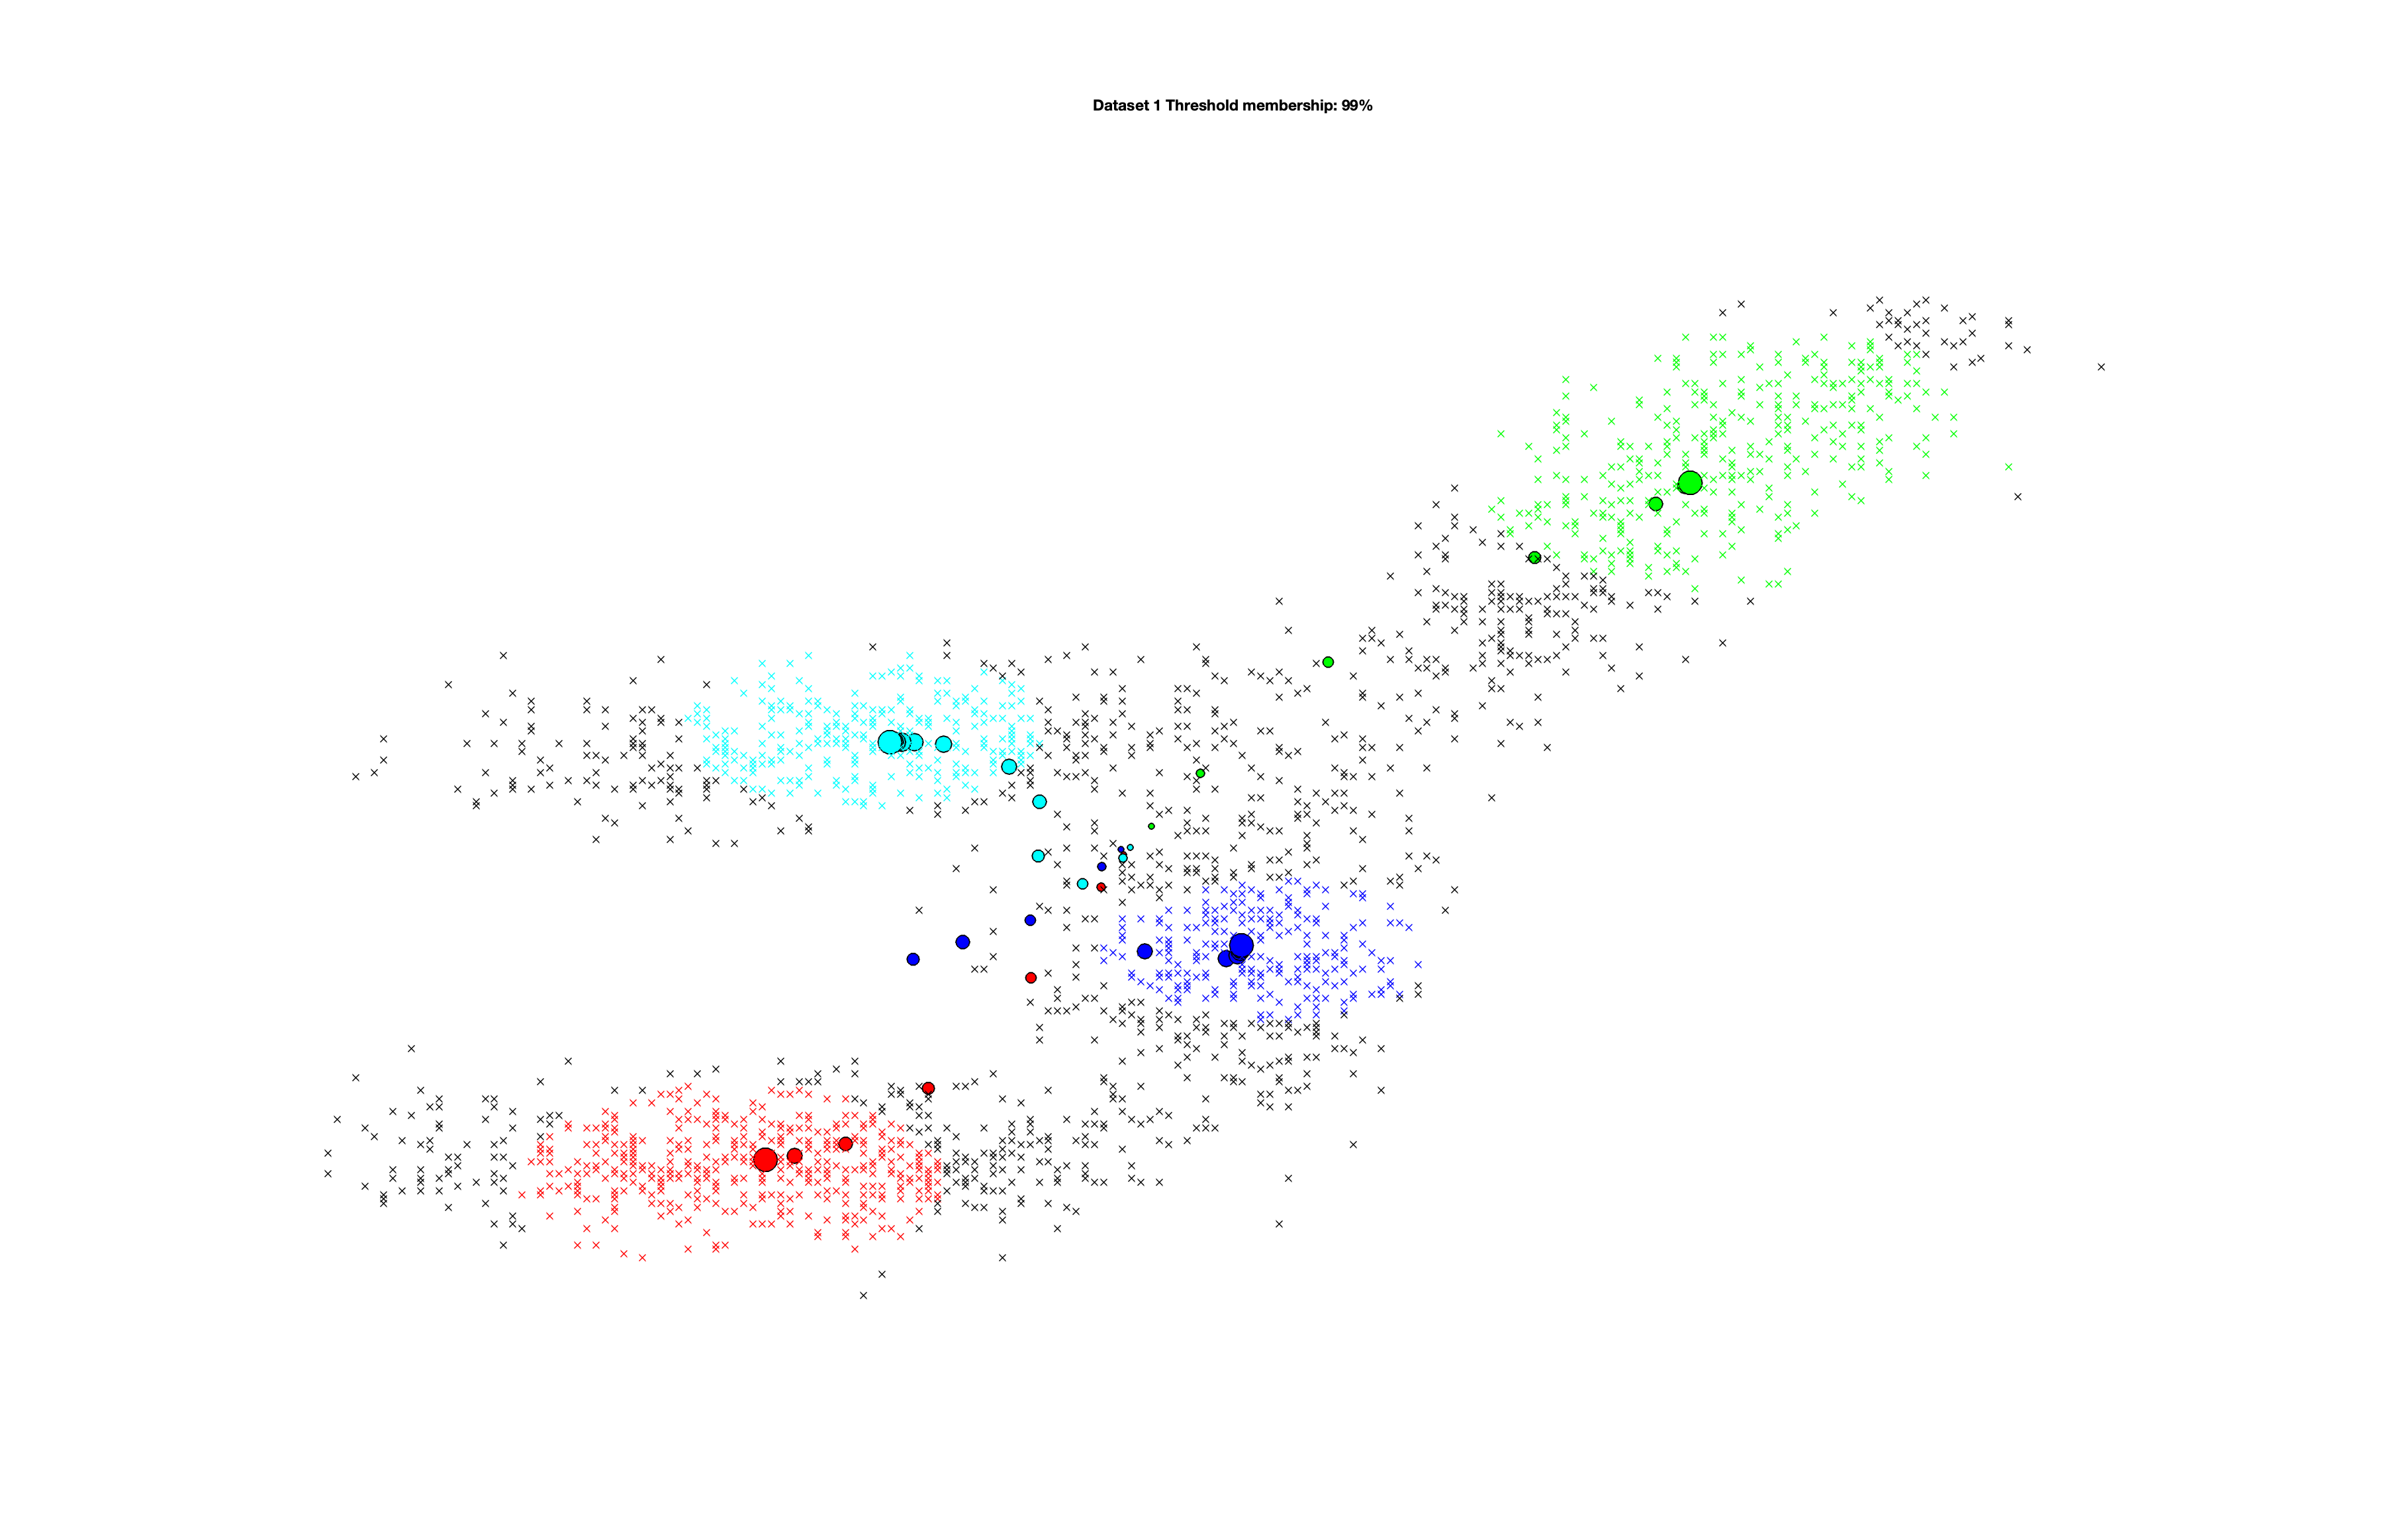

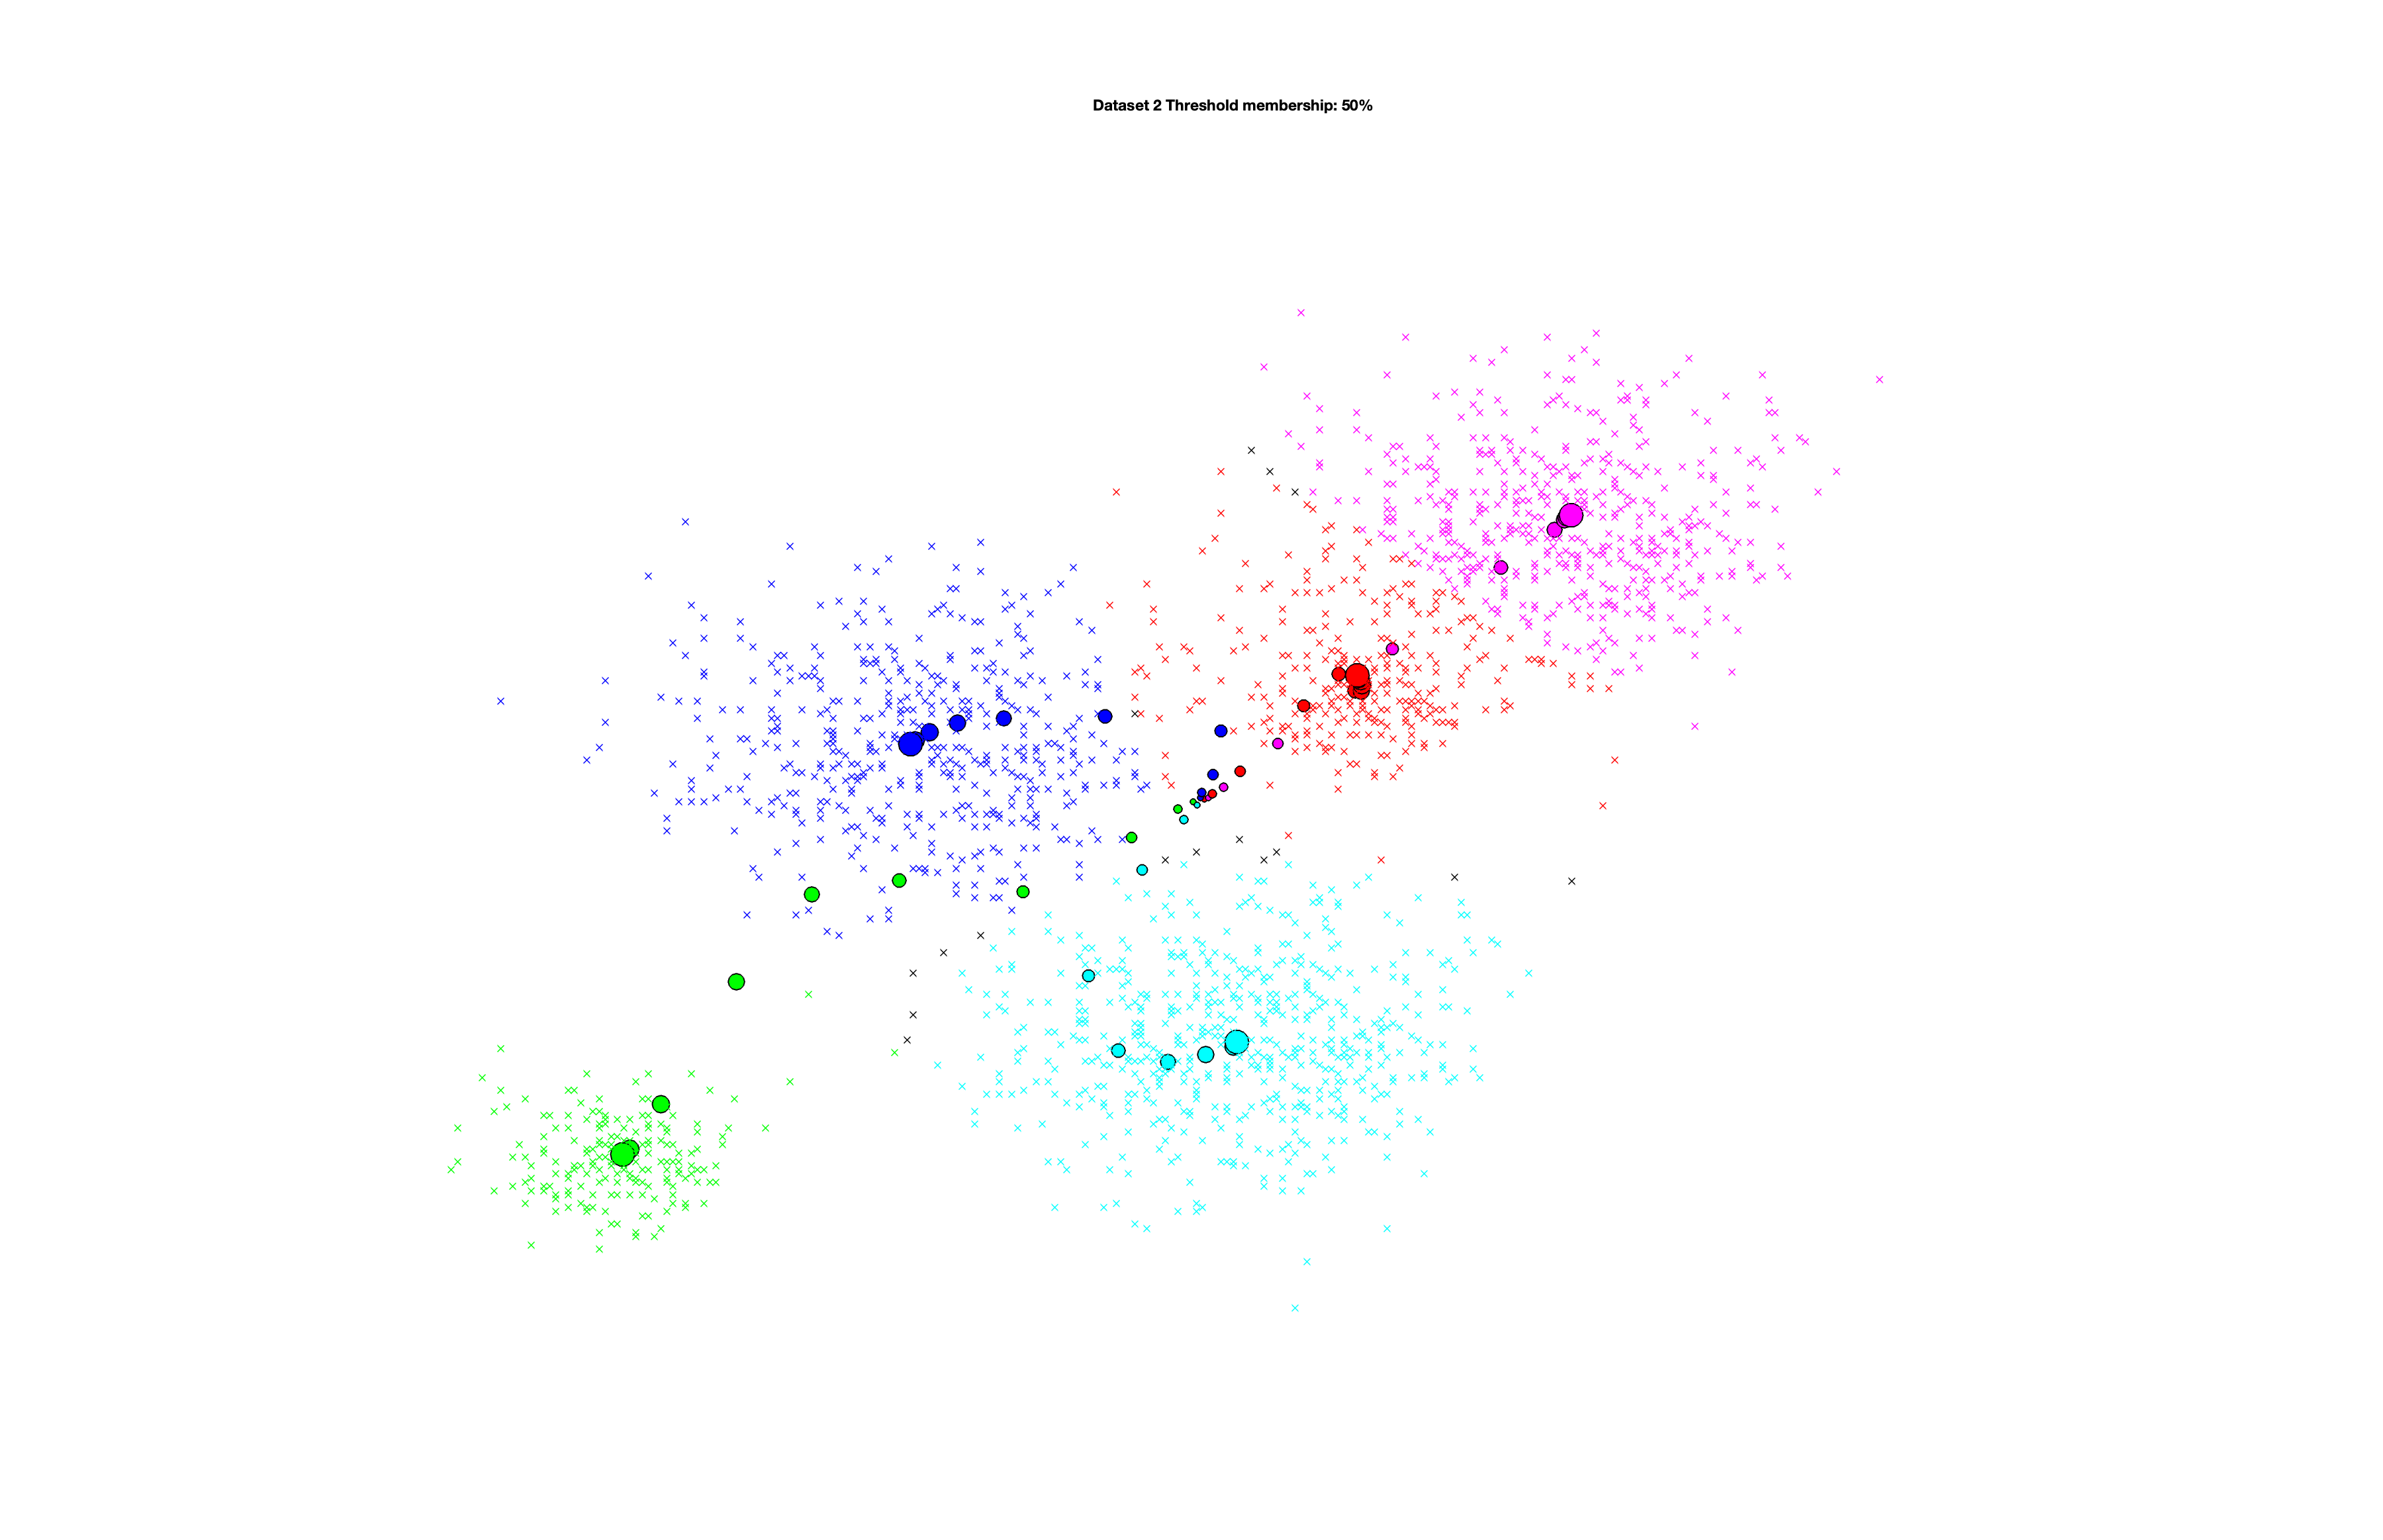

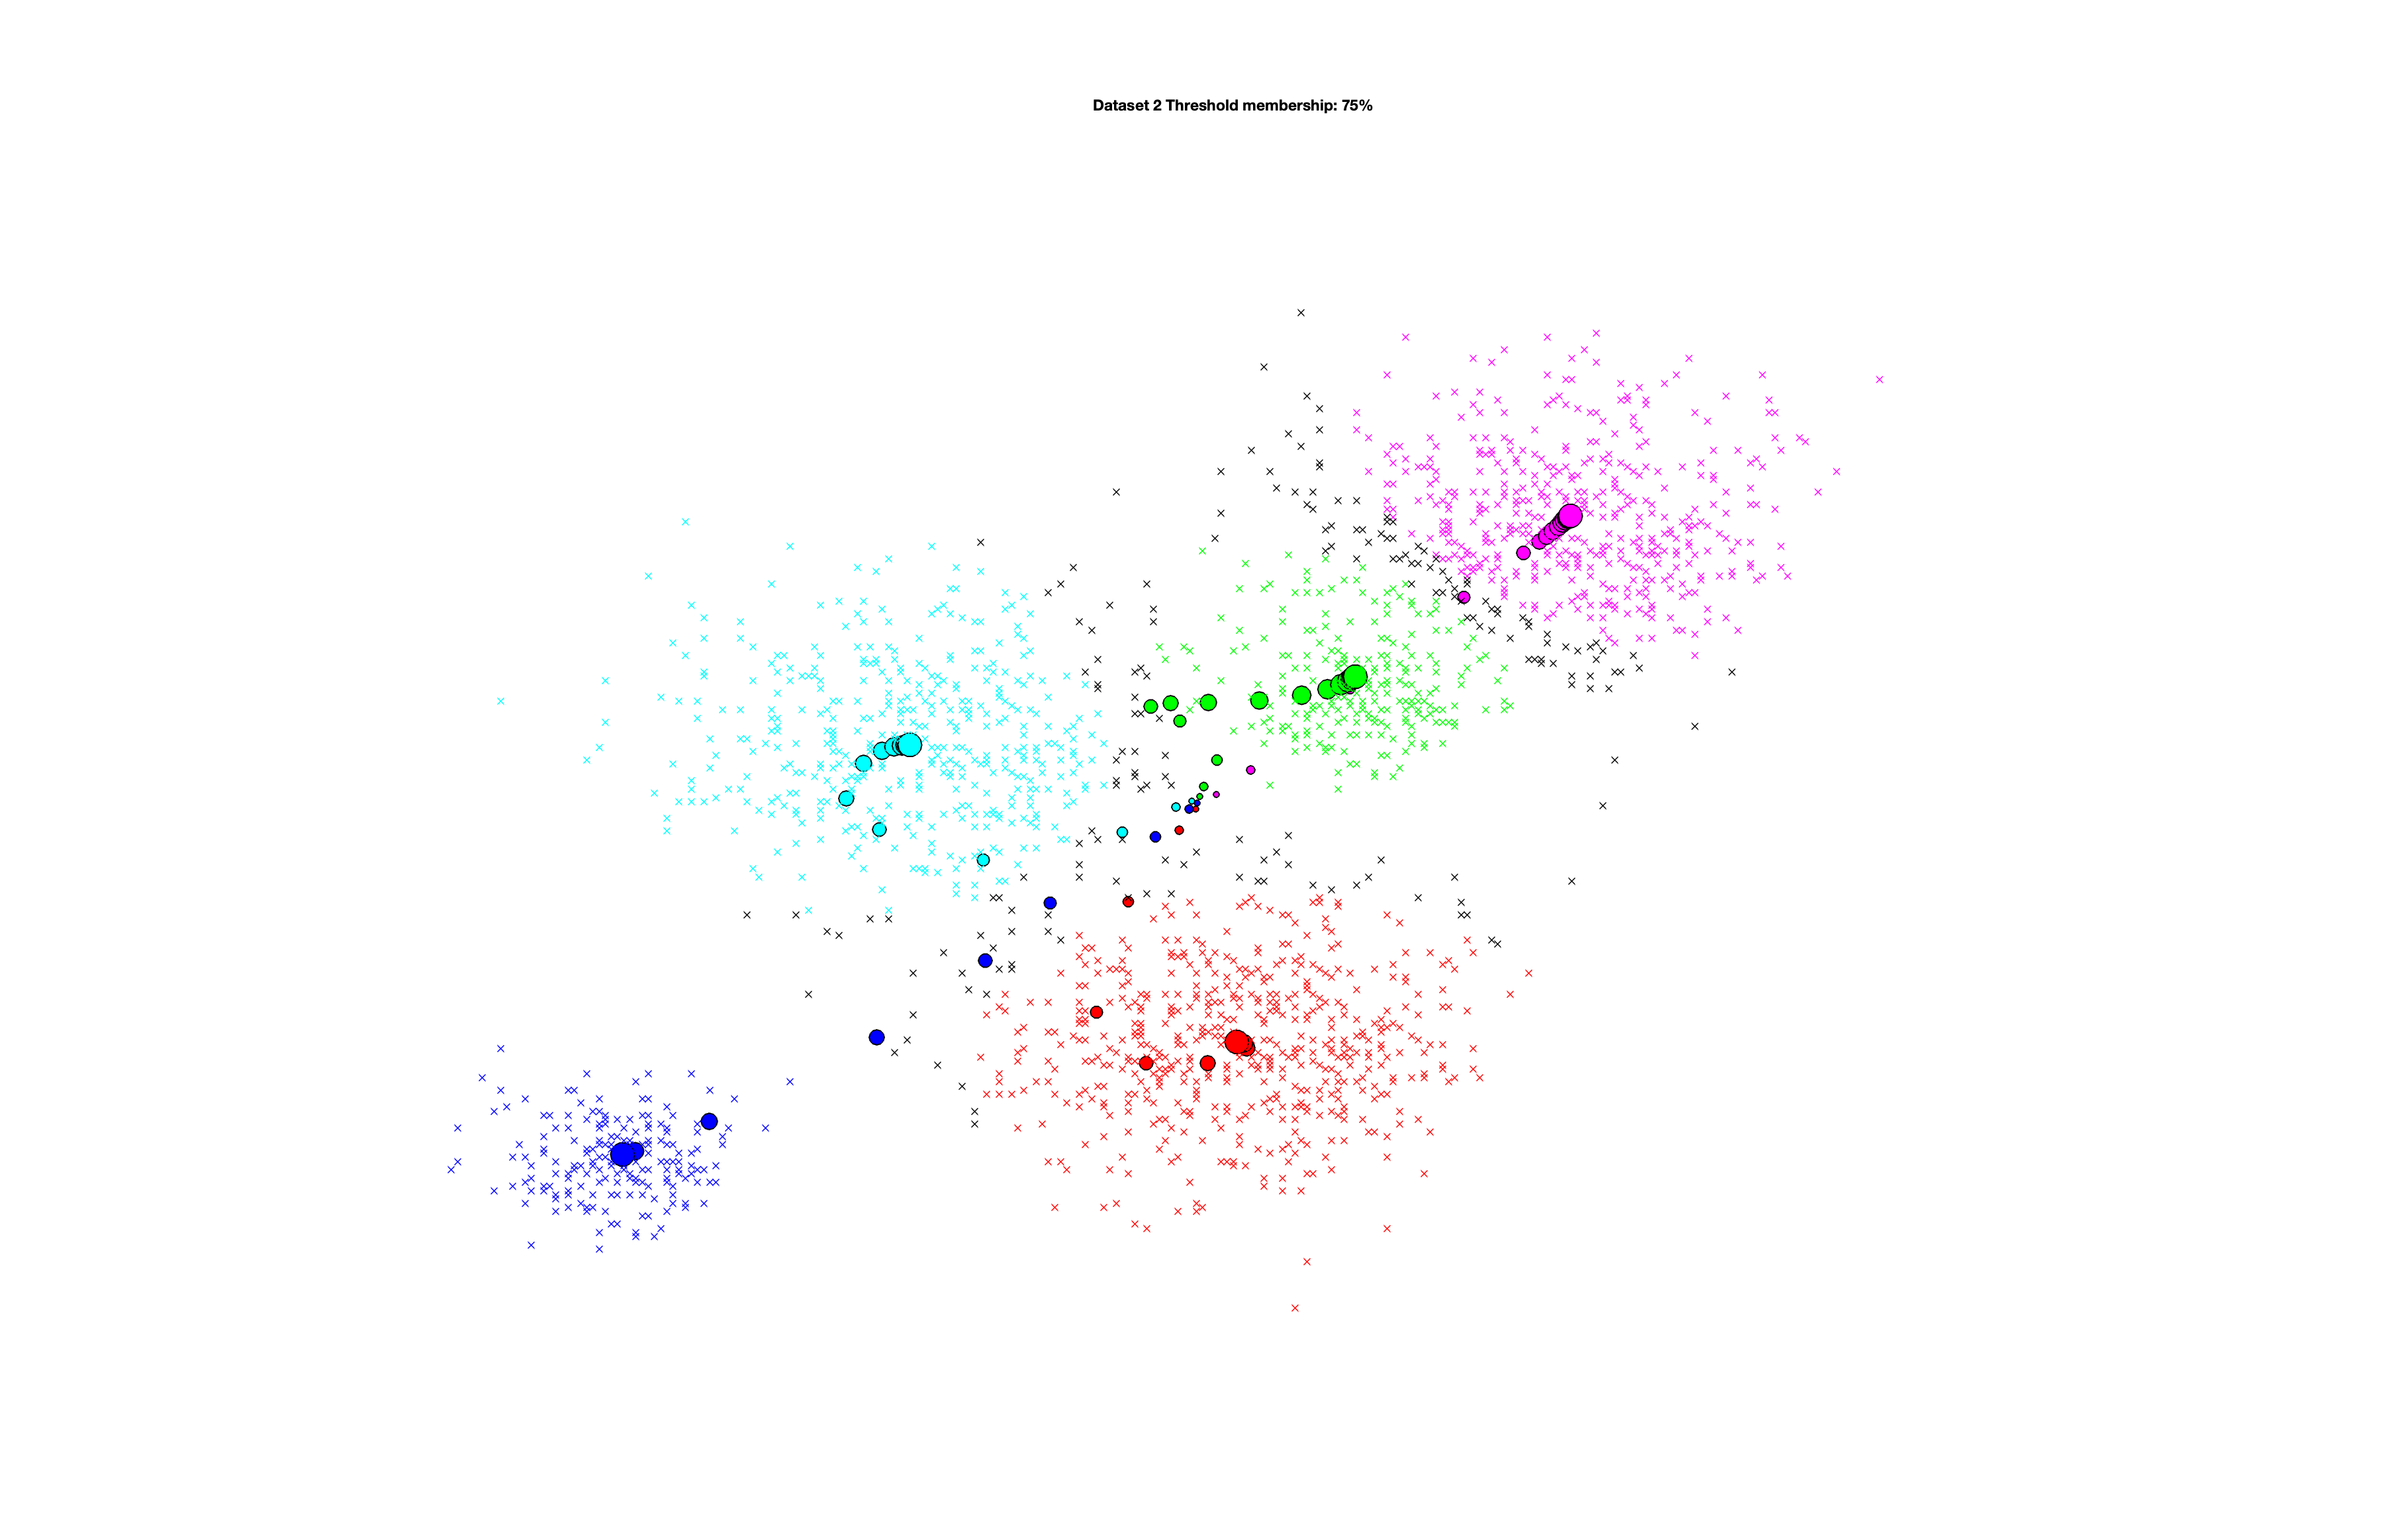

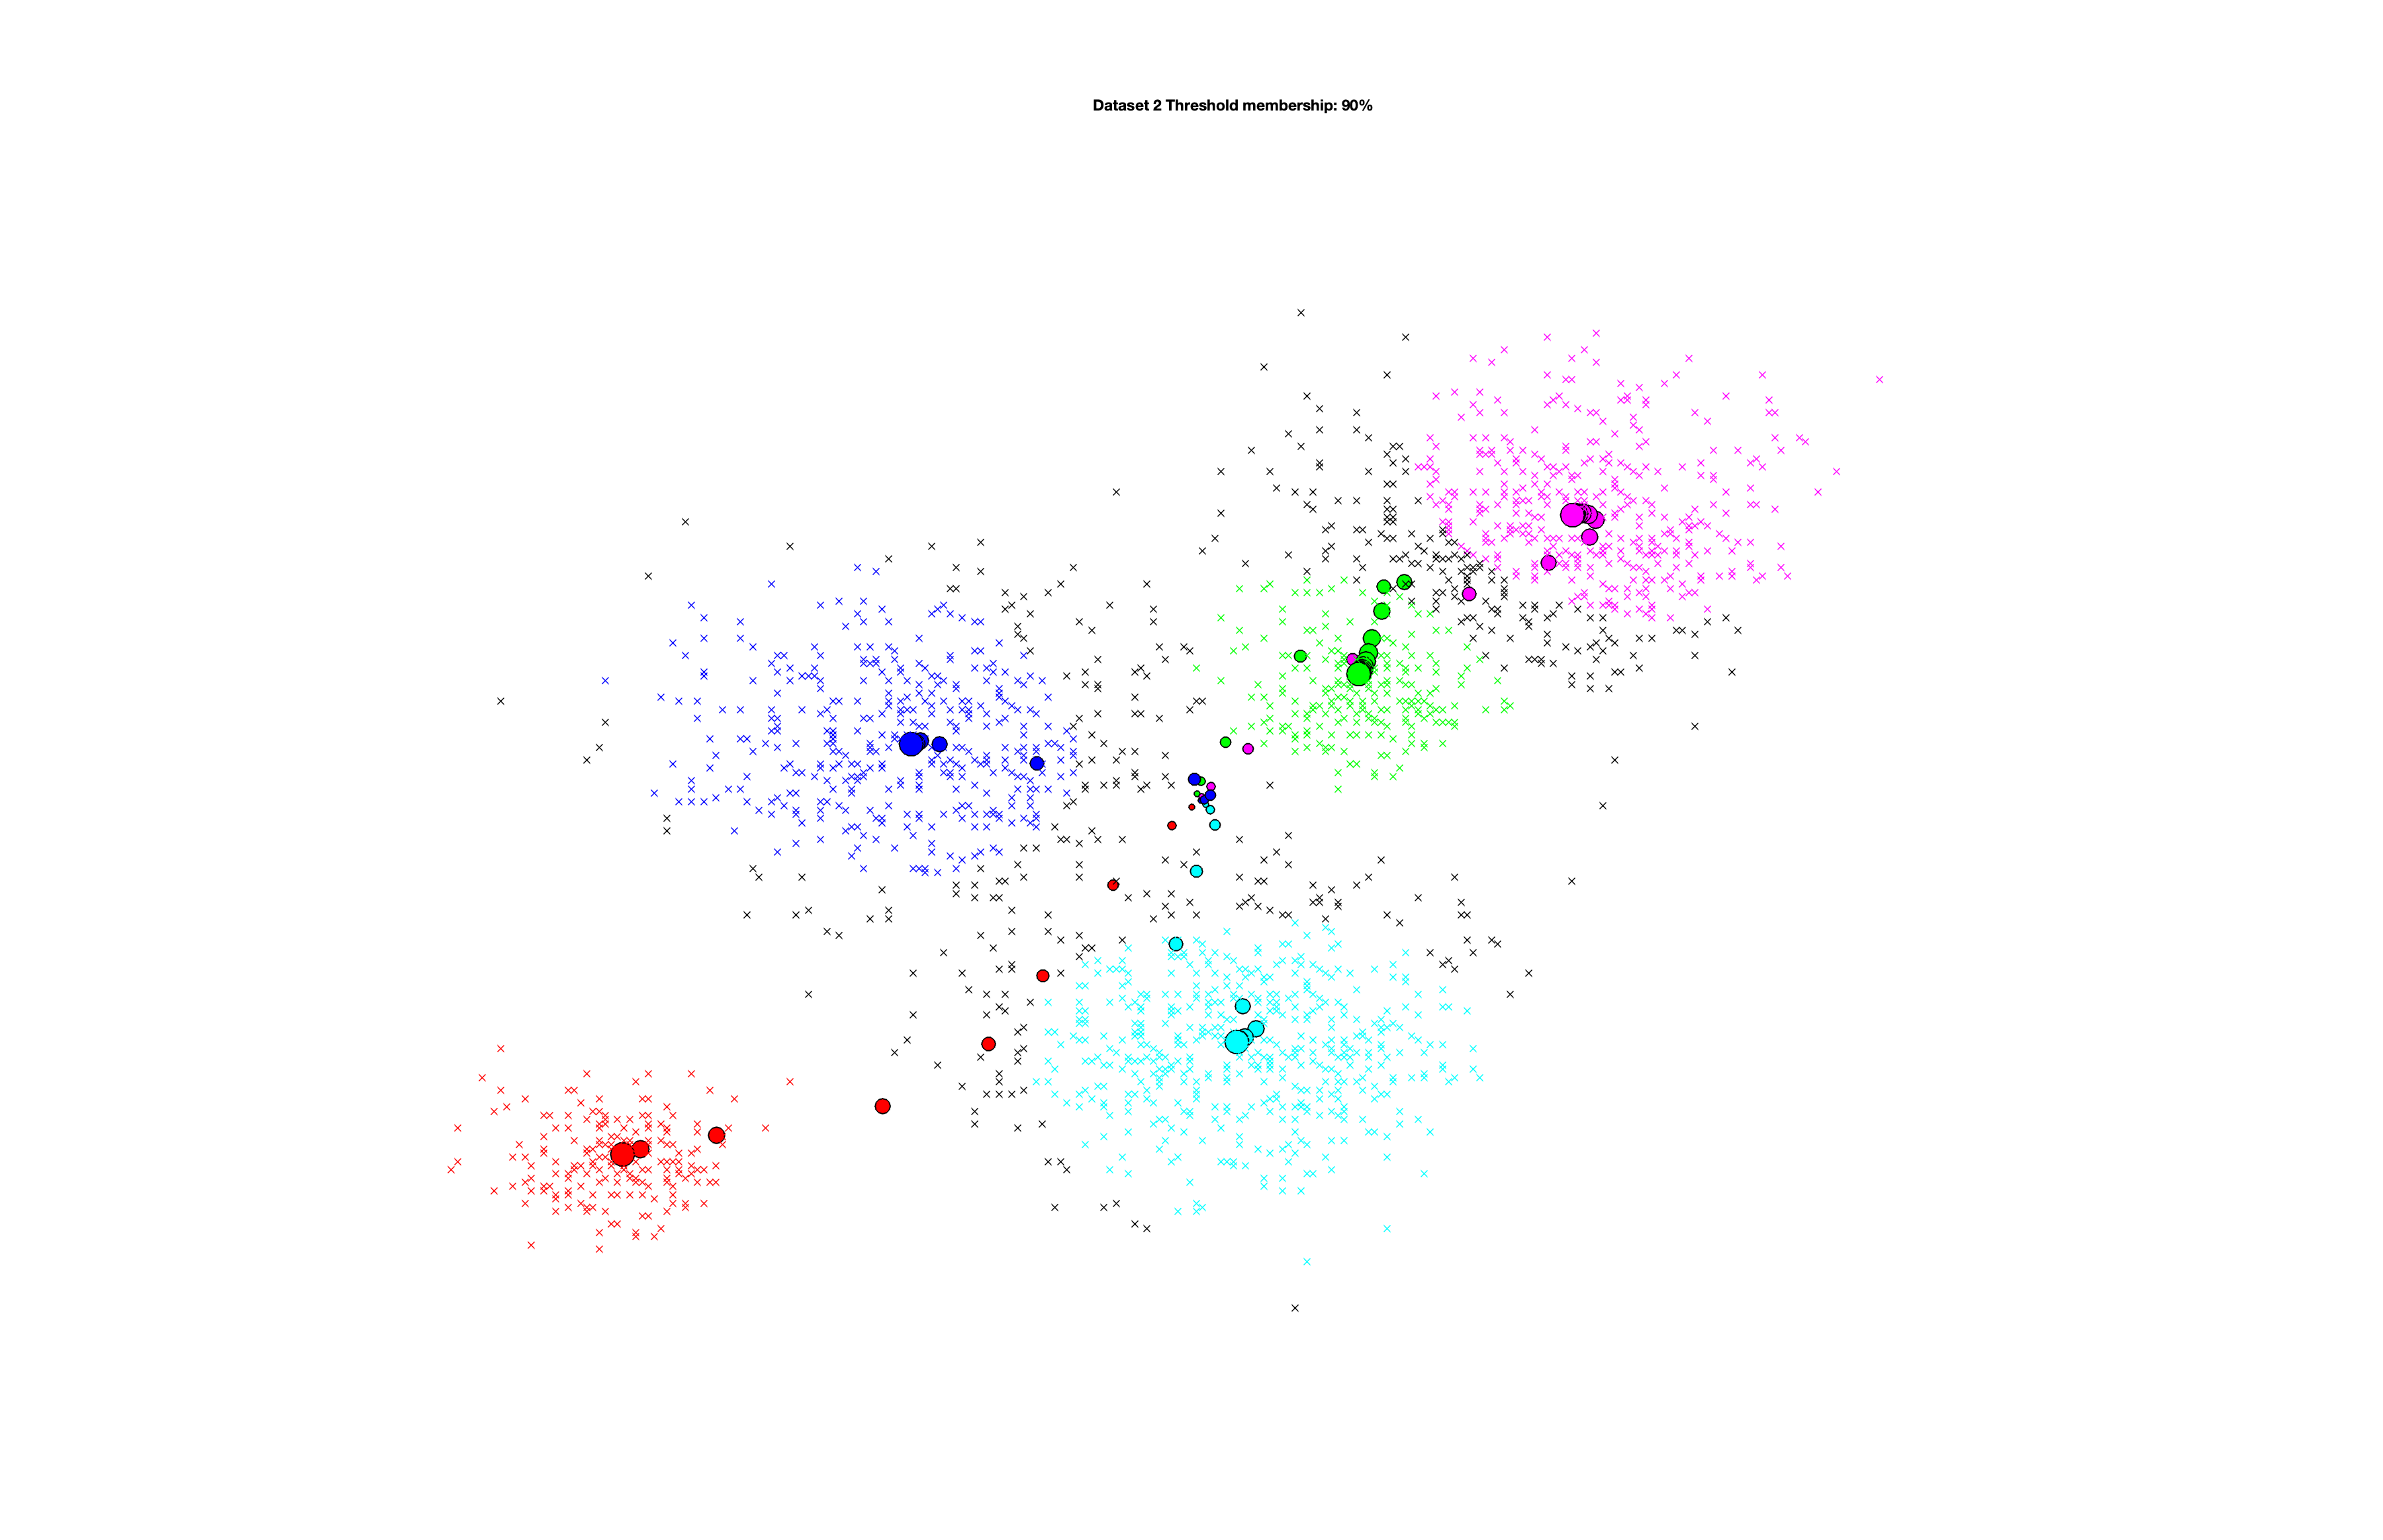

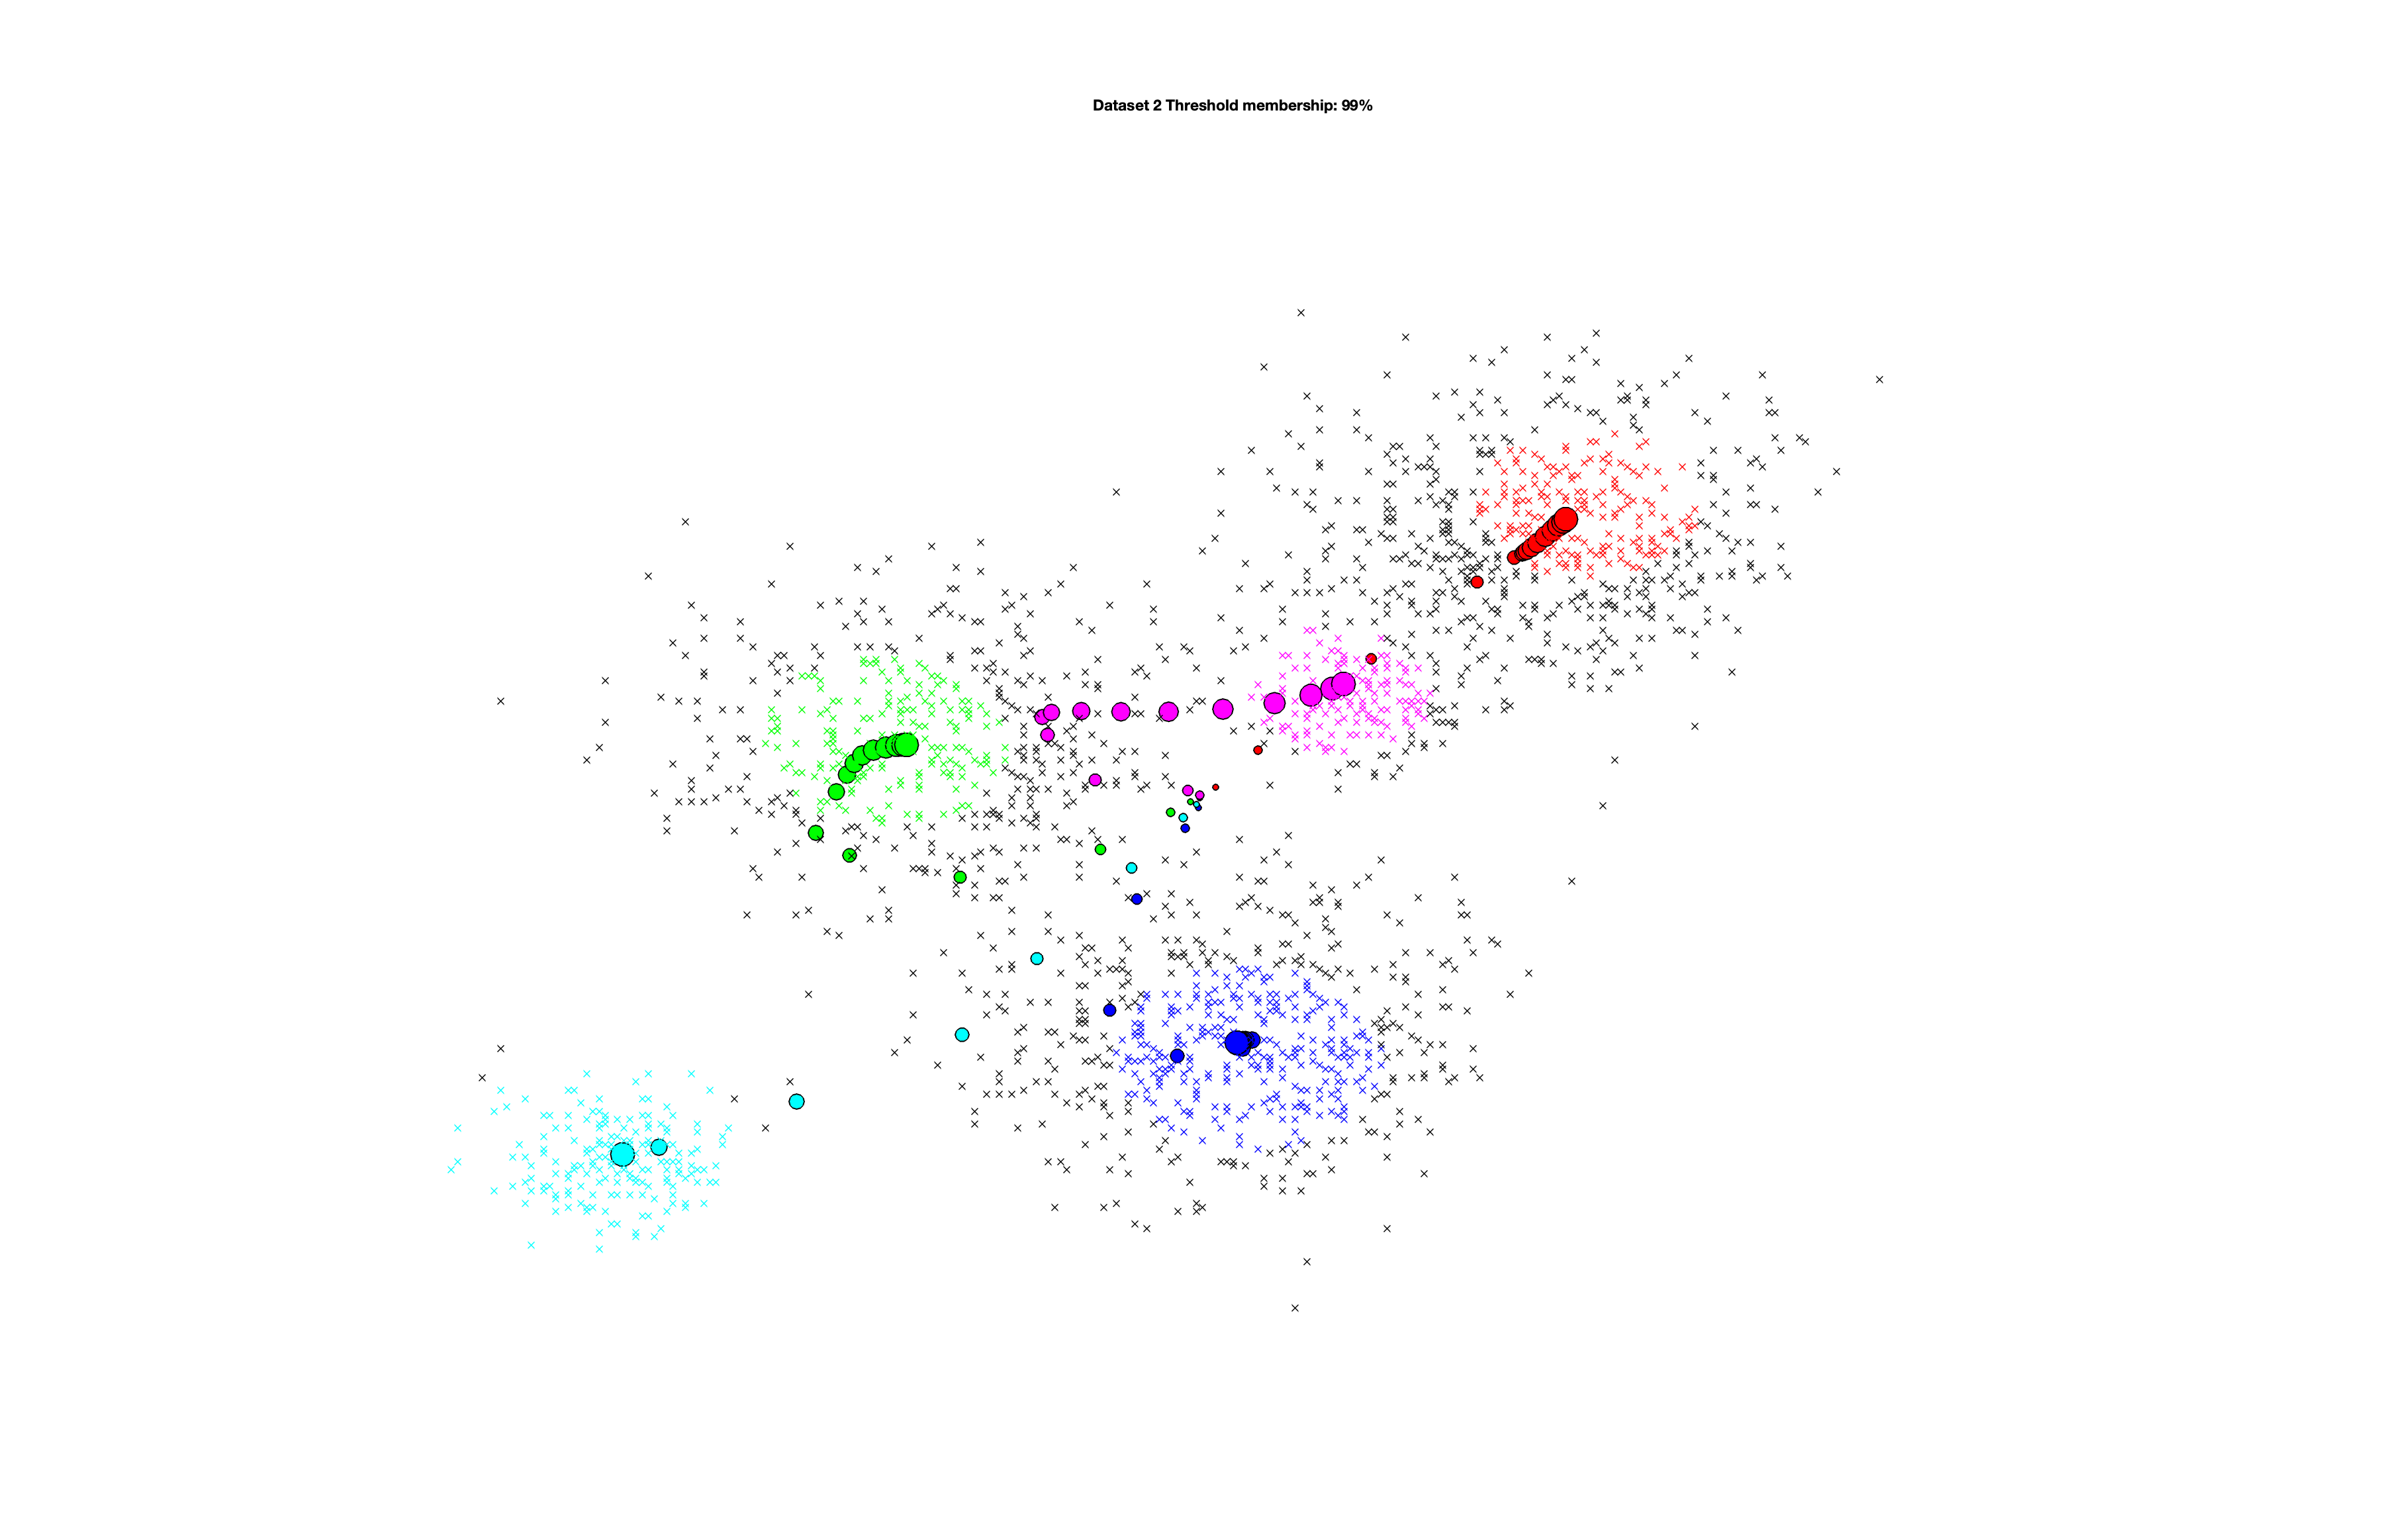

No data found for Dataset 3
No data found for Dataset 3
No data found for Dataset 3
No data found for Dataset 3
No data found for Dataset 4
No data found for Dataset 4
No data found for Dataset 4
No data found for Dataset 4


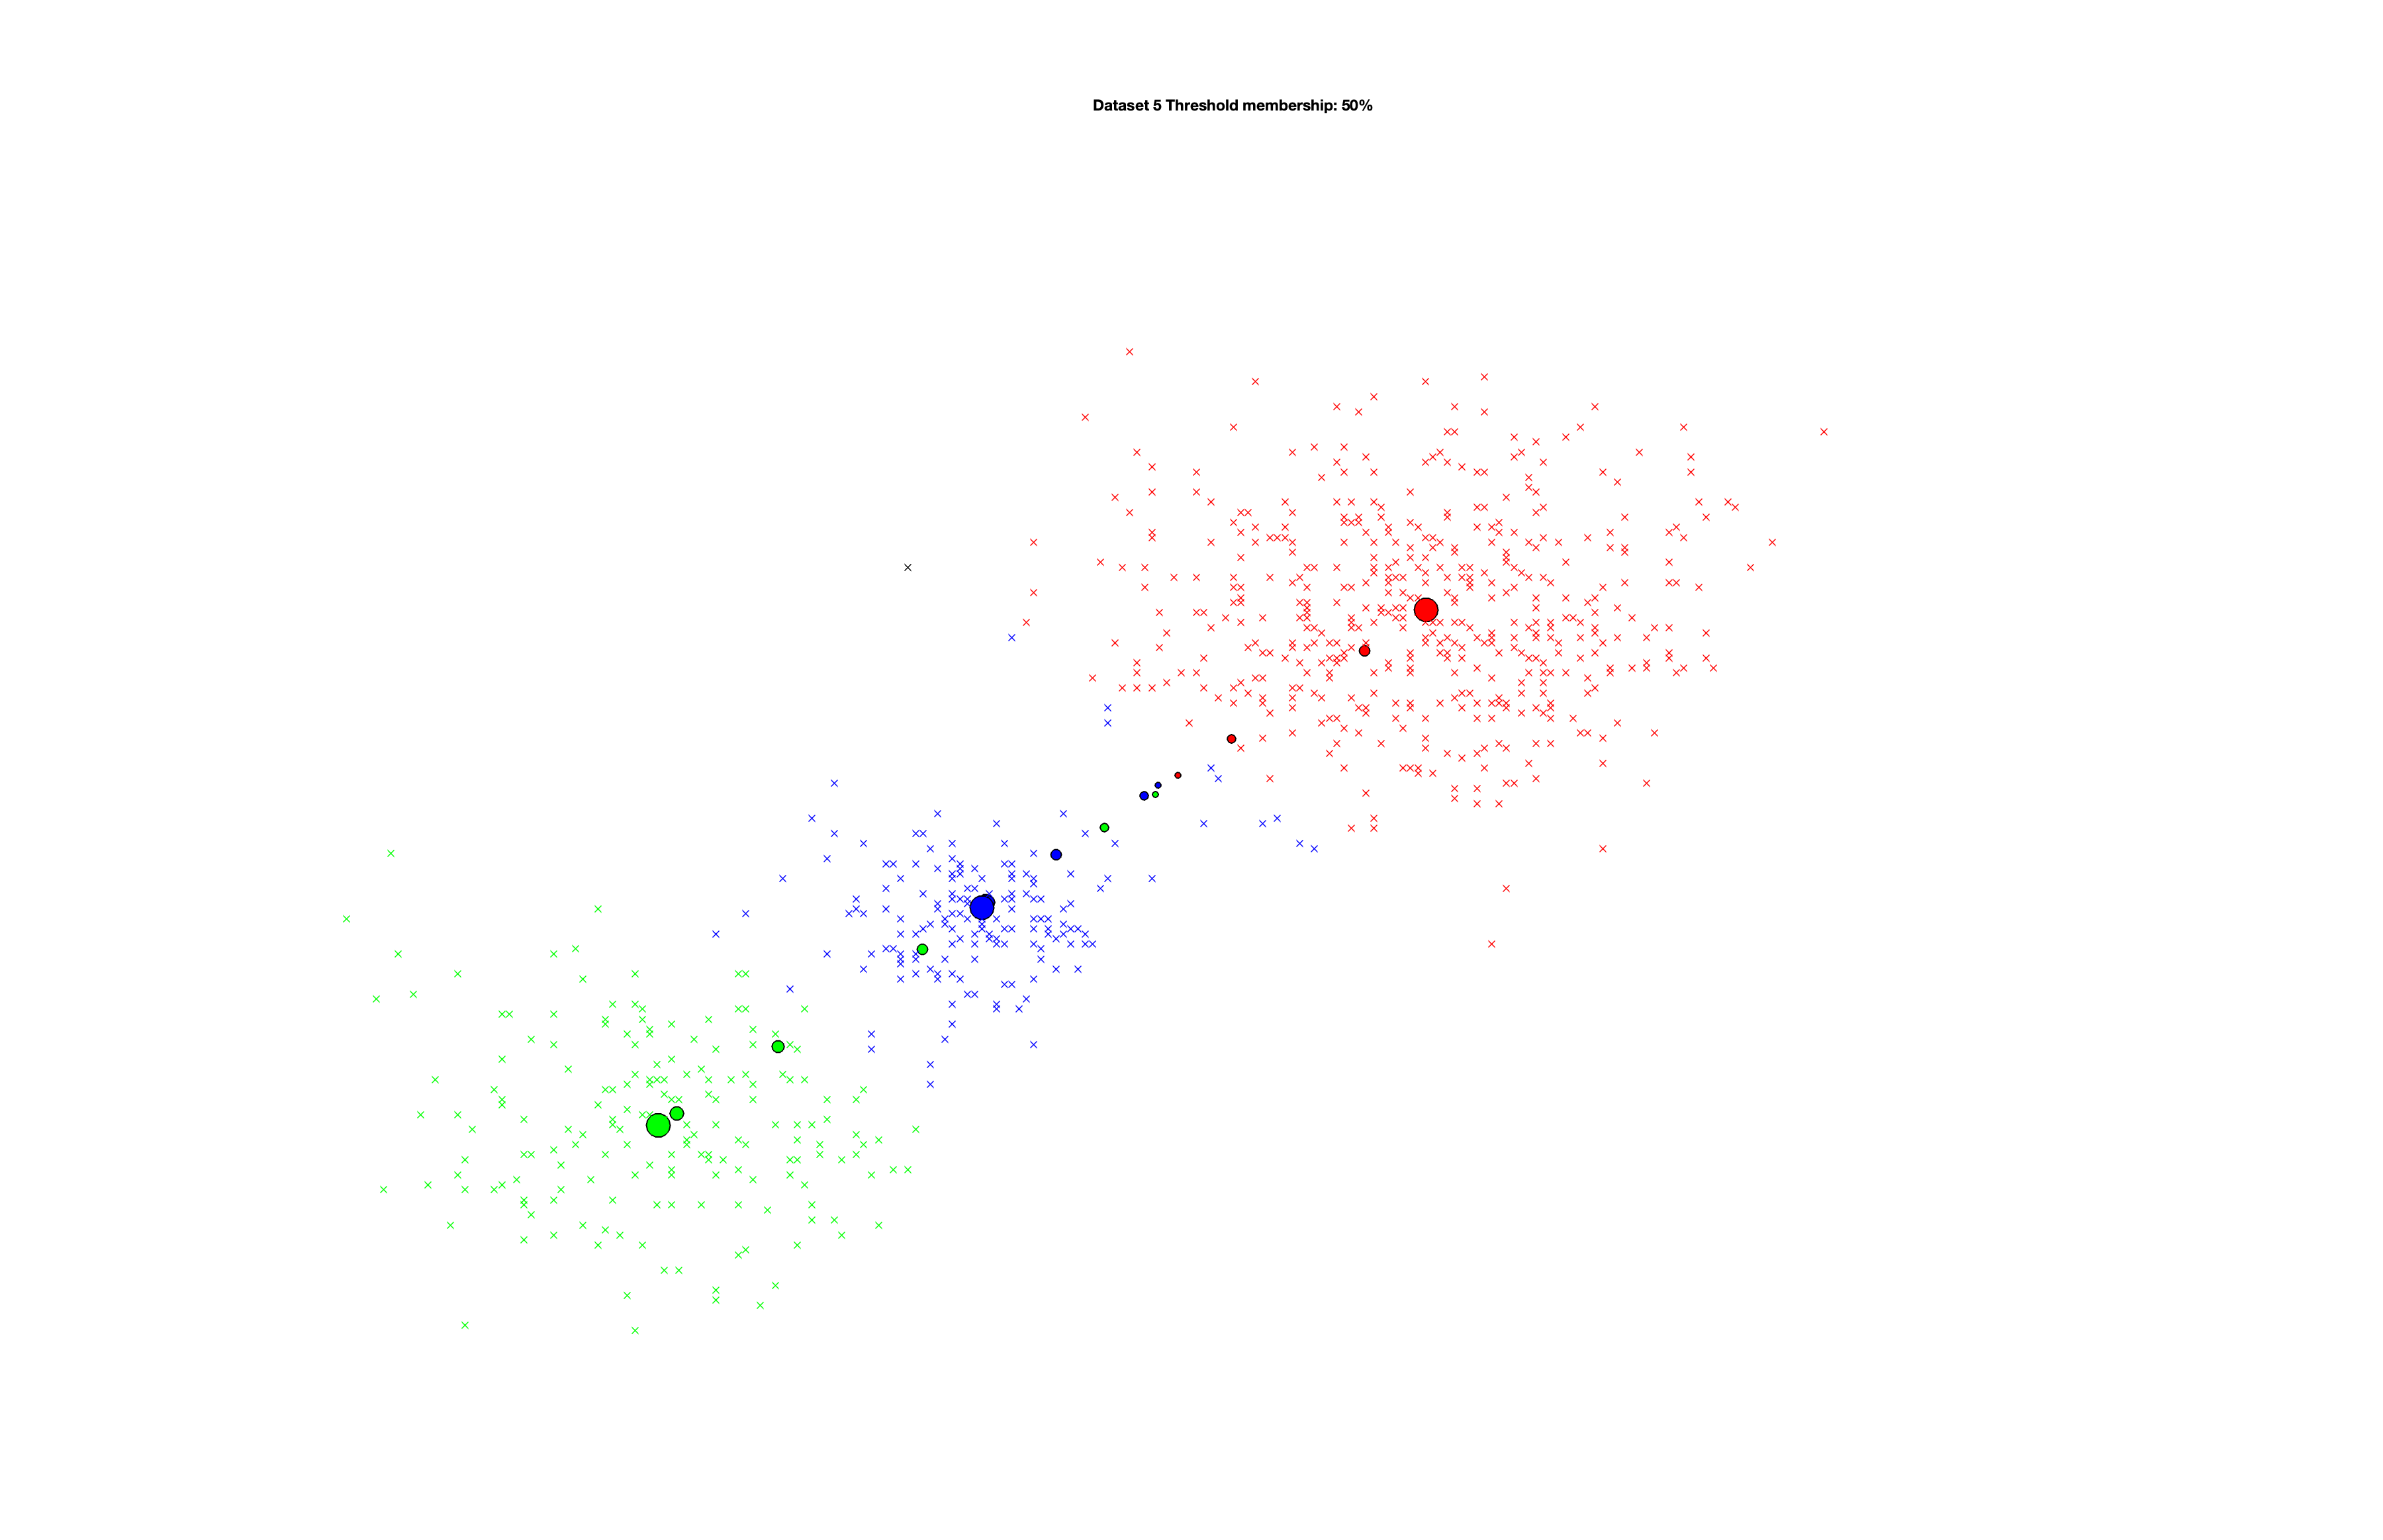

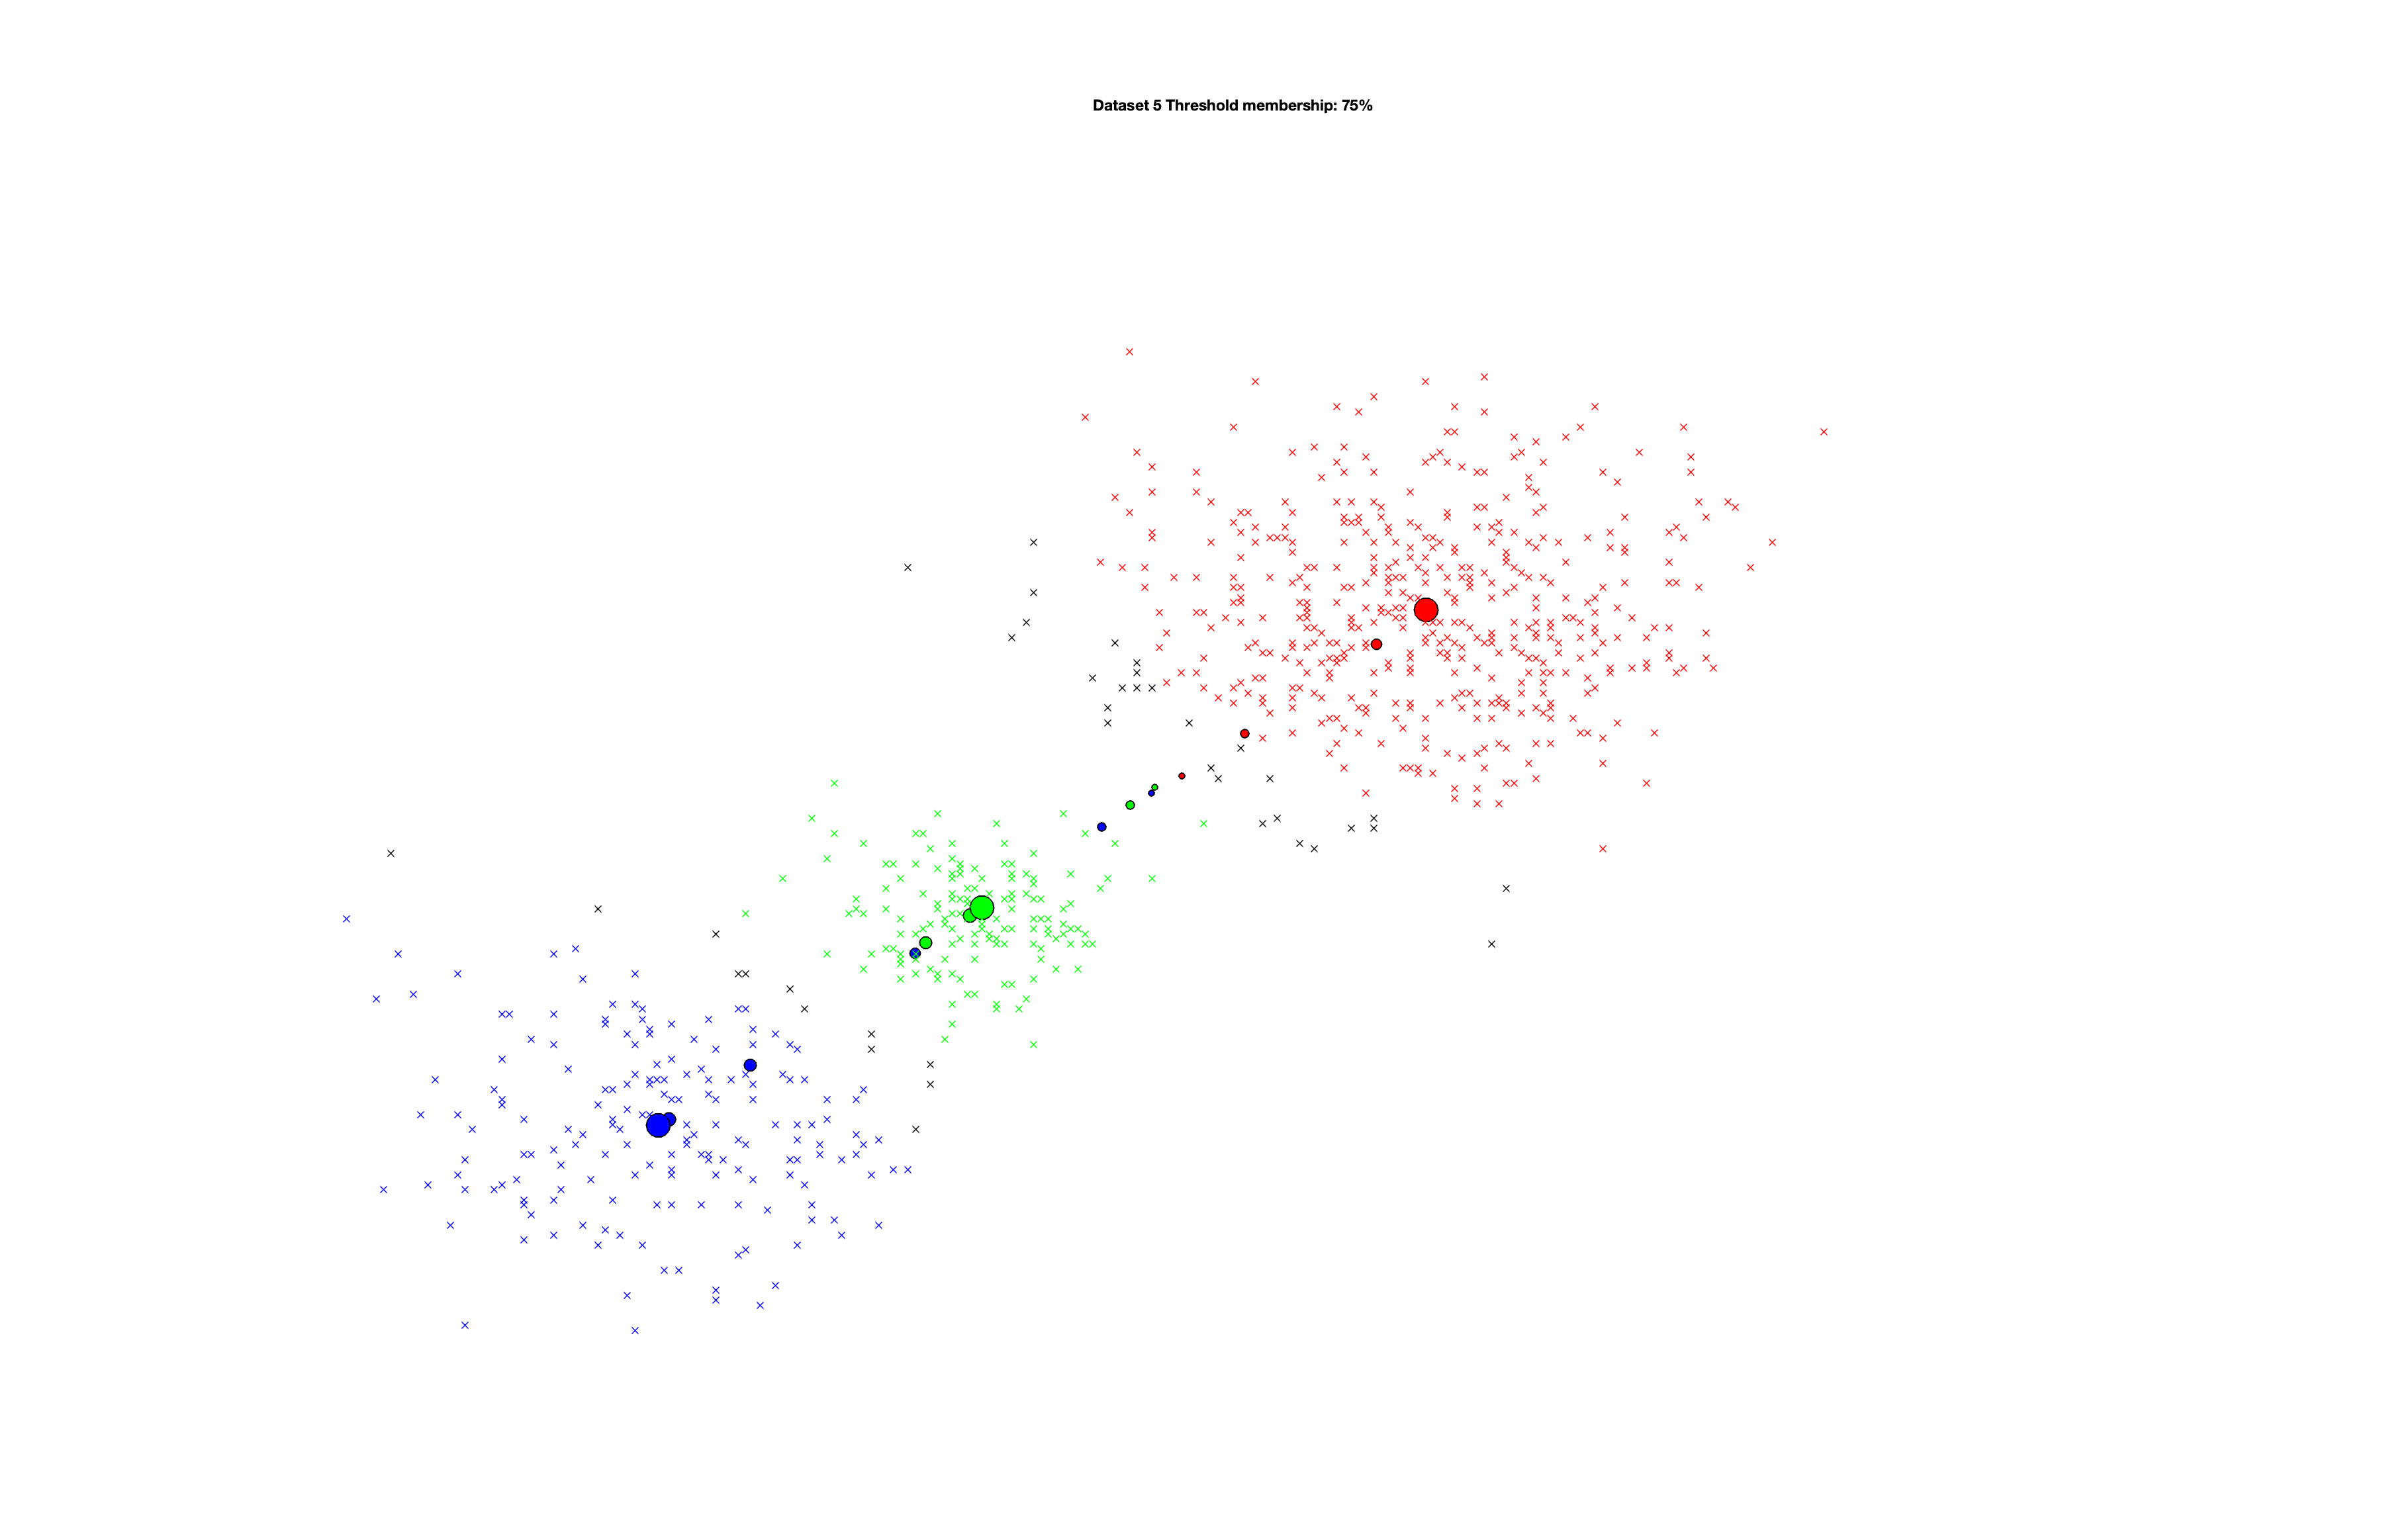

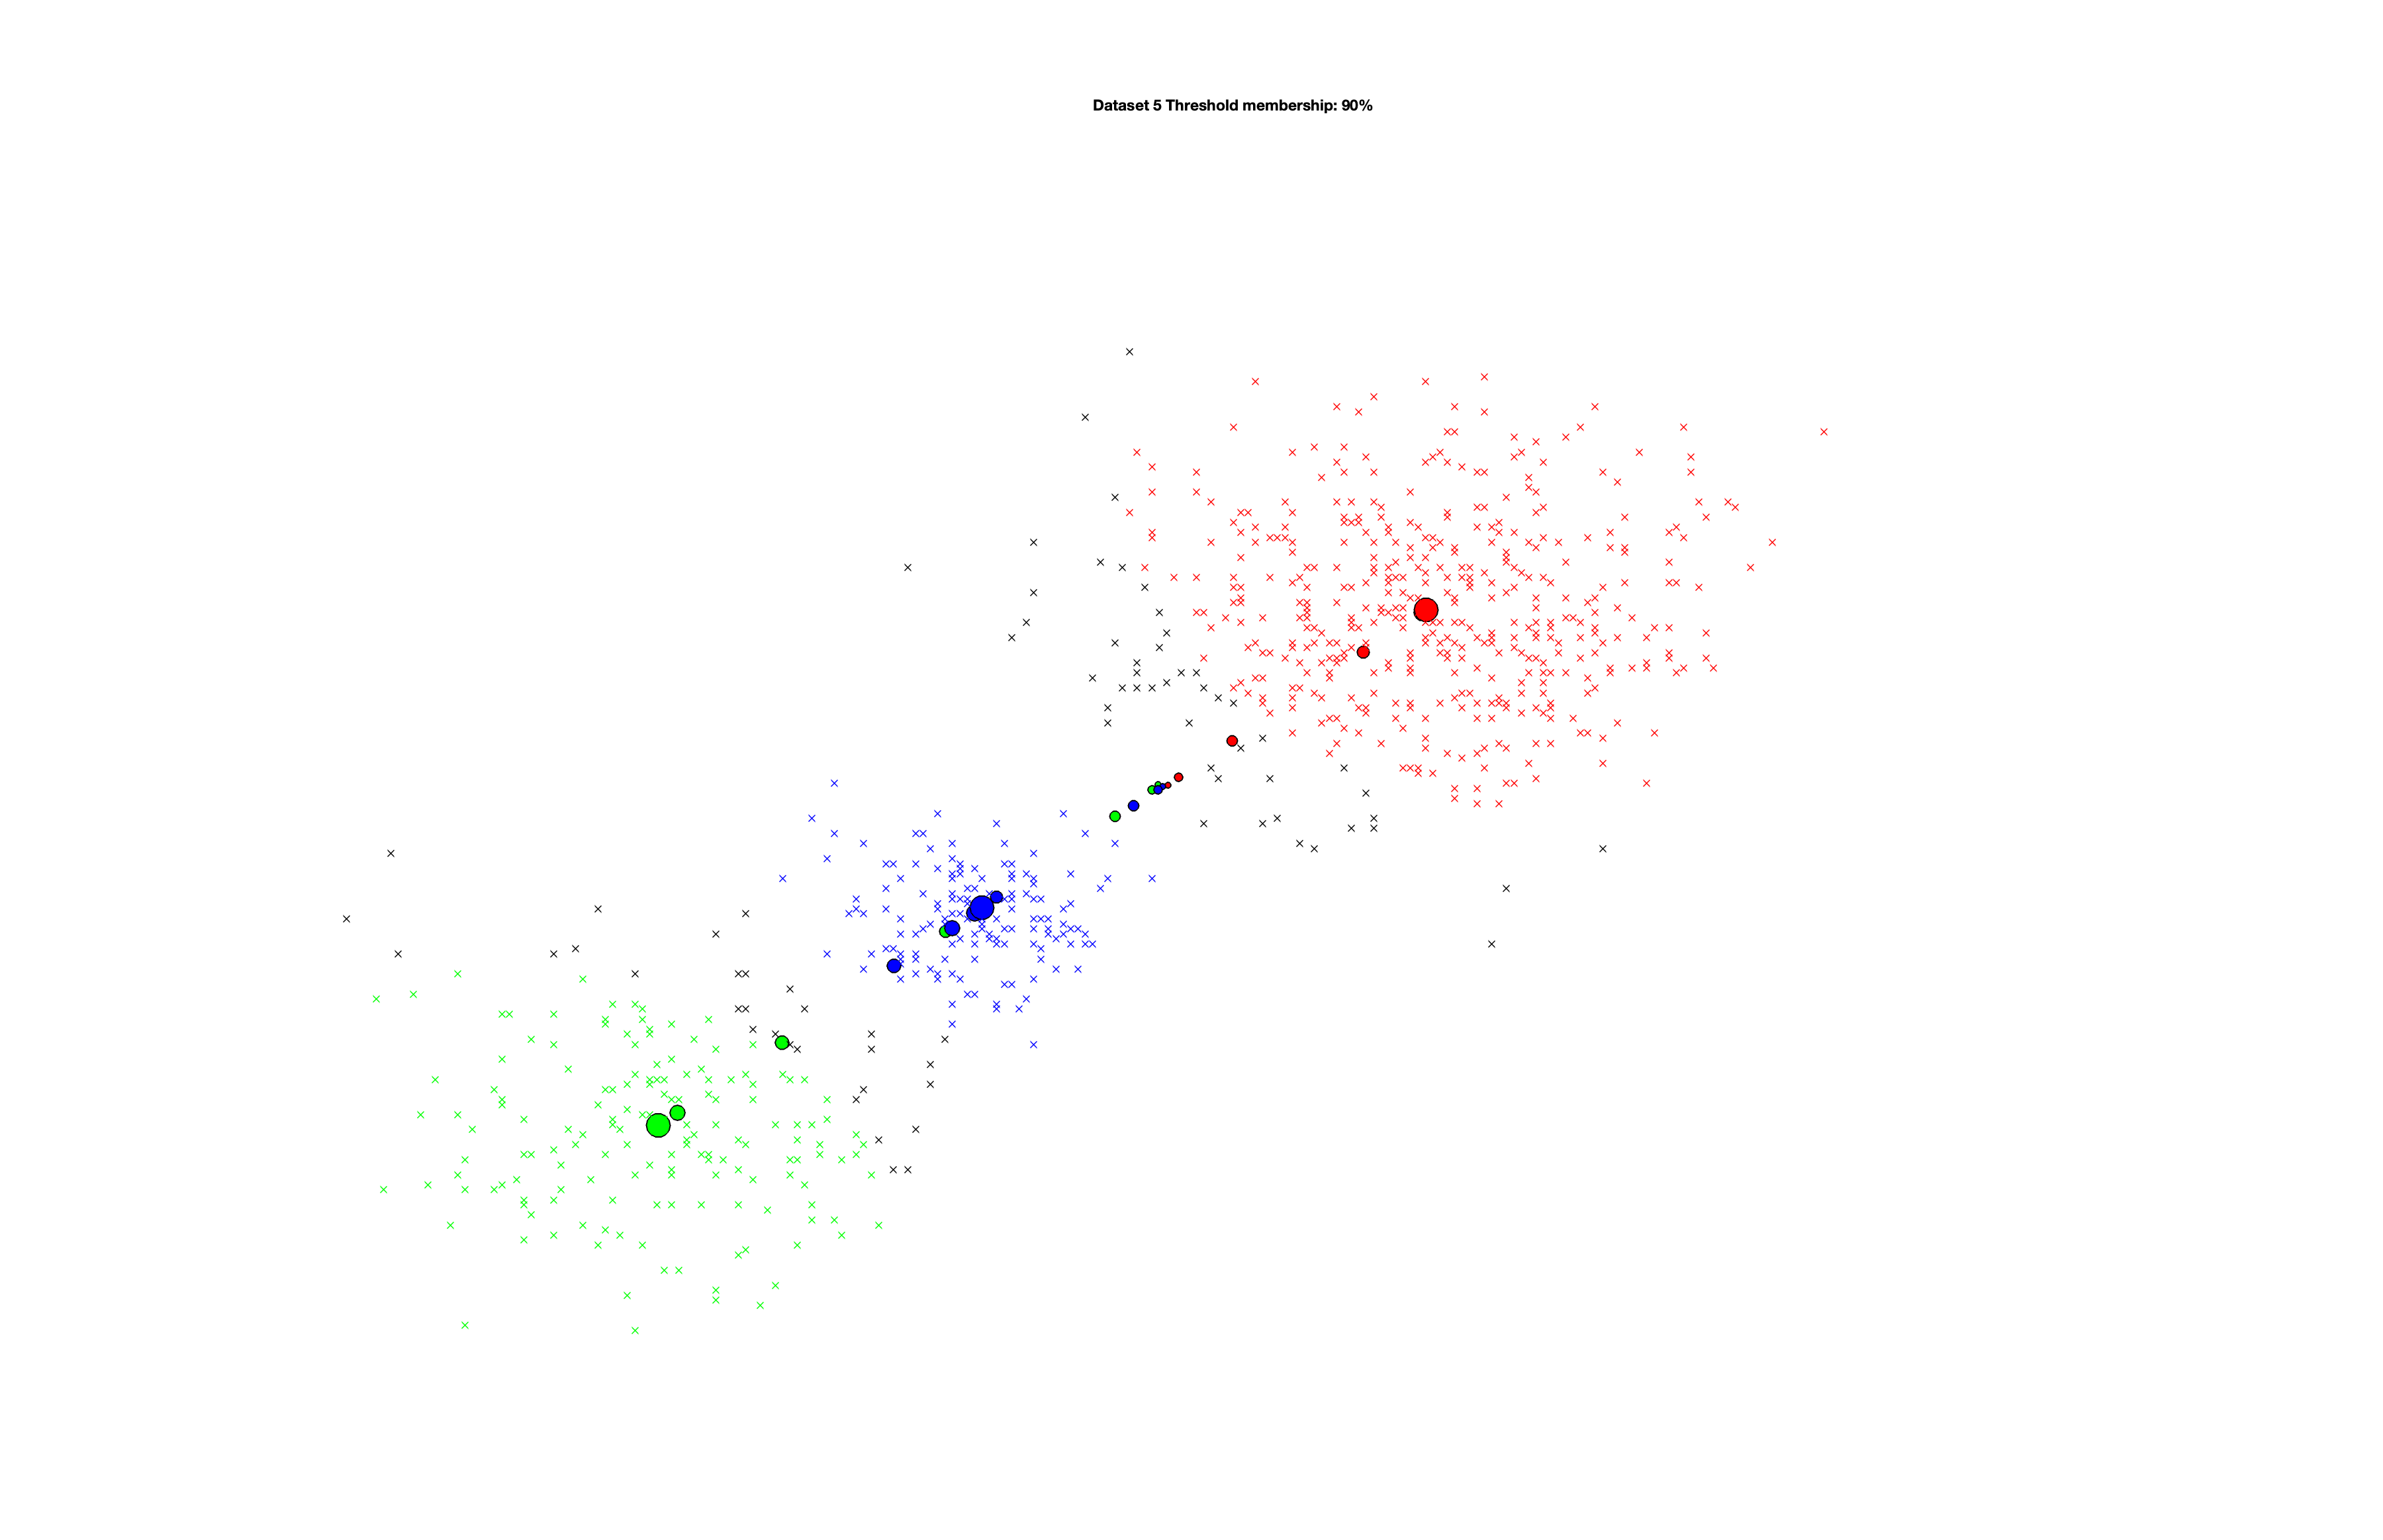

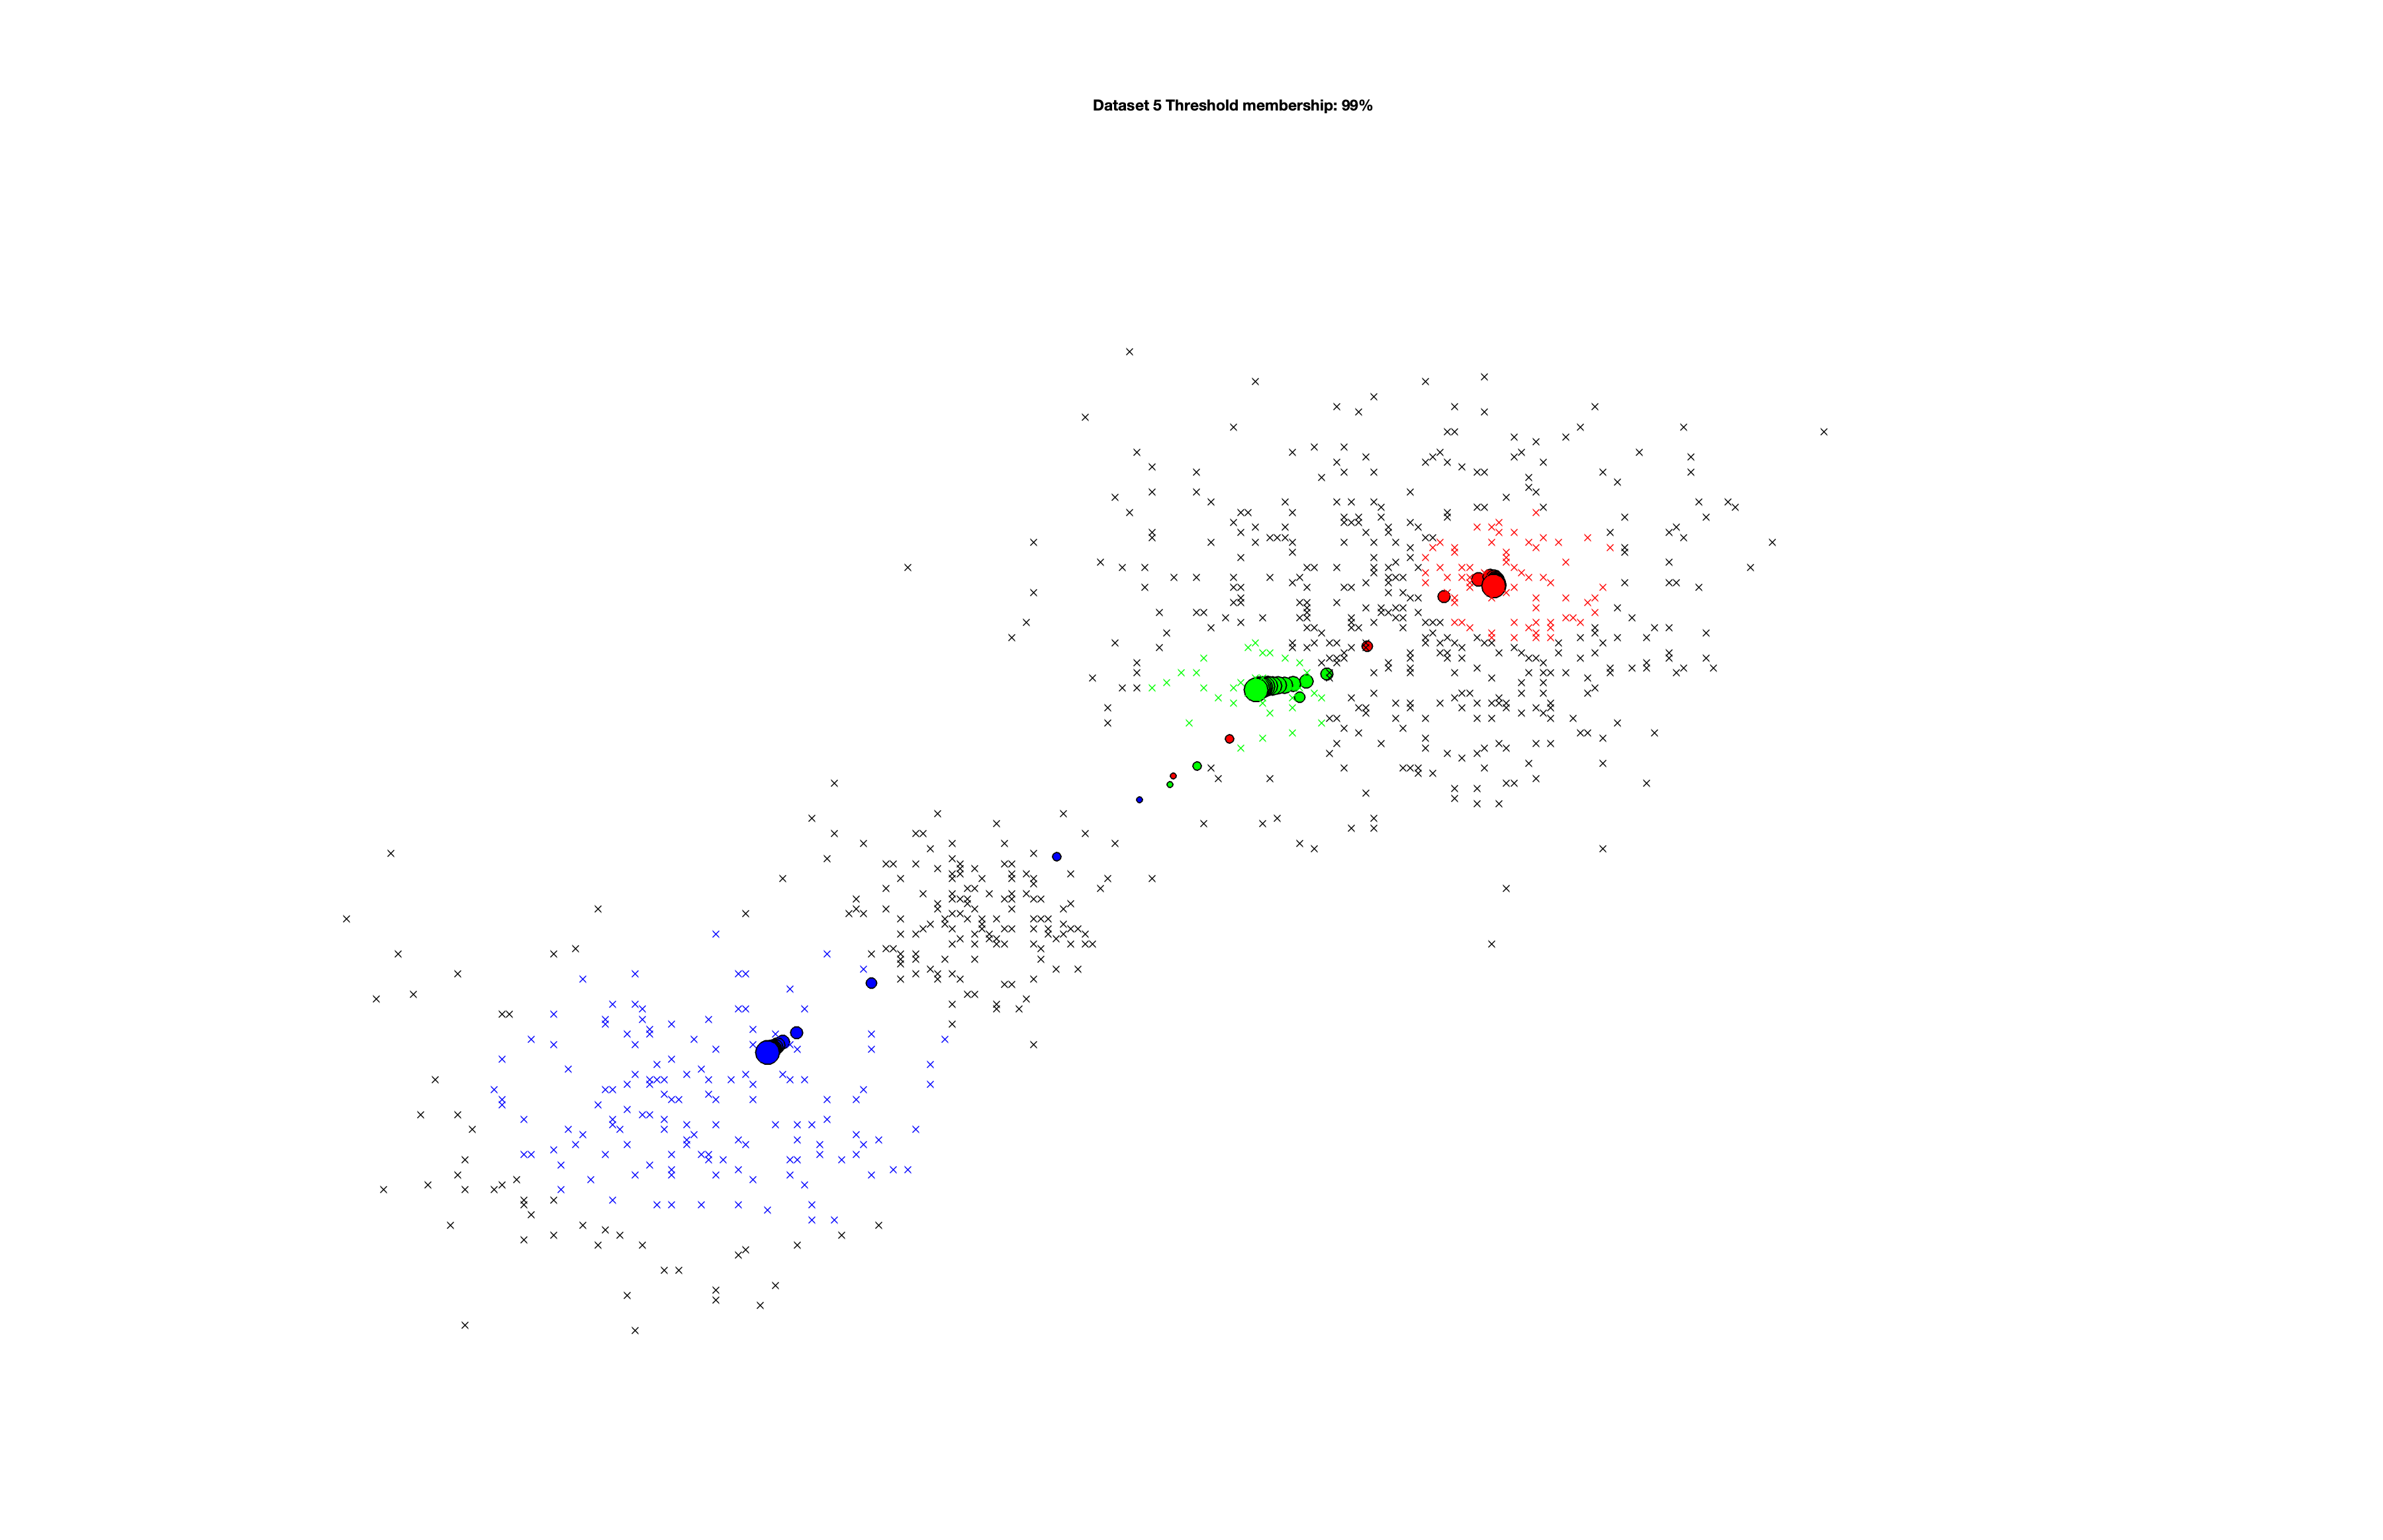

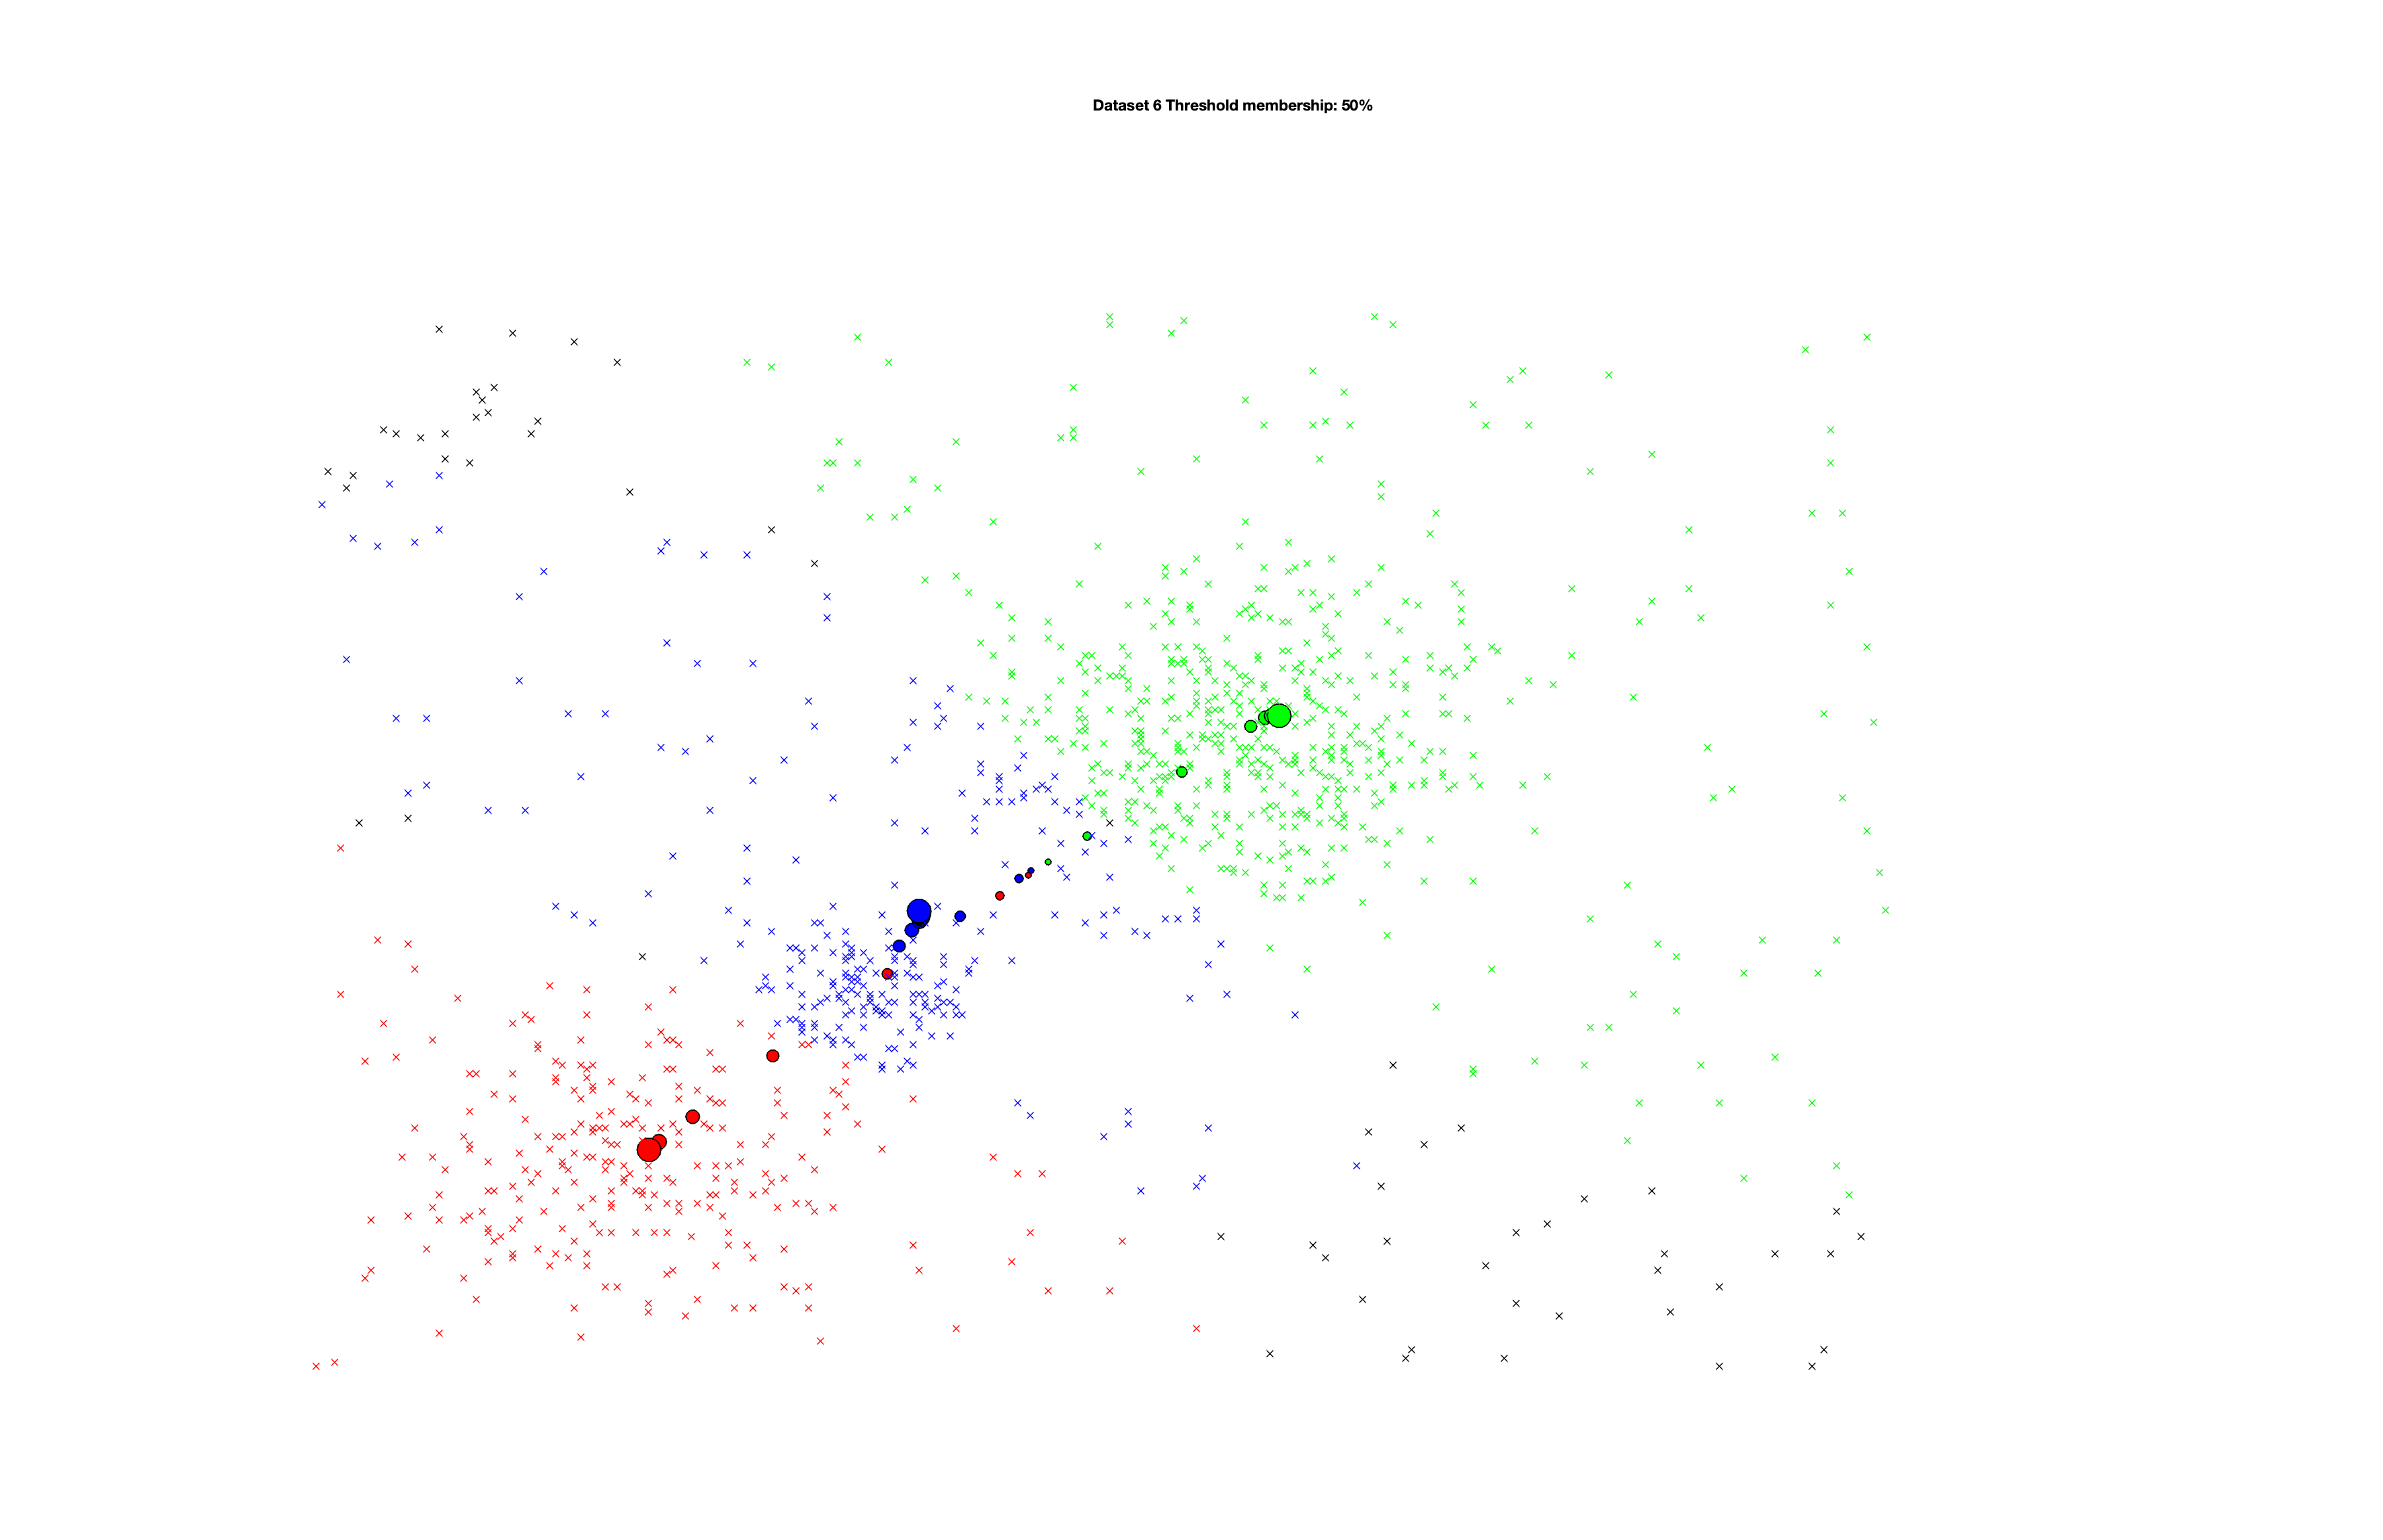

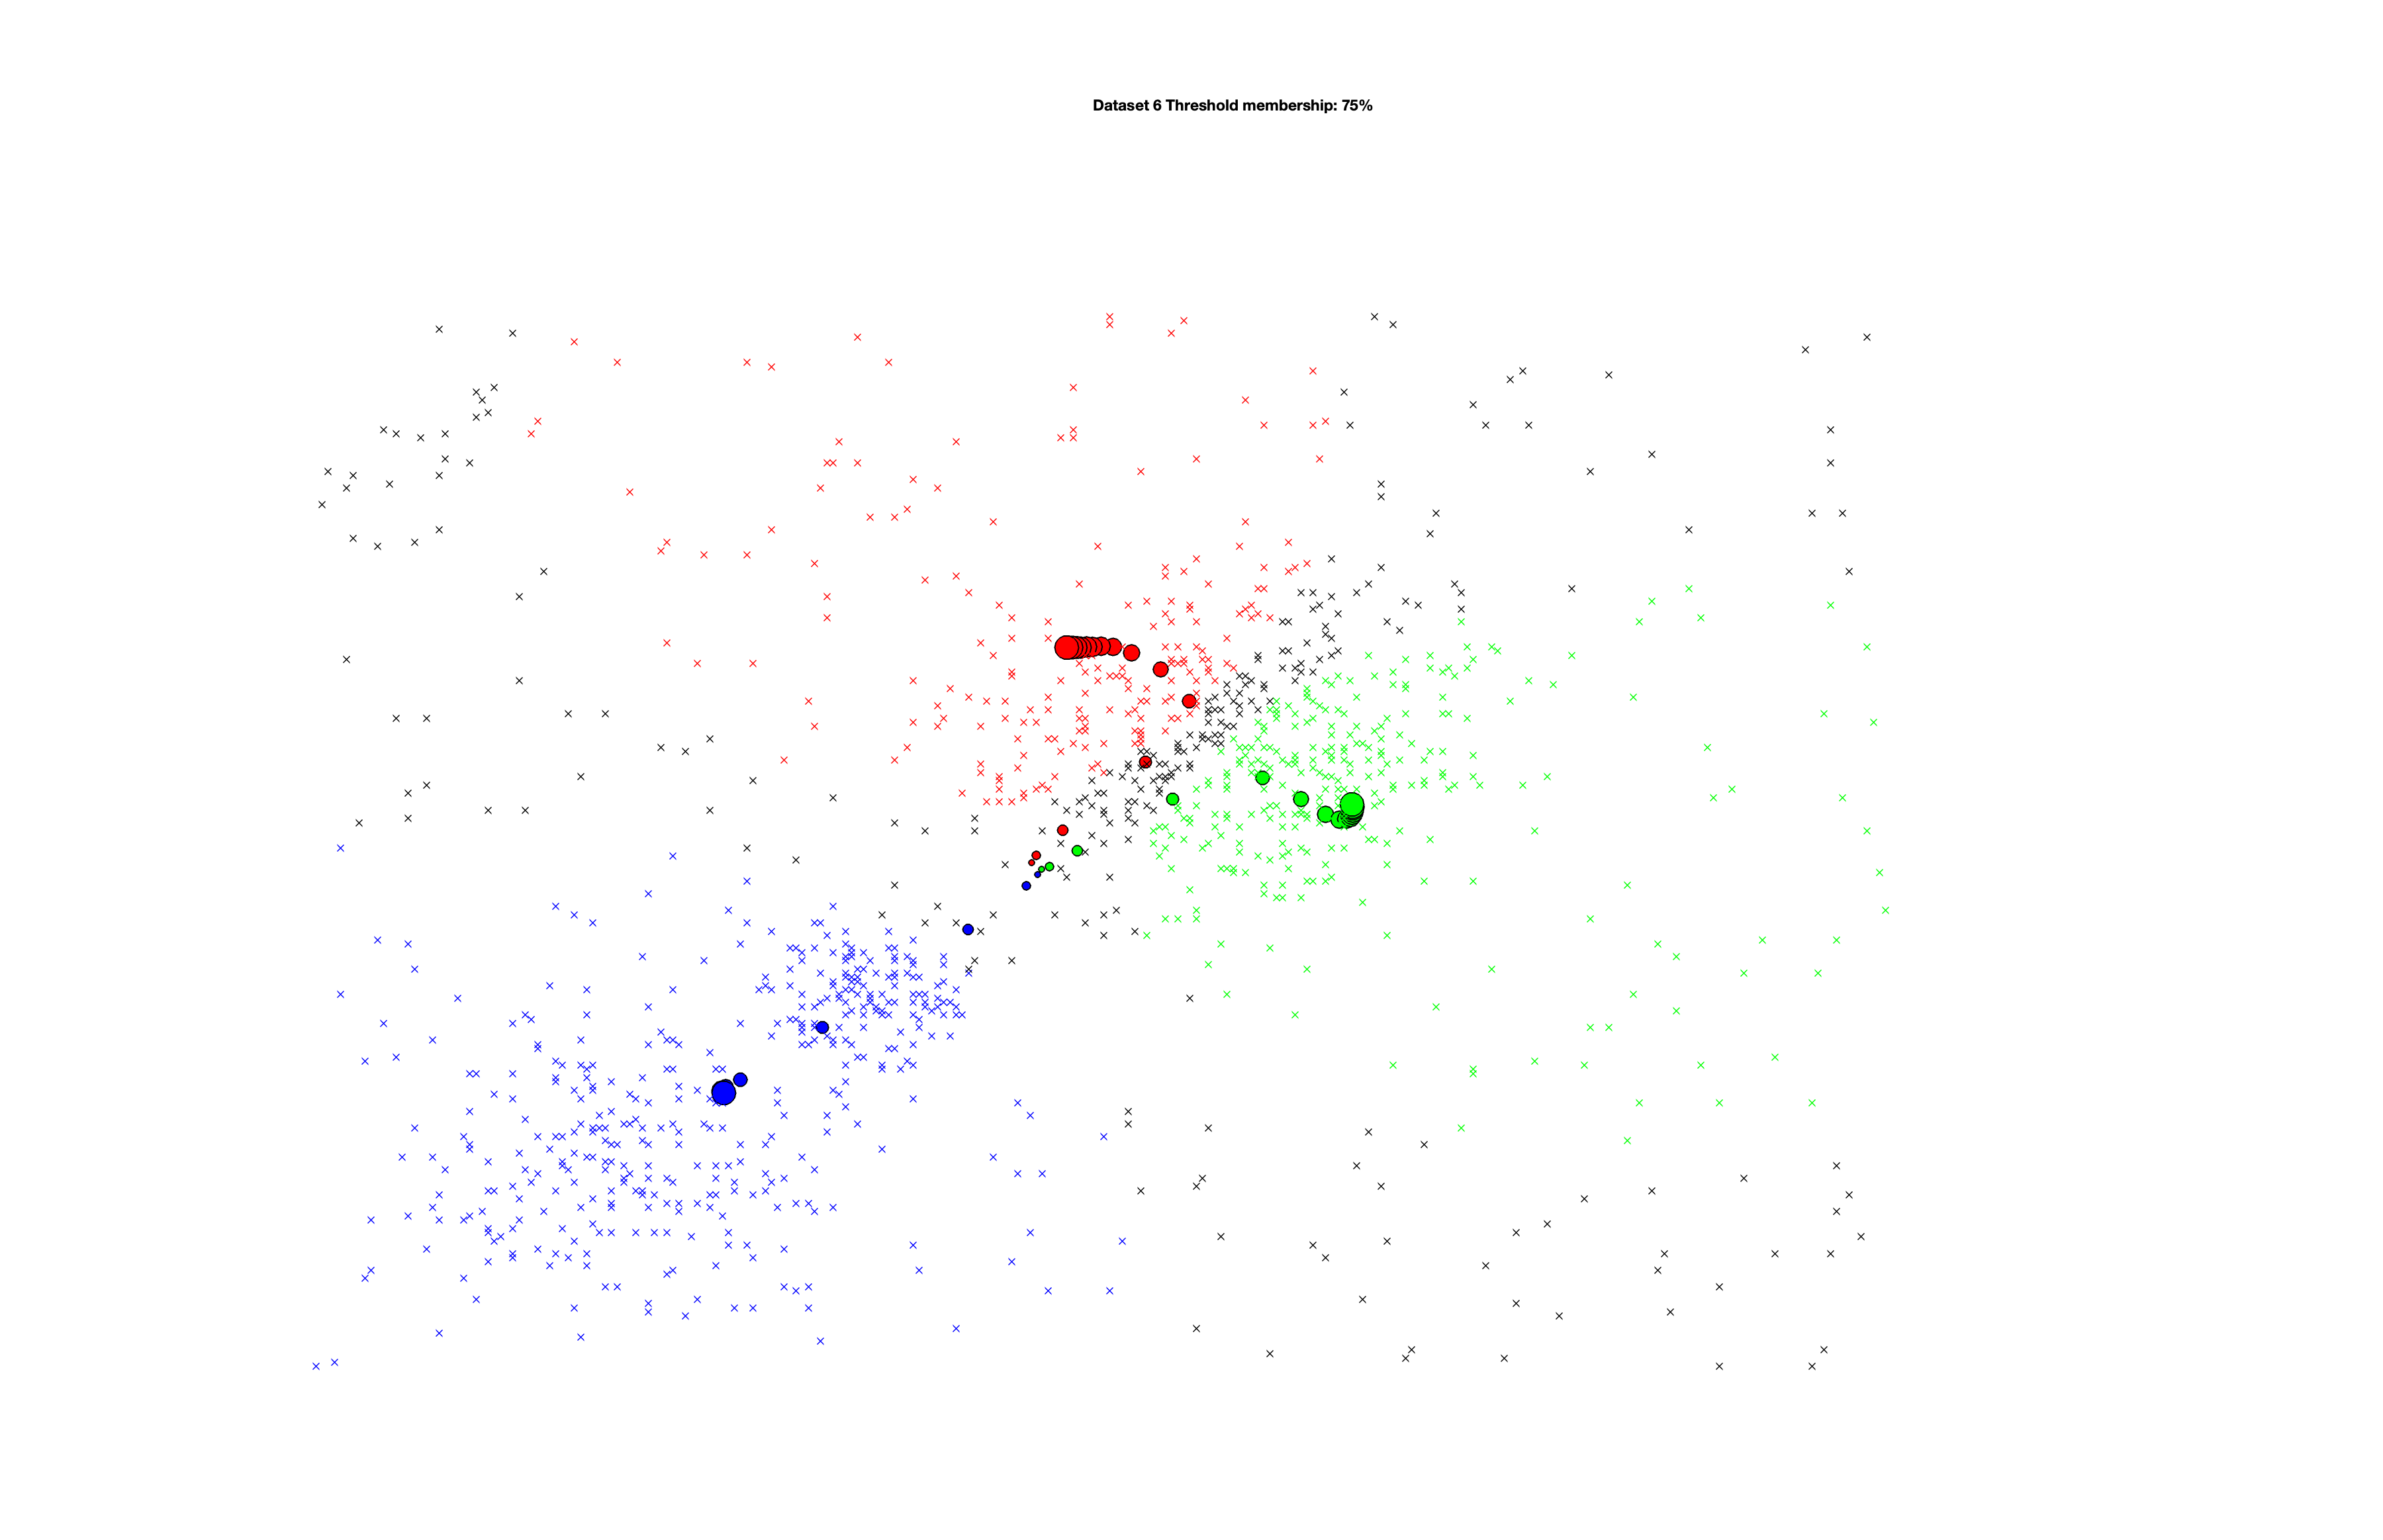

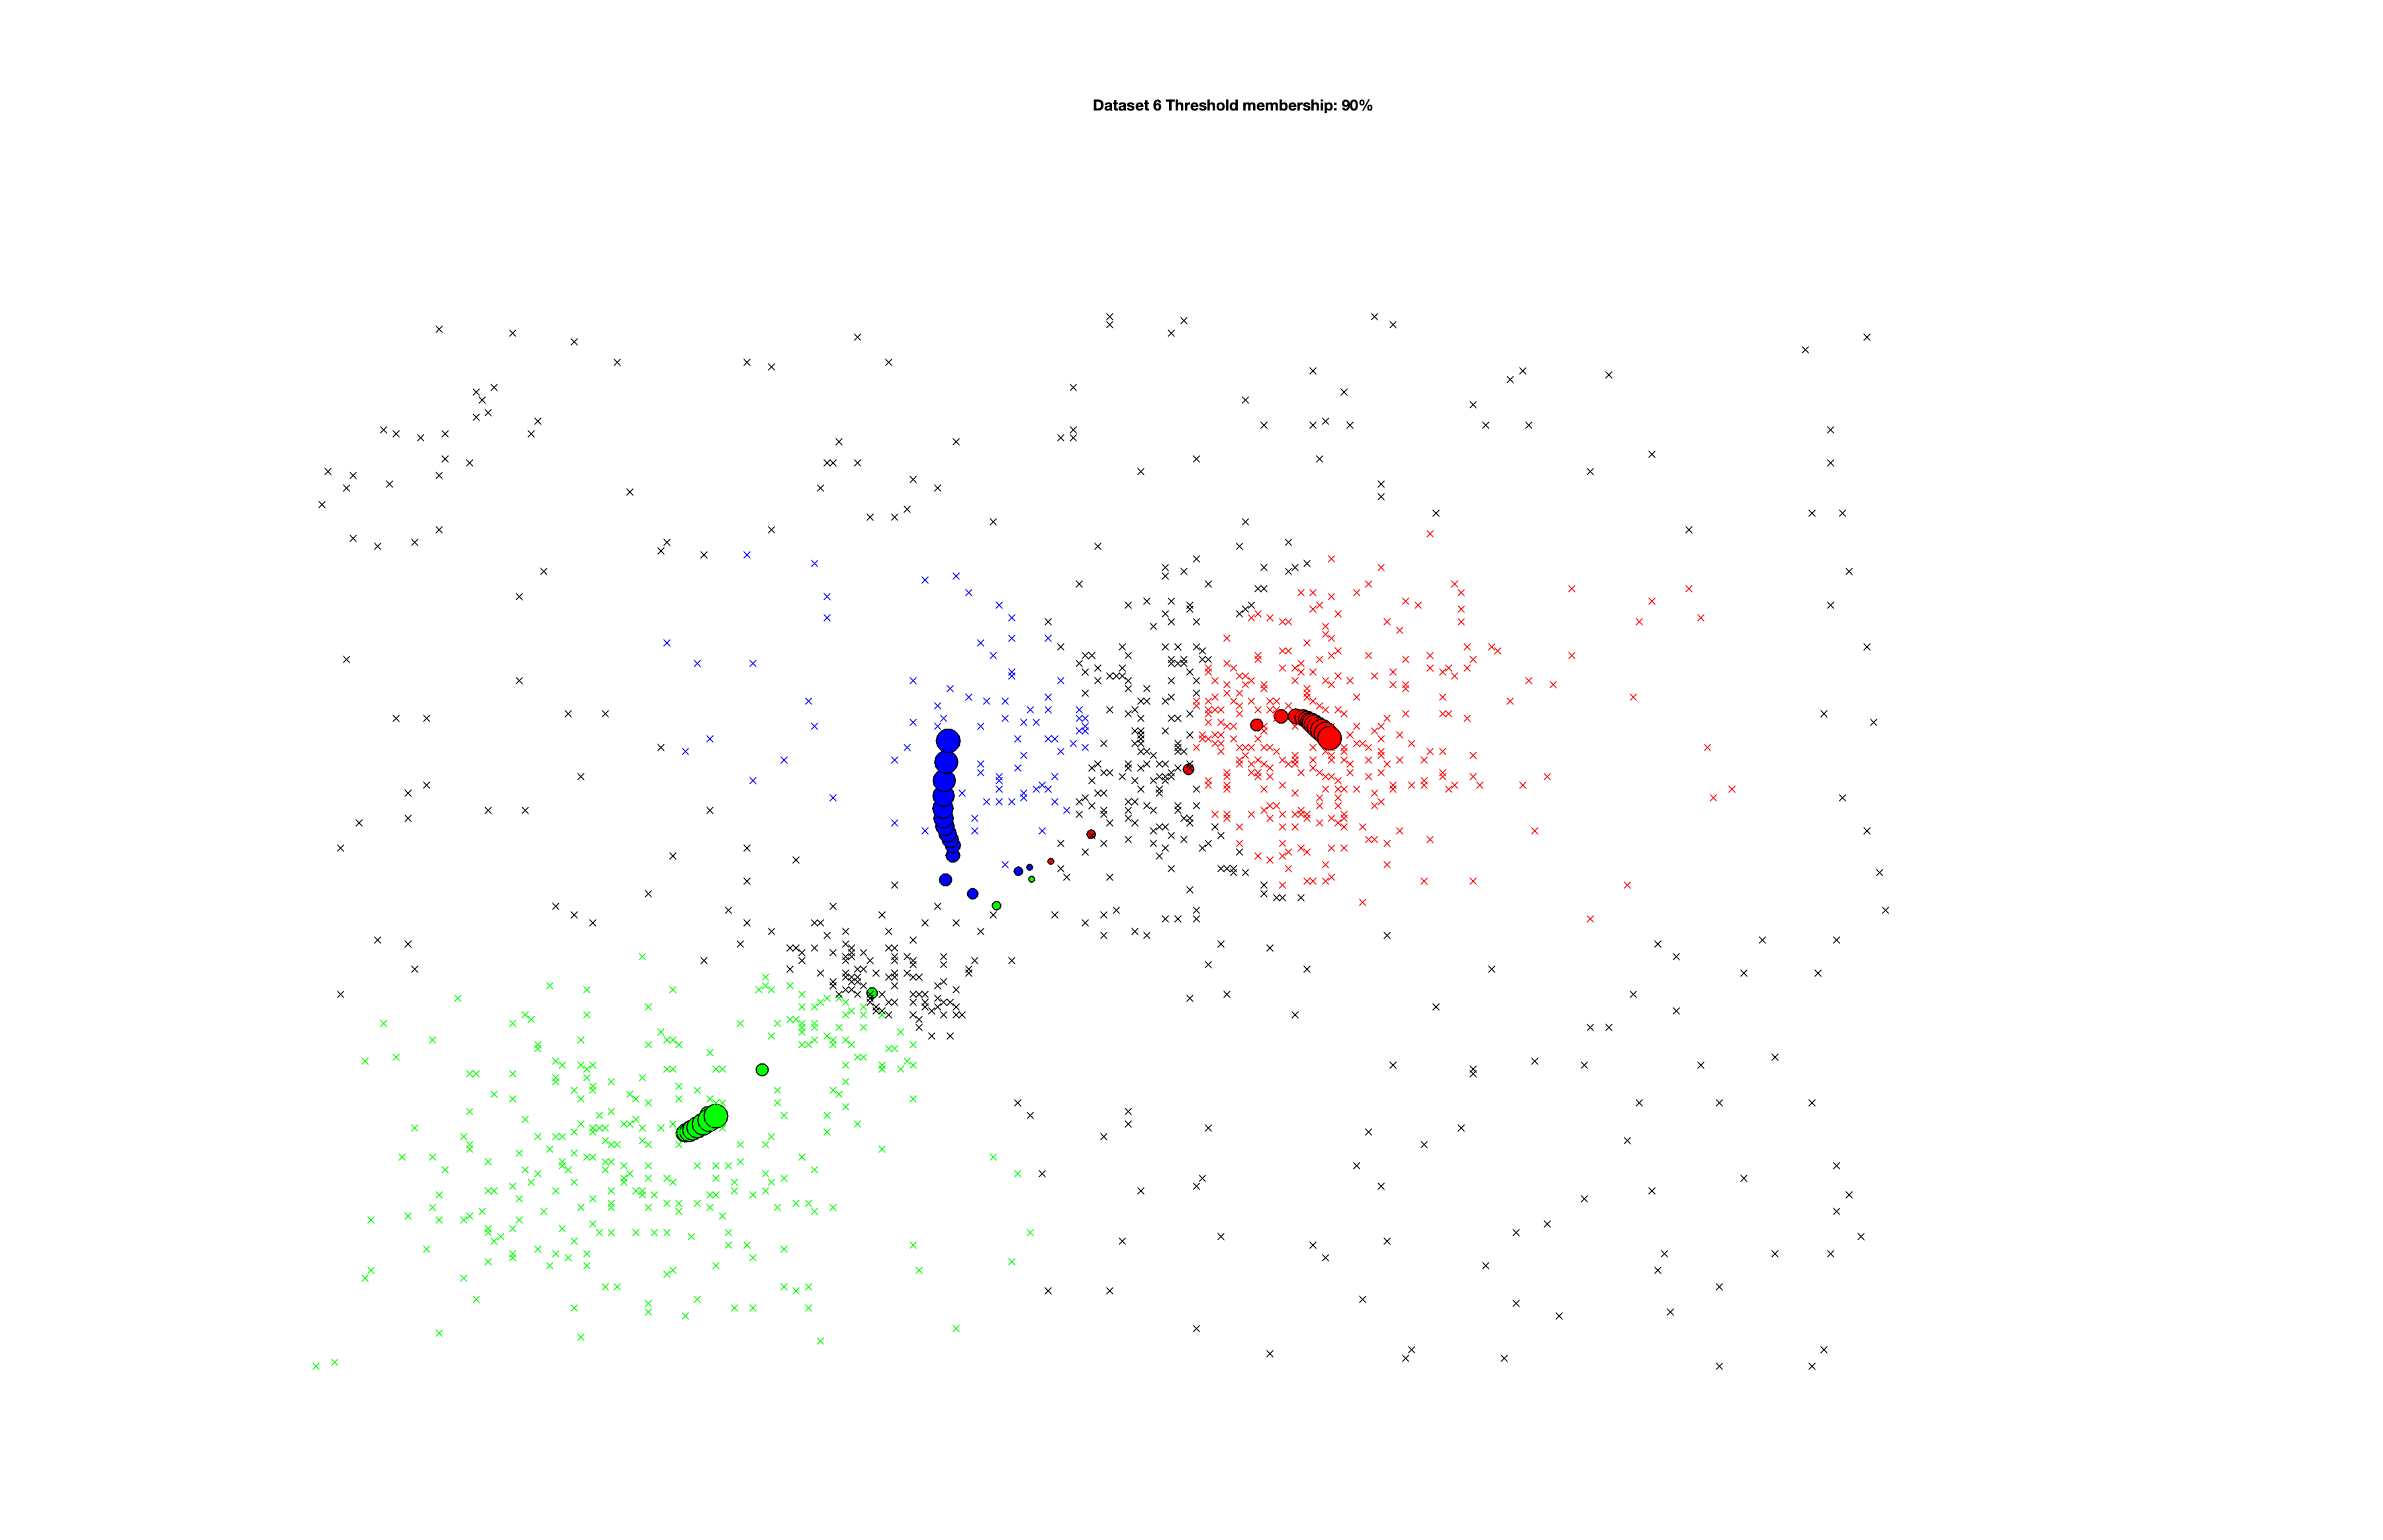

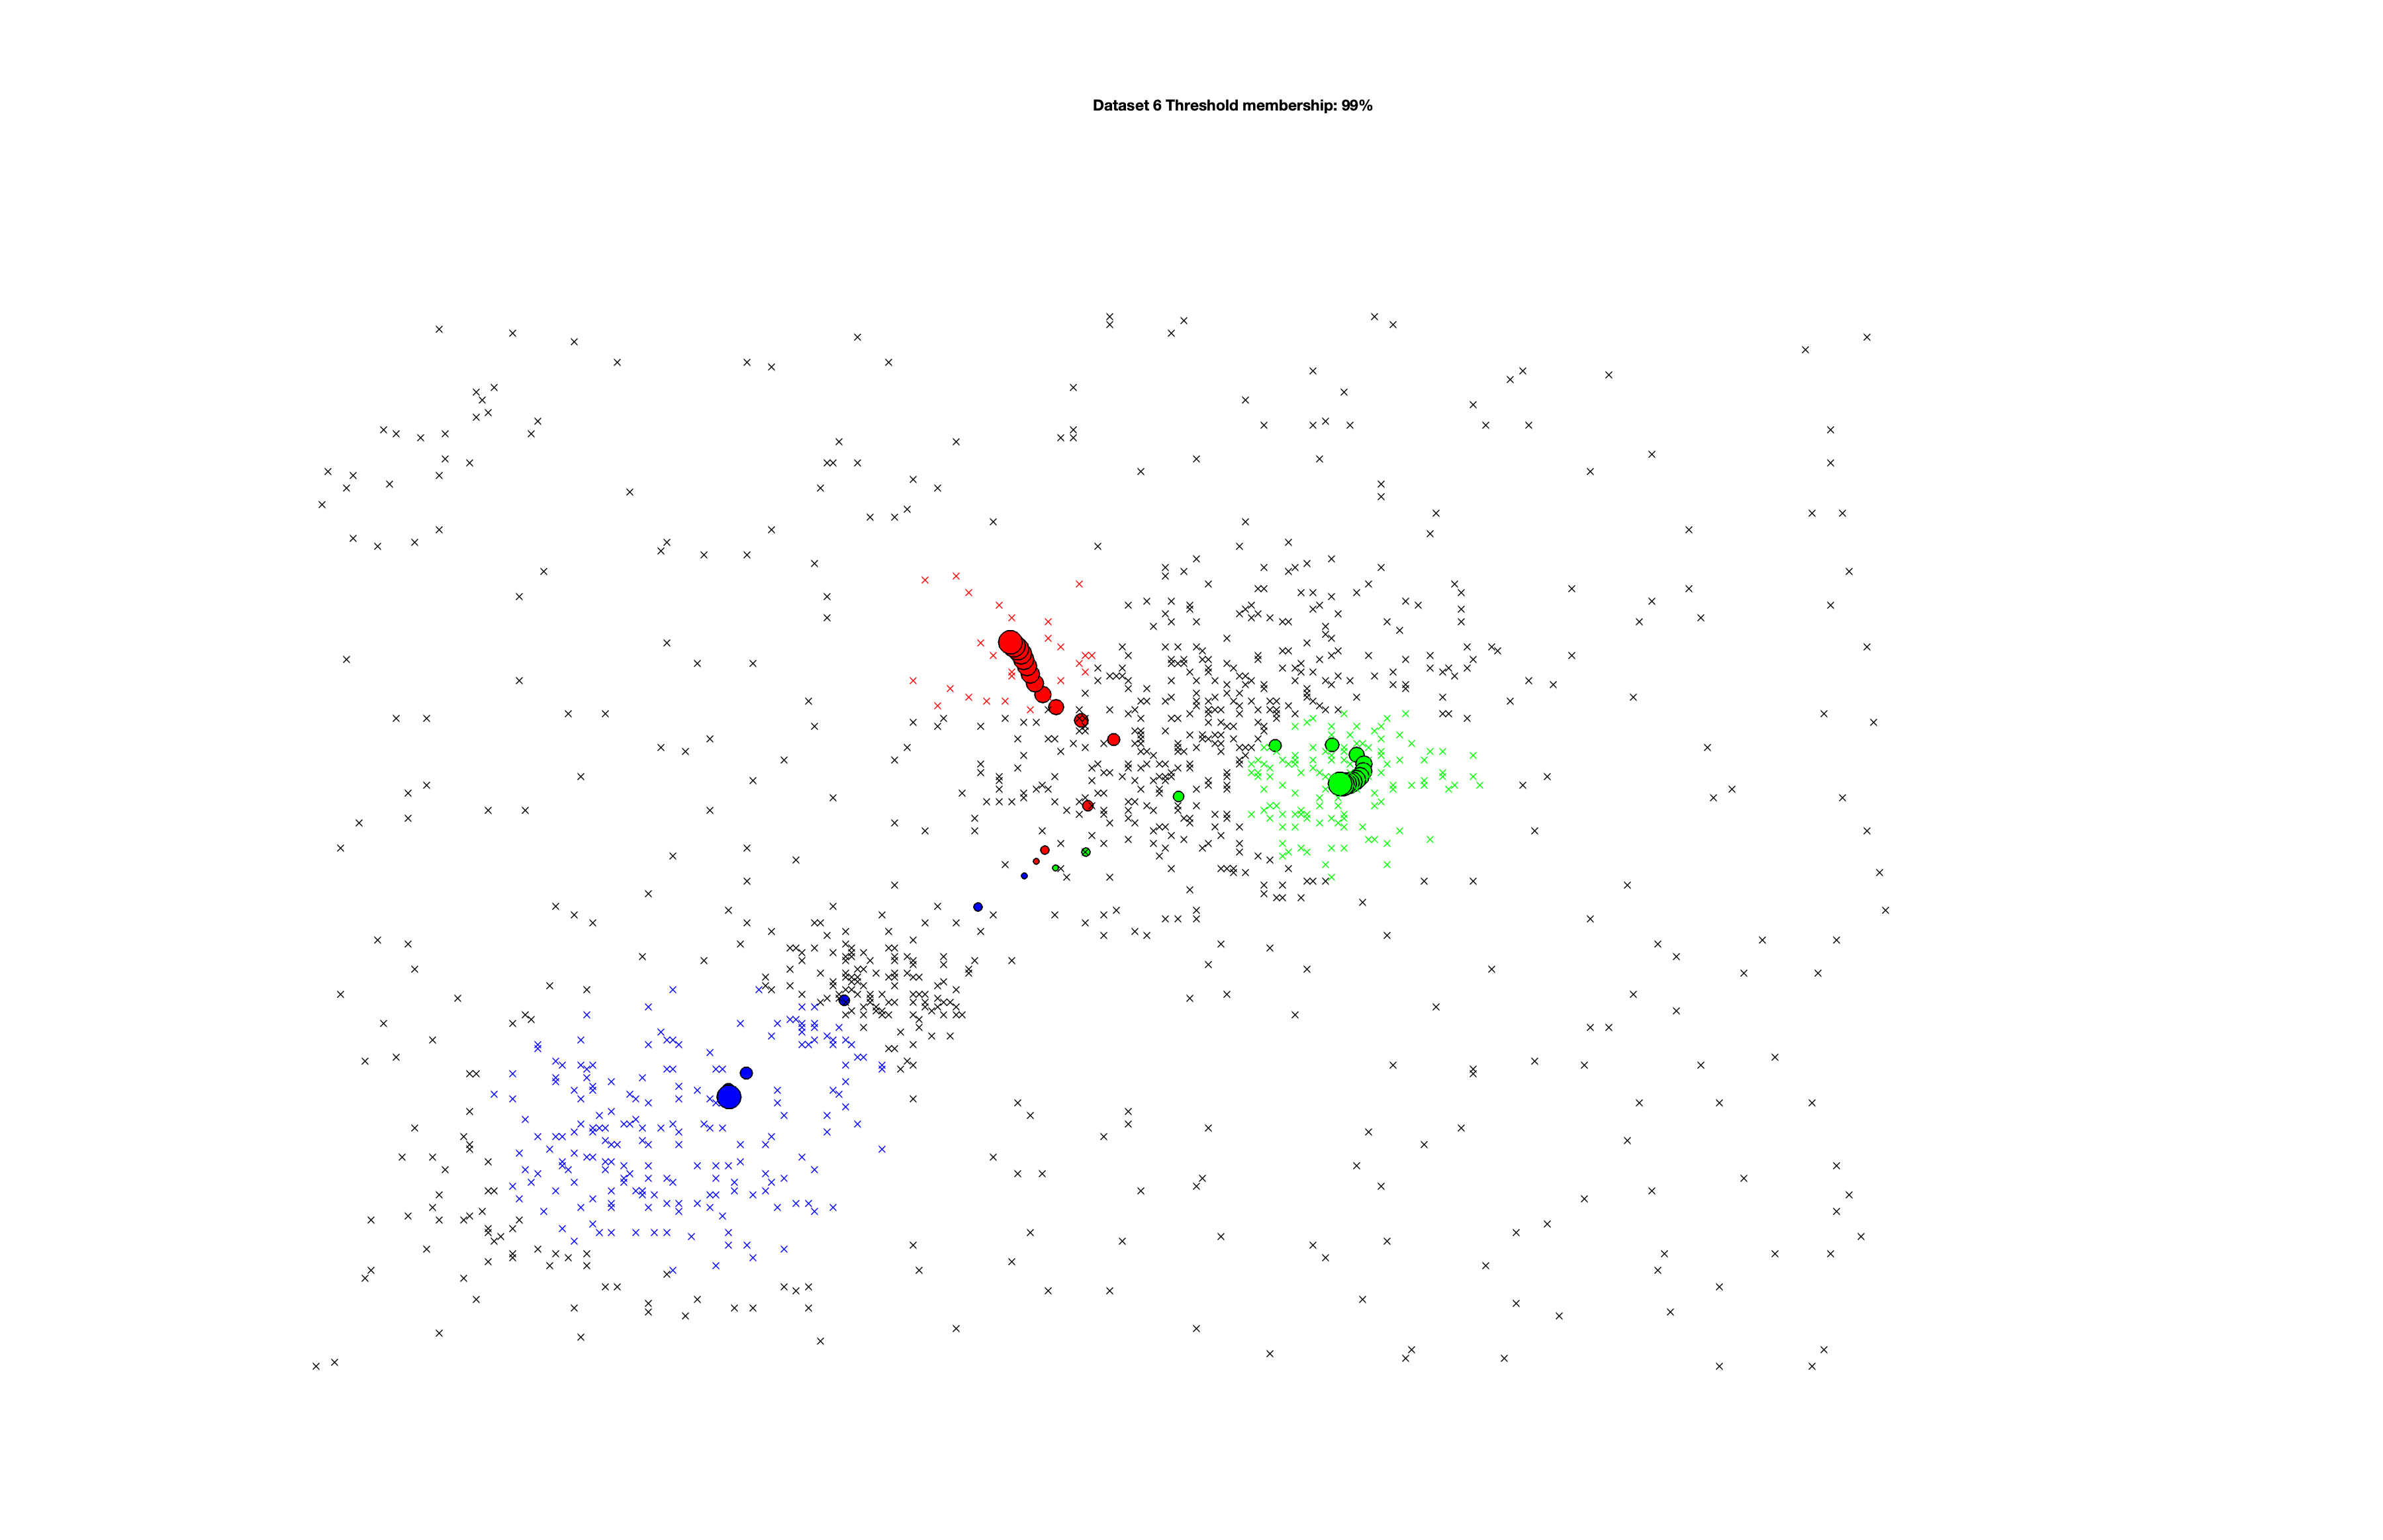

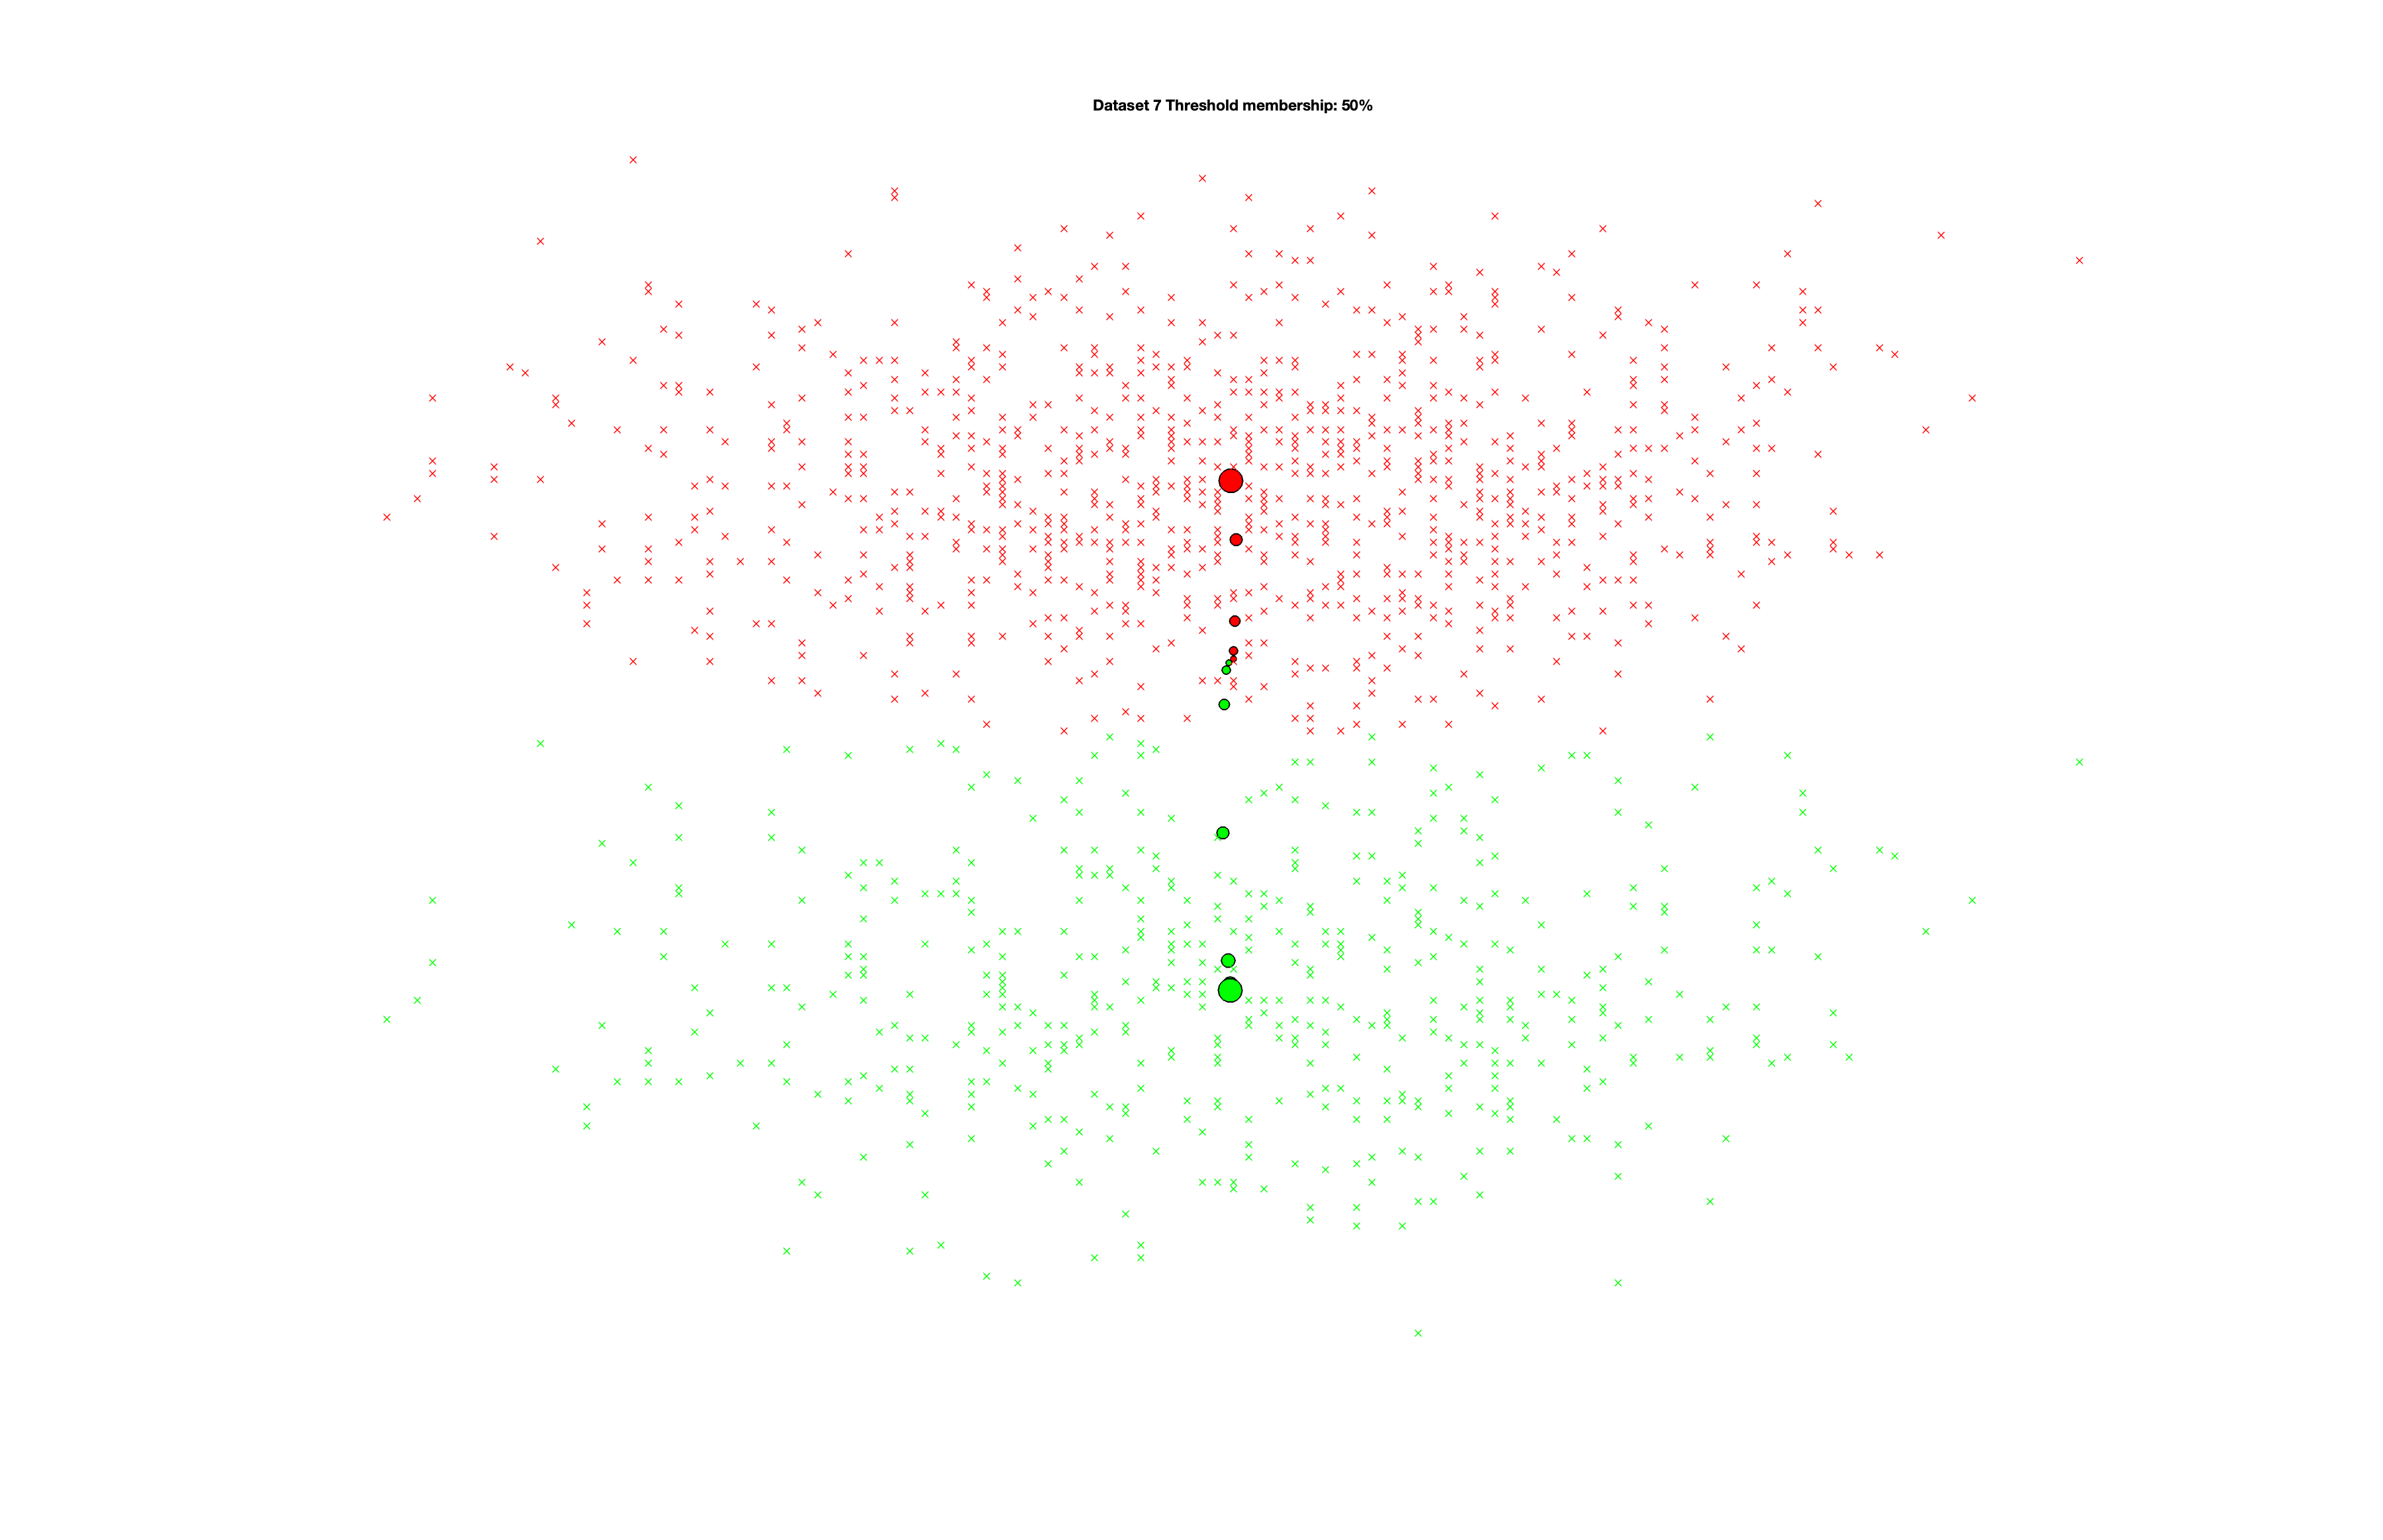

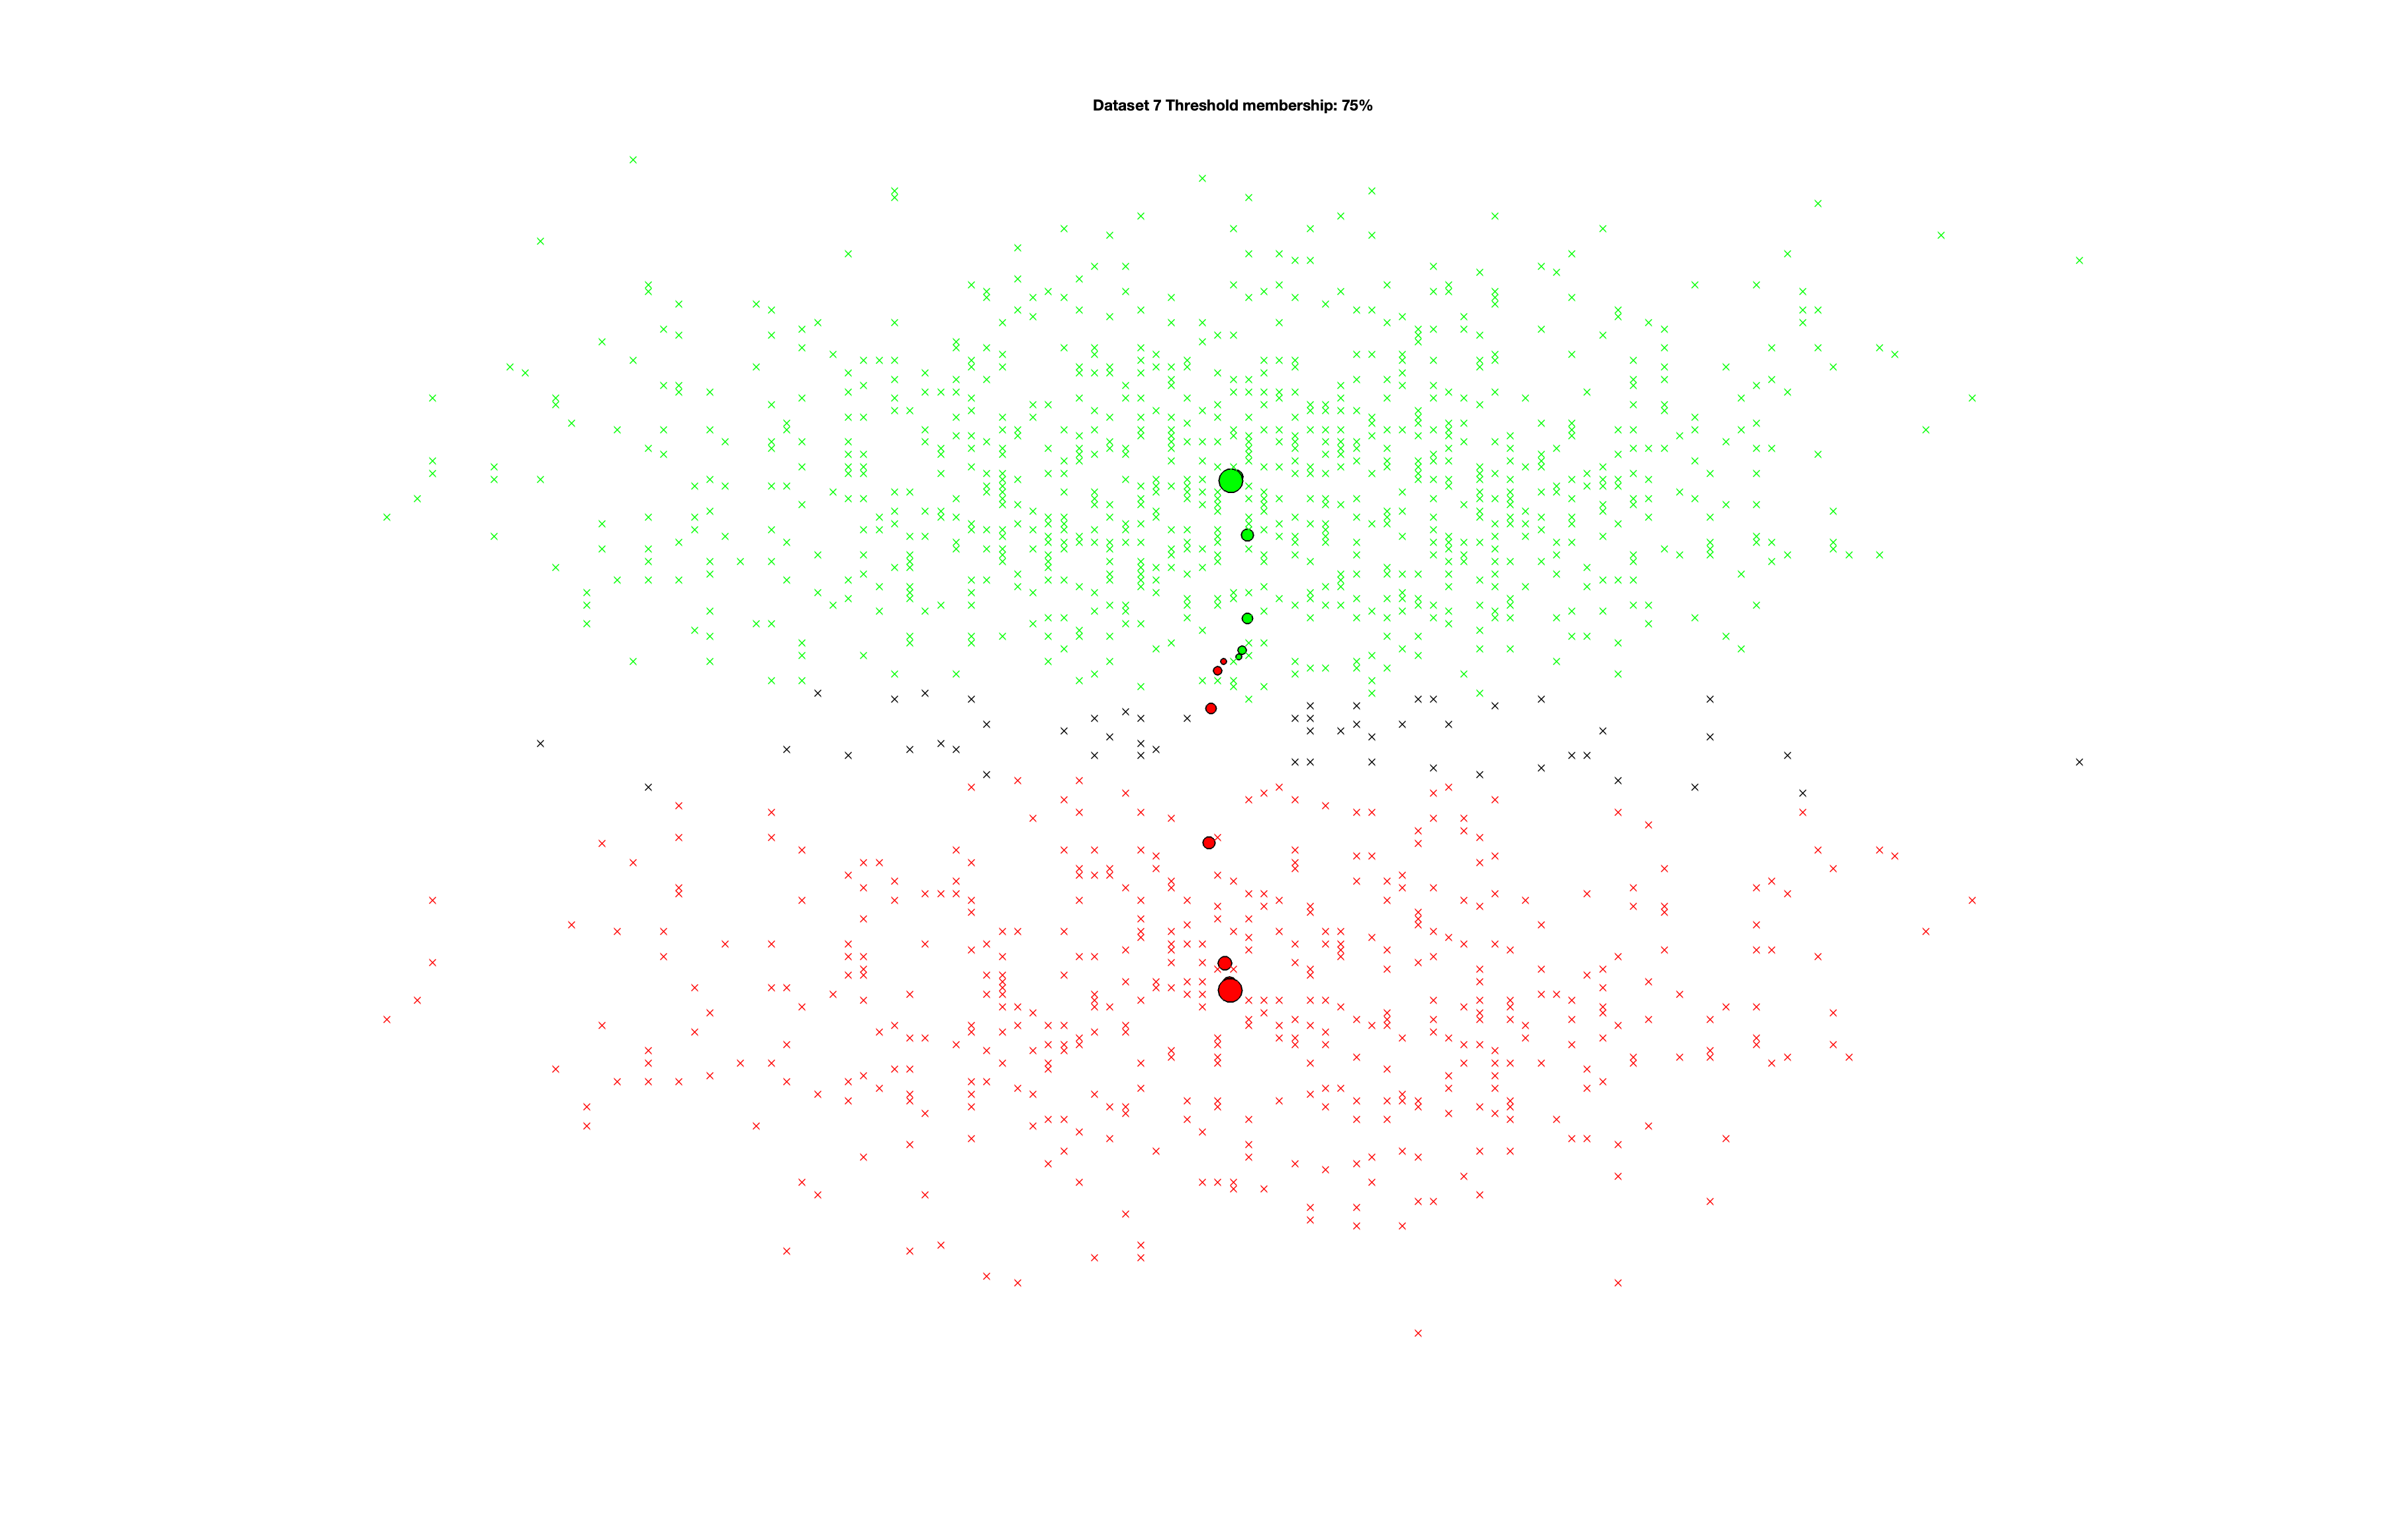

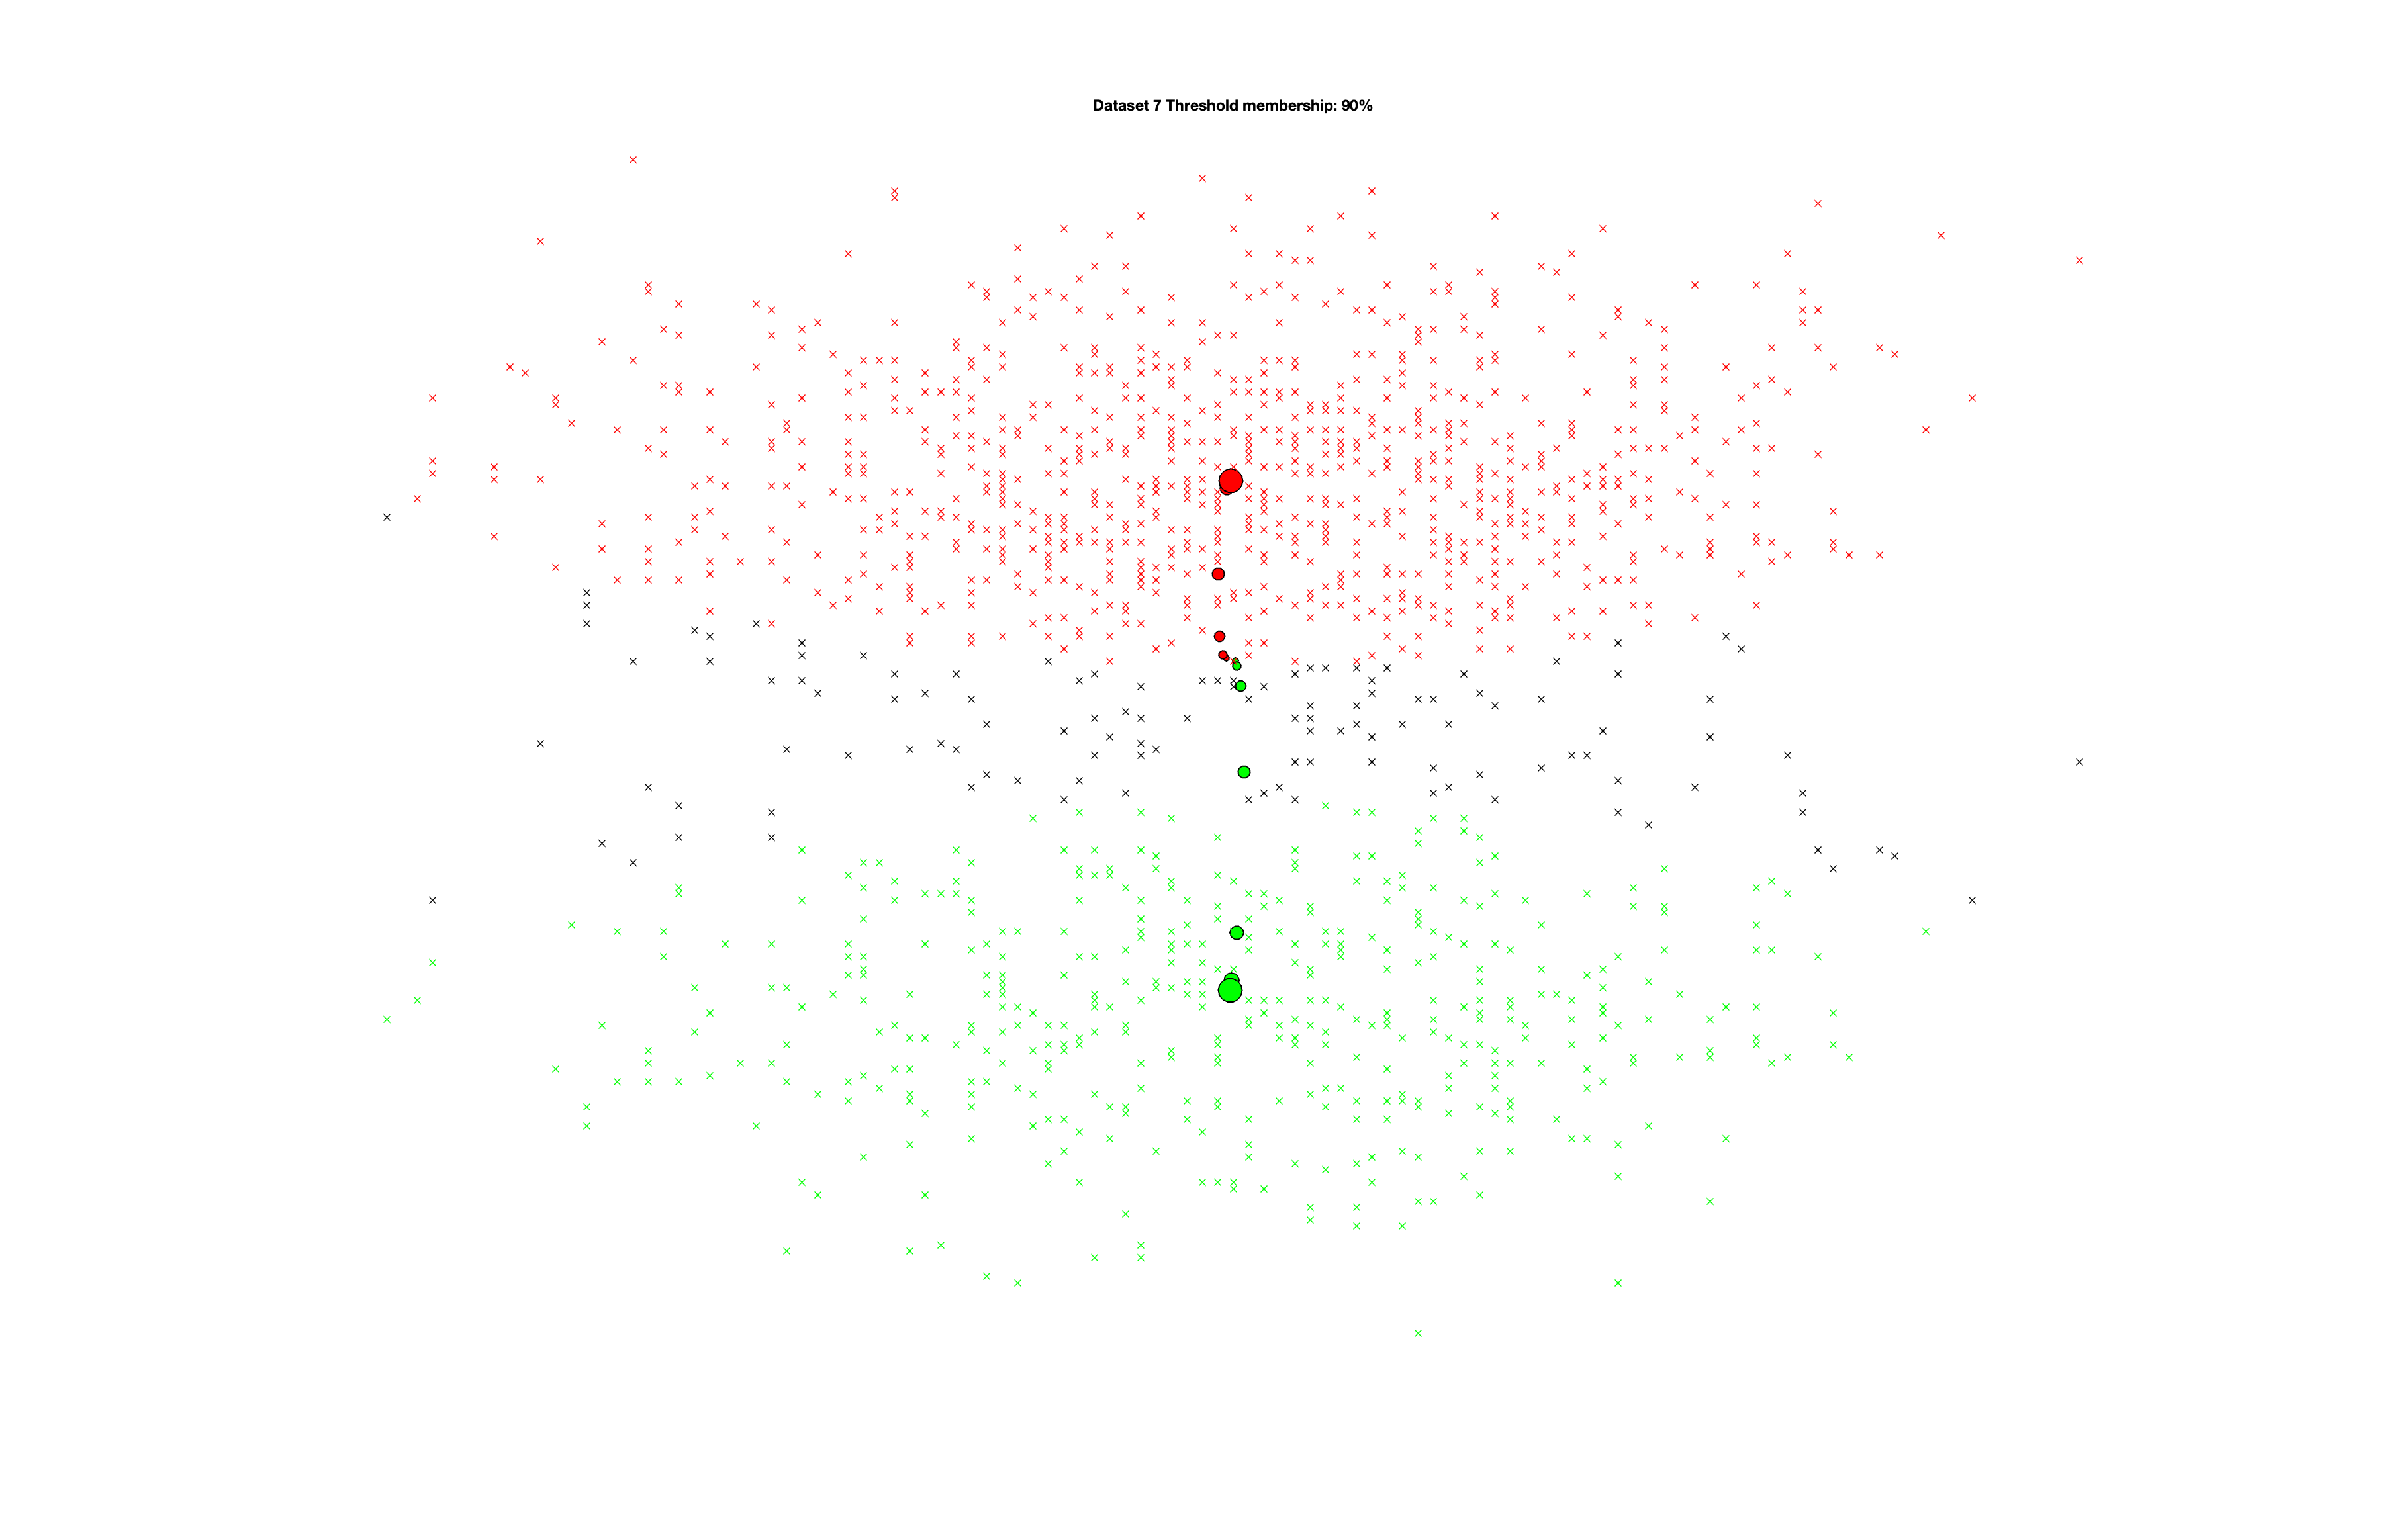

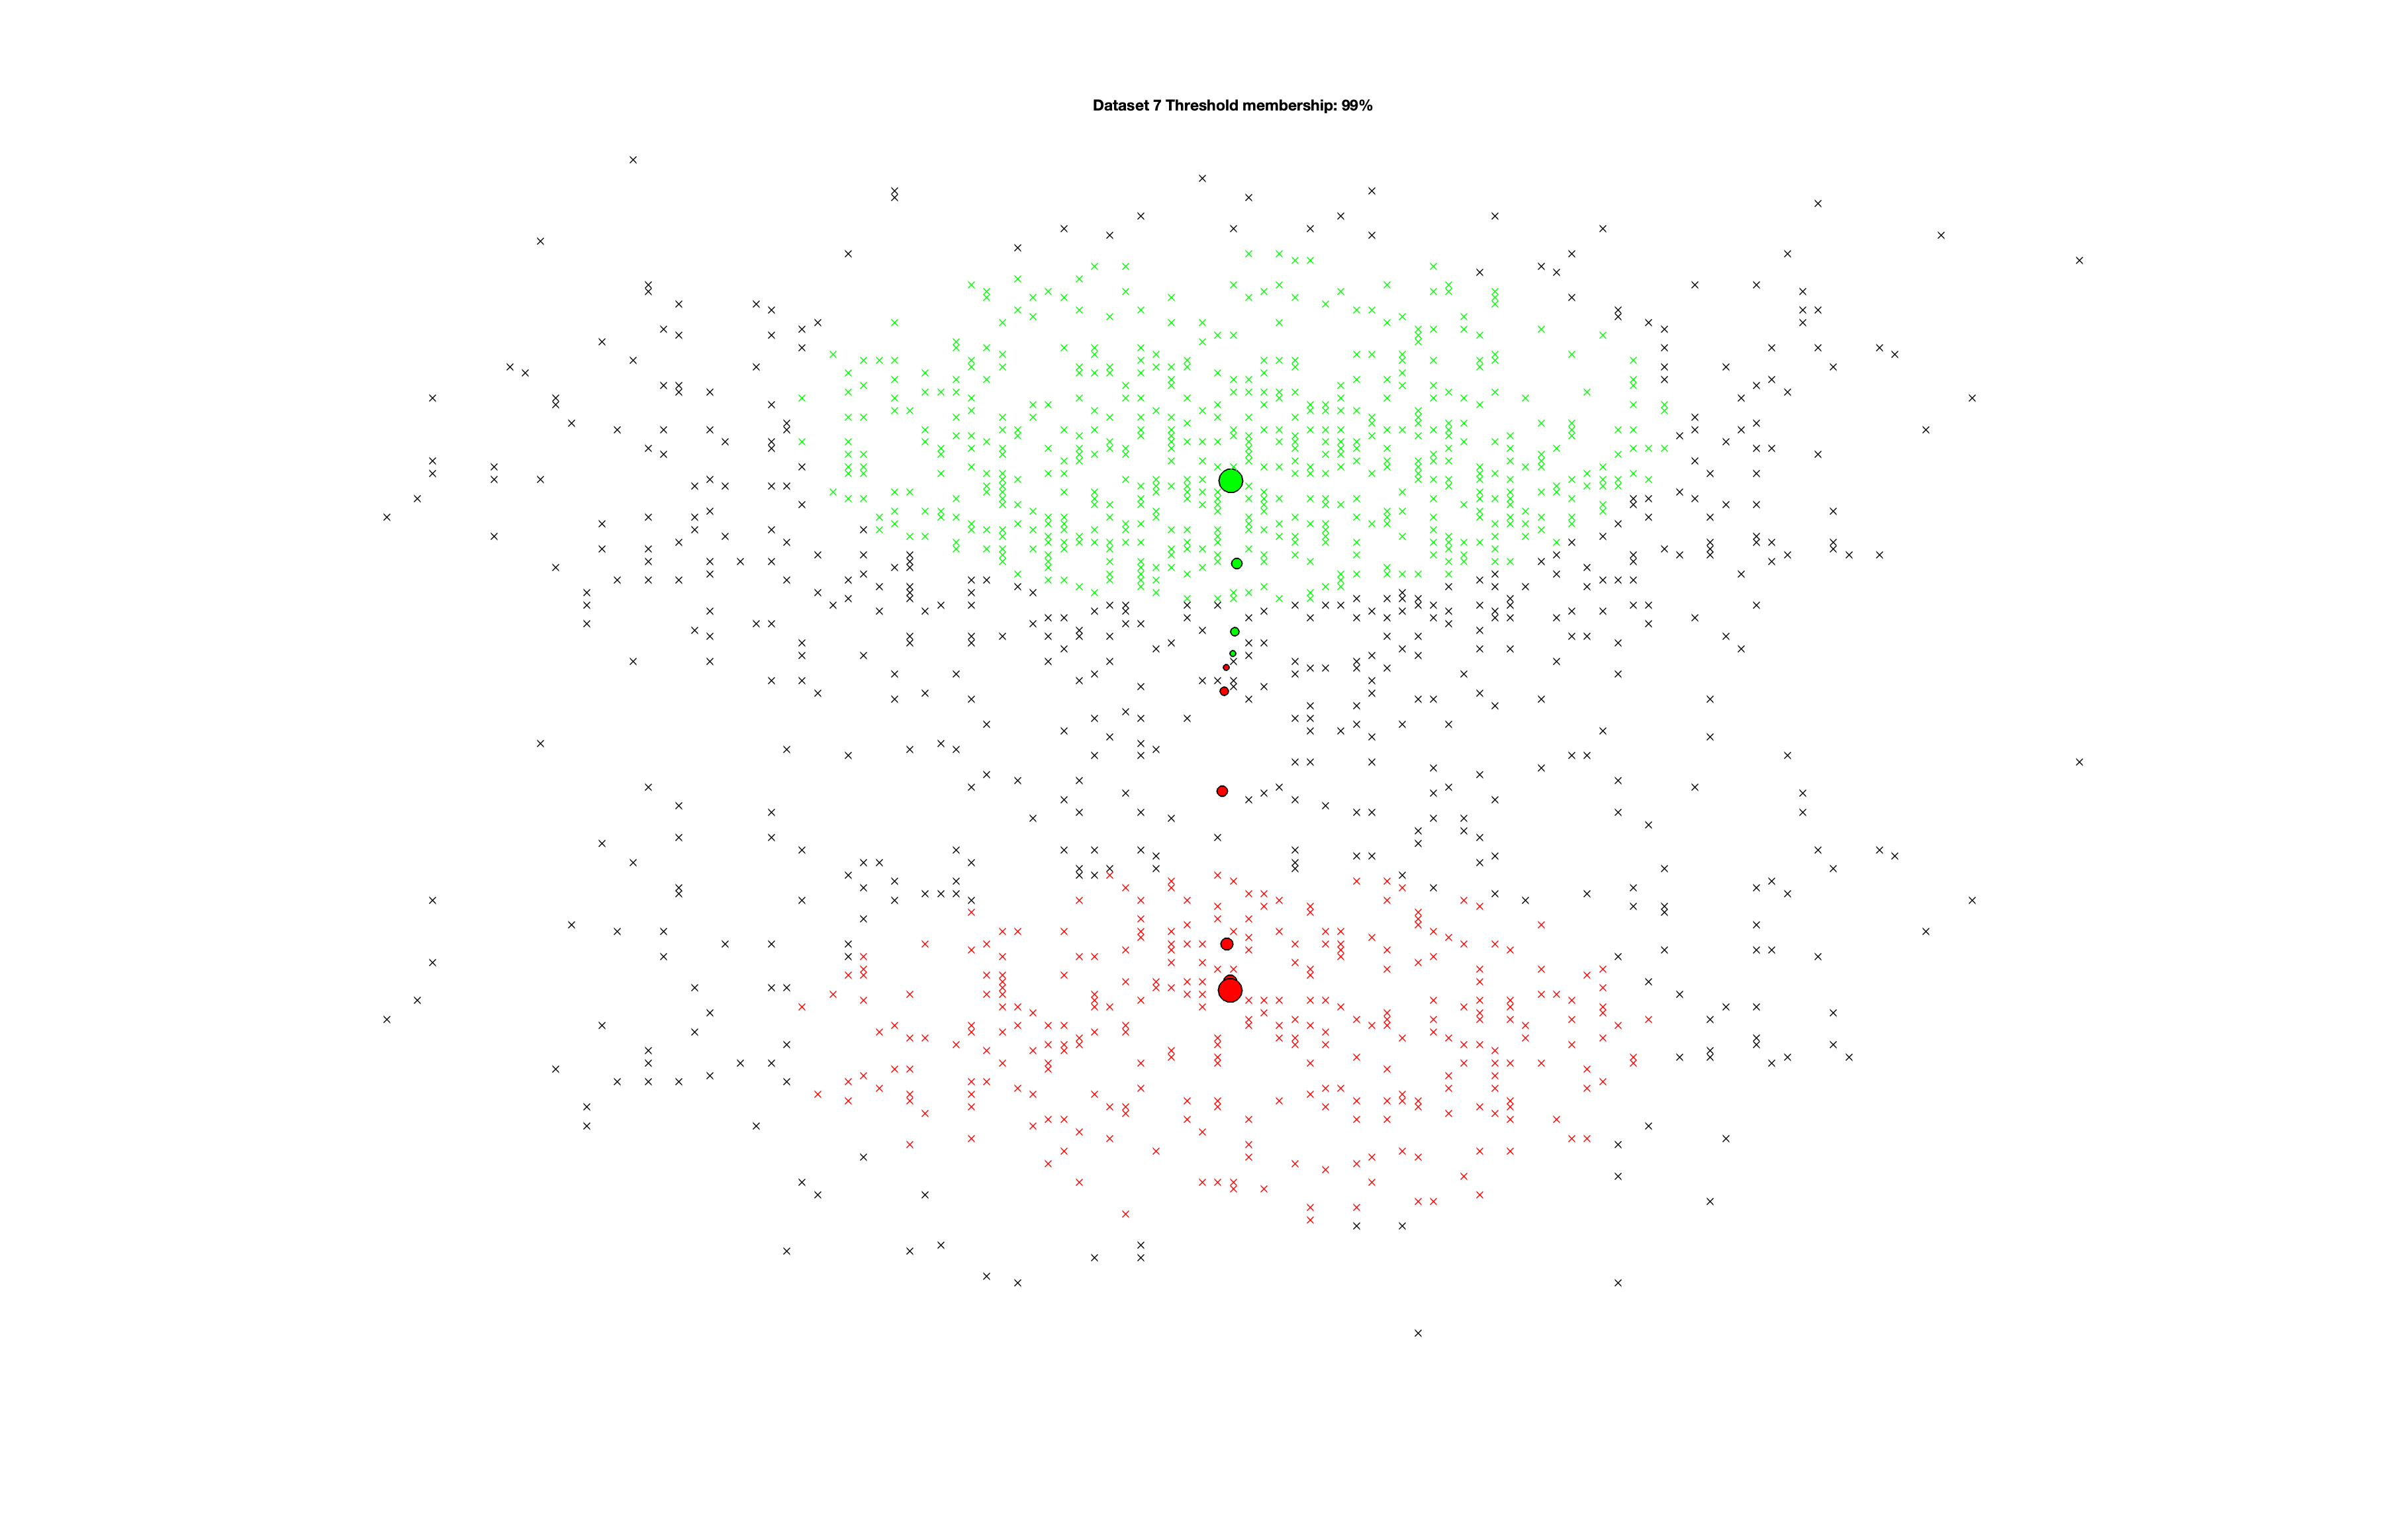

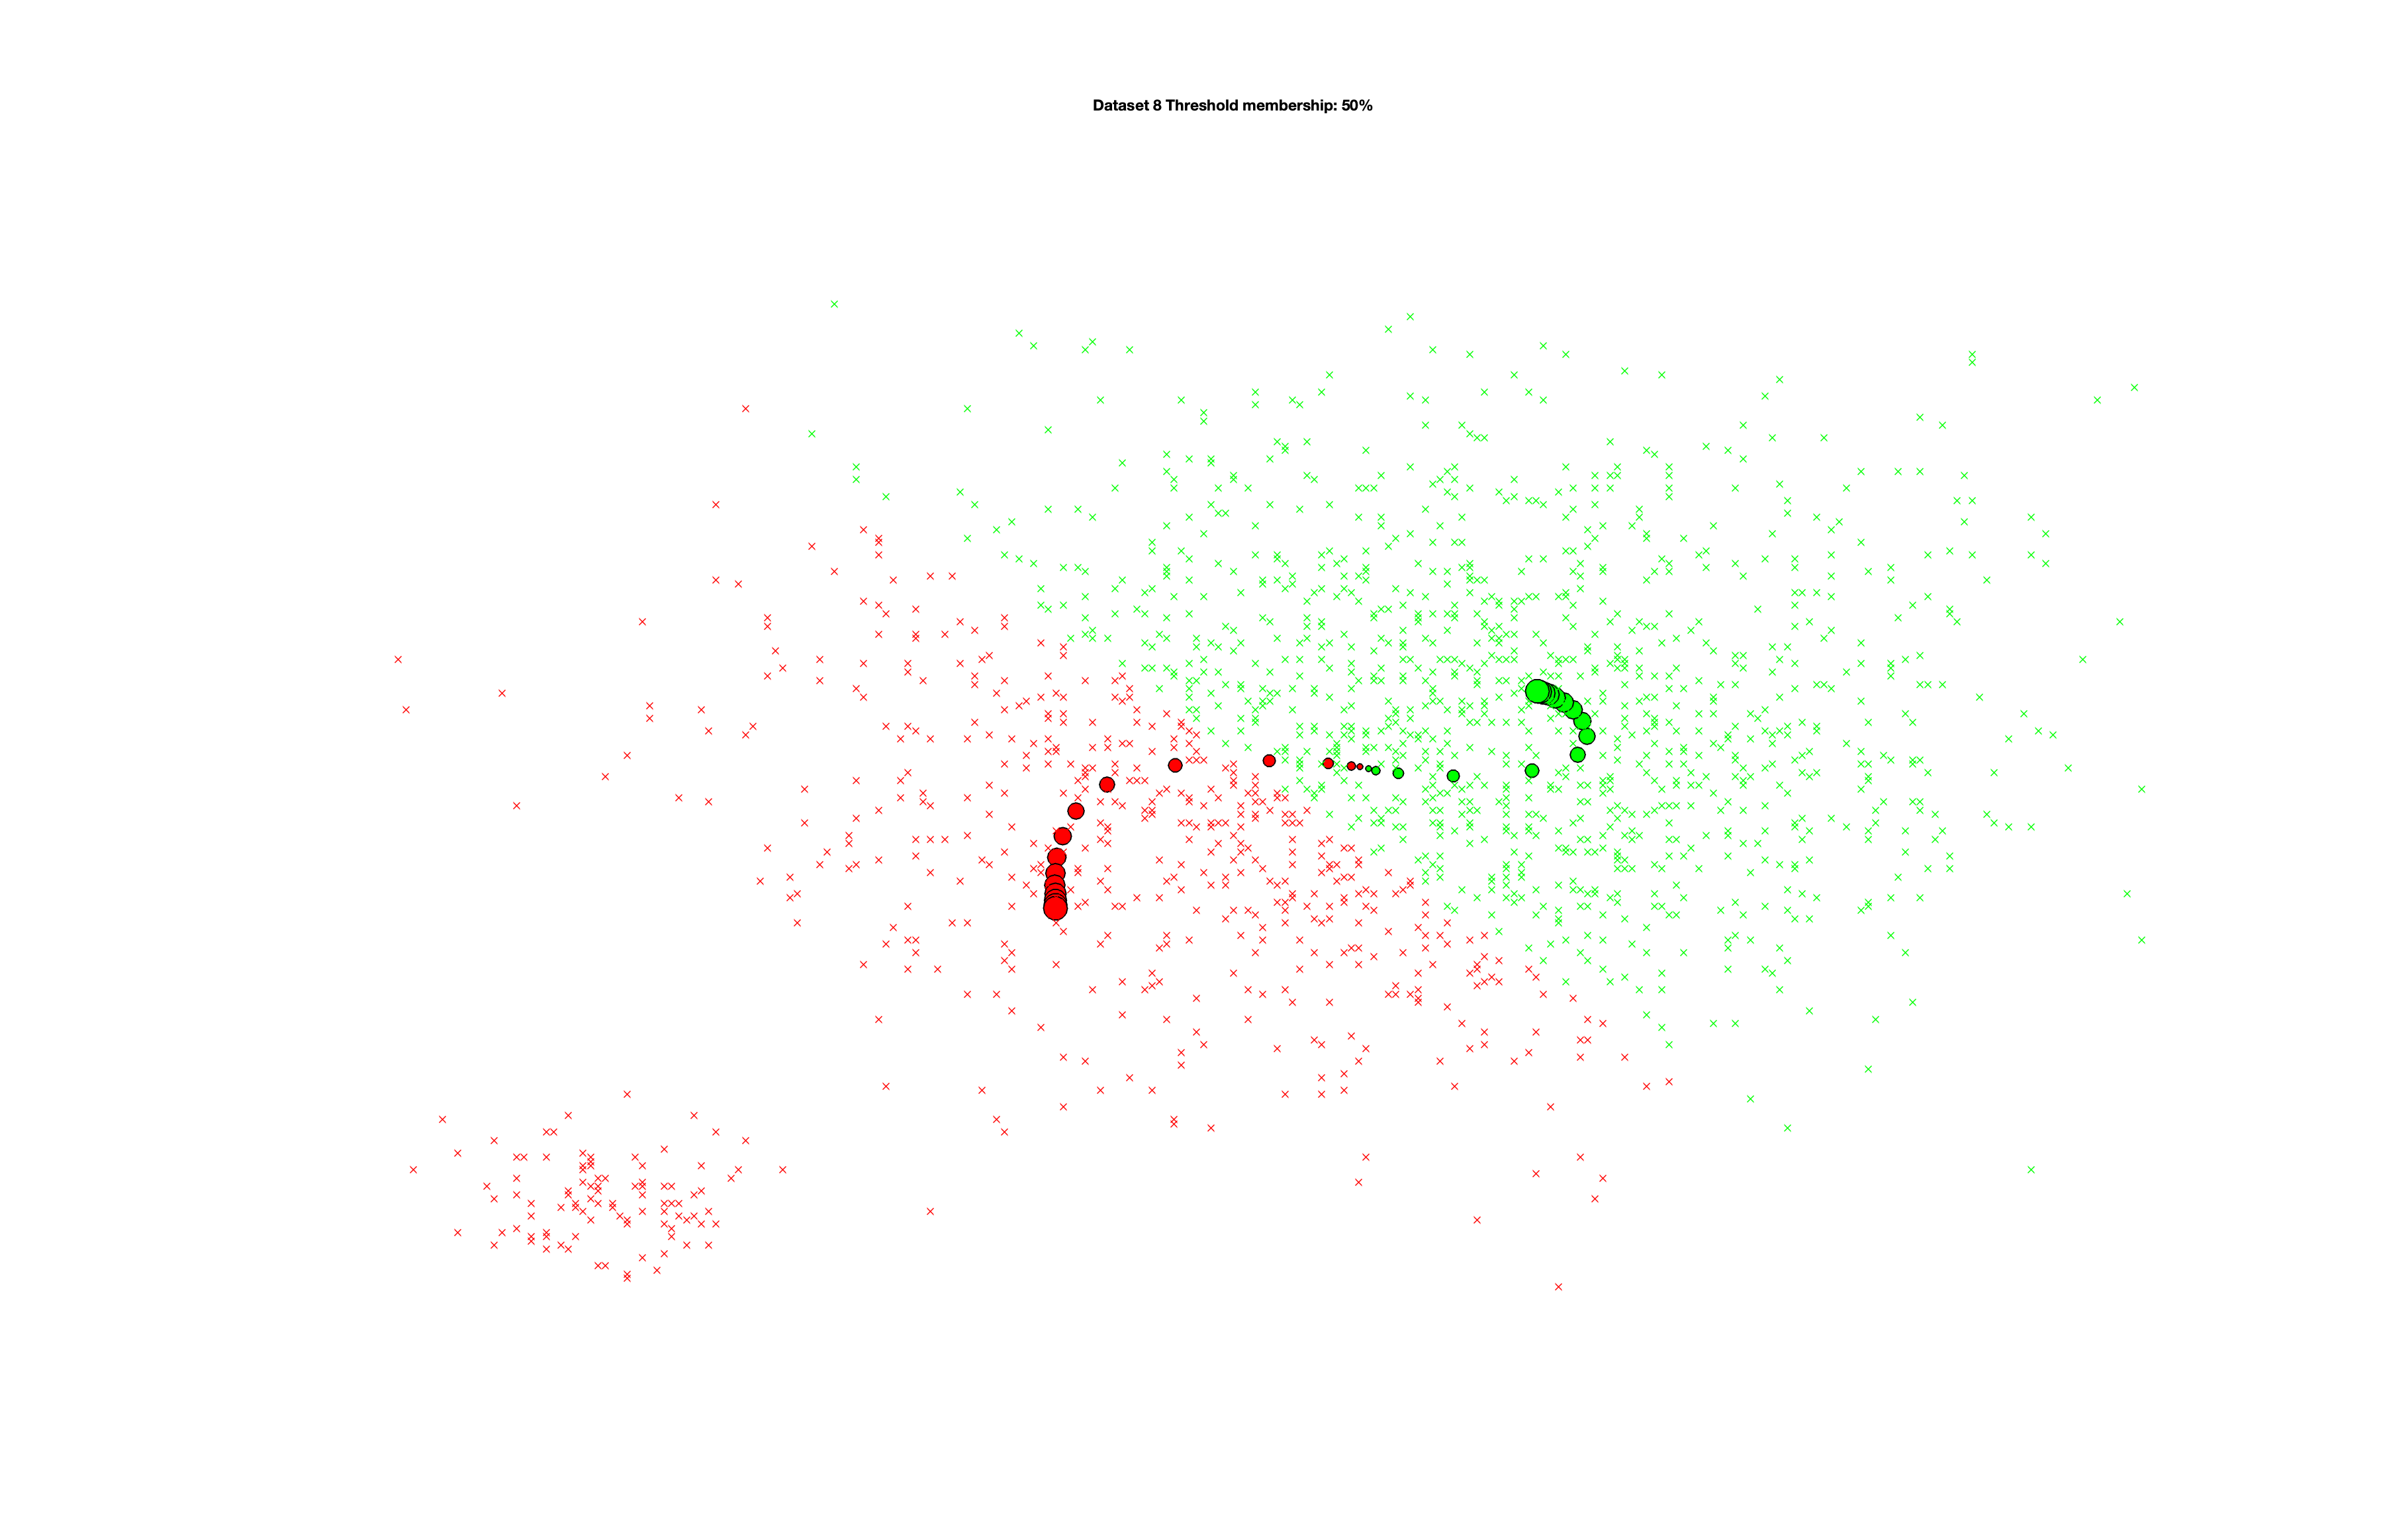

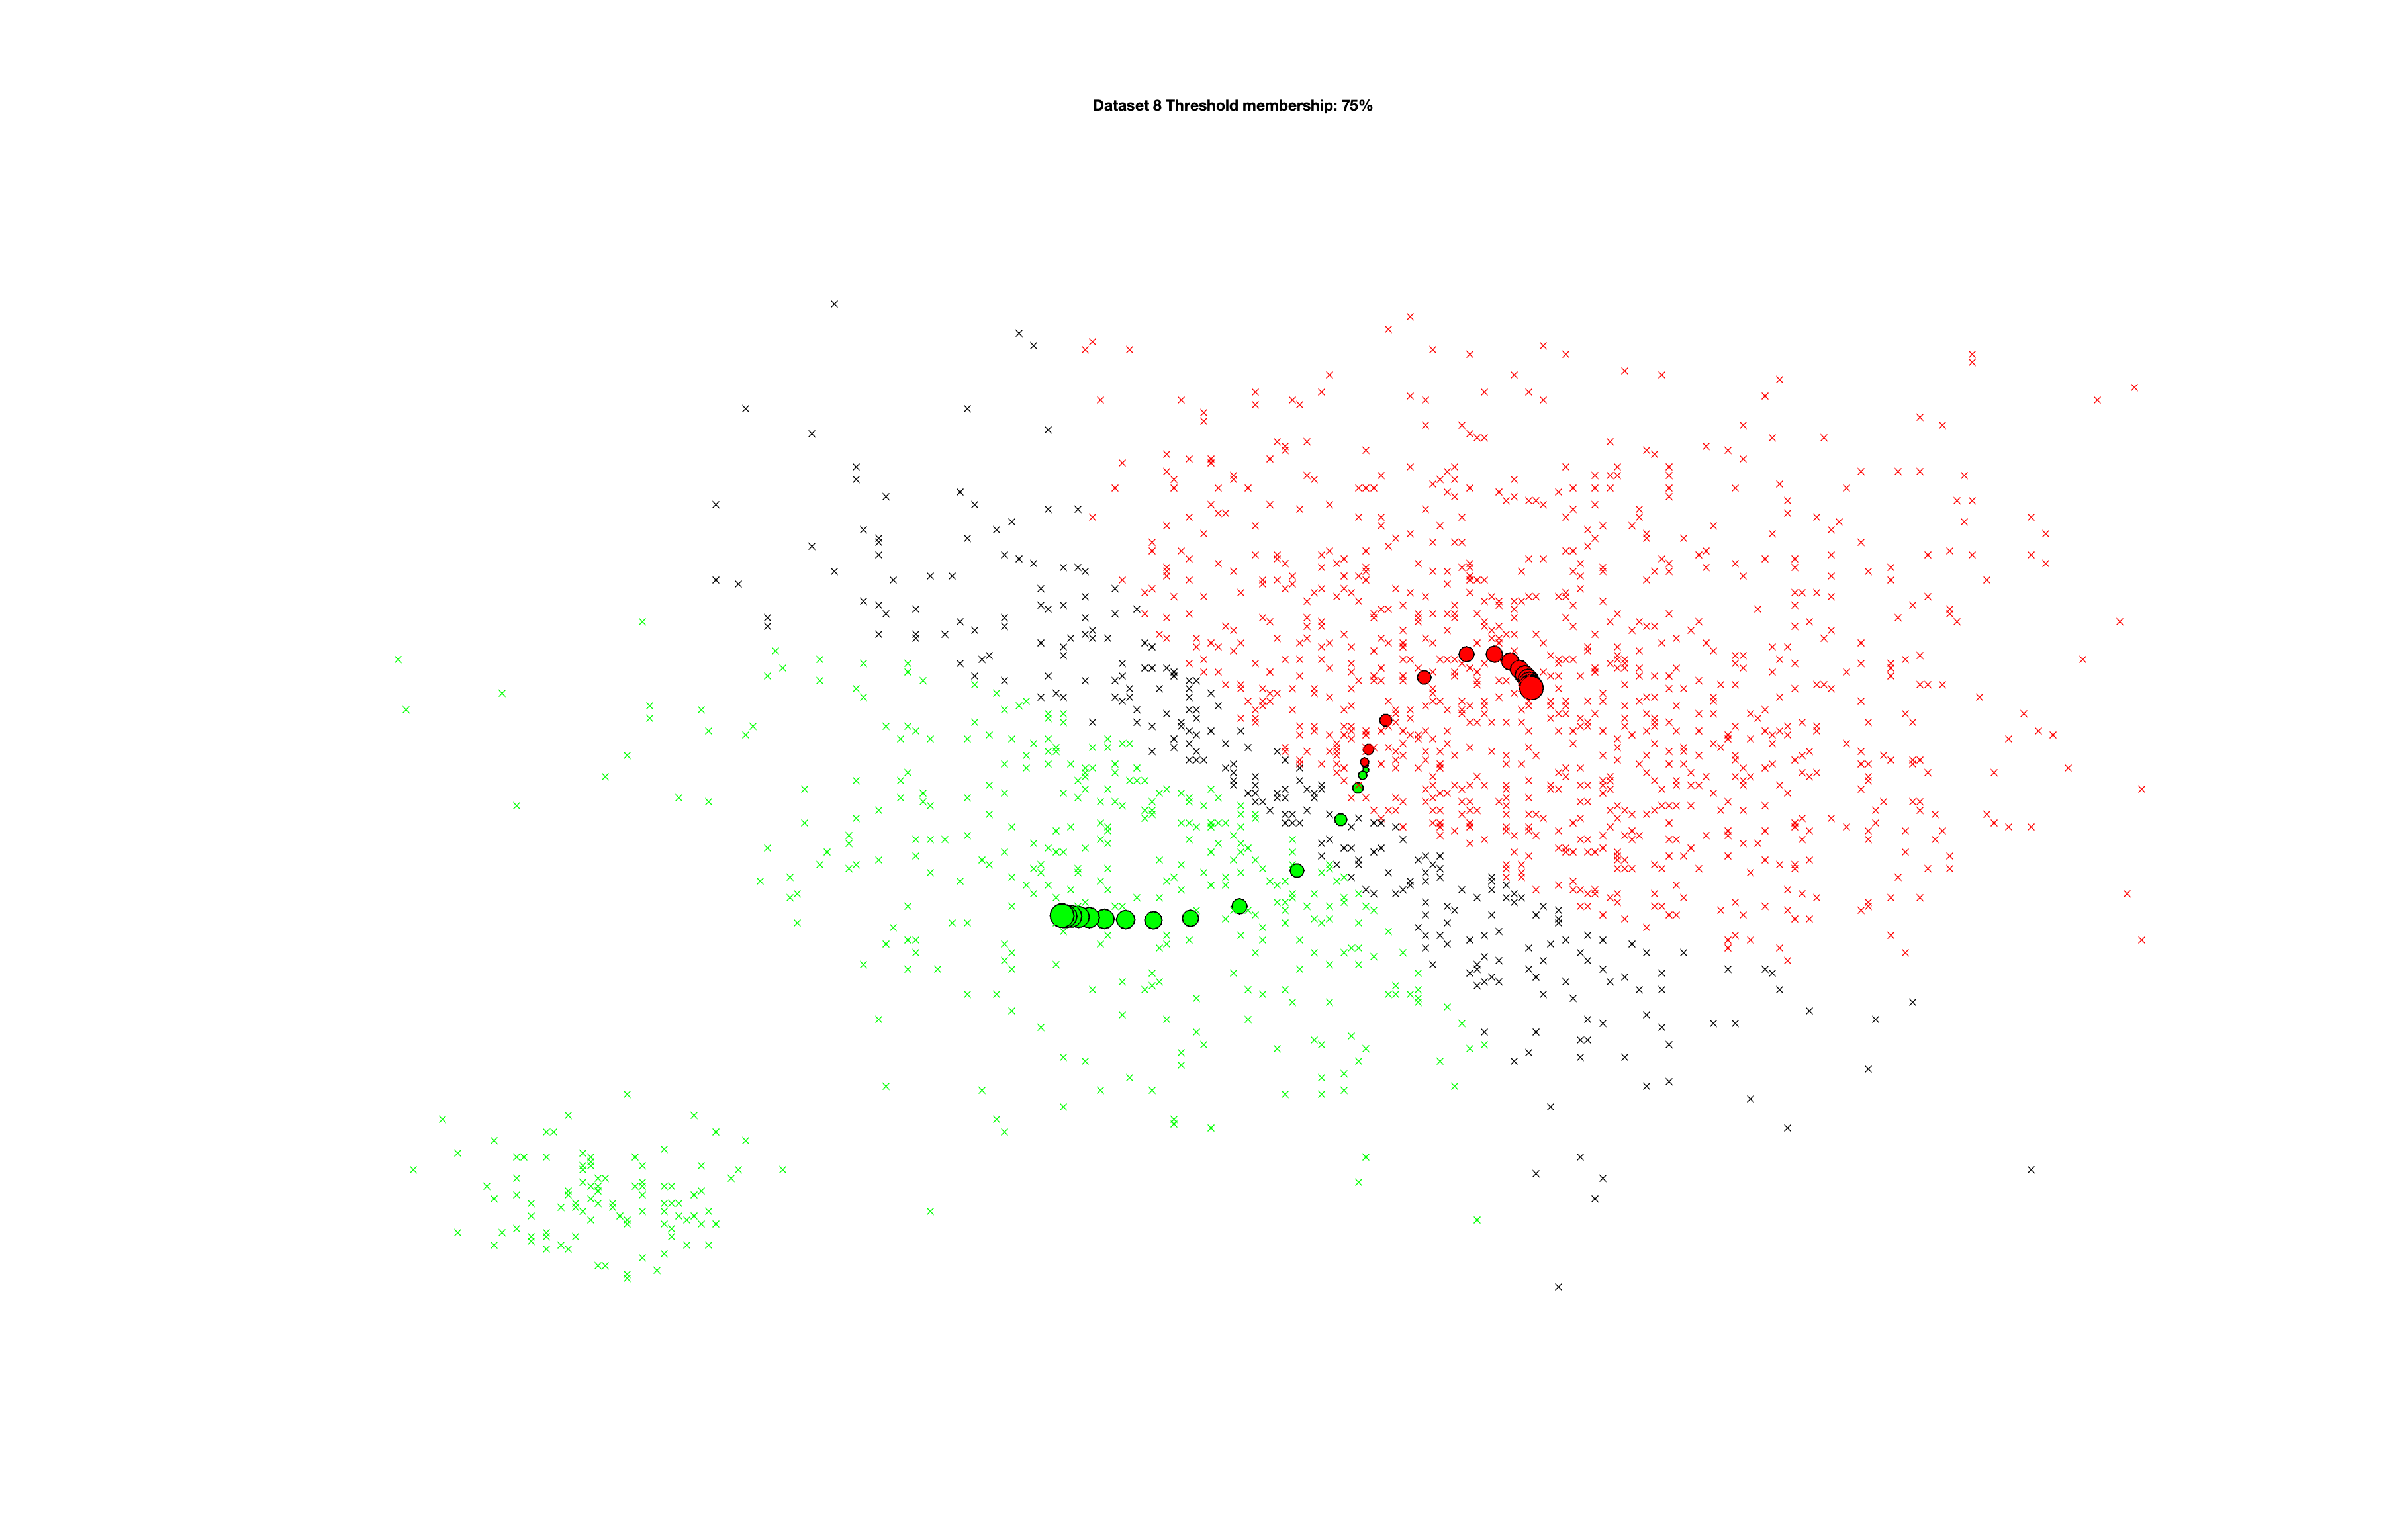

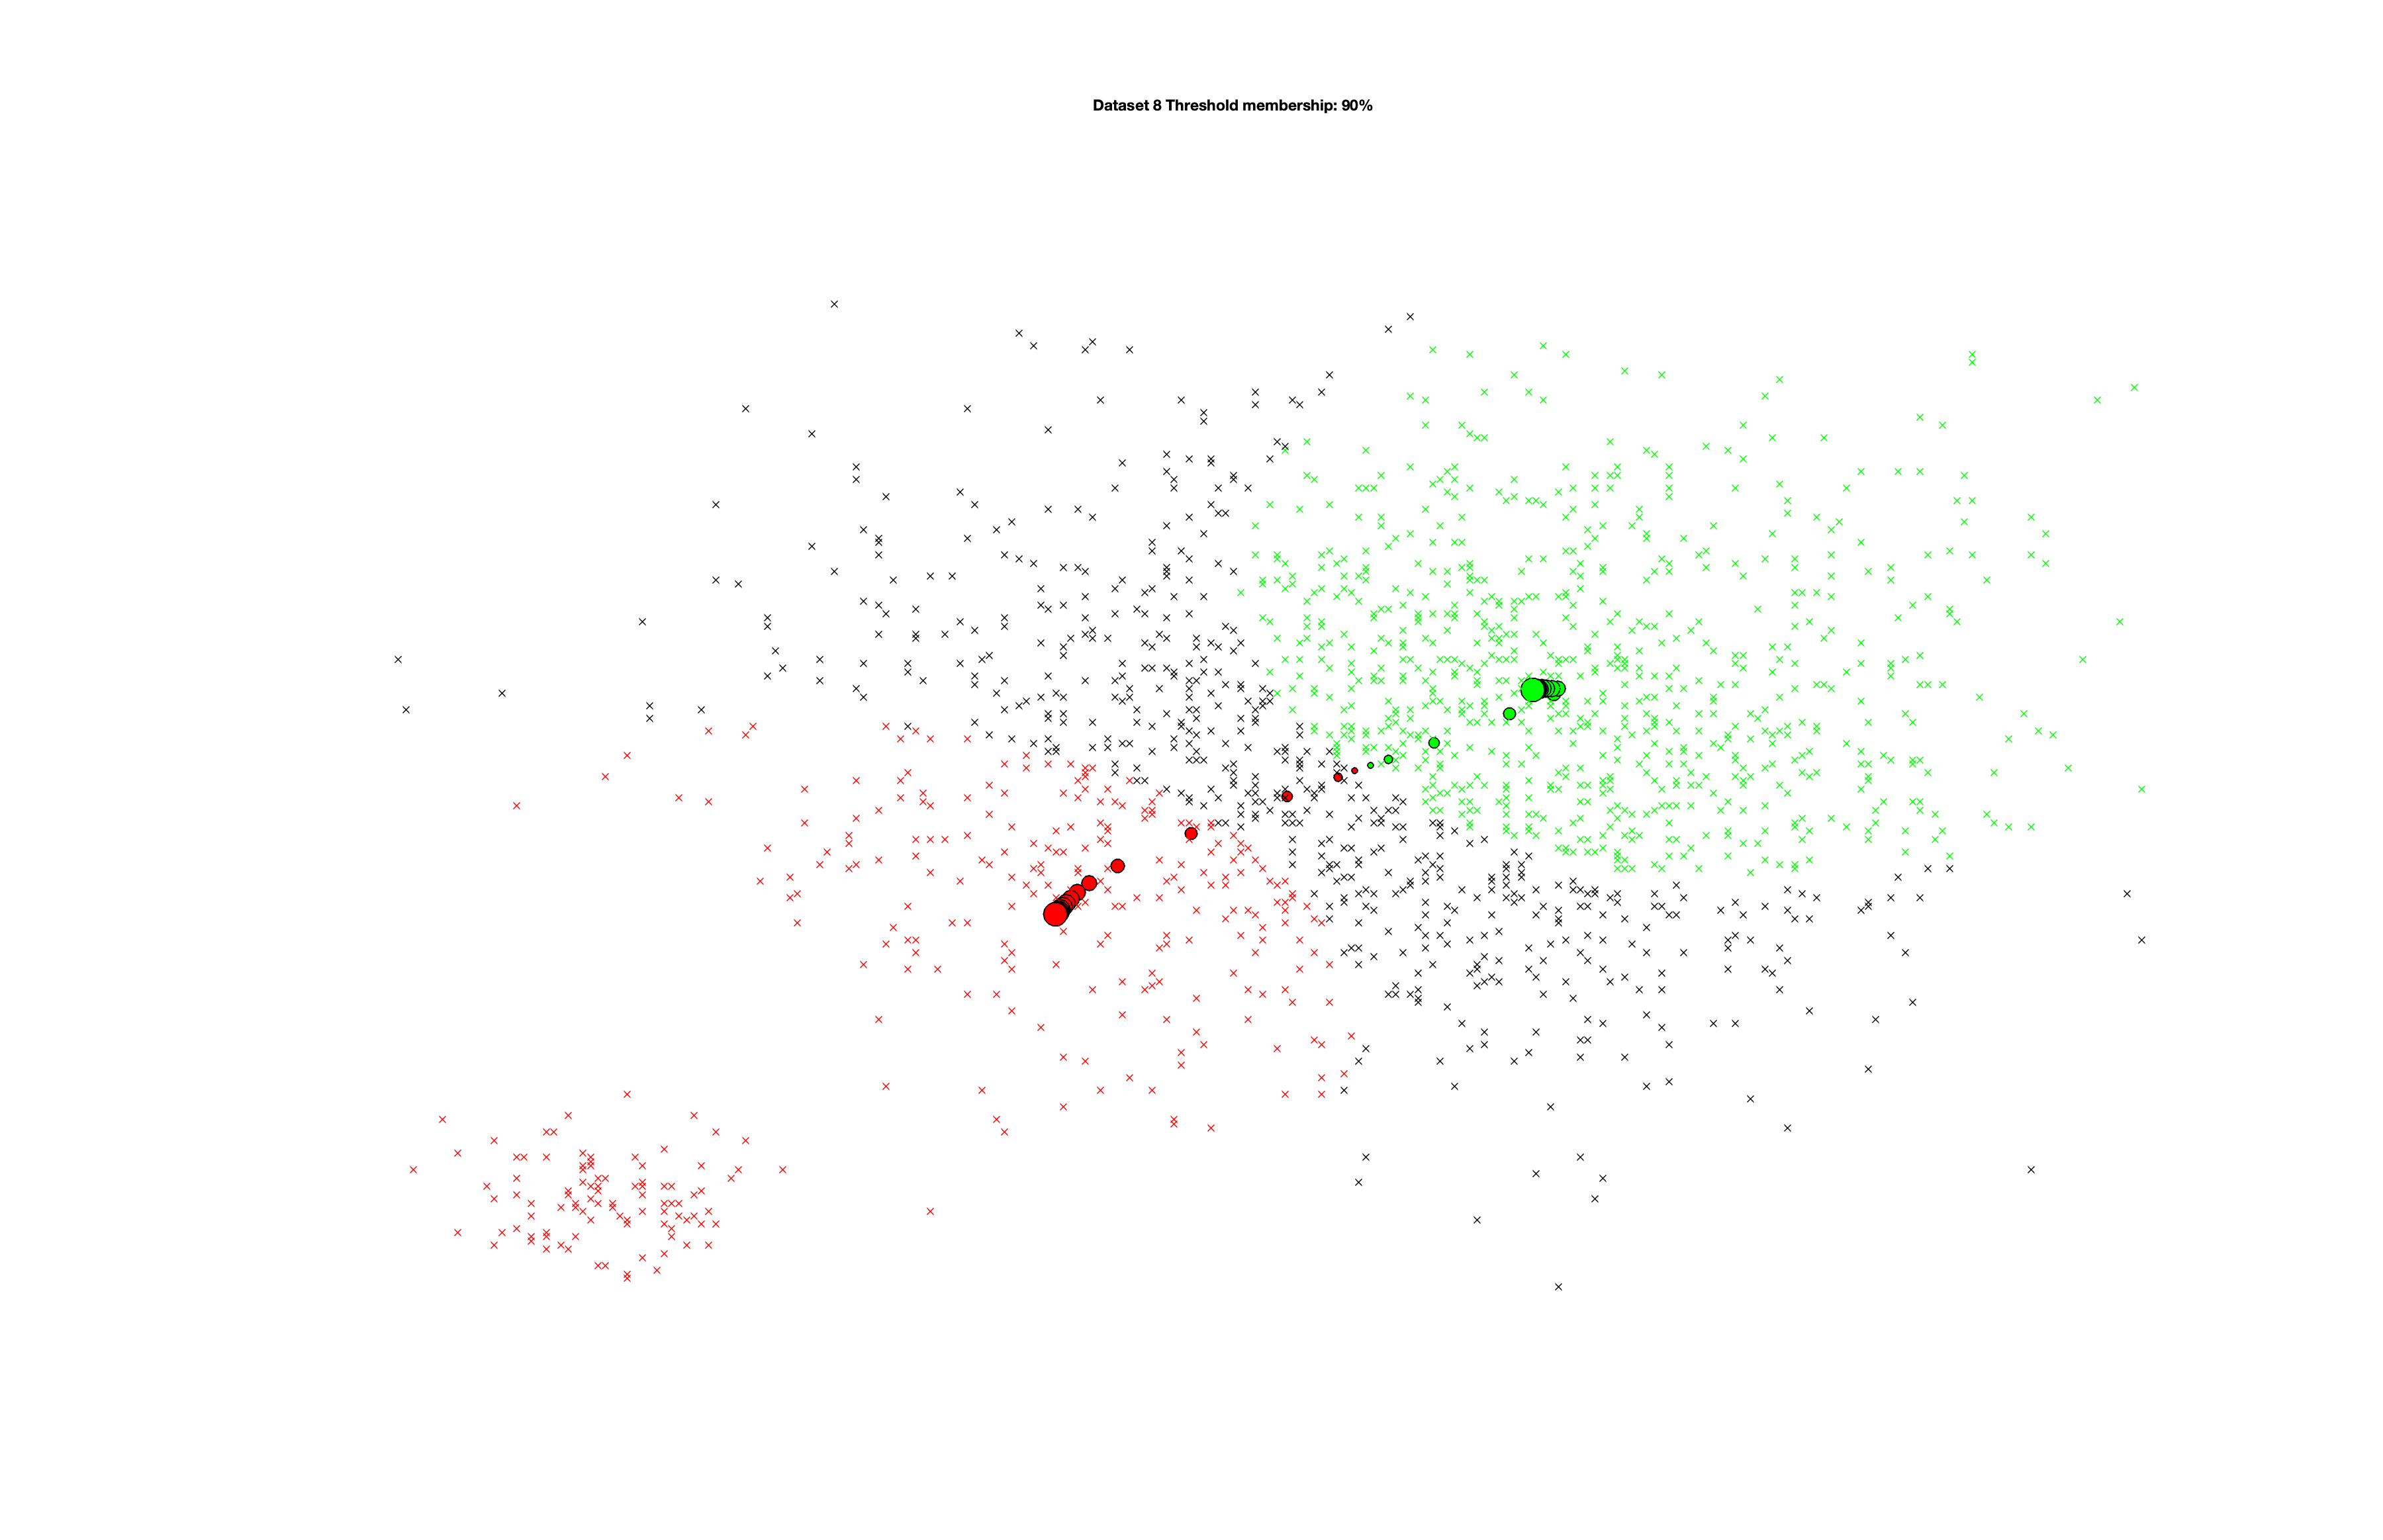

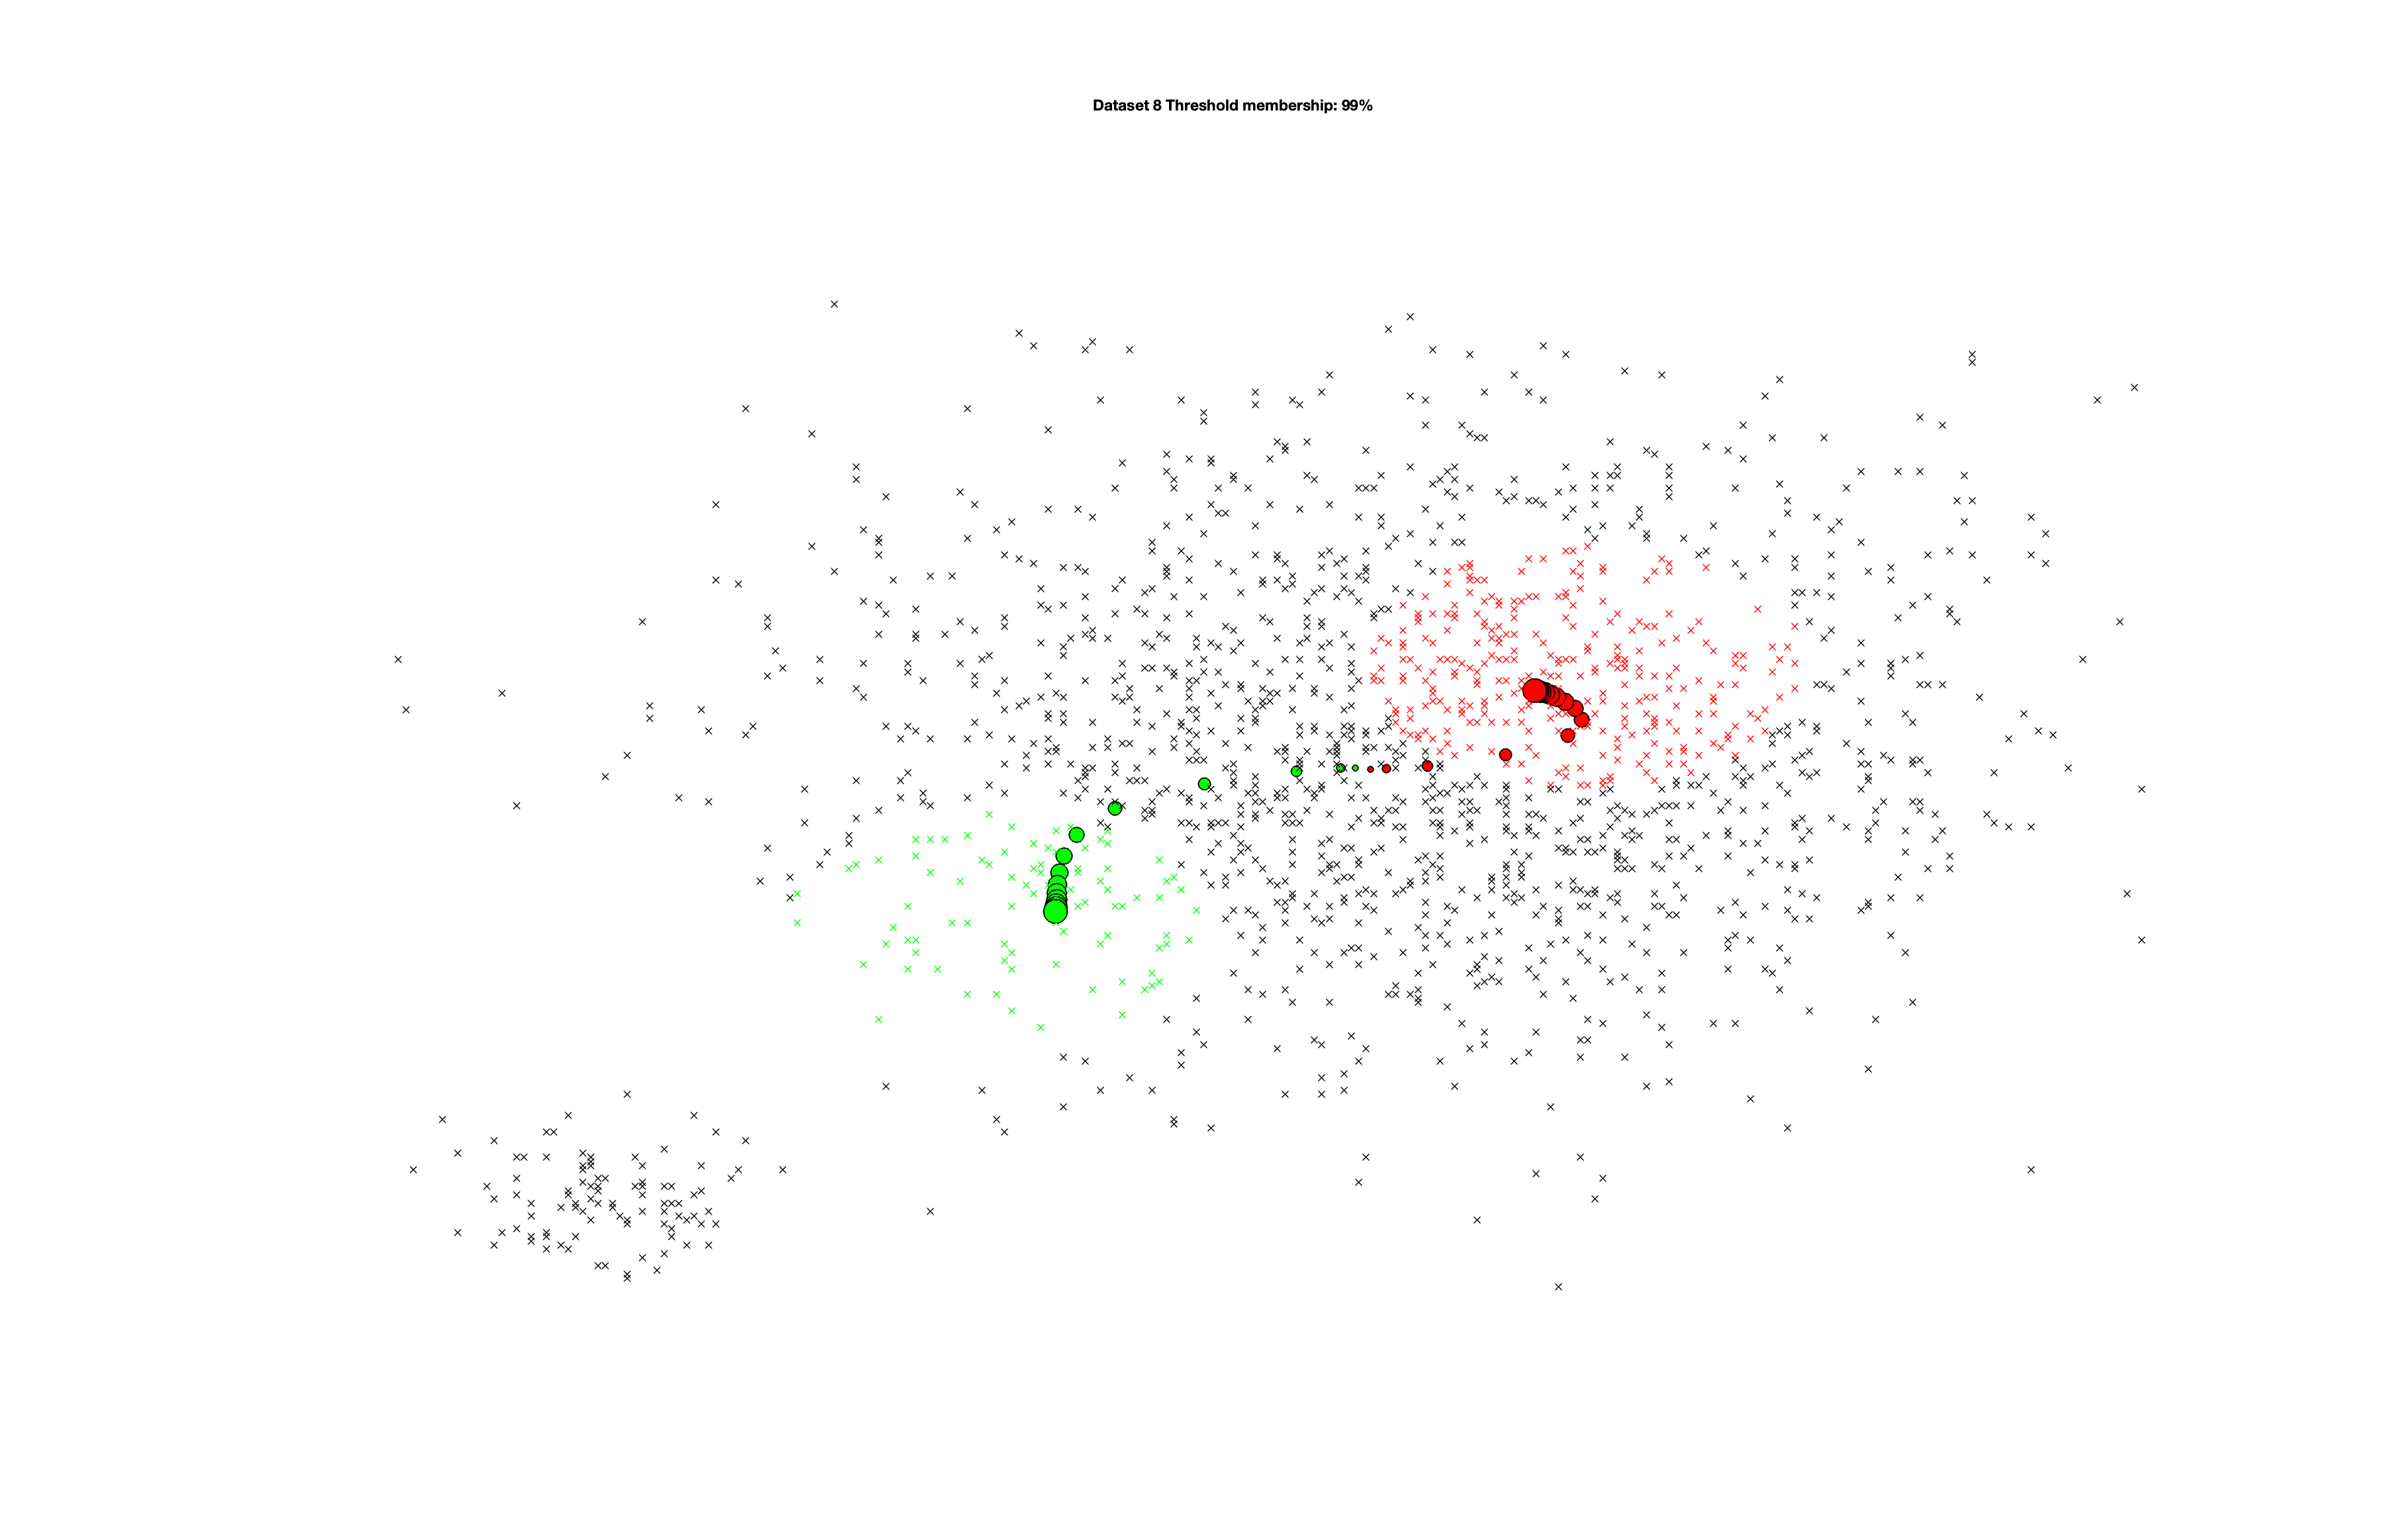

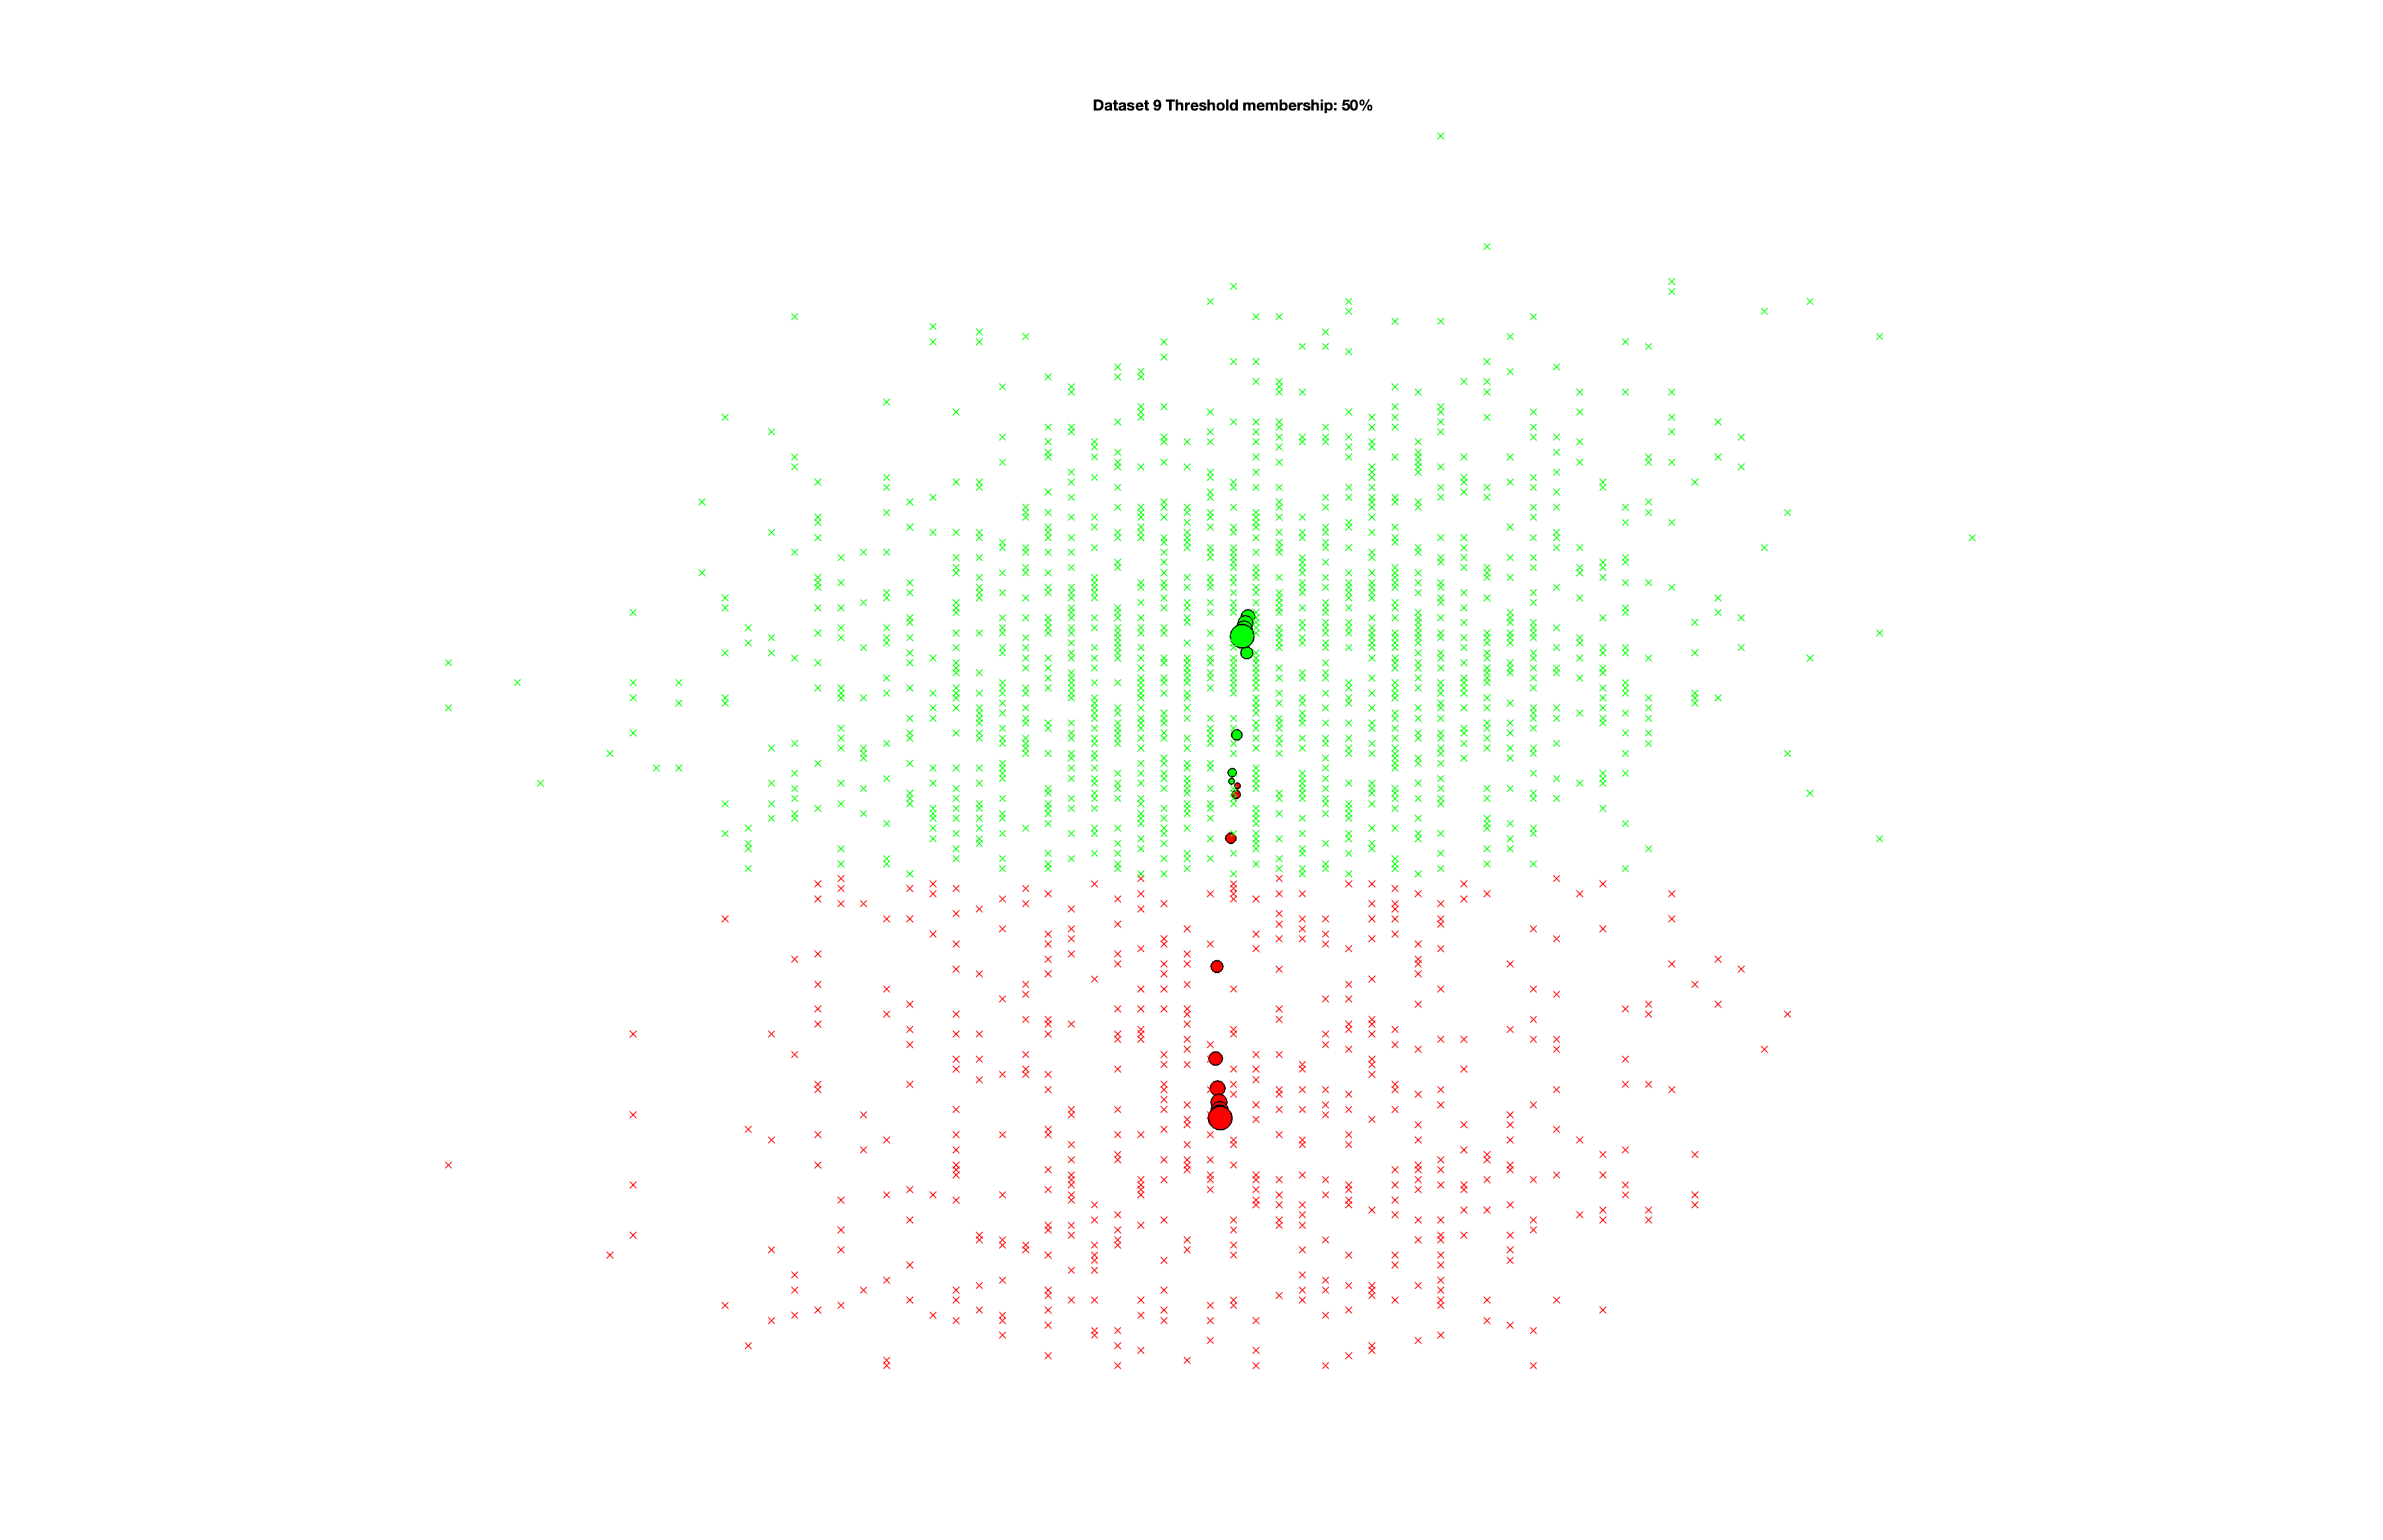

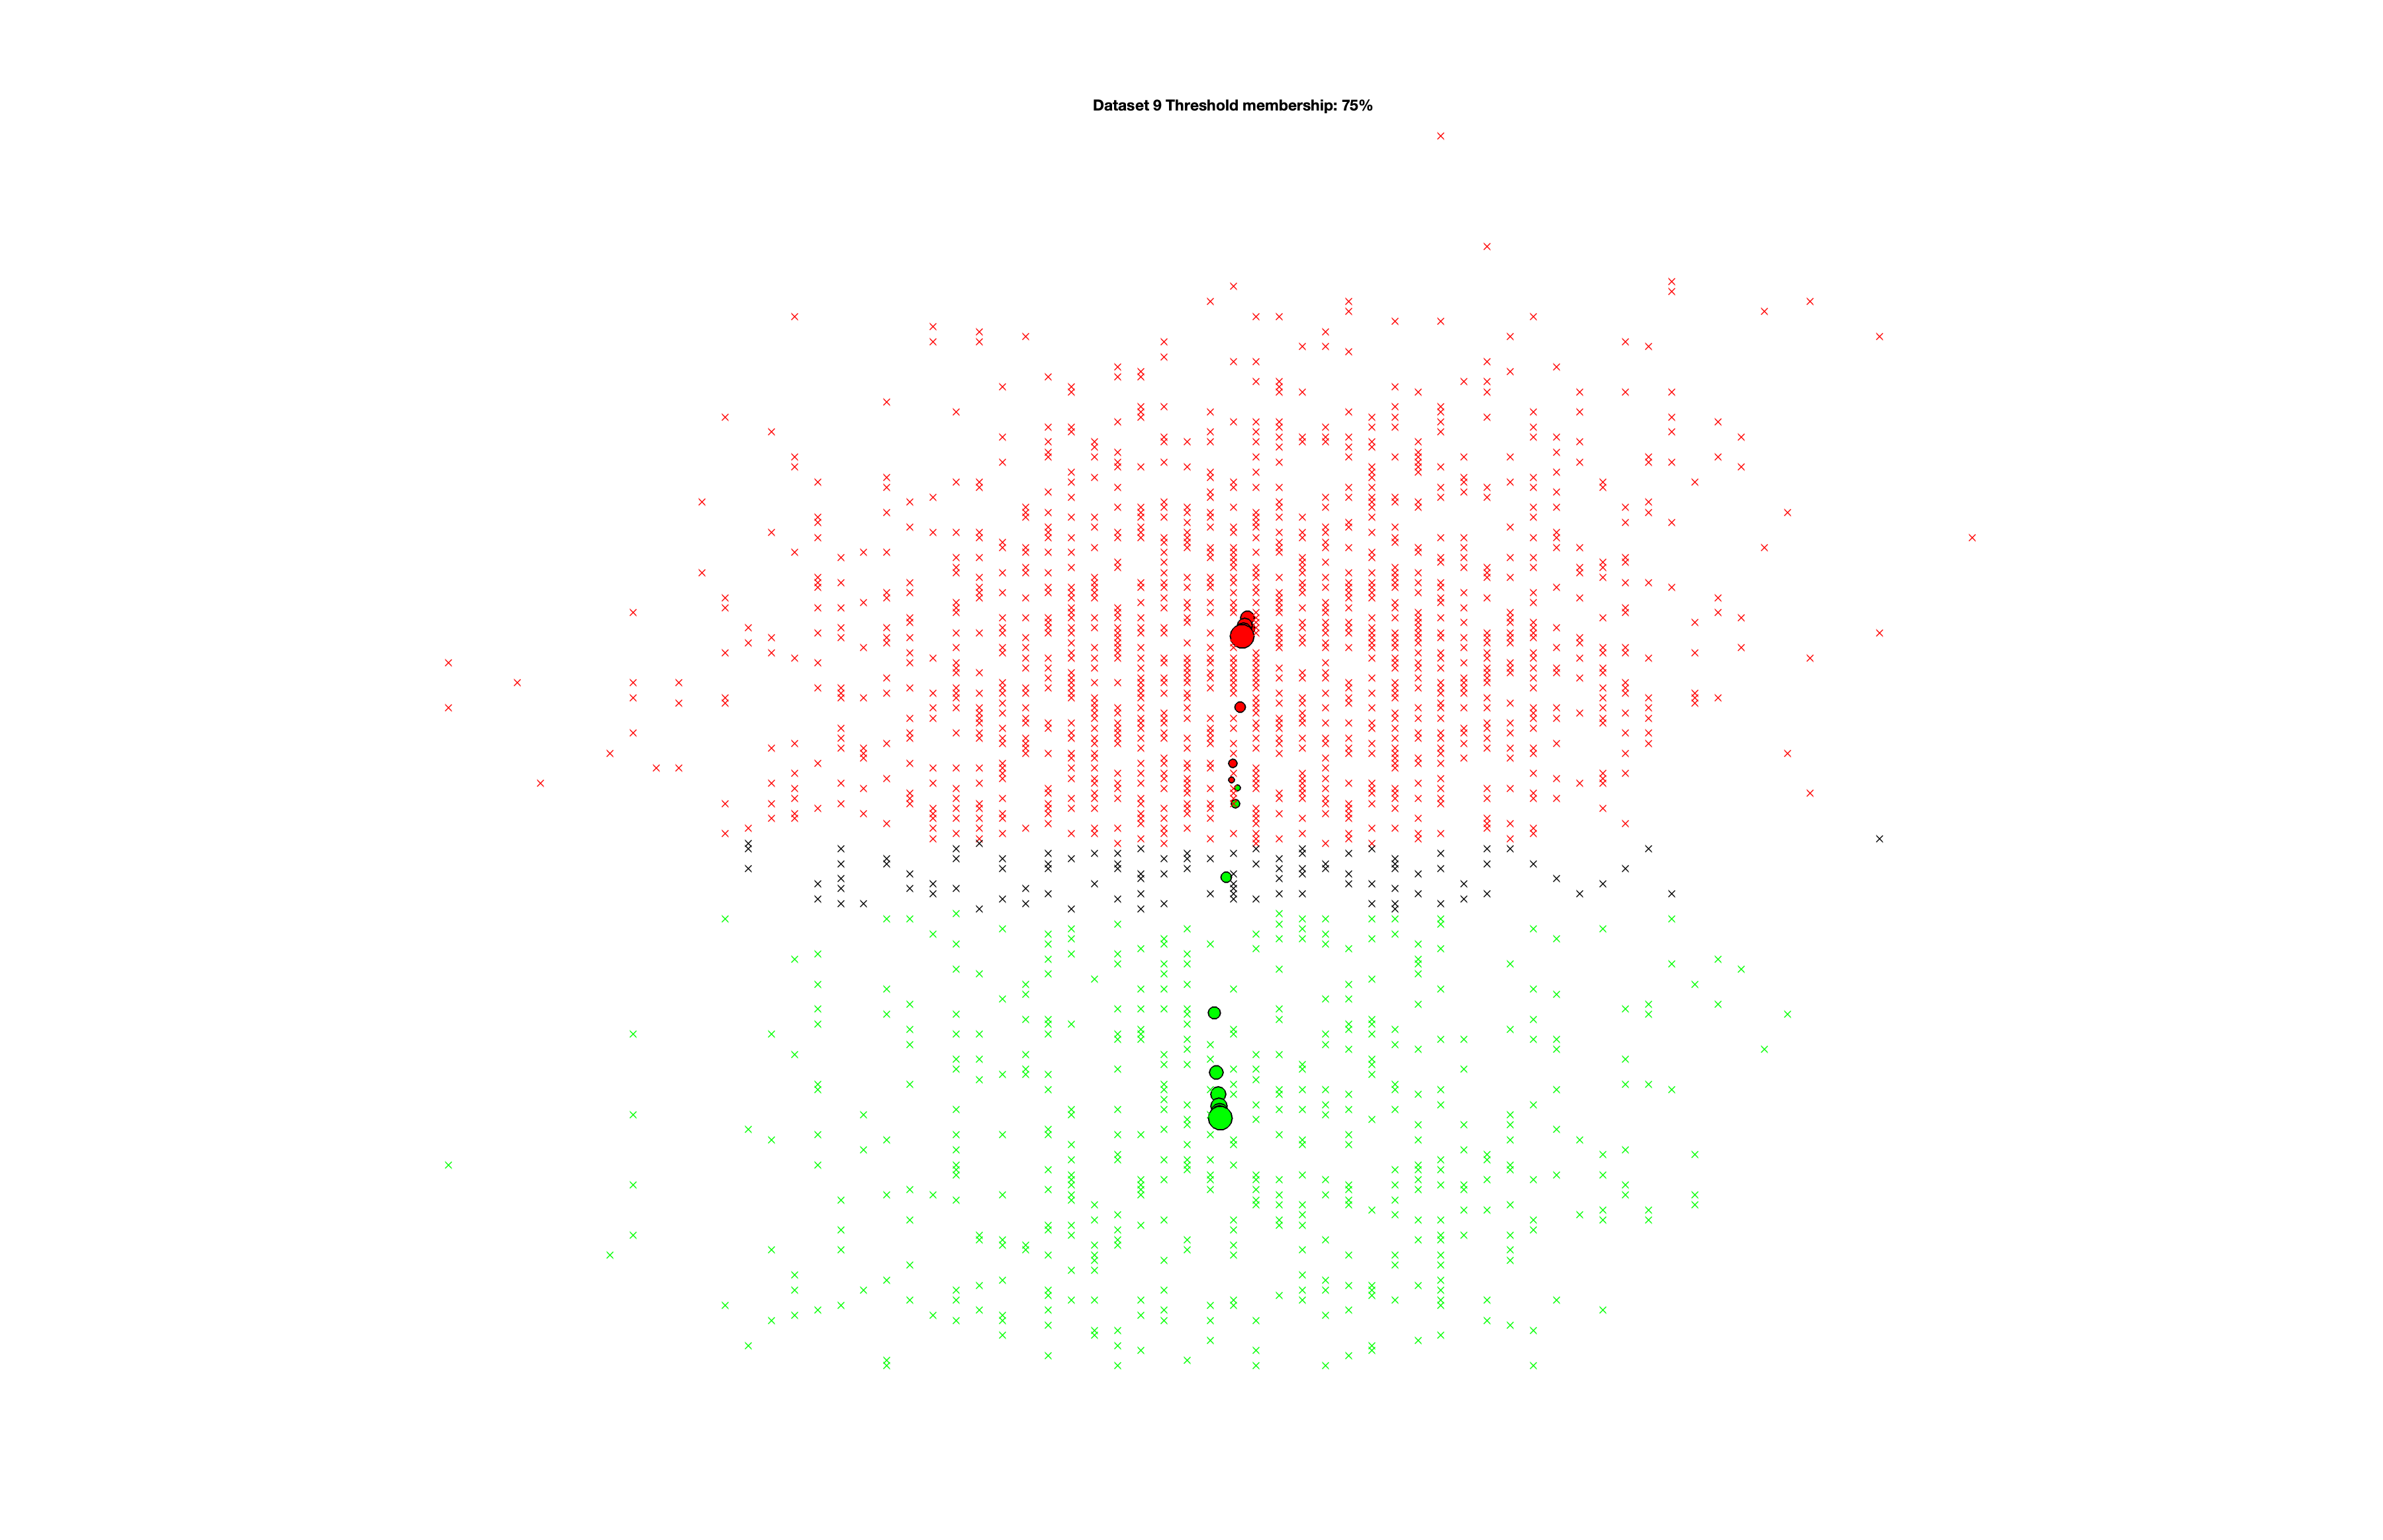

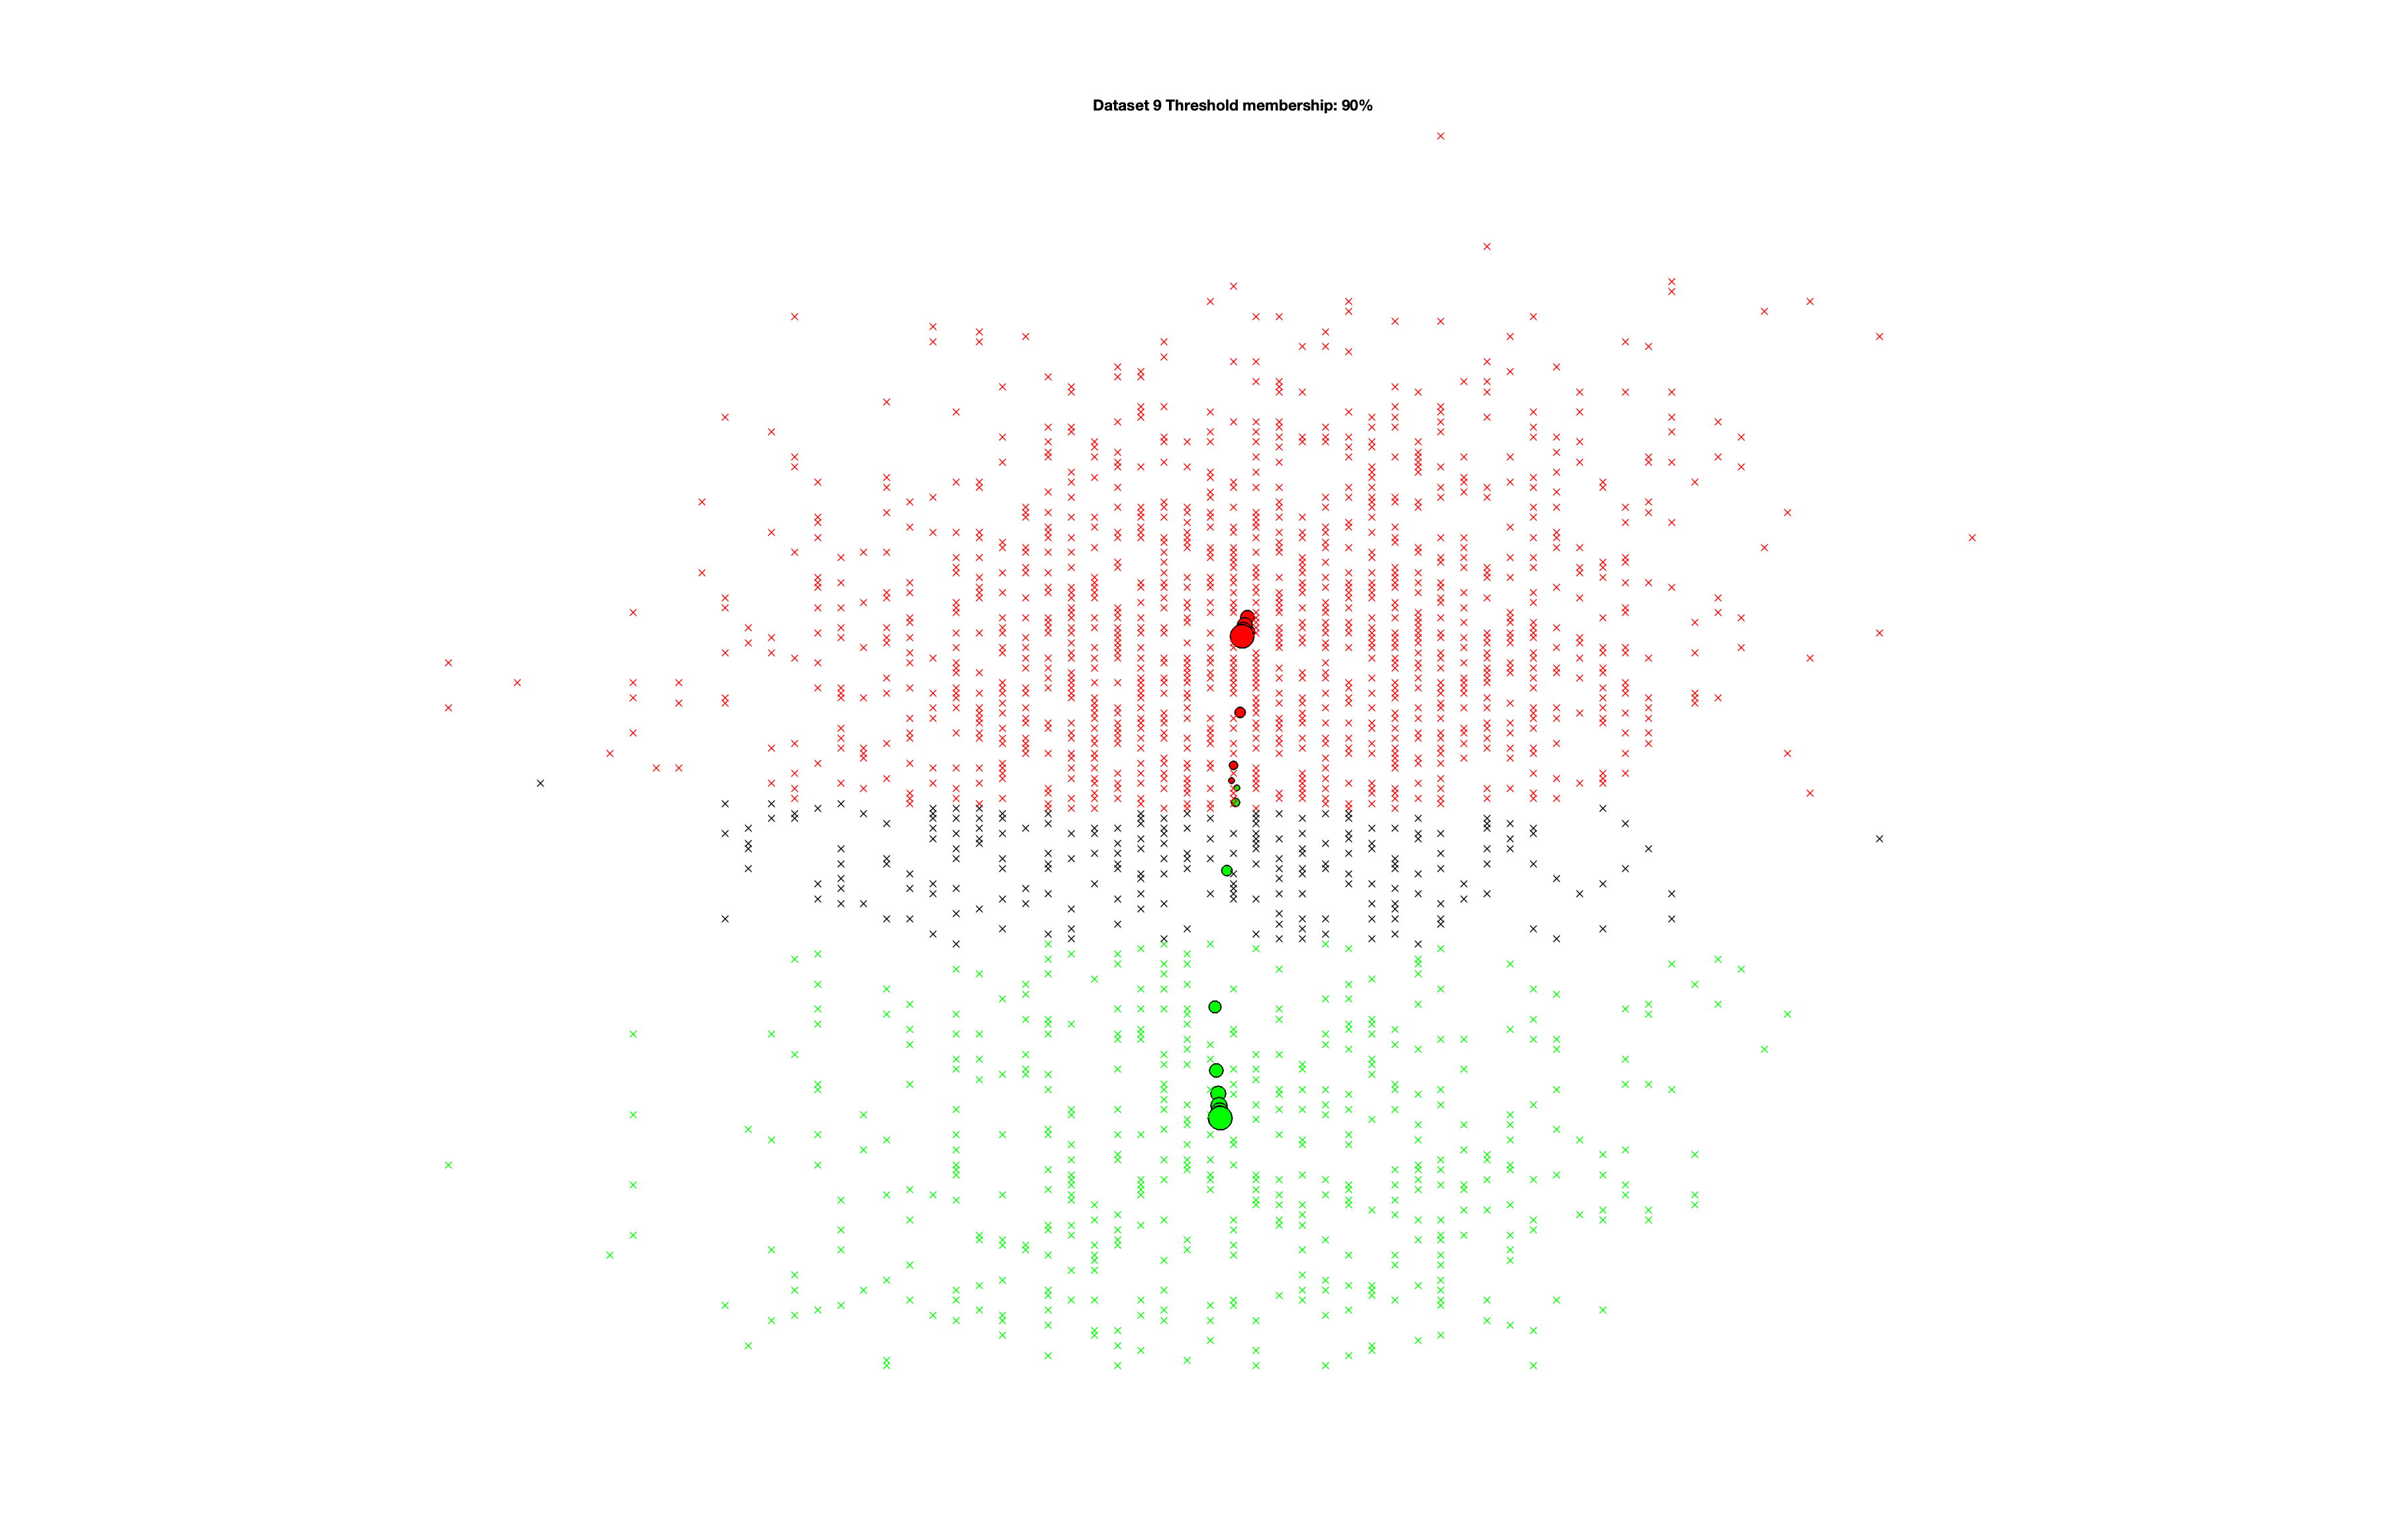

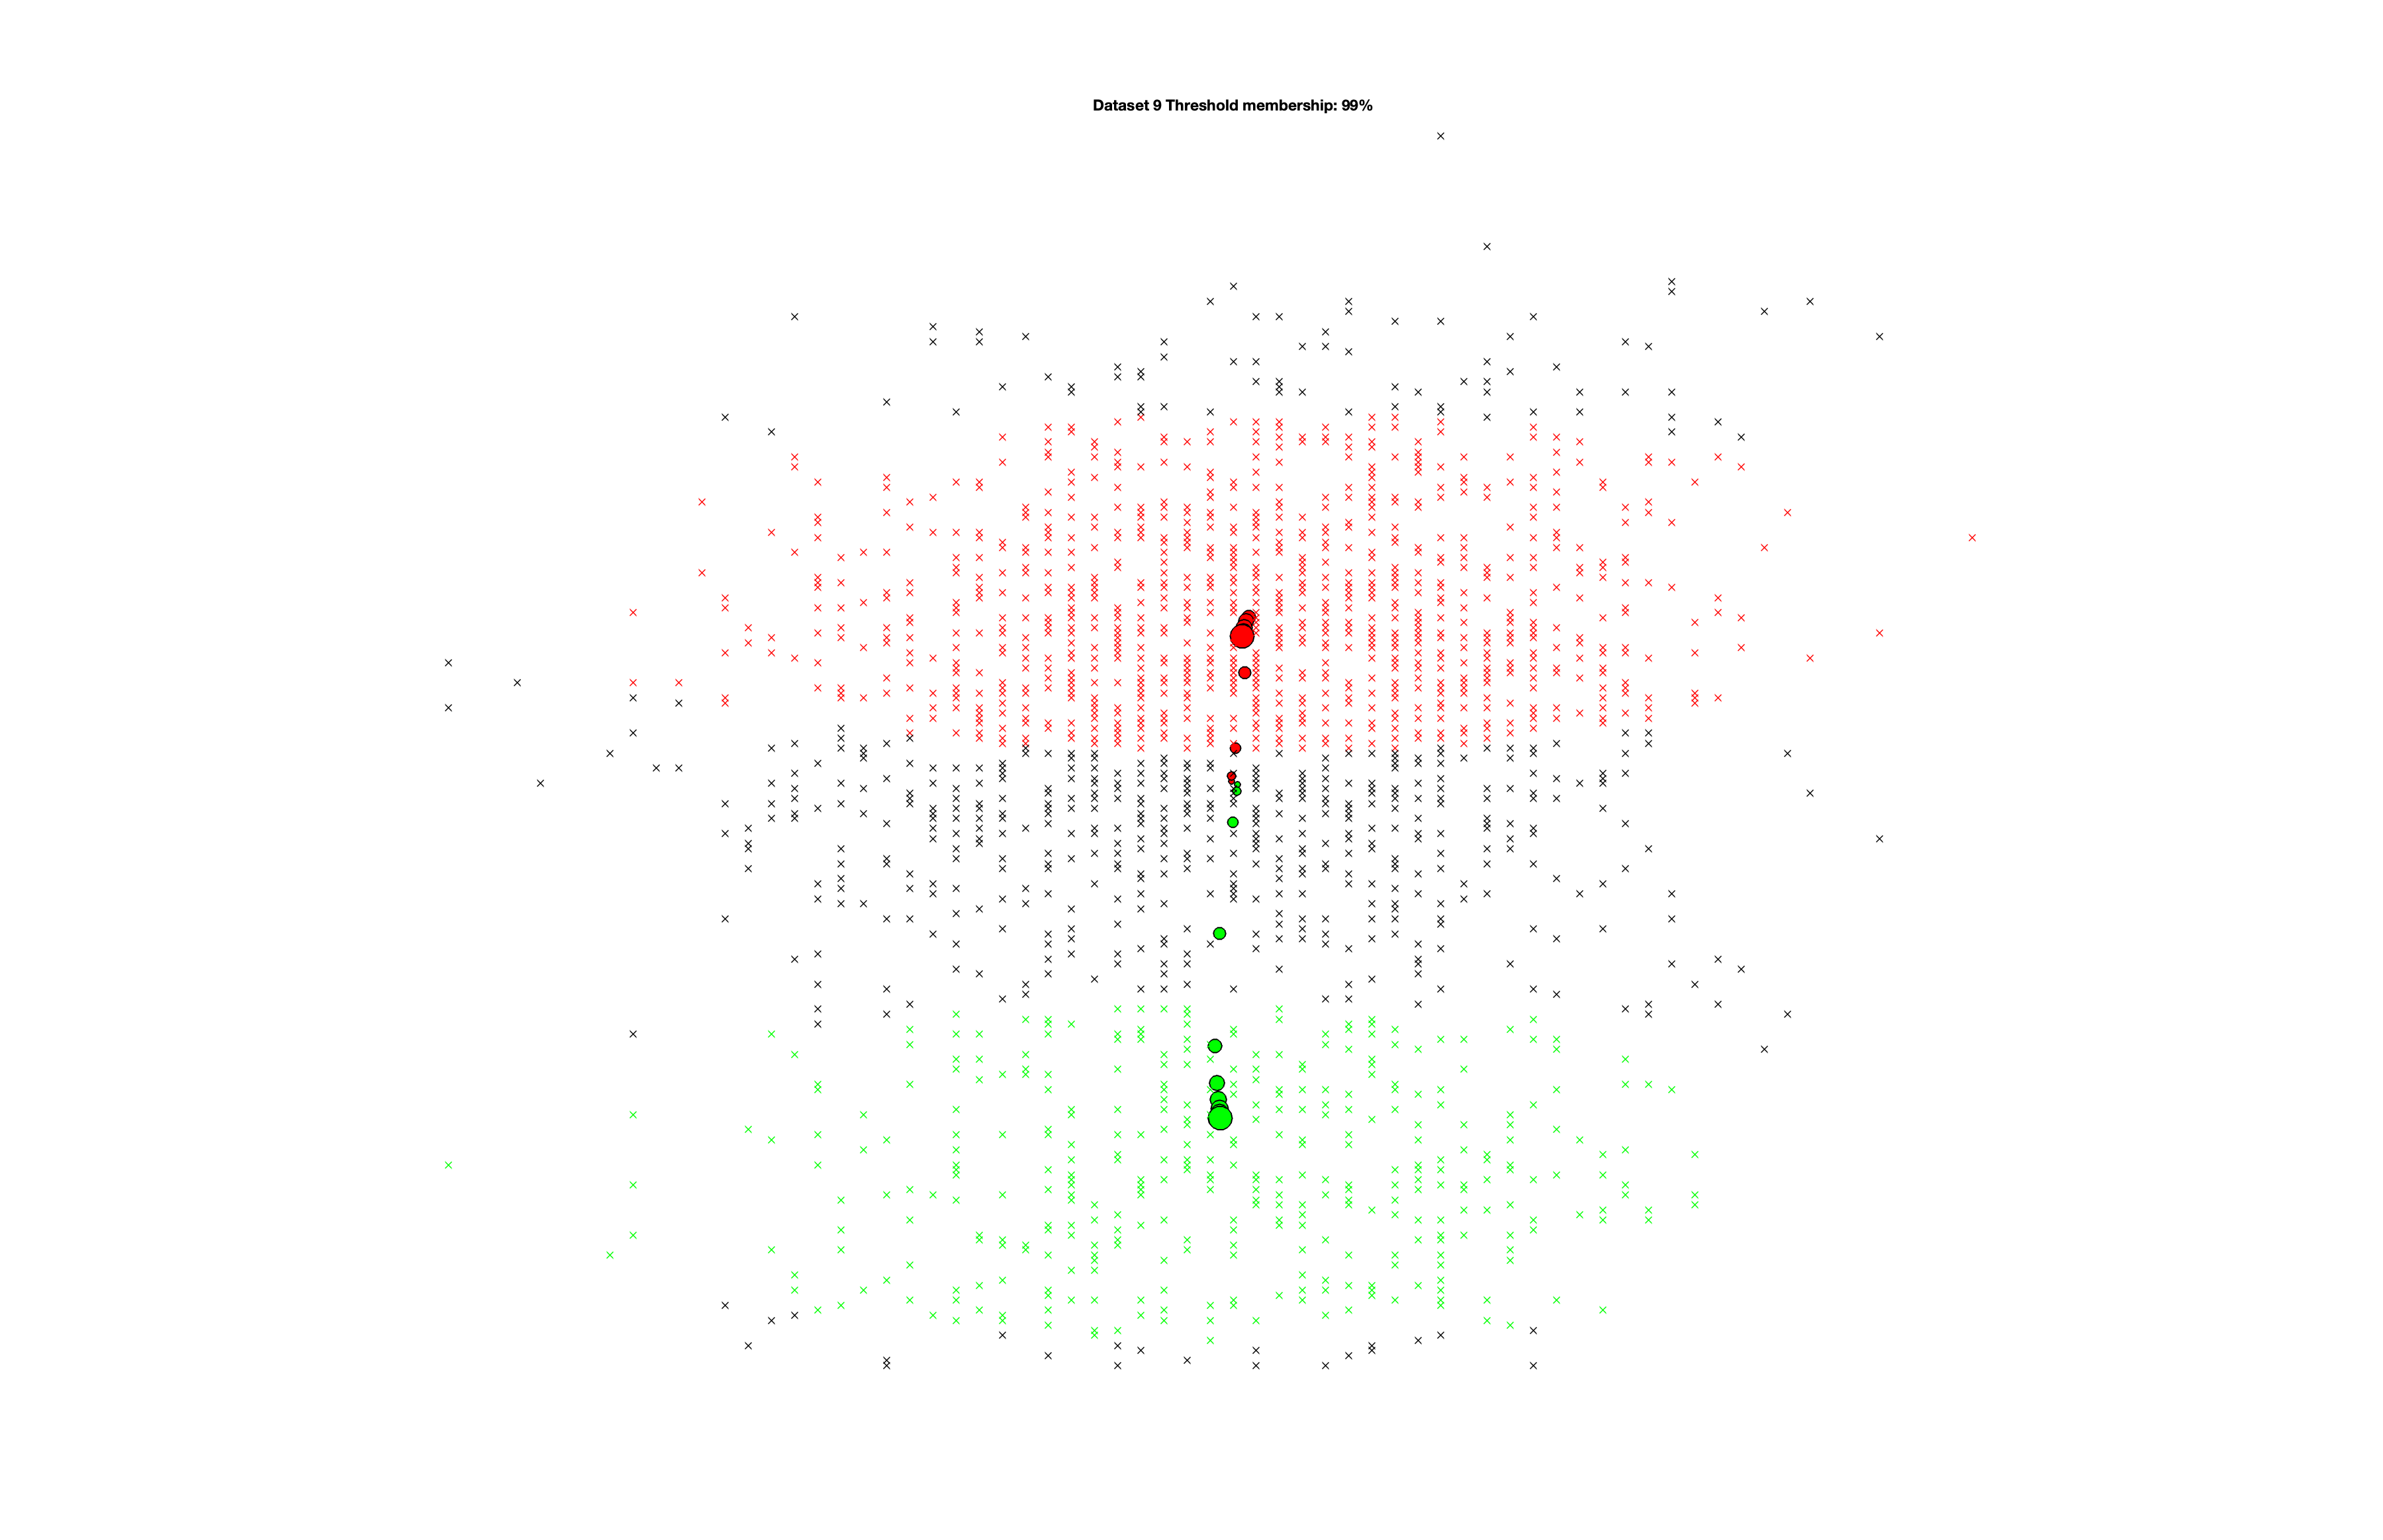

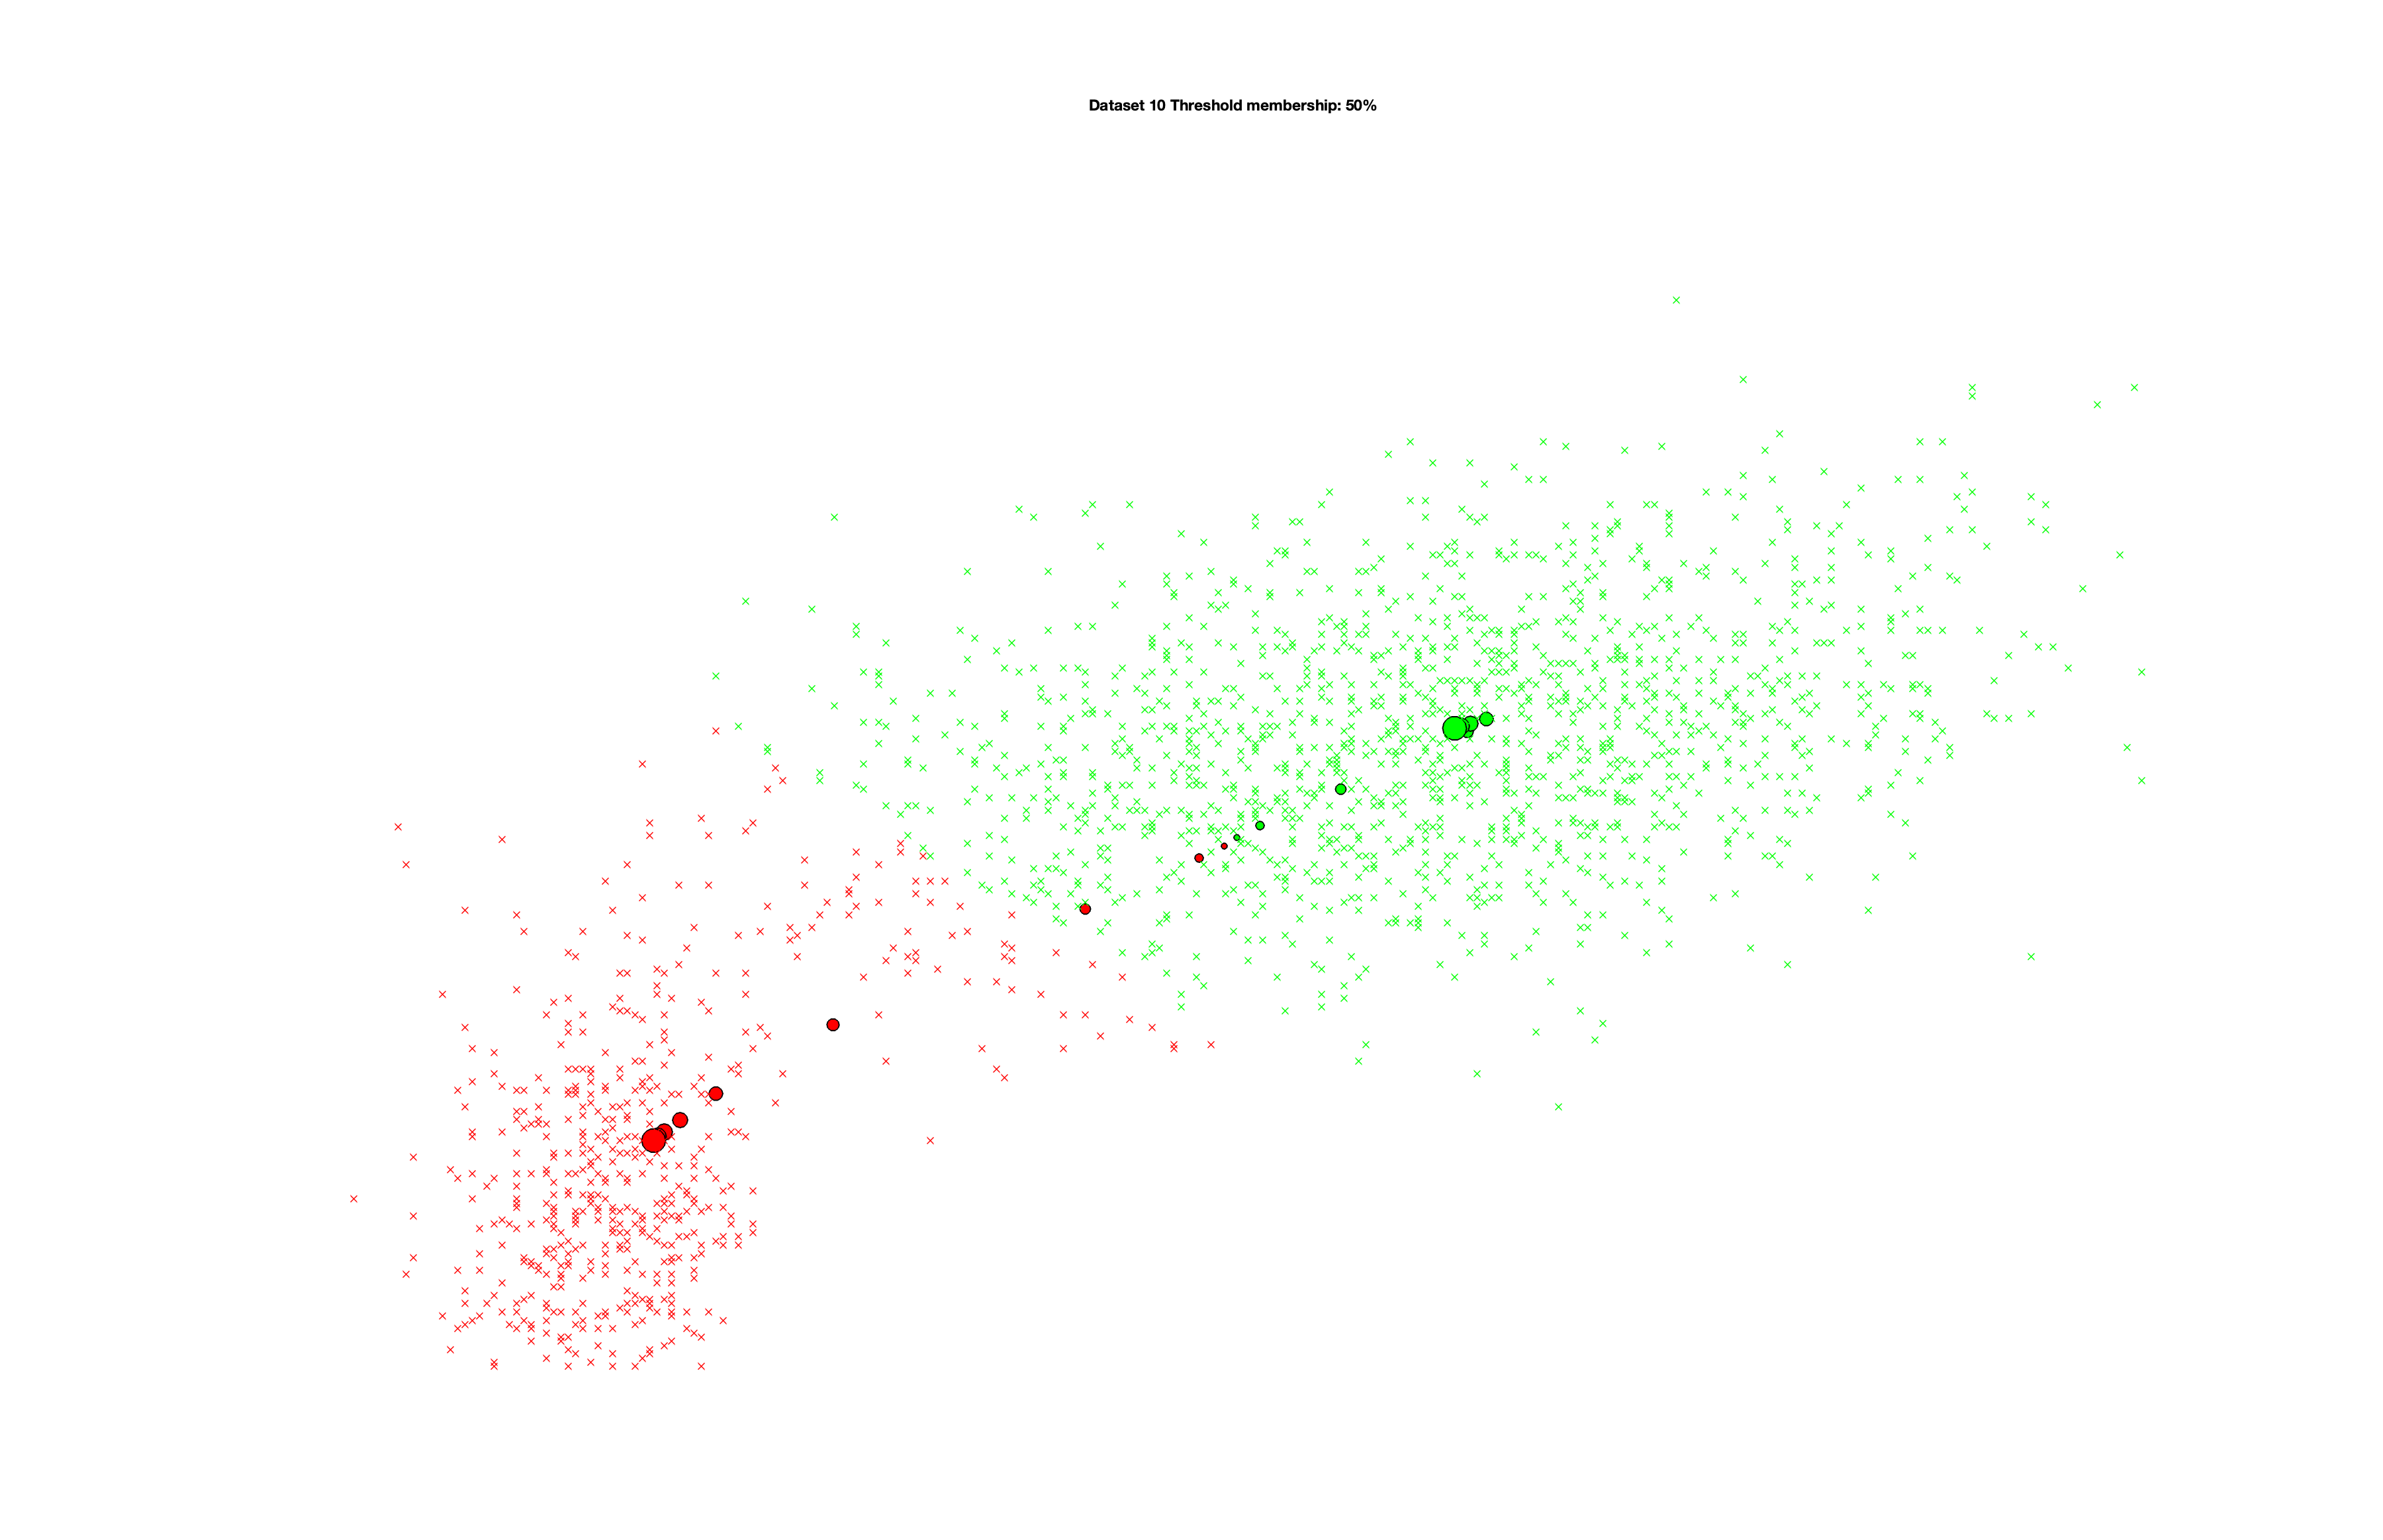

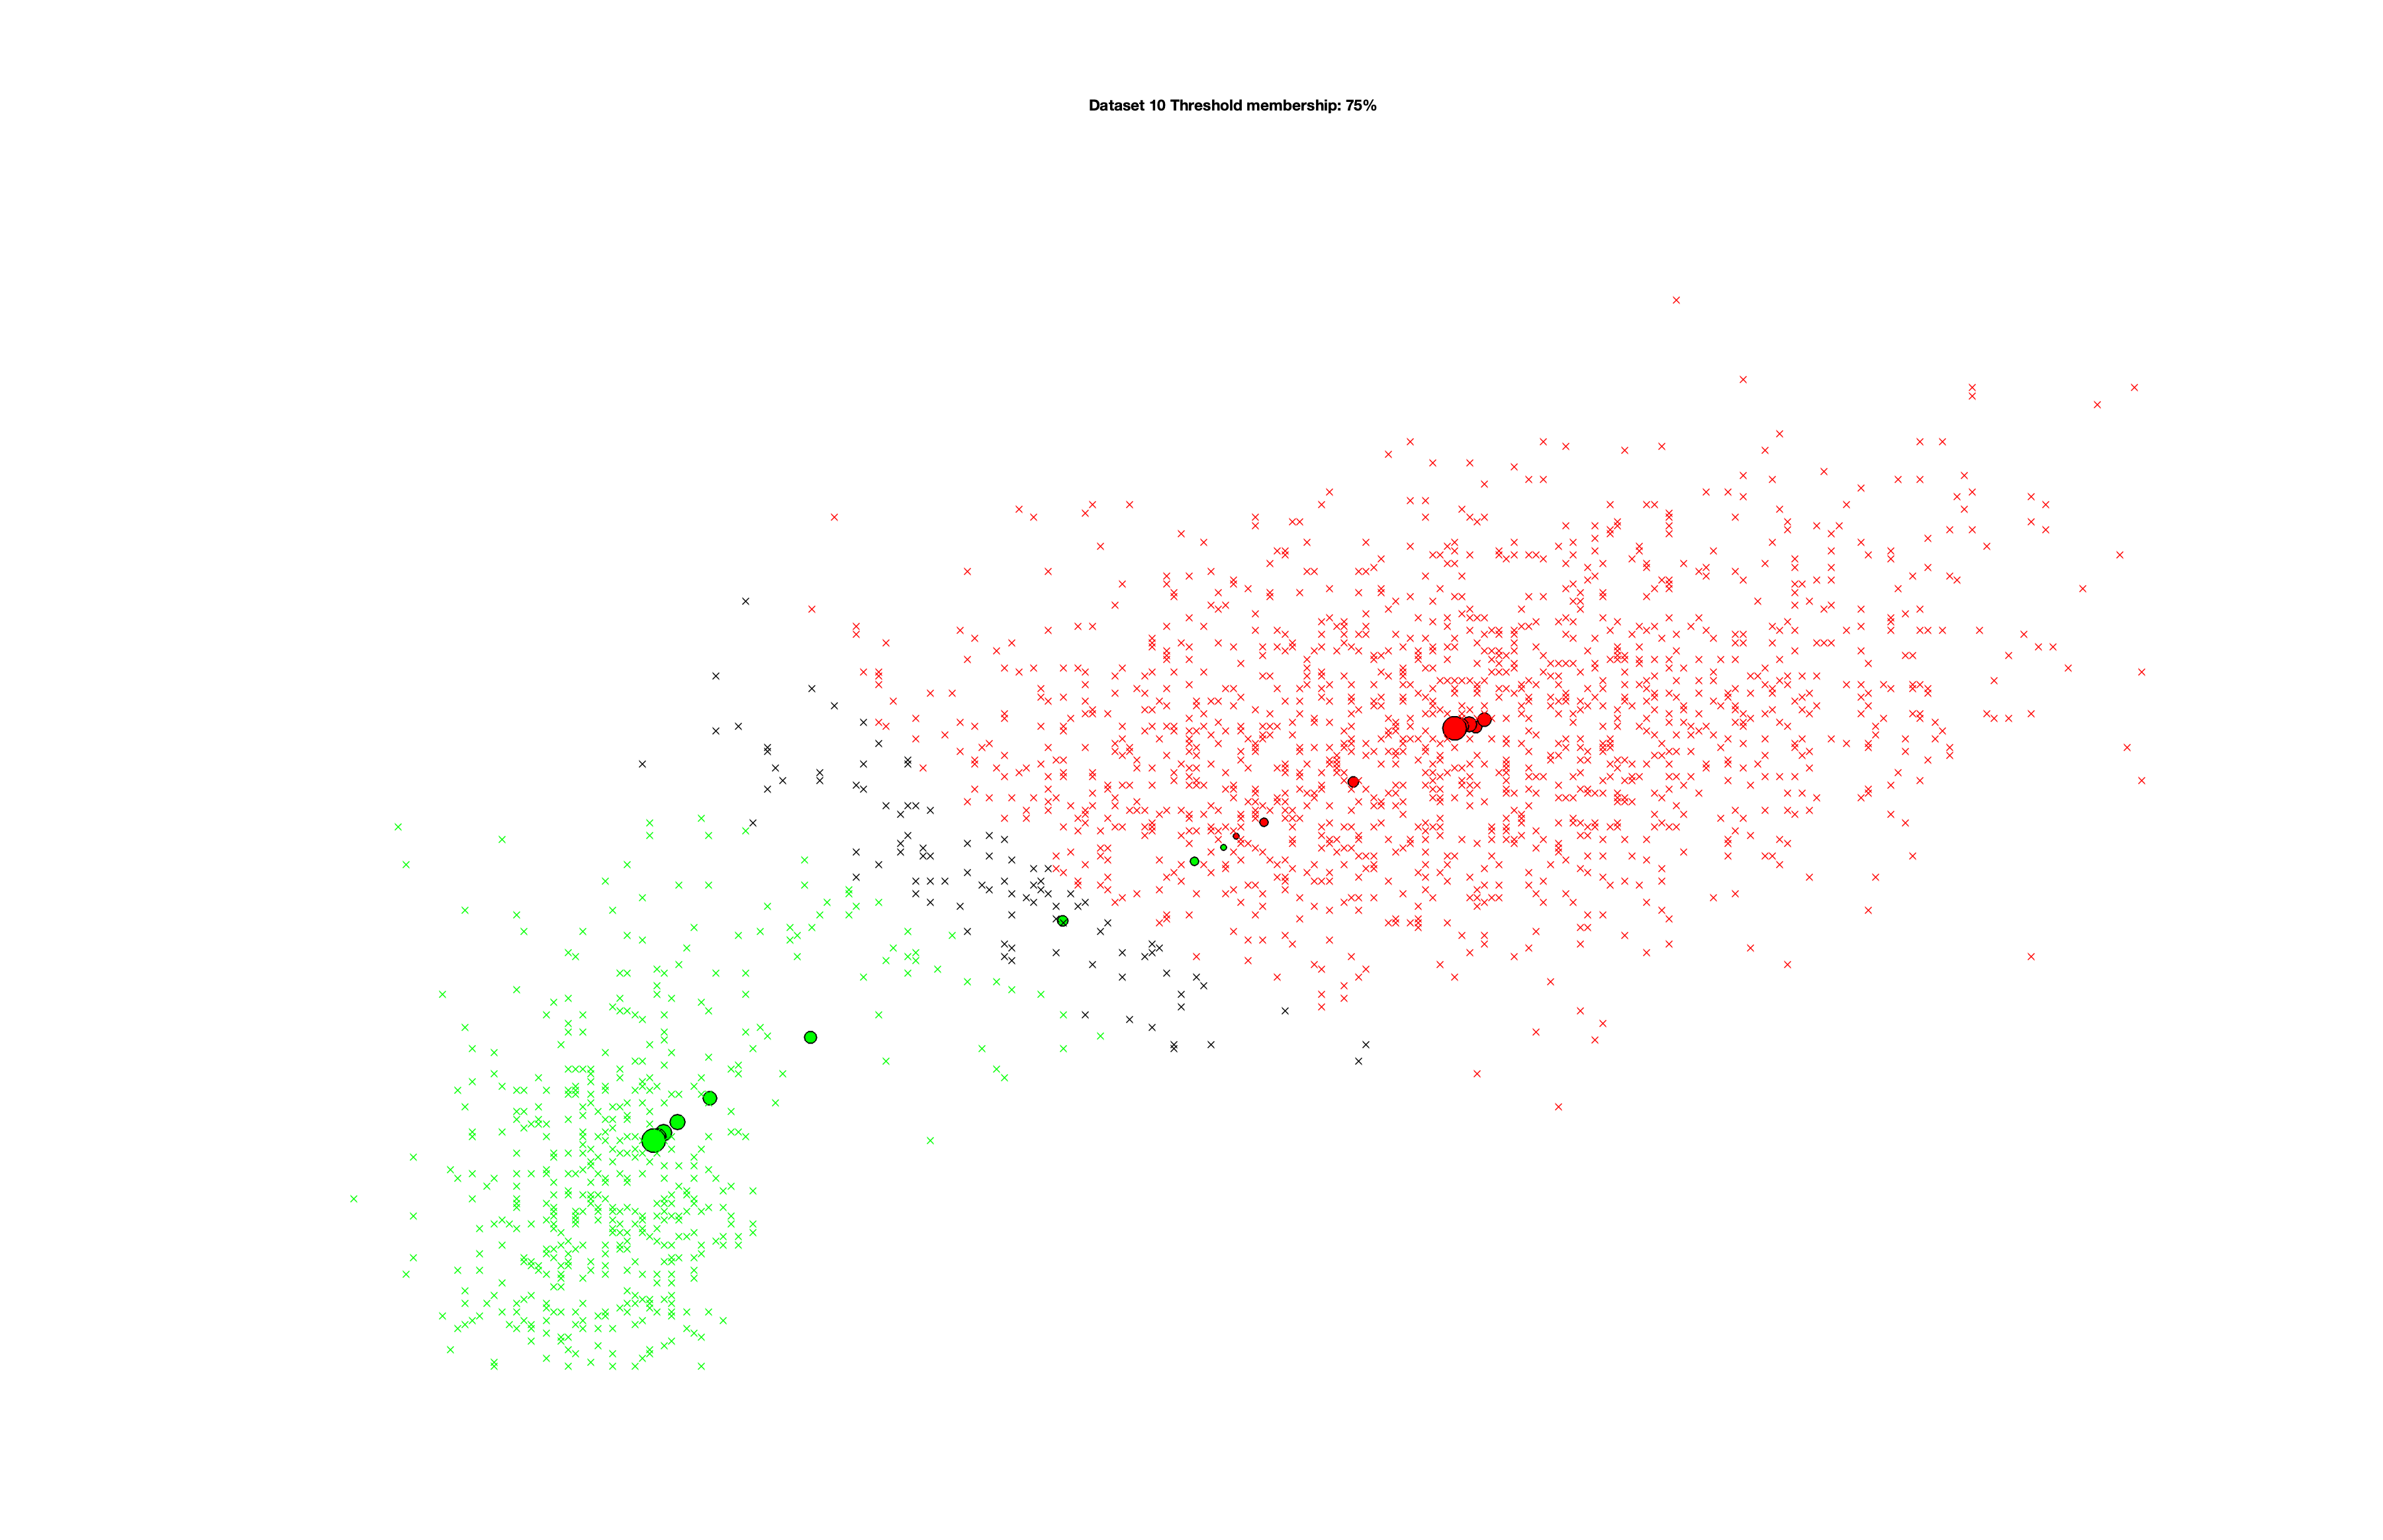

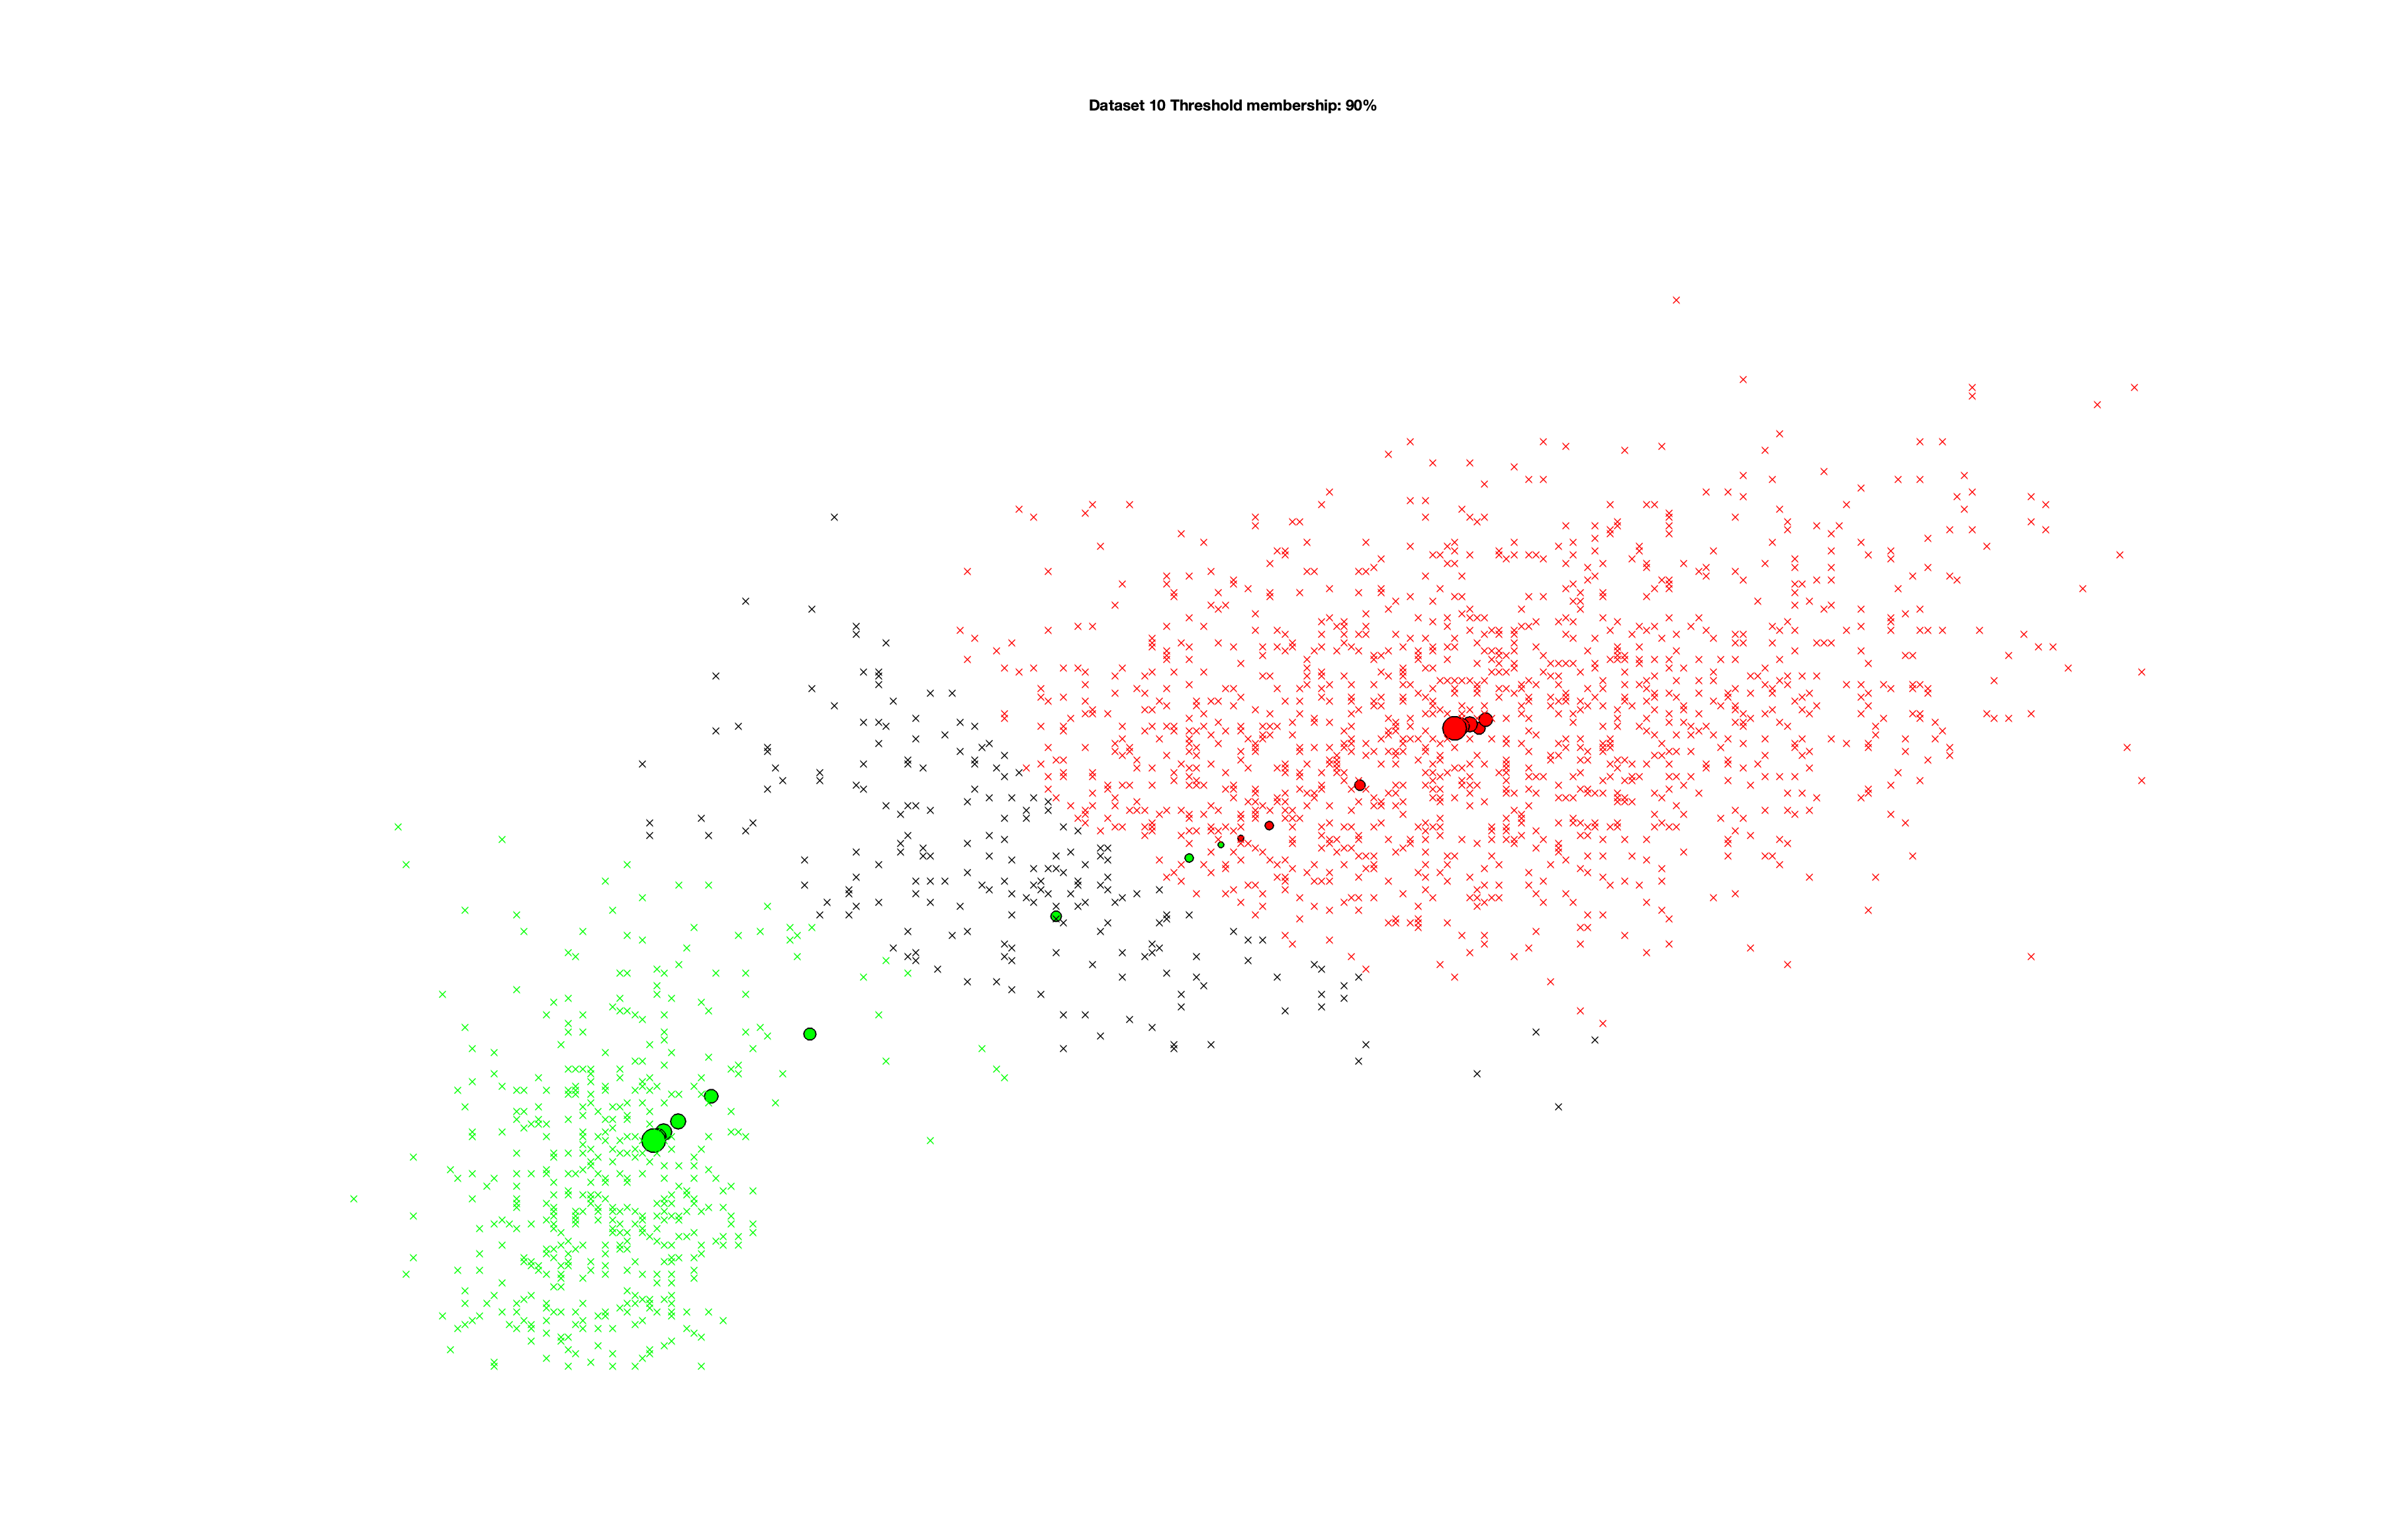

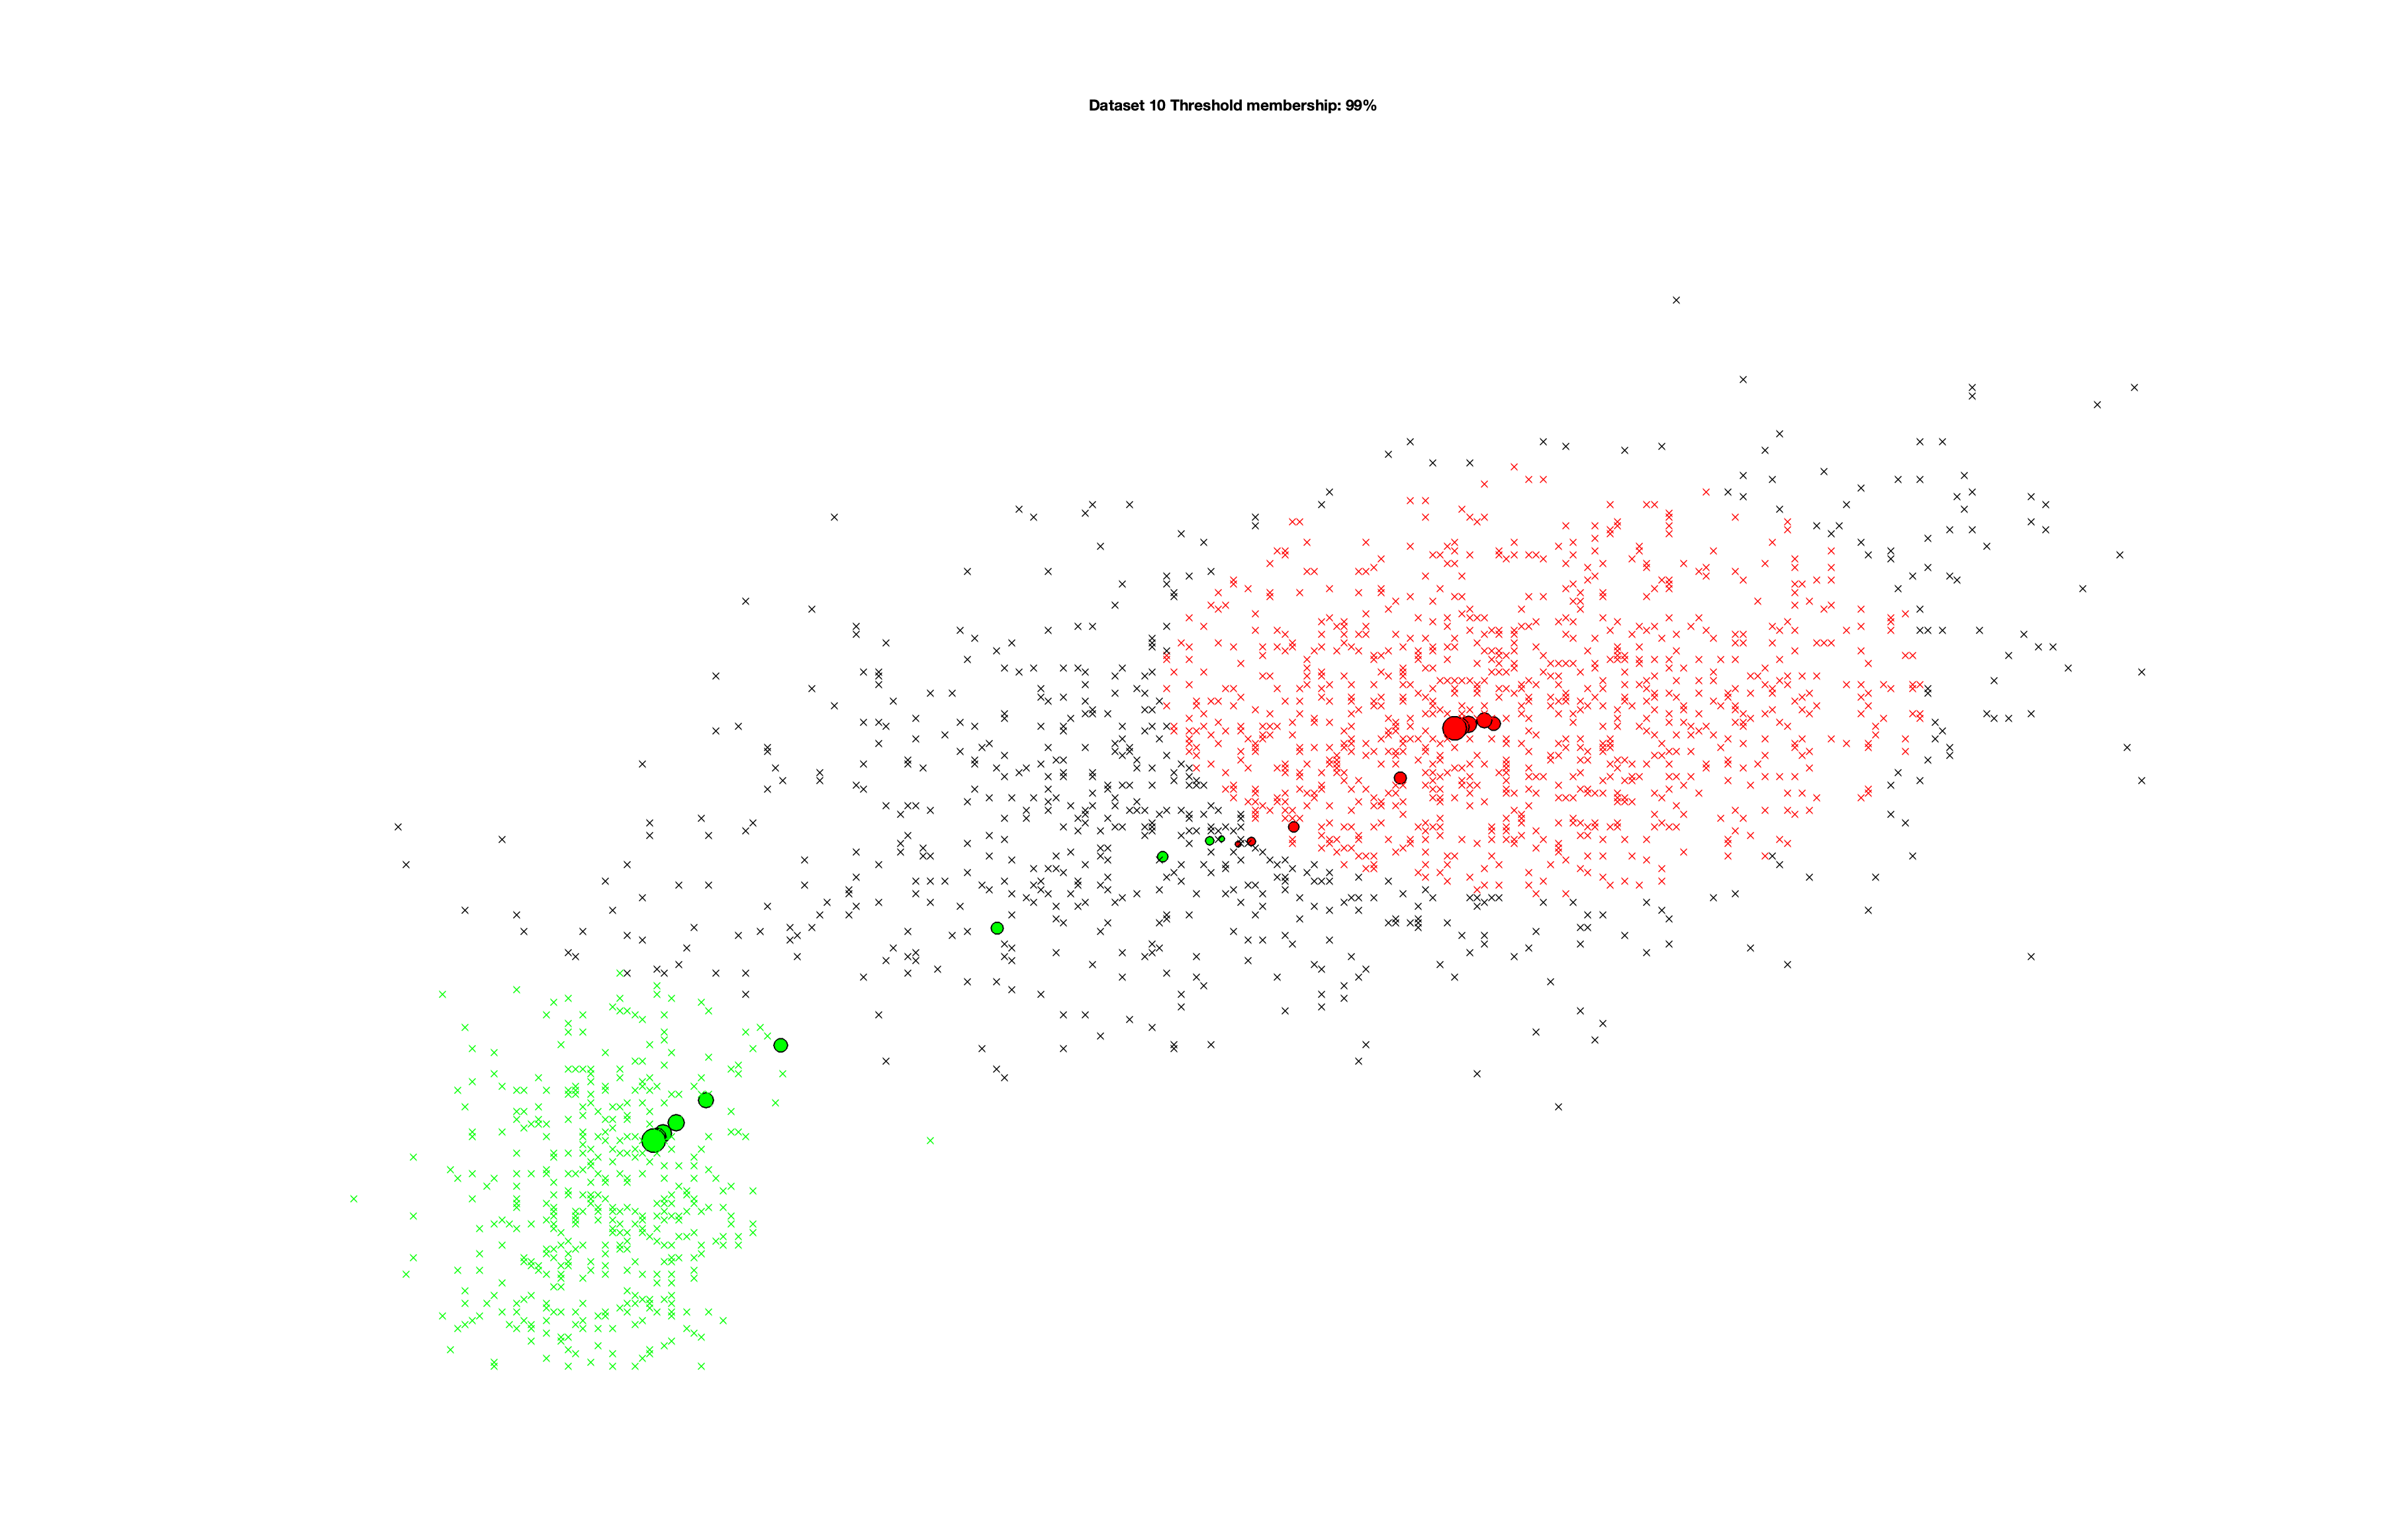

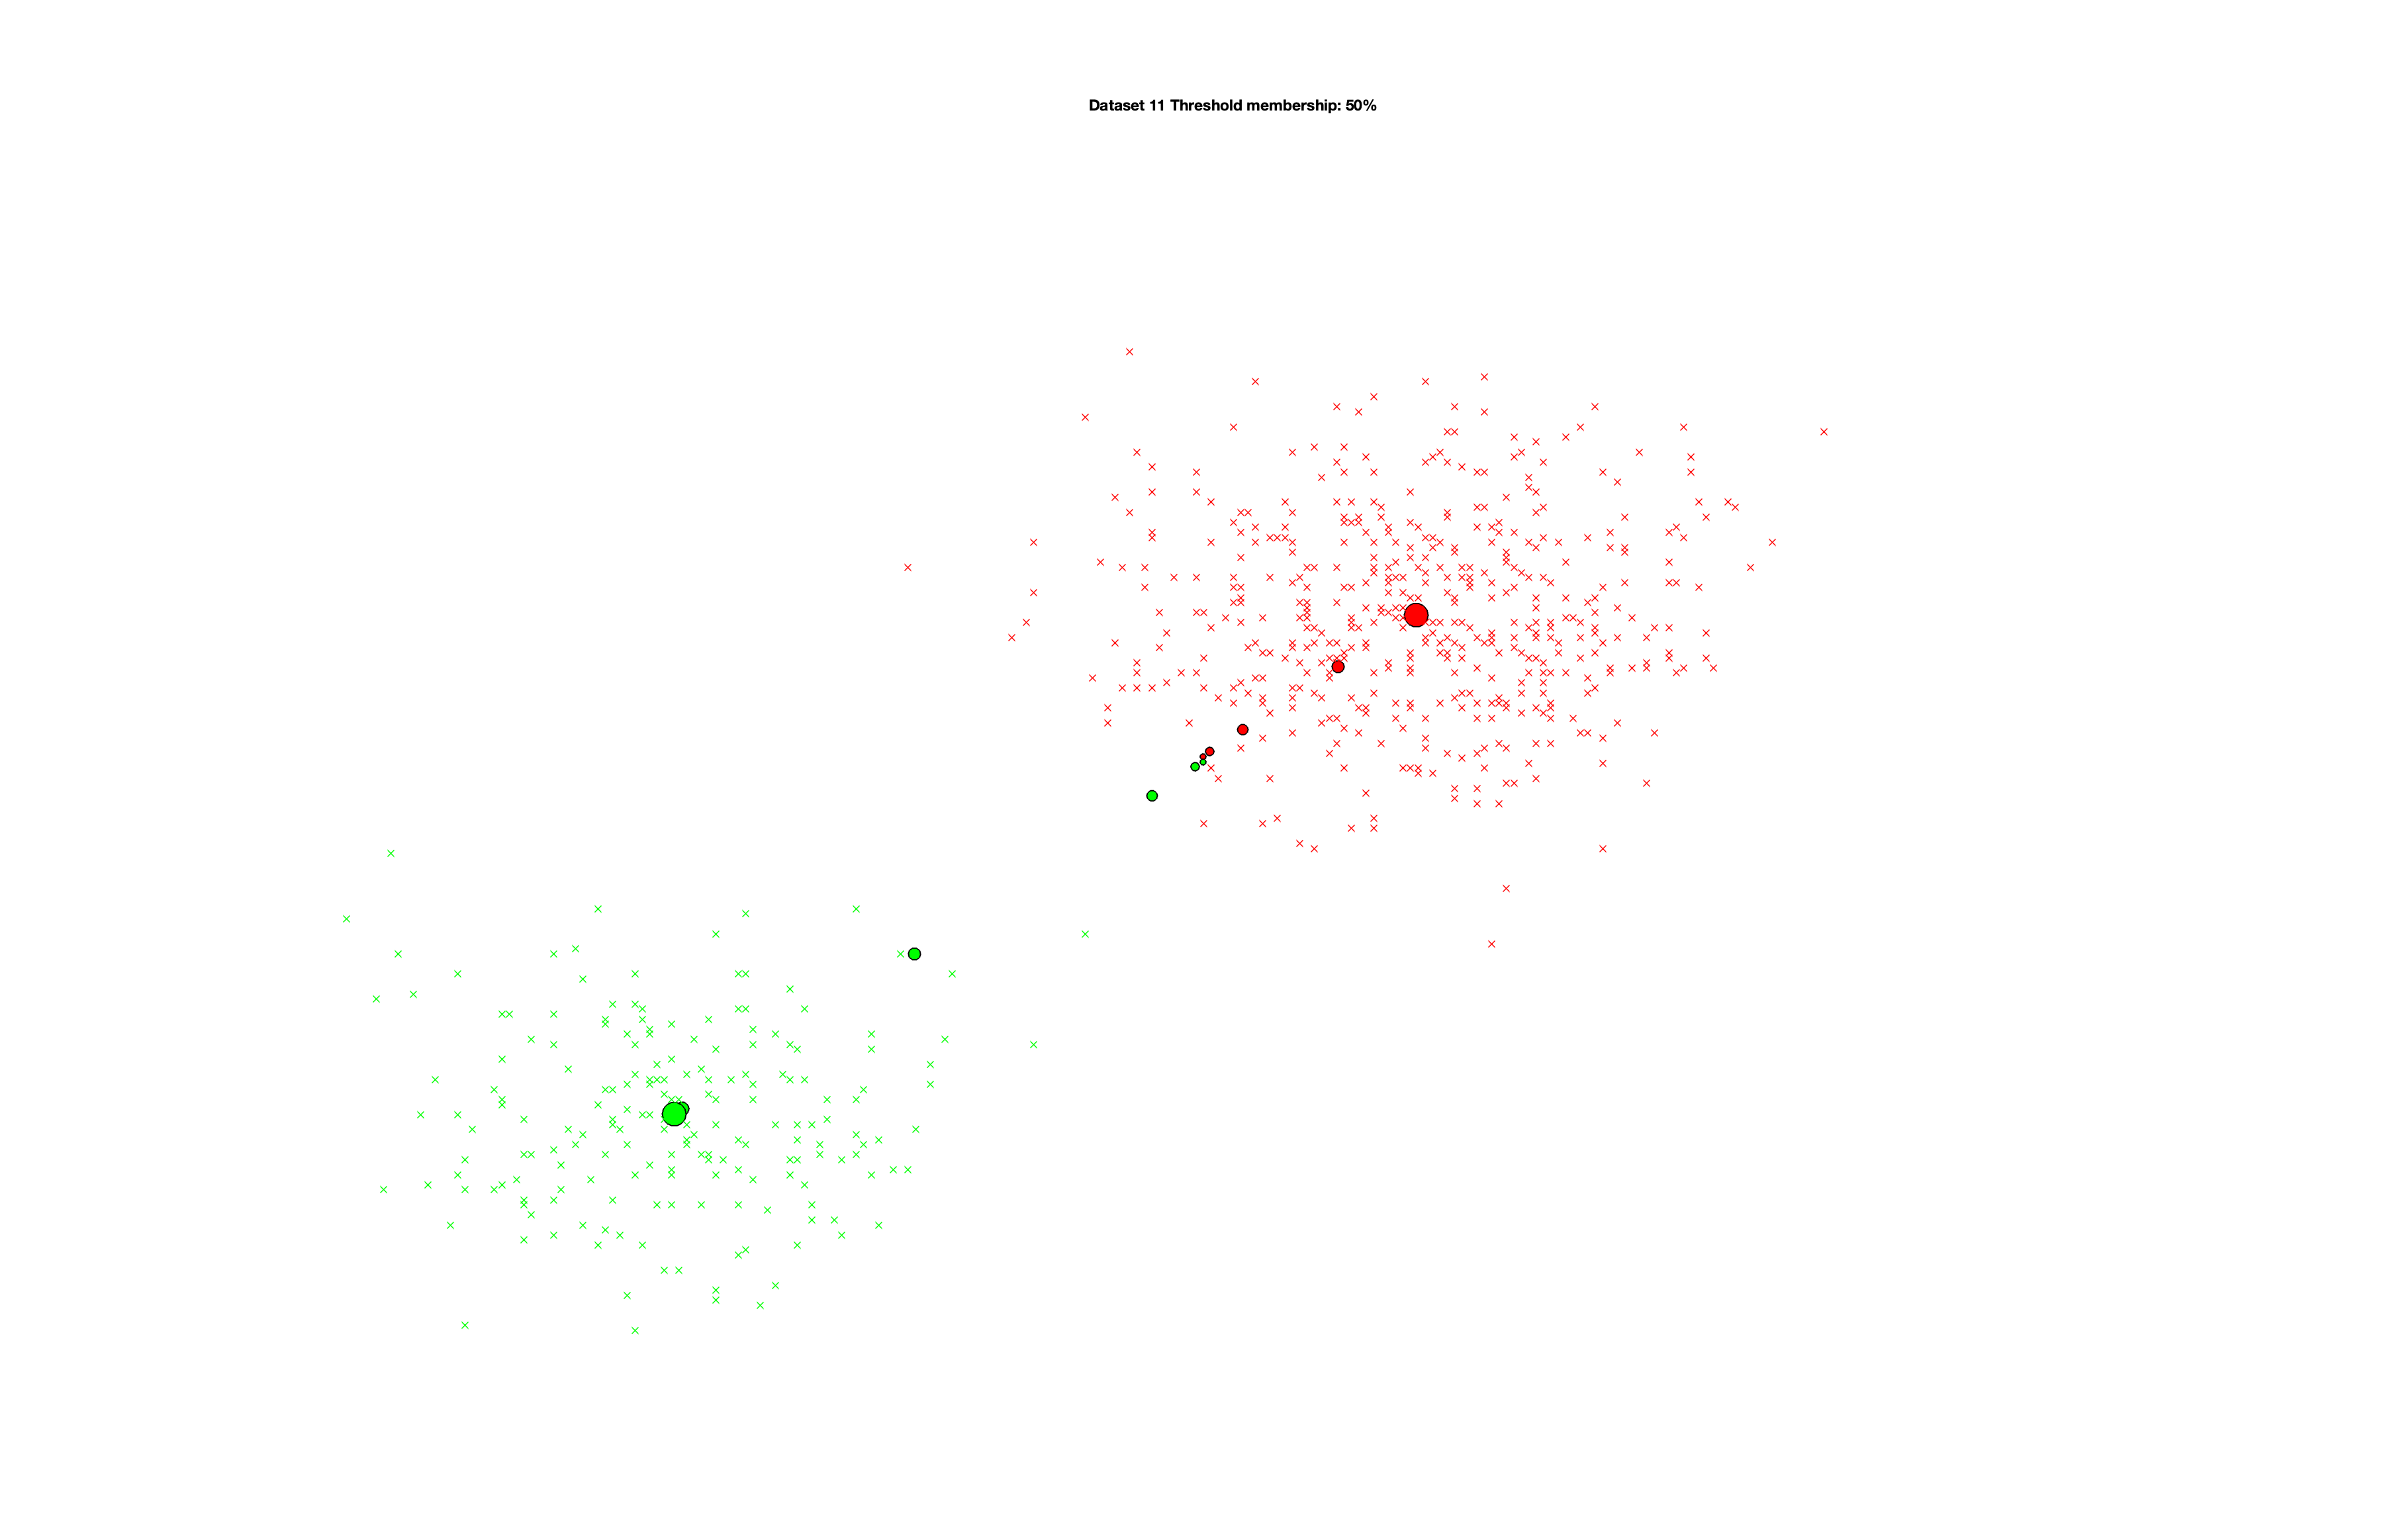

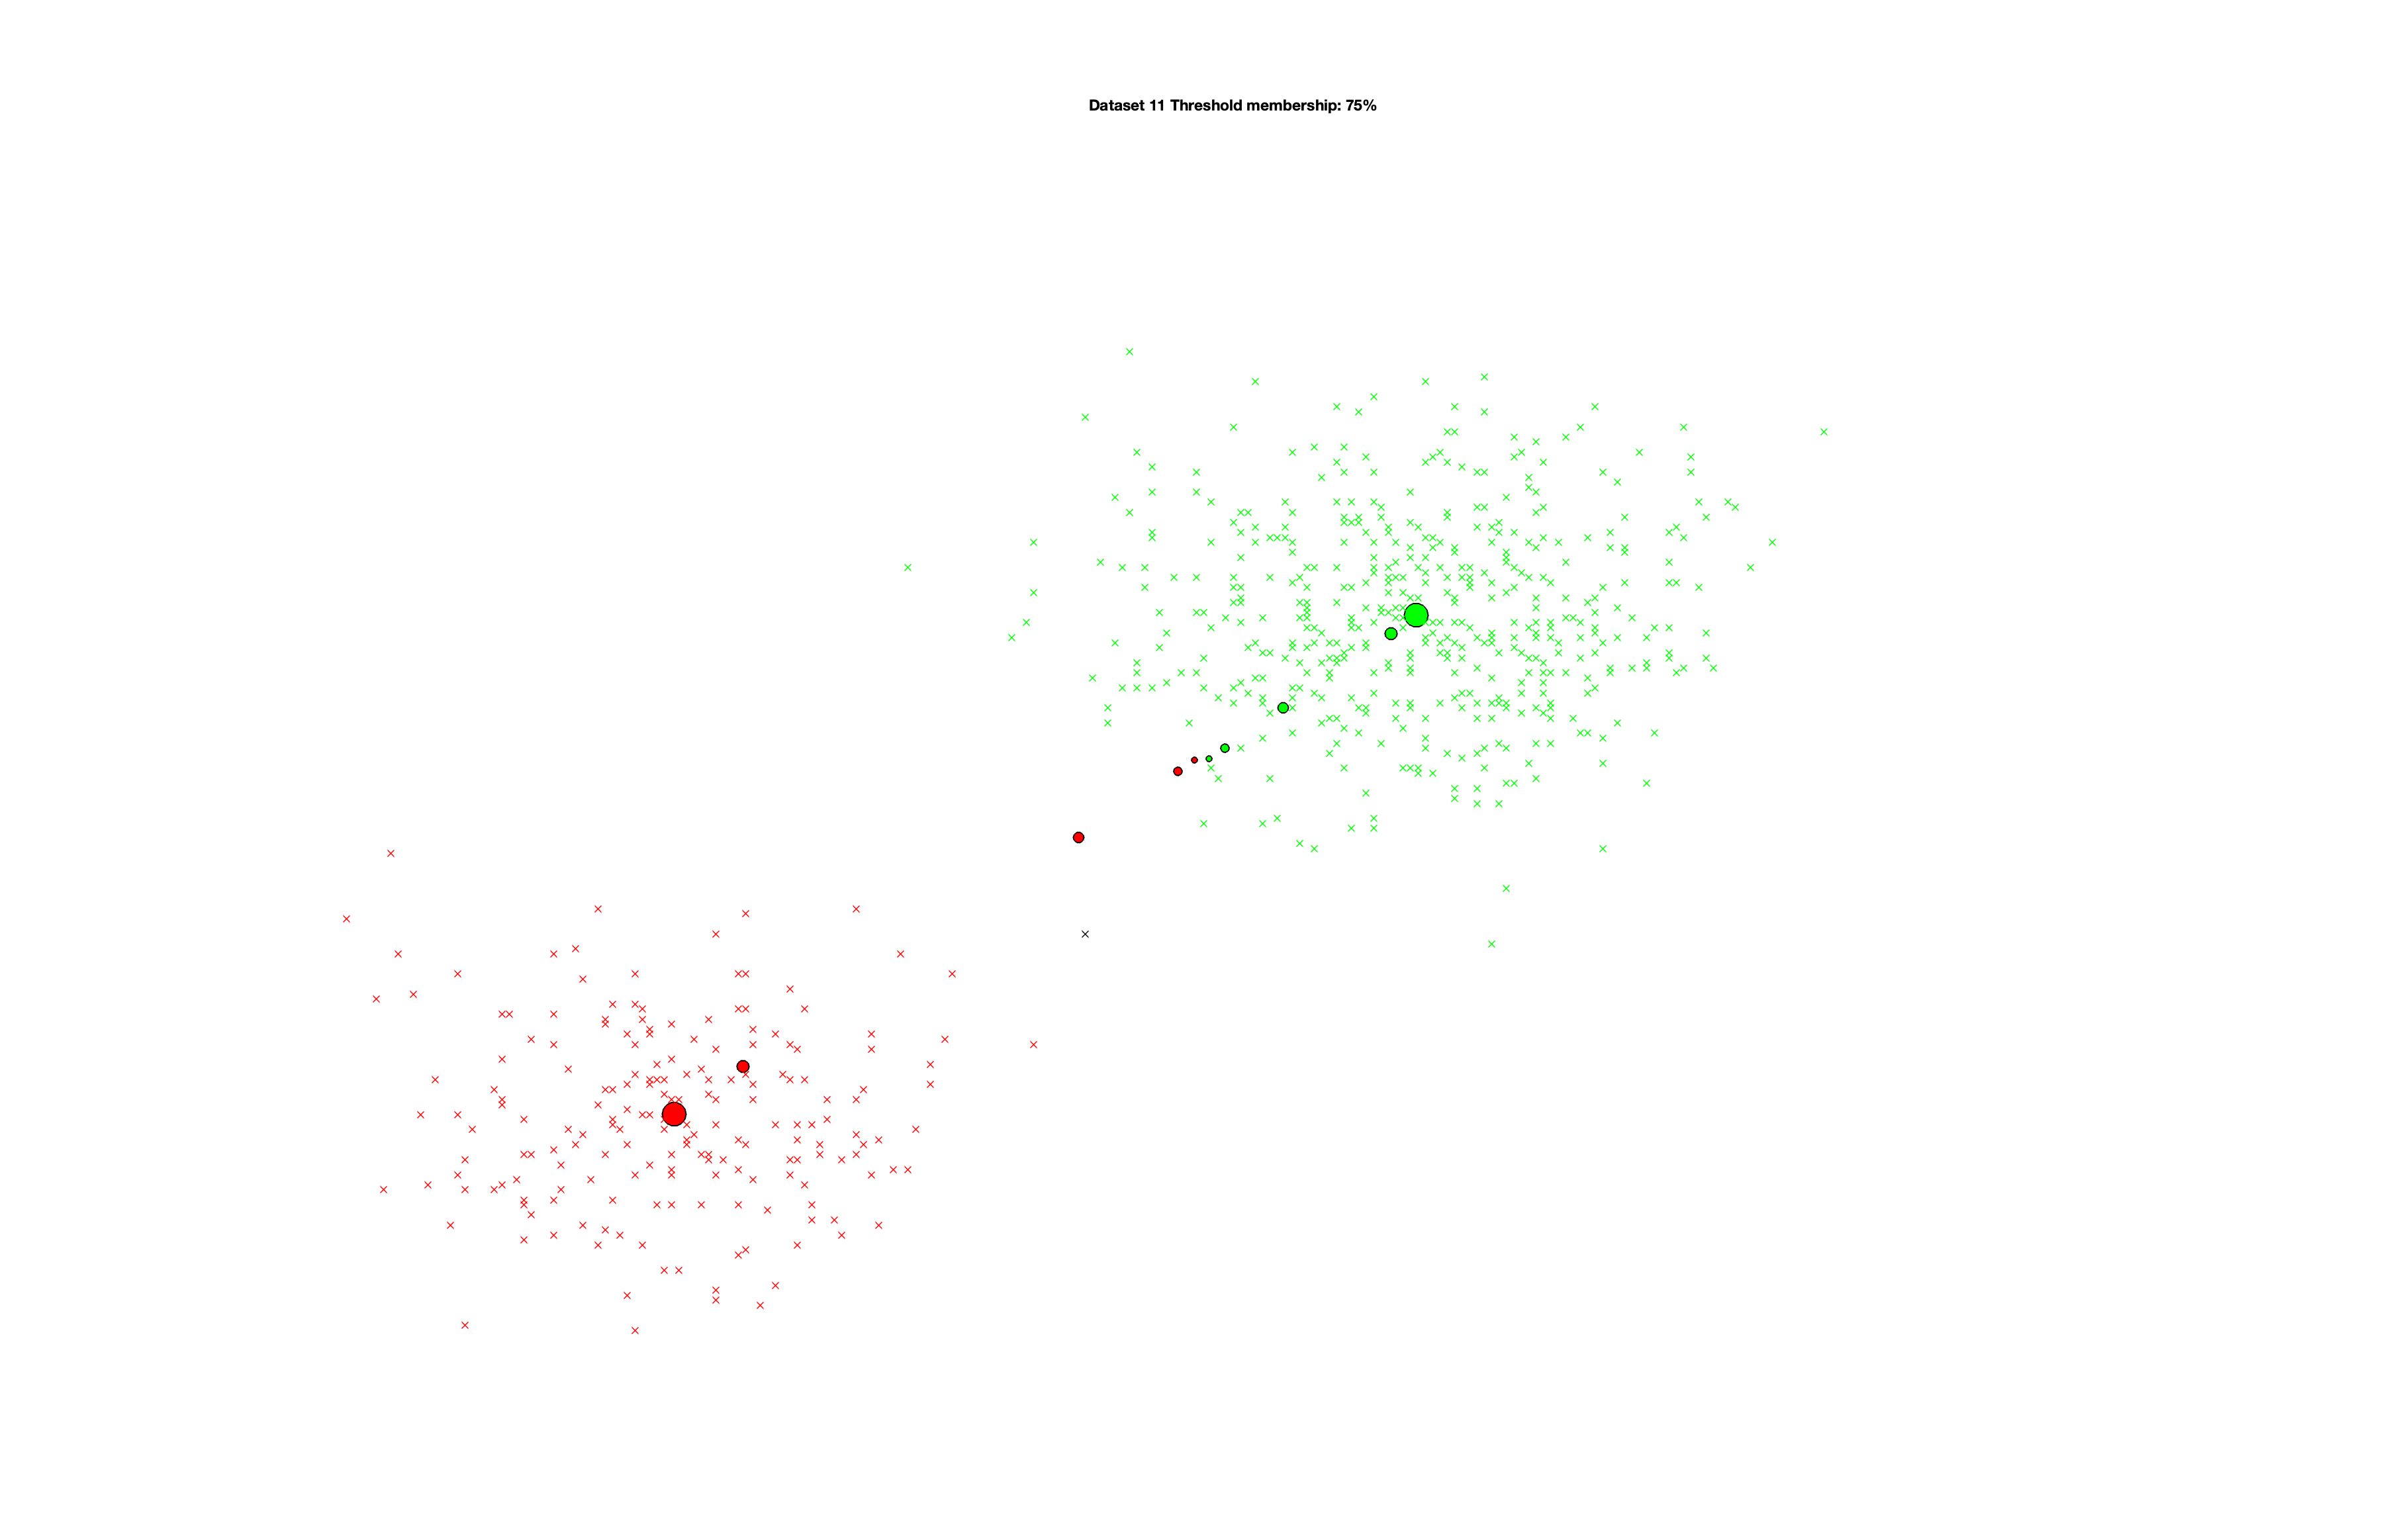

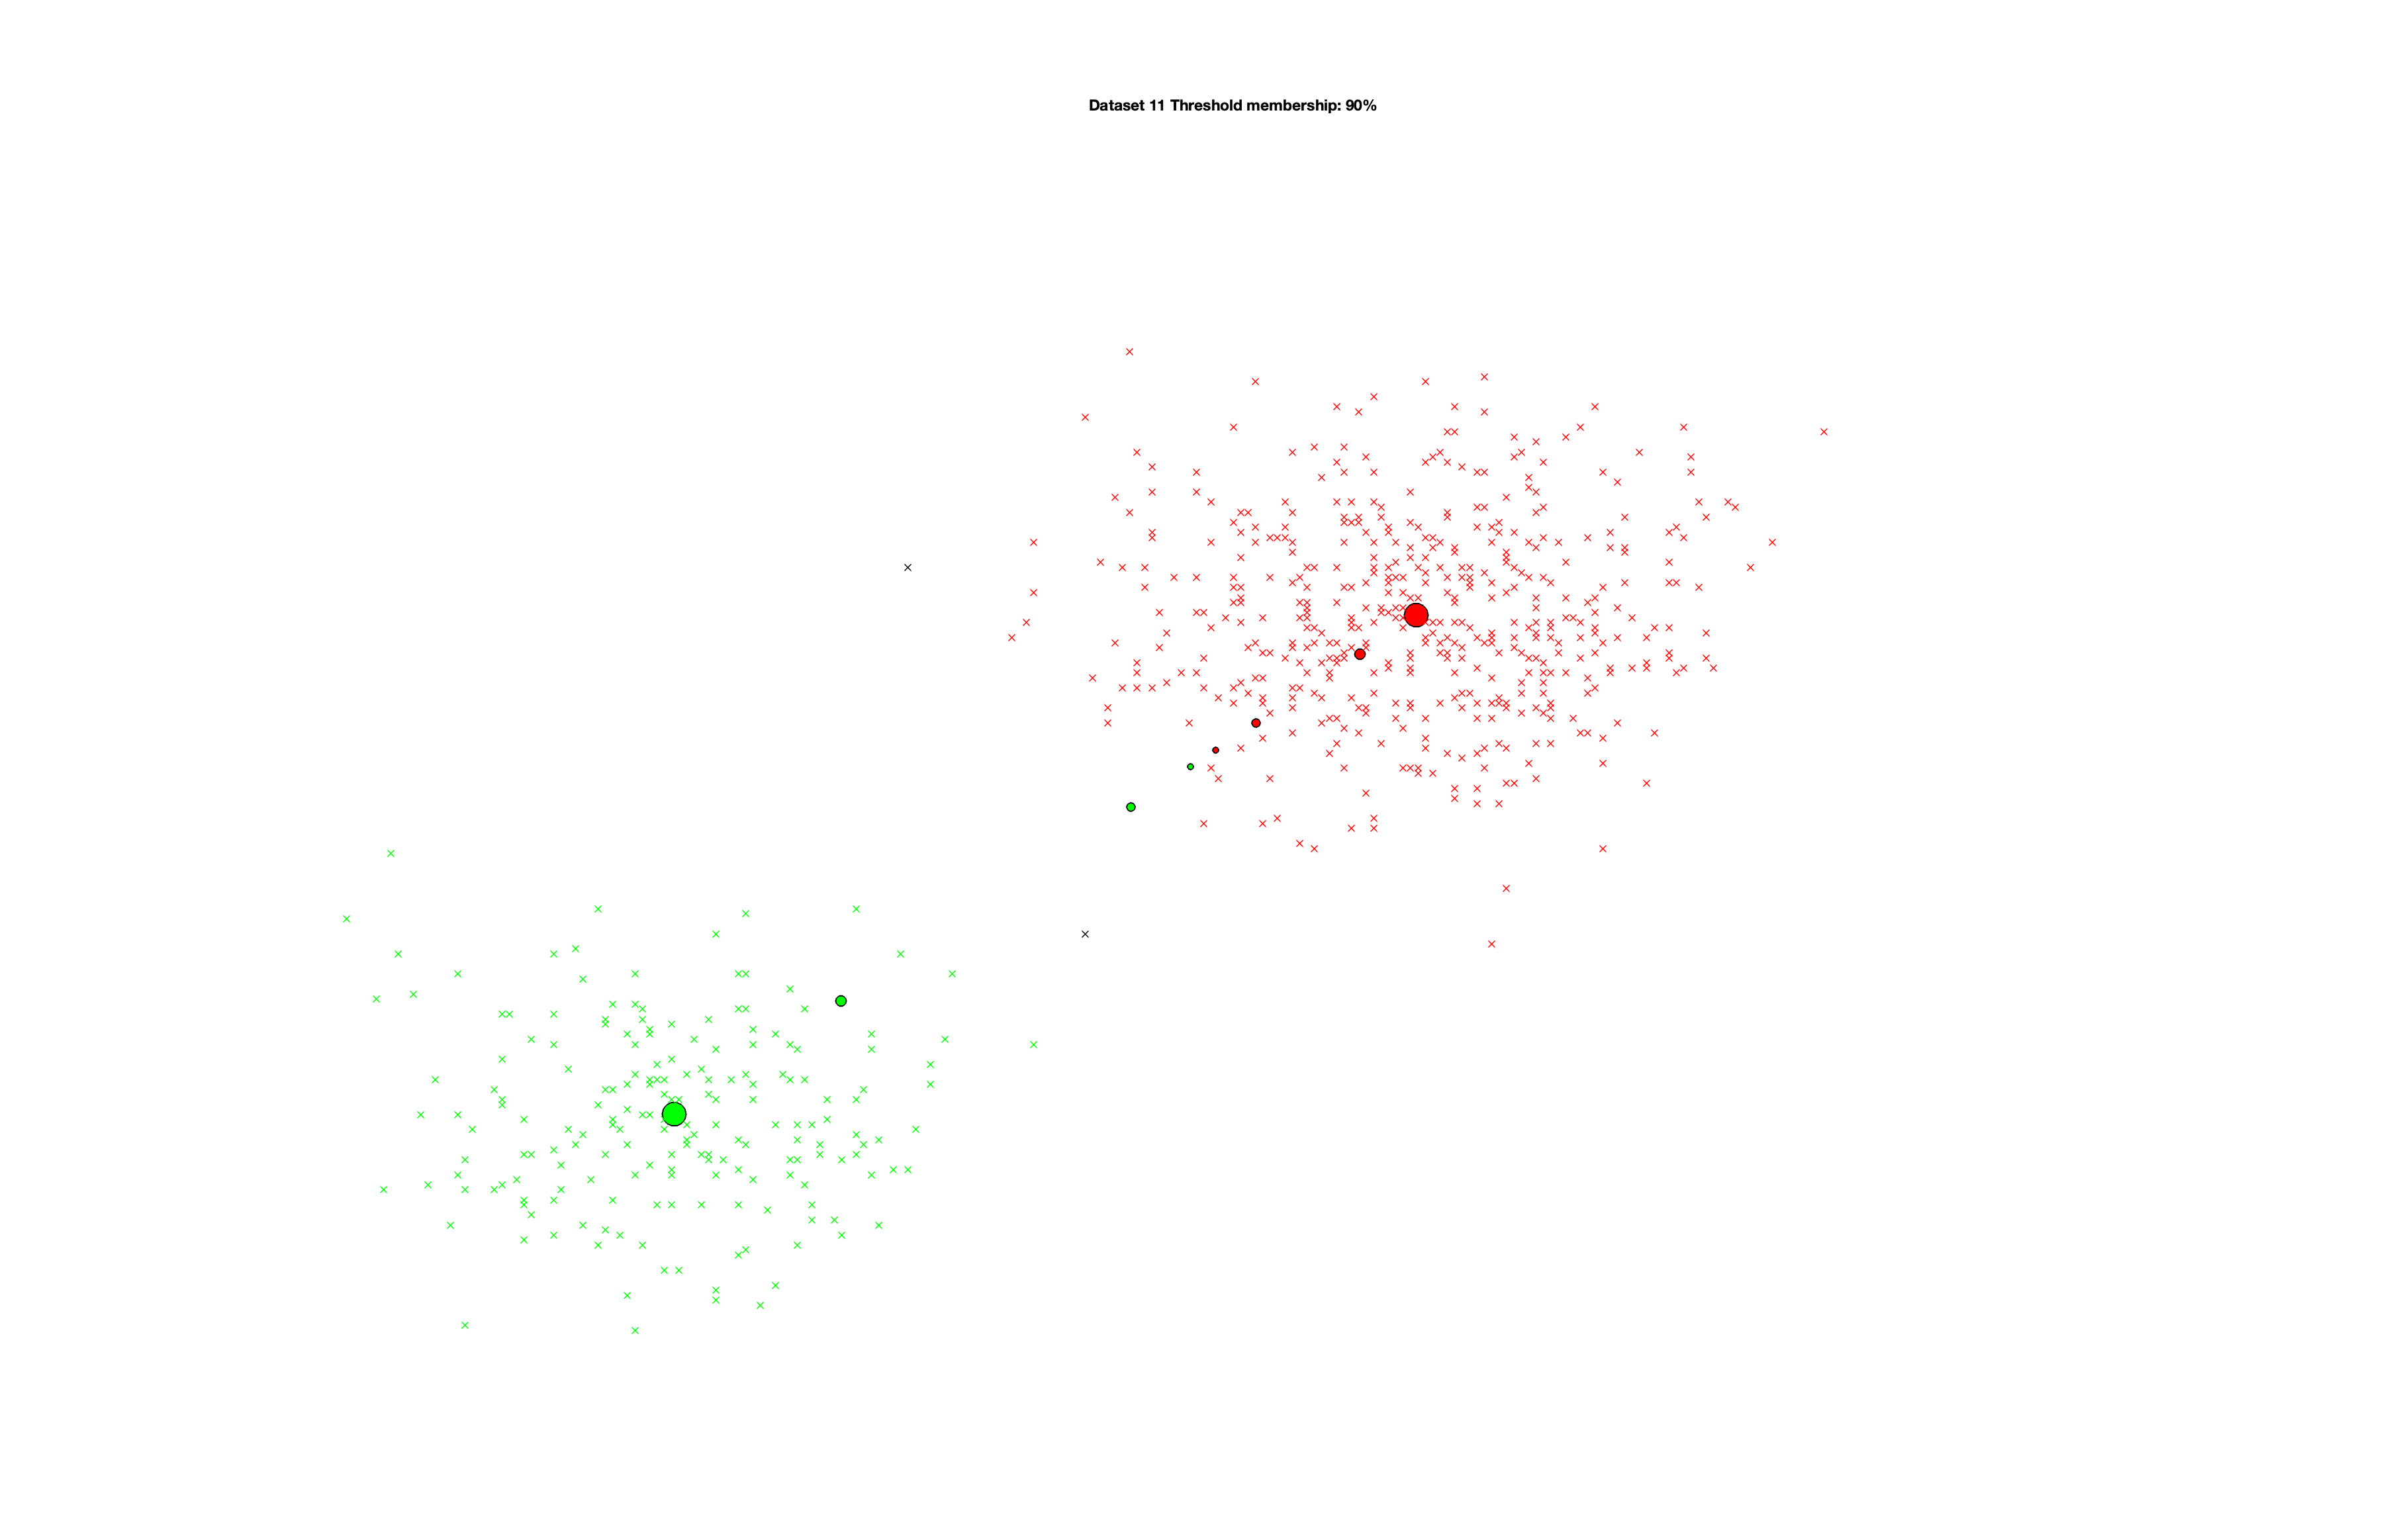

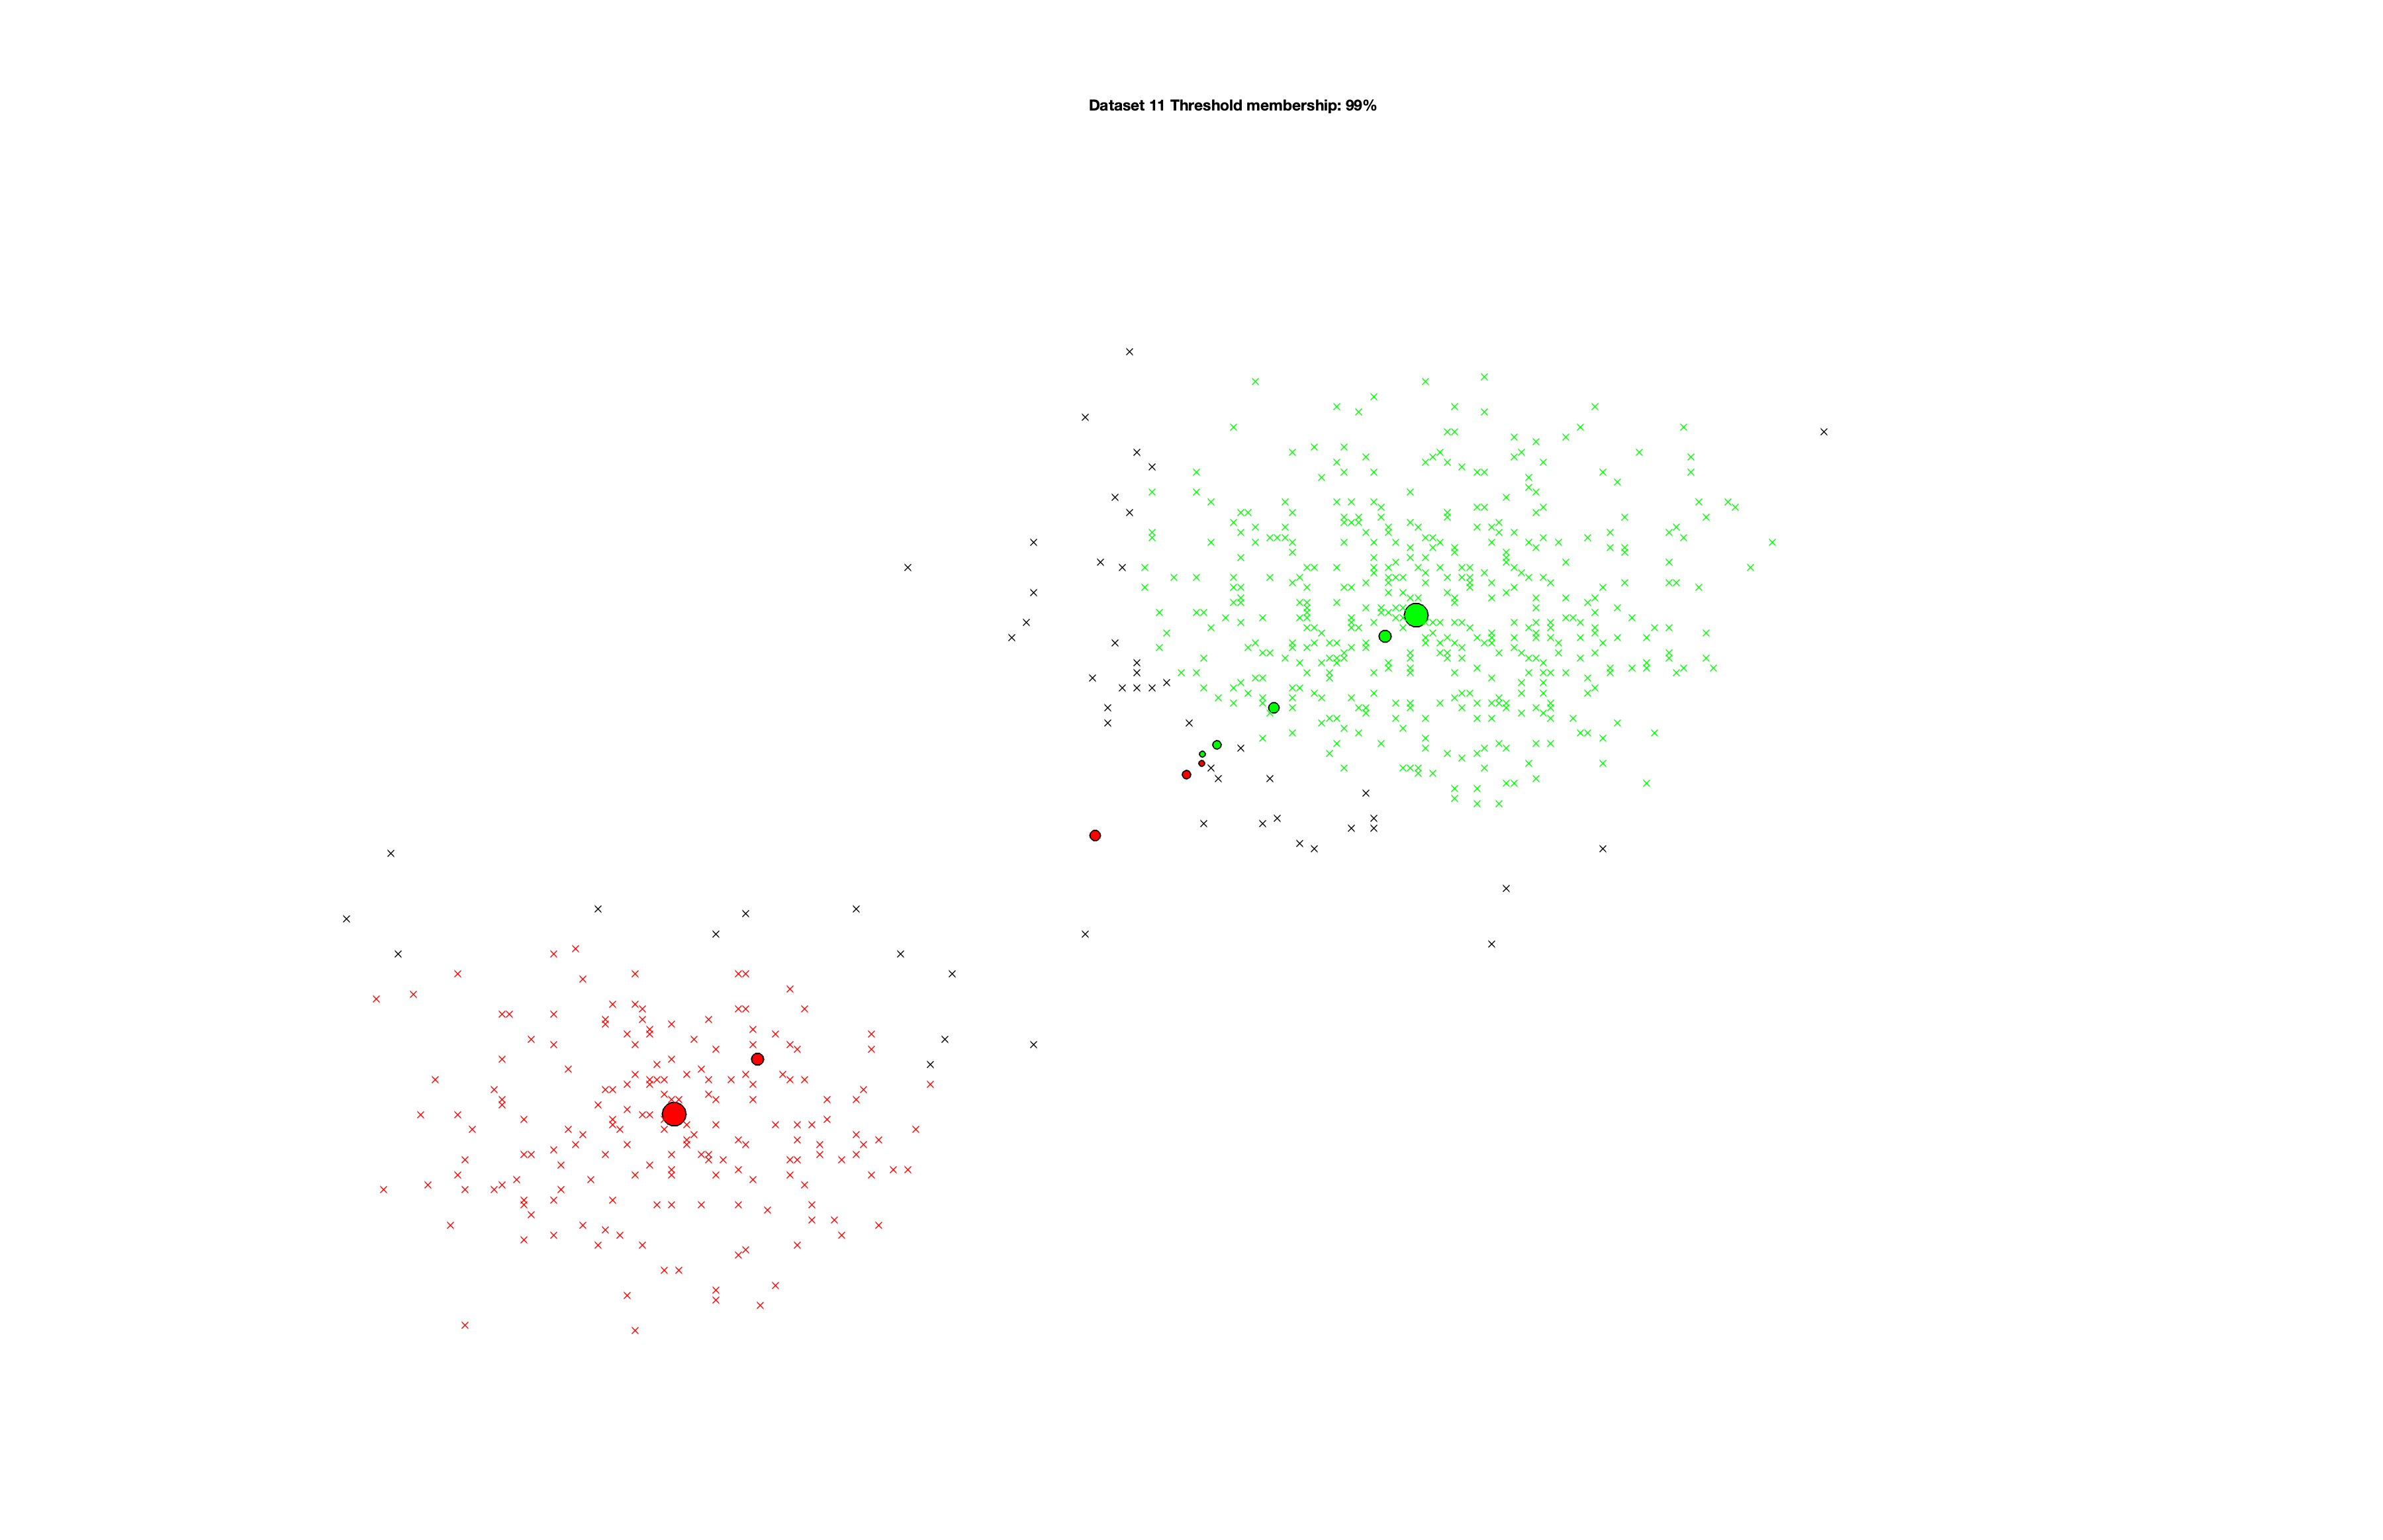

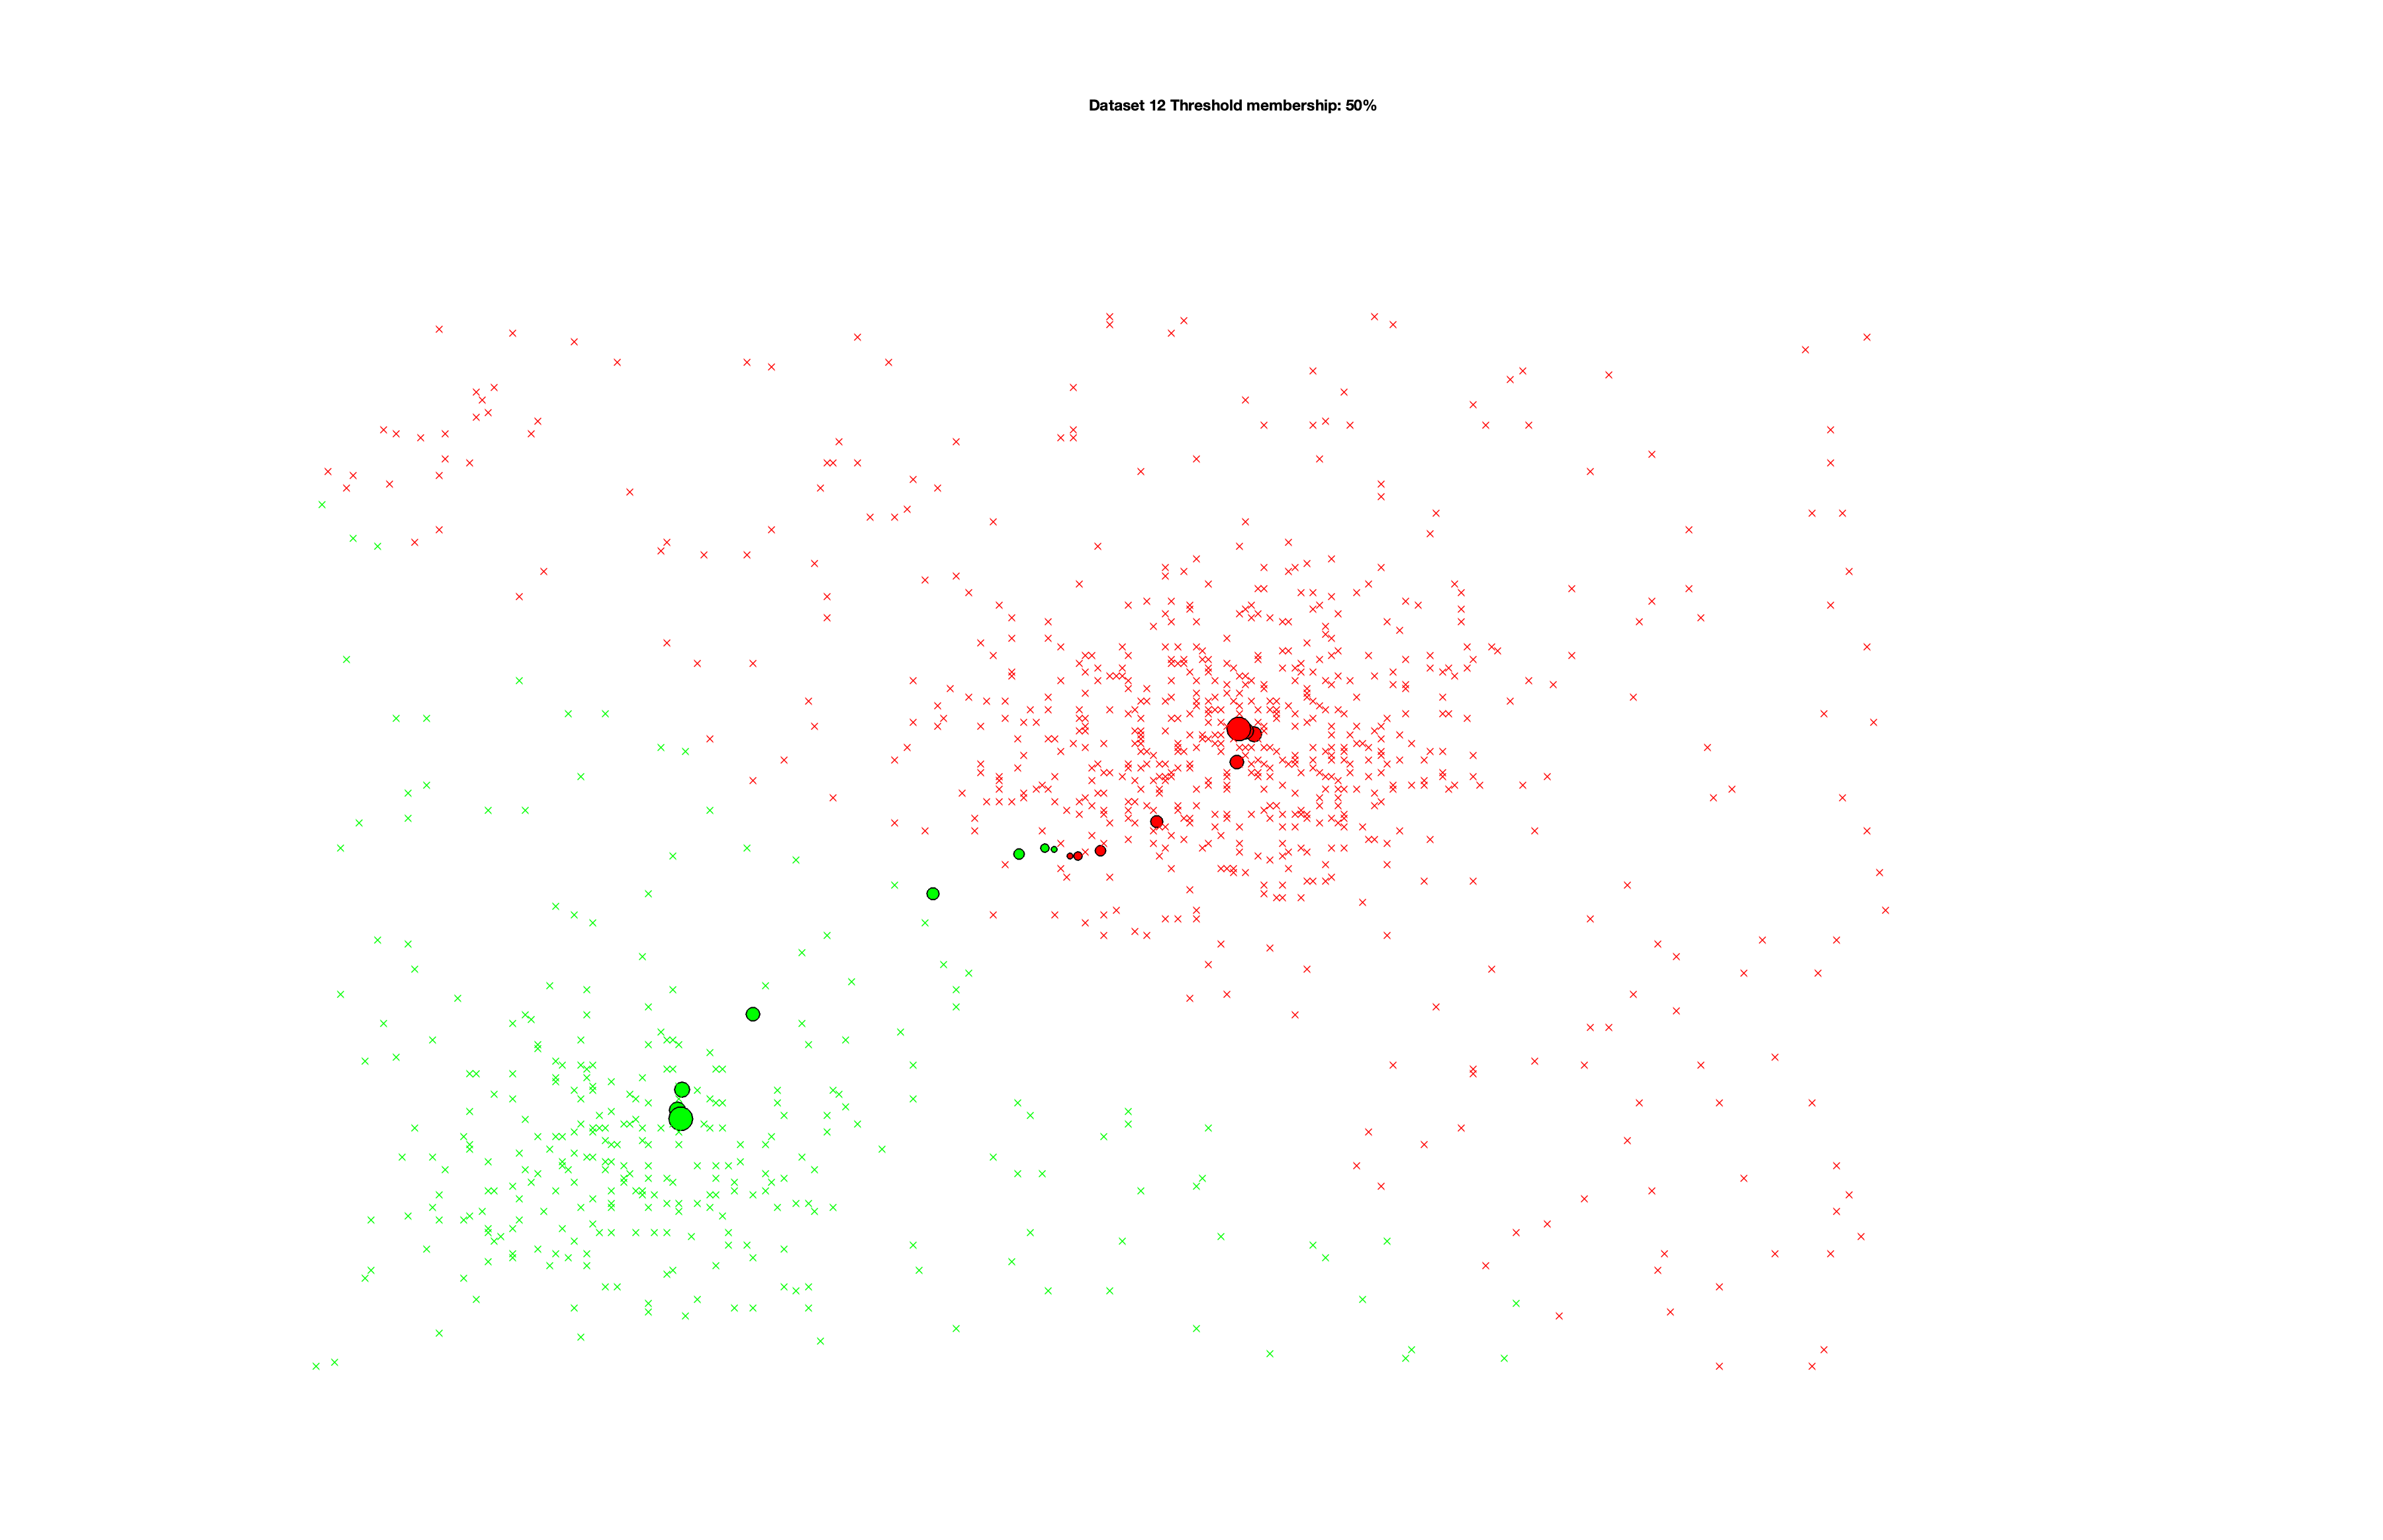

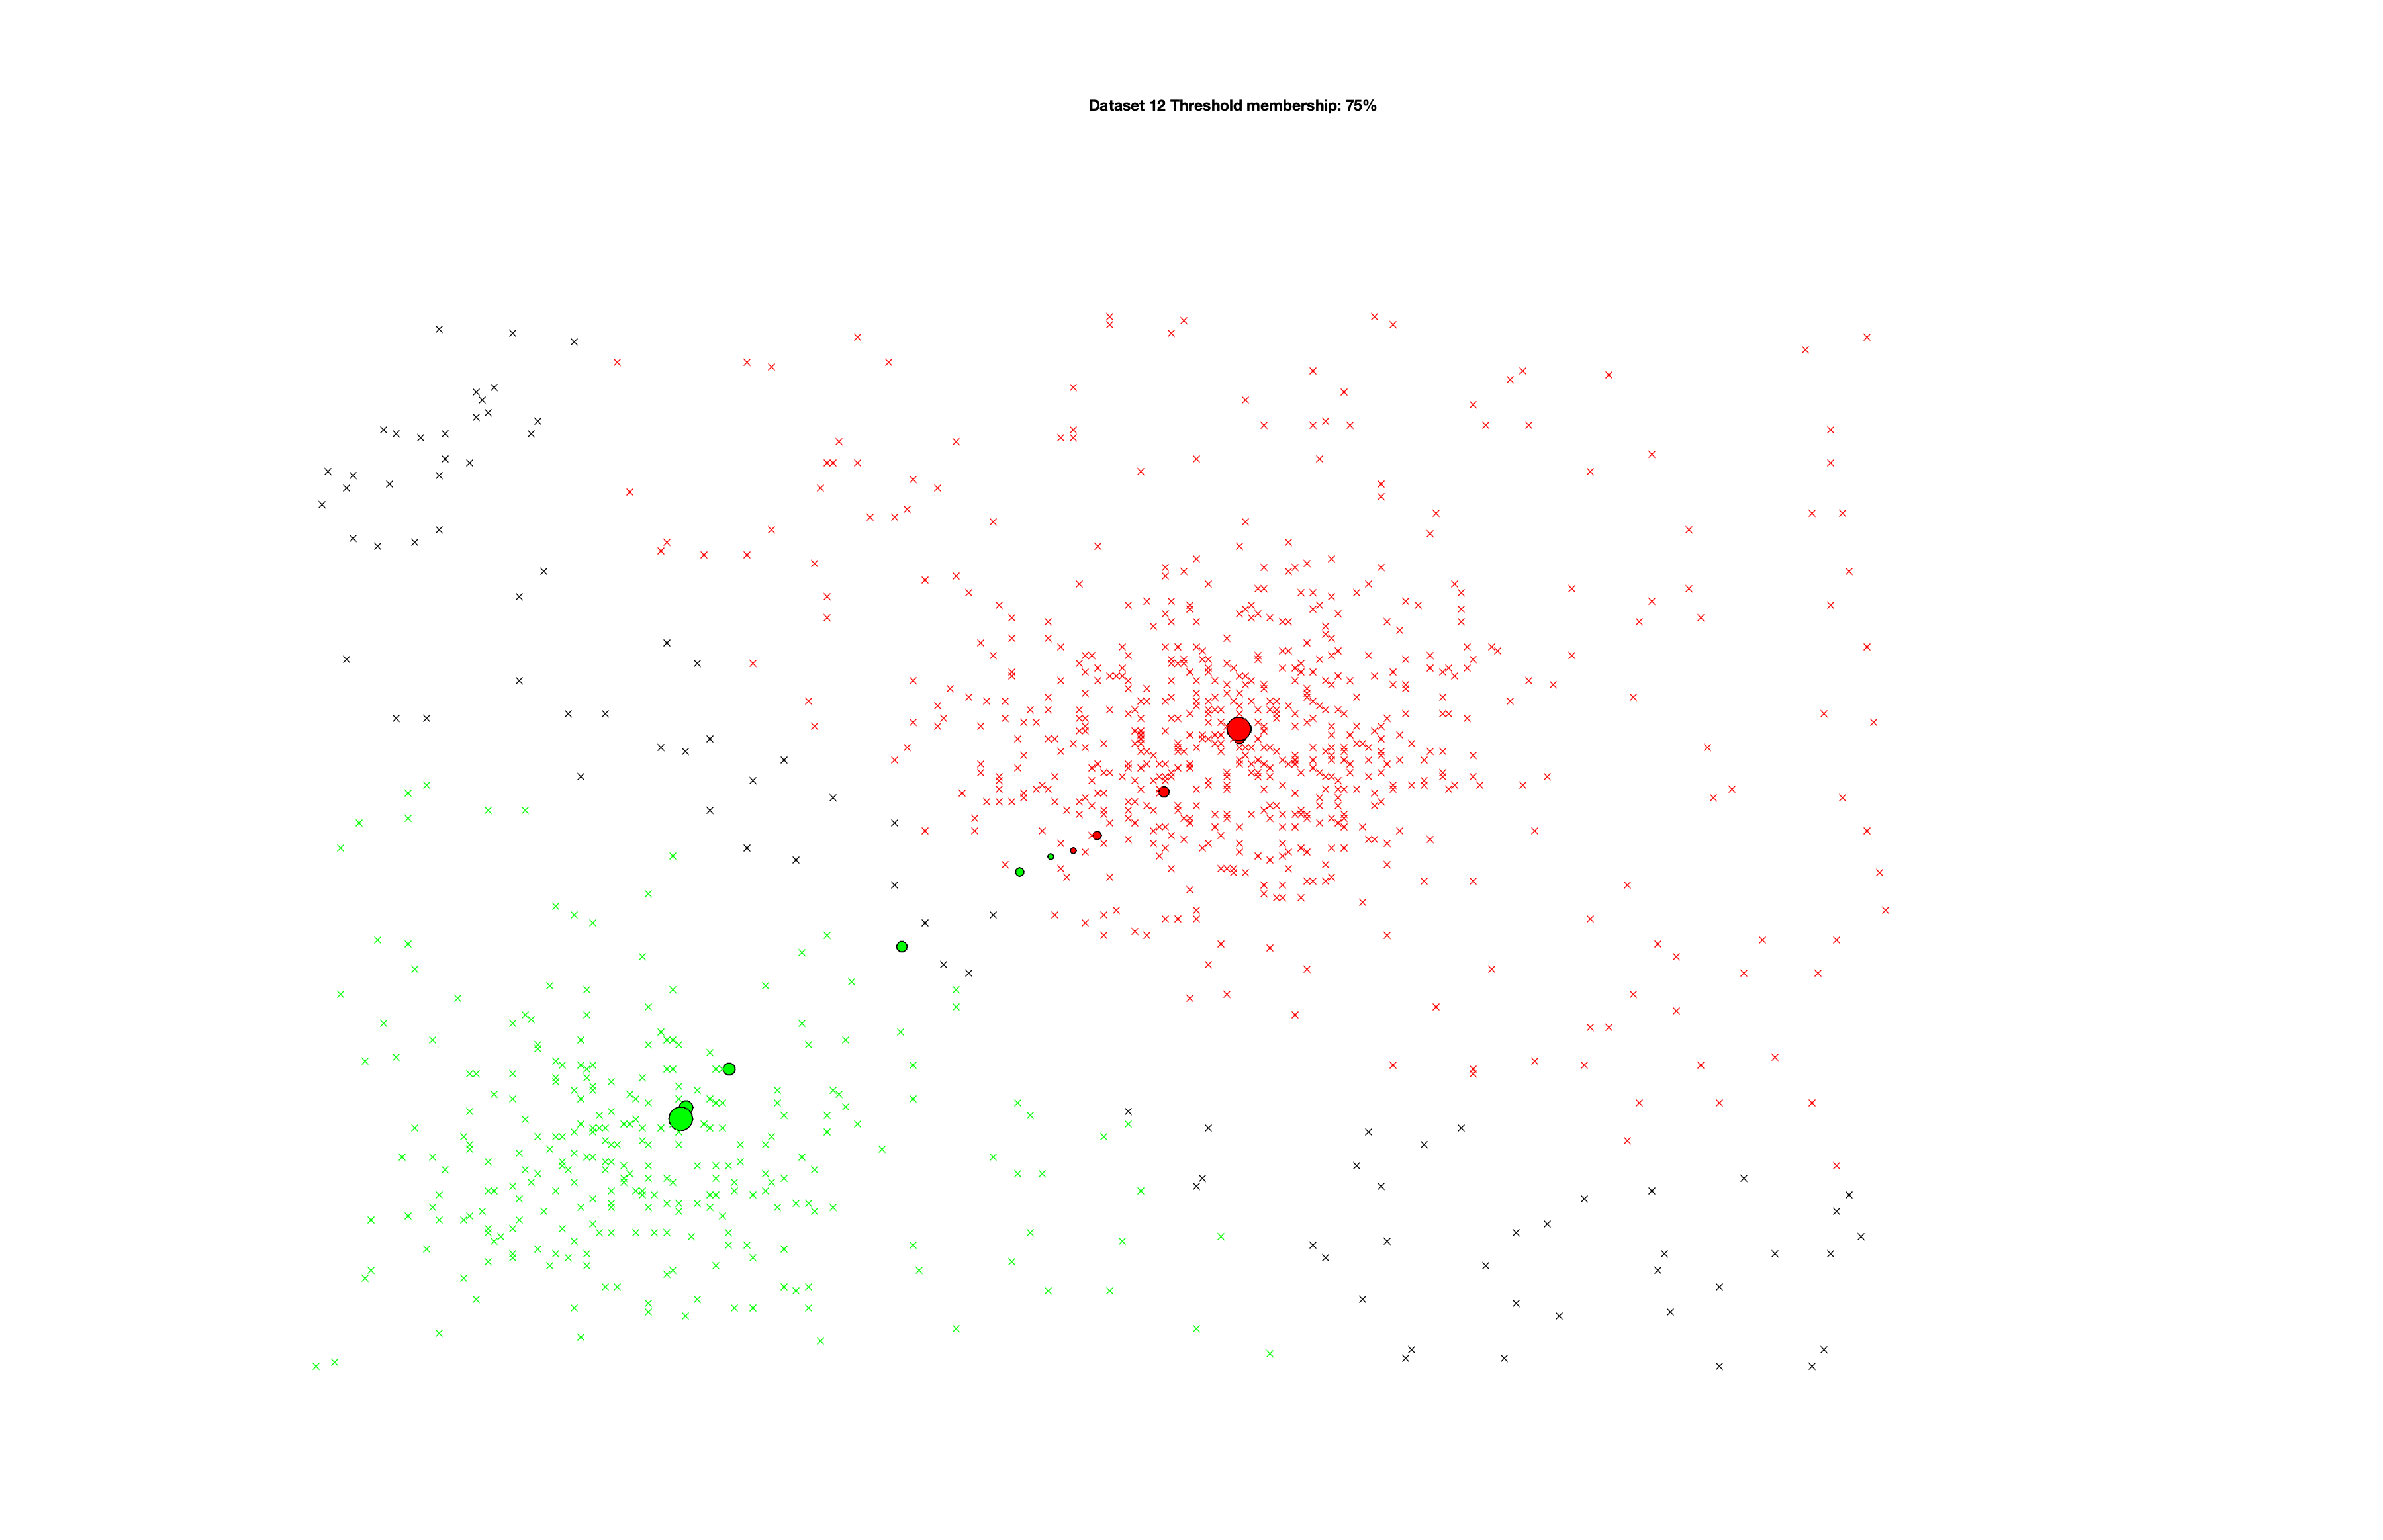

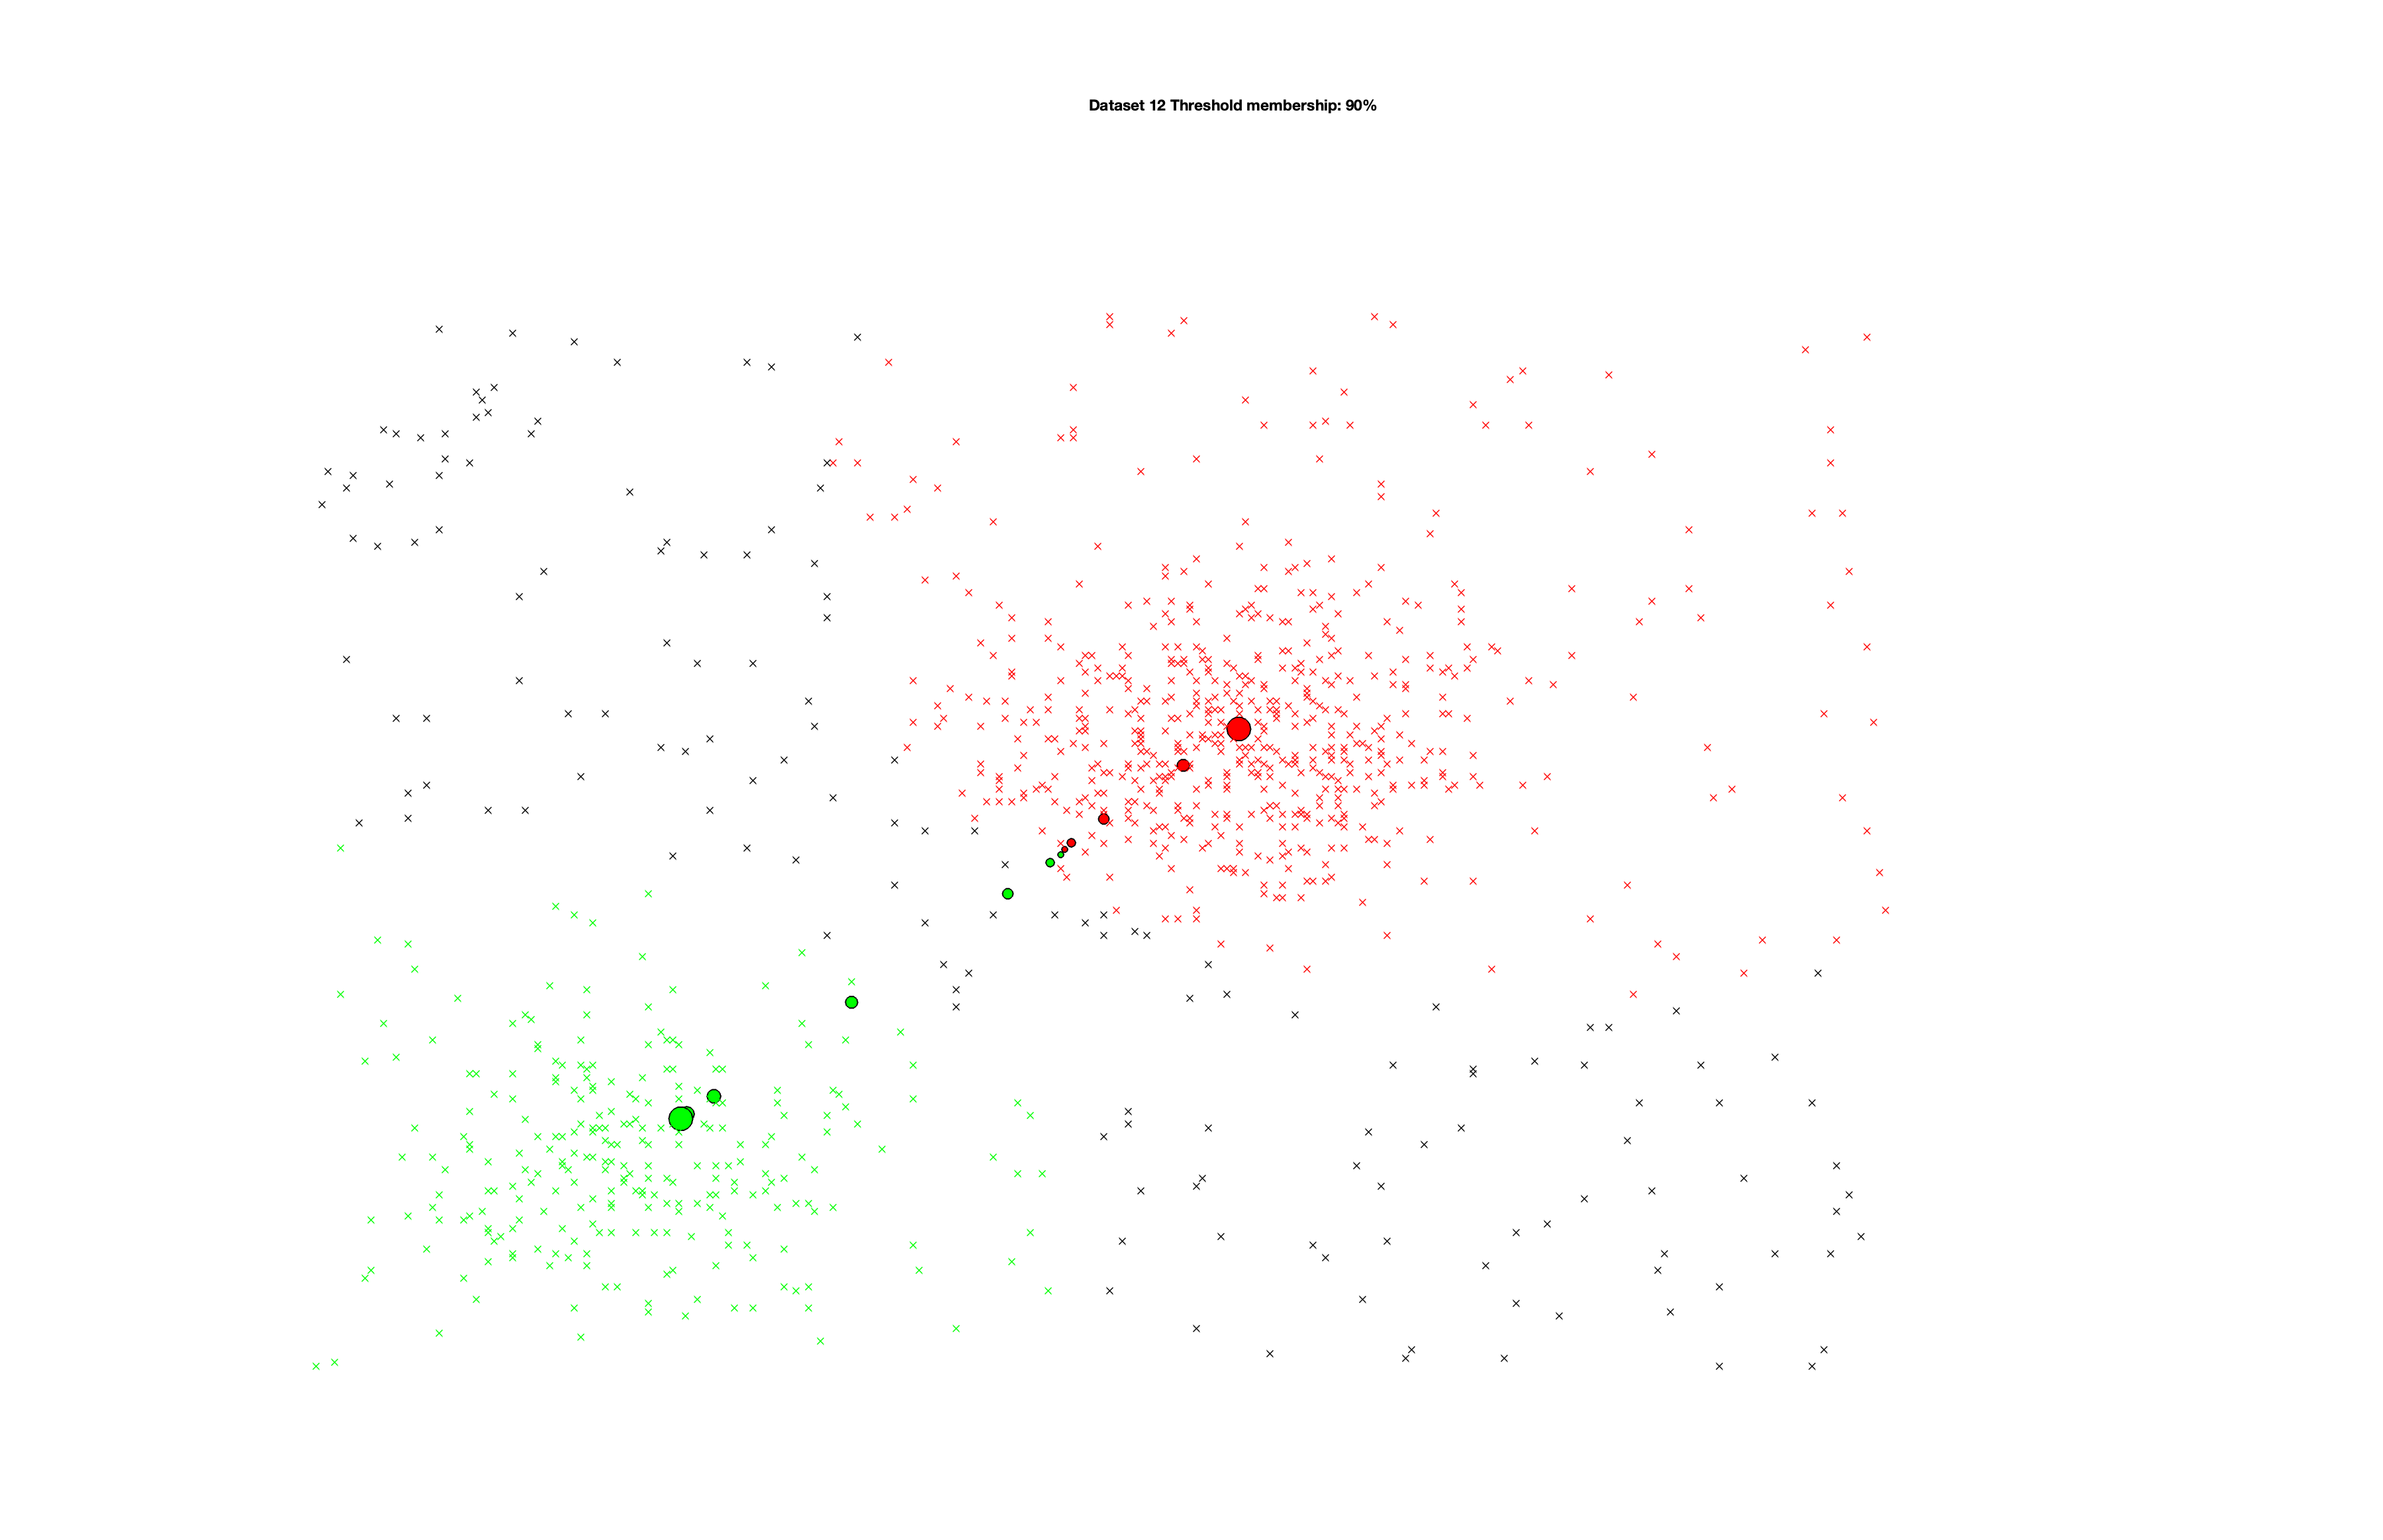

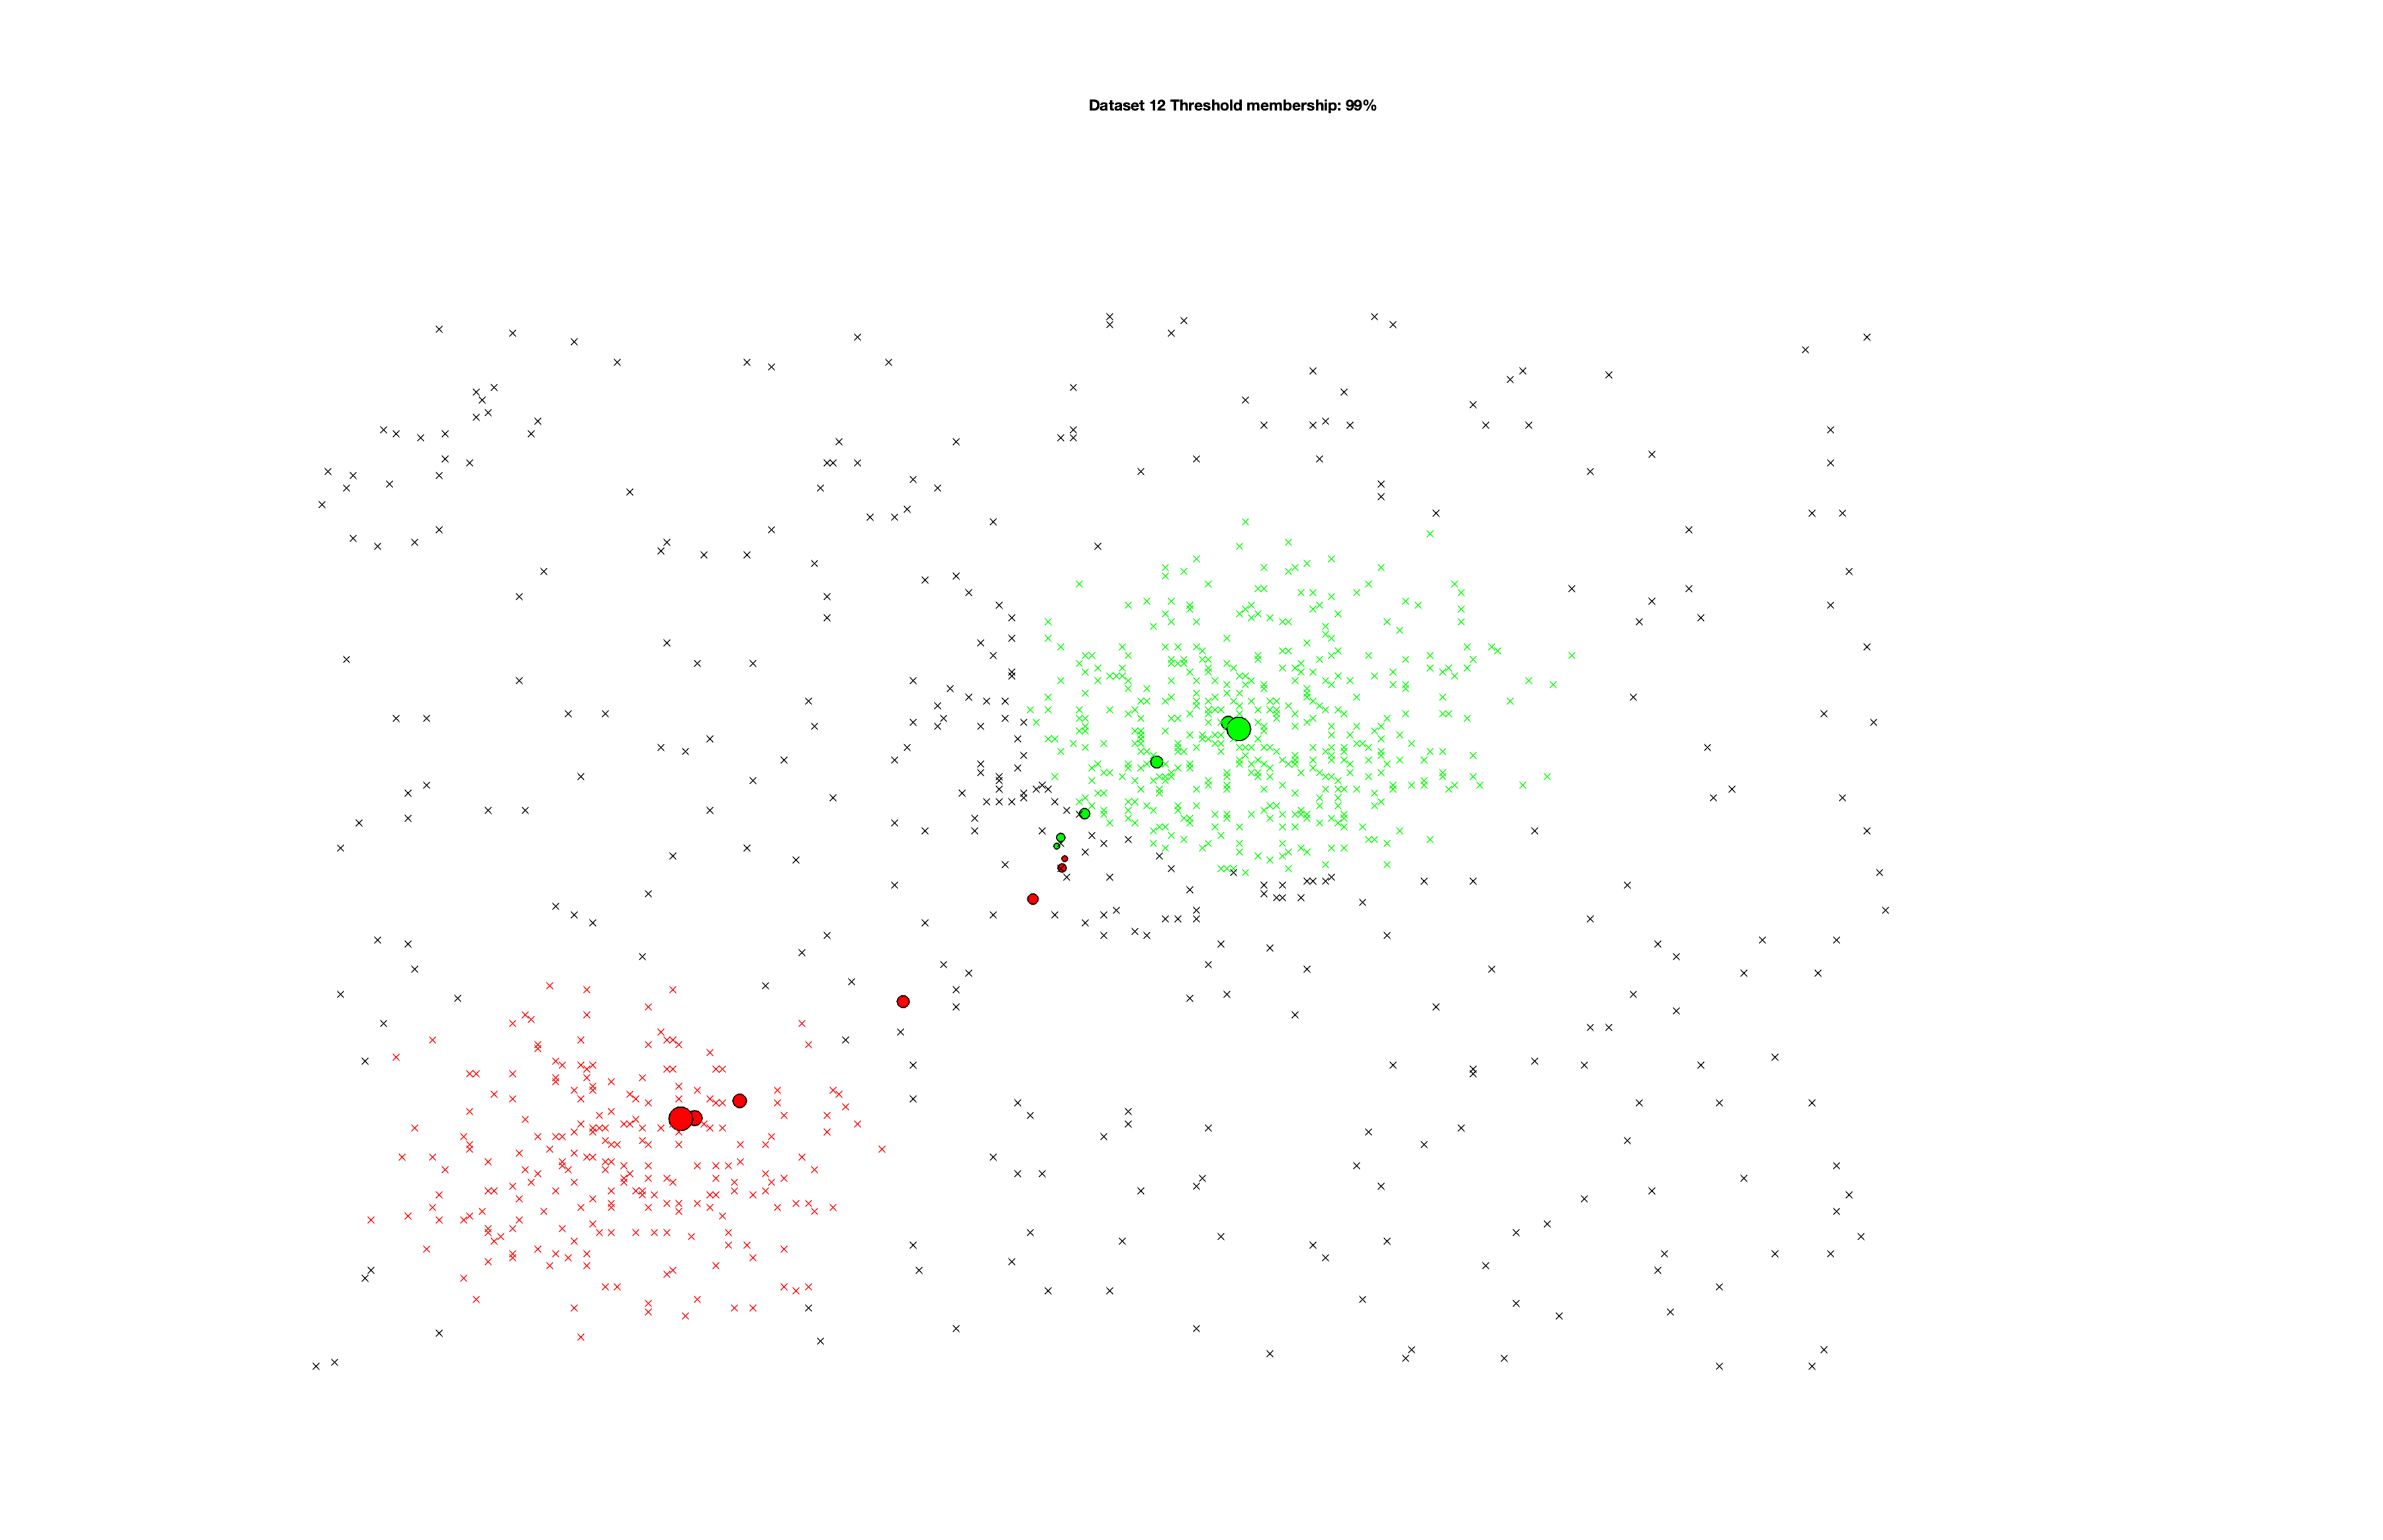

In [2]:
from IPython.display import Image, display

thresholds = [50, 75, 90, 99]
for i in range(1, 13):
    for threshold in thresholds:
        try:
            display(Image(filename=f'./dataset_{i}_threshold_{threshold}.png') )
        except:
            print(f'No data found for Dataset {i}')

I left the images large so that the points are more visible (sorry for all the scrolling). 

We can see that the cluster centers start in a random position and migrate towards their final position as the iteration number increases. We can also see that as we increase the required membership probability, more and more points are excluded from the clusters. This is a nice way to visualize the usefullness of soft vs. hard partitions in clustering, and our ability to filter out datapoints that we don't want.

### *Conclusion*

FCM clustering is a good technique for analyzing data with potentially overlapping clusters. In this assignment we were able to preclude FCM with iVAT in order to determine an appropriate number of clusters, and gather good insights and results from the datasets. We also created a nice way to visualize the iterative nature of FCM, and the usefullness of FCM in filtering out unwanted results.